In [2]:
import pandas as pd
import numpy as np

In [3]:
input_path = "/Users/blazdobravec/Documents/FACULTY/DOC/RW1/PERSONAL/RL_Concept_DSO_Network/src/data/env_data/voltage_train_data.csv"
output_action_path = "/Users/blazdobravec/Documents/FACULTY/DOC/RW1/PERSONAL/RL_Concept_DSO_Network/src/data/env_data/action_train_data.csv"

df = pd.read_csv(input_path, index_col=0)
df_act = pd.read_csv(output_action_path, index_col=0)

In [4]:
df_act.columns = ["a1", "a2", "a3", "a4", "a5", "a6", "a7"]

In [5]:
# zip the dataframes
df_out = pd.concat([df, df_act], axis=1)
df_out

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,a1,a2,a3,a4,a5,a6,a7
0,1.03,1.029654,1.029654,1.029654,1.029654,1.029654,1.029654,1.029654,1.029654,1.029654,...,1.029654,1.029654,1.029654,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.03,1.029654,1.029654,1.029654,1.029654,1.029654,1.029654,1.029654,1.029654,1.029654,...,1.029654,1.029654,1.029654,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.03,1.029654,1.029654,1.029654,1.029654,1.029654,1.029654,1.029654,1.029654,1.029654,...,1.029654,1.029654,1.029654,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.03,1.029654,1.029654,1.029654,1.029654,1.029654,1.029654,1.029654,1.029654,1.029654,...,1.029654,1.029654,1.029654,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.03,1.029654,1.029654,1.029654,1.029654,1.029654,1.029654,1.029654,1.029654,1.029654,...,1.029654,1.029654,1.029654,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470417,1.03,1.021568,1.023610,1.025730,1.028355,1.026274,1.025579,1.025354,1.025211,1.025136,...,1.028028,1.026916,1.027976,0.0,0.0,0.0,0.0,0.0,0.0,0.0
470418,1.03,1.012543,1.015190,1.017313,1.026393,1.018310,1.012299,1.004791,1.000091,0.997623,...,1.024831,1.026211,1.026268,0.0,0.0,0.0,0.0,0.0,0.0,0.0
470419,1.03,1.020365,1.022052,1.023655,1.027942,1.025279,1.021030,1.017098,1.015559,1.014751,...,1.026859,1.027918,1.027490,0.0,0.0,0.0,0.0,0.0,0.0,0.0
470420,1.03,1.023567,1.024776,1.026088,1.028544,1.026643,1.025144,1.023730,1.022998,1.022613,...,1.027885,1.028371,1.027220,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# check if we have any NaNs
df_out.isna().sum().sum()

690

In [7]:
# drop any row that has NaN
df_out = df_out.dropna()

In [8]:
# check if we have any NaNs
df_out.isna().sum().sum()

0

In [9]:
#locate the ones where any of a_i if not 0
active_index = df_out.loc[(df_out['a1'] != 0) | (df_out['a2'] != 0) | (df_out['a3'] != 0) | (df_out['a4'] != 0) | (df_out['a5'] != 0) | (df_out['a6'] != 0) | (df_out['a7'] != 0)].index
#locate non active ones
non_active_index = df_out.loc[(df_out['a1'] == 0) & (df_out['a2'] == 0) & (df_out['a3'] == 0) & (df_out['a4'] == 0) & (df_out['a5'] == 0) & (df_out['a6'] == 0) & (df_out['a7'] == 0)].index

In [10]:
len(non_active_index), len(active_index)

(413603, 56796)

In [11]:
#shuffle the non_active_index and only keep len(active_index) of them
np.random.shuffle(list(non_active_index))
non_active_index = non_active_index[:len(active_index)]

In [12]:
len(non_active_index), len(active_index)

(56796, 56796)

In [13]:
df_out = df_out.loc[active_index]
df_out.reset_index(drop=True, inplace=True)

In [14]:
# take all the active and non active ones 
df_out = df_out.loc[active_index.union(non_active_index)]
df_out.reset_index(drop=True, inplace=True)
df_out

KeyError: '[56796, 56797, 56798, 56799, 56800, 56801, 56802, 56803, 56804, 56805, 56806, 56807, 56808, 56809, 56810, 56811, 56812, 56813, 56814, 56815, 56816, 56817, 56818, 56819, 56820, 56821, 56822, 56823, 56824, 56825, 56826, 56827, 56828, 56829, 56830, 56831, 56832, 56833, 56834, 56835, 56836, 56837, 56838, 56839, 56840, 56841, 56842, 56843, 56844, 56845, 56846, 56847, 56848, 56849, 56850, 56851, 56852, 56853, 56854, 56855, 56856, 56857, 56858, 56859, 56860, 56861, 56862, 56863, 56864, 56865, 56866, 56867, 56868, 56869, 56870, 56871, 56872, 56873, 56874, 56875, 56876, 56877, 56878, 56879, 56880, 56881, 56882, 56883, 56884, 56885, 56886, 56887, 56888, 56889, 56890, 56891, 56892, 56893, 56894, 56895, 56896, 56897, 56898, 56899, 56900, 56901, 56902, 56903, 56904, 56905, 56906, 56907, 56908, 56909, 56910, 56911, 56912, 56913, 56914, 56915, 56916, 56917, 56918, 56919, 56920, 56921, 56922, 56923, 56924, 56925, 56926, 56927, 56928, 56929, 56930, 56931, 56932, 56933, 56934, 56935, 56936, 56937, 56938, 56939, 56940, 56941, 56942, 56943, 56944, 56945, 56946, 56947, 56948, 56949, 56950, 56951, 56952, 56953, 56954, 56955, 56956, 56957, 56958, 56959, 56960, 56961, 56962, 56963, 56964, 56965, 56966, 56967, 56968, 56969, 56970, 56971, 56972, 56973, 56974, 56975, 56976, 56977, 56978, 56979, 56980, 56981, 56982, 56983, 56984, 56985, 56986, 56987, 56988, 56989, 56990, 56991, 56992, 56993, 56994, 56995, 56996, 56997, 56998, 56999, 57000, 57001, 57002, 57003, 57004, 57005, 57006, 57007, 57008, 57009, 57010, 57011, 57012, 57013, 57014, 57015, 57016, 57017, 57018, 57019, 57020, 57021, 57022, 57023, 57024, 57025, 57026, 57027, 57028, 57029, 57030, 57031, 57032, 57033, 57034, 57035, 57036, 57037, 57038, 57039, 57040, 57041, 57042, 57043, 57044, 57045, 57046, 57047, 57048, 57049, 57050, 57051, 57052, 57053, 57054, 57055, 57056, 57057, 57058, 57059, 57060, 57061, 57062, 57063, 57064, 57065, 57066, 57067, 57068, 57069, 57070, 57071, 57072, 57073, 57074, 57075, 57076, 57077, 57078, 57079, 57080, 57081, 57082, 57083, 57084, 57085, 57086, 57087, 57088, 57089, 57090, 57091, 57092, 57093, 57094, 57095, 57096, 57097, 57098, 57099, 57100, 57101, 57102, 57103, 57104, 57105, 57106, 57107, 57108, 57109, 57110, 57111, 57112, 57113, 57114, 57115, 57116, 57117, 57118, 57119, 57120, 57121, 57122, 57123, 57124, 57125, 57126, 57127, 57128, 57129, 57130, 57131, 57132, 57133, 57134, 57135, 57136, 57137, 57138, 57139, 57140, 57141, 57142, 57143, 57144, 57145, 57146, 57147, 57148, 57149, 57150, 57151, 57152, 57153, 57154, 57155, 57156, 57157, 57158, 57159, 57160, 57161, 57162, 57163, 57164, 57165, 57166, 57167, 57168, 57169, 57170, 57171, 57172, 57173, 57174, 57175, 57176, 57177, 57178, 57179, 57180, 57181, 57182, 57183, 57184, 57185, 57186, 57187, 57188, 57189, 57190, 57191, 57192, 57193, 57194, 57195, 57196, 57197, 57198, 57199, 57200, 57201, 57202, 57203, 57204, 57205, 57206, 57207, 57208, 57209, 57210, 57211, 57212, 57213, 57214, 57215, 57216, 57217, 57218, 57219, 57220, 57221, 57222, 57223, 57224, 57225, 57226, 57227, 57228, 57229, 57230, 57231, 57232, 57233, 57234, 57235, 57236, 57237, 57238, 57239, 57240, 57241, 57242, 57243, 57244, 57245, 57246, 57247, 57248, 57249, 57250, 57251, 57252, 57253, 57254, 57255, 57256, 57257, 57258, 57259, 57260, 57261, 57262, 57263, 57264, 57265, 57266, 57267, 57268, 57269, 57270, 57271, 57272, 57273, 57274, 57275, 57276, 57277, 57278, 57279, 57280, 57281, 57282, 57283, 57284, 57285, 57286, 57287, 57288, 57289, 57290, 57291, 57292, 57293, 57294, 57295, 57296, 57297, 57298, 57299, 57300, 57301, 57302, 57303, 57304, 57305, 57306, 57307, 57308, 57309, 57310, 57311, 57312, 57313, 57314, 57315, 57316, 57317, 57318, 57319, 57320, 57321, 57322, 57323, 57324, 57325, 57326, 57327, 57328, 57329, 57330, 57331, 57332, 57333, 57334, 57335, 57336, 57337, 57338, 57339, 57340, 57341, 57342, 57343, 57344, 57345, 57346, 57347, 57348, 57349, 57350, 57351, 57352, 57353, 57354, 57355, 57356, 57357, 57358, 57359, 57360, 57361, 57362, 57363, 57364, 57365, 57366, 57367, 57368, 57369, 57370, 57371, 57372, 57373, 57374, 57375, 57376, 57377, 57378, 57379, 57380, 57381, 57382, 57383, 57384, 57385, 57386, 57387, 57388, 57389, 57390, 57391, 57392, 57393, 57394, 57395, 57396, 57397, 57398, 57399, 57400, 57401, 57402, 57403, 57404, 57405, 57406, 57407, 57408, 57409, 57410, 57411, 57412, 57413, 57414, 57415, 57416, 57417, 57418, 57419, 57420, 57421, 57422, 57423, 57424, 57425, 57426, 57427, 57428, 57429, 57430, 57431, 57432, 57433, 57434, 57435, 57436, 57437, 57438, 57439, 57440, 57441, 57442, 57443, 57444, 57445, 57446, 57447, 57448, 57449, 57450, 57451, 57452, 57453, 57454, 57455, 57456, 57457, 57458, 57459, 57460, 57461, 57462, 57463, 57464, 57465, 57466, 57467, 57468, 57469, 57470, 57471, 57472, 57473, 57474, 57475, 57476, 57477, 57478, 57479, 57480, 57481, 57482, 57483, 57484, 57485, 57486, 57487, 57488, 57489, 57490, 57491, 57492, 57493, 57494, 57495, 57496, 57497, 57498, 57499, 57500, 57501, 57502, 57503, 57504, 57505, 57506, 57507, 57508, 57509, 57510, 57511, 57512, 57513, 57514, 57515, 57516, 57517, 57518, 57519, 57520, 57521, 57522, 57523, 57524, 57525, 57526, 57527, 57528, 57529, 57530, 57531, 57532, 57533, 57534, 57535, 57536, 57537, 57538, 57539, 57540, 57541, 57542, 57543, 57544, 57545, 57546, 57547, 57548, 57549, 57550, 57551, 57552, 57553, 57554, 57555, 57556, 57557, 57558, 57559, 57560, 57561, 57562, 57563, 57564, 57565, 57566, 57567, 57568, 57569, 57570, 57571, 57572, 57573, 57574, 57575, 57576, 57577, 57578, 57579, 57580, 57581, 57582, 57583, 57584, 57585, 57586, 57587, 57588, 57589, 57590, 57591, 57592, 57593, 57594, 57595, 57596, 57597, 57598, 57599, 57600, 57601, 57602, 57603, 57604, 57605, 57606, 57607, 57608, 57609, 57610, 57611, 57612, 57613, 57614, 57615, 57616, 57617, 57618, 57619, 57620, 57621, 57622, 57623, 57624, 57625, 57626, 57627, 57628, 57629, 57630, 57631, 57632, 57633, 57634, 57635, 57636, 57637, 57638, 57639, 57640, 57641, 57642, 57643, 57644, 57645, 57646, 57647, 57648, 57649, 57650, 57651, 57652, 57653, 57654, 57655, 57656, 57657, 57658, 57659, 57660, 57661, 57662, 57663, 57664, 57665, 57666, 57667, 57668, 57669, 57670, 57671, 57672, 57673, 57674, 57675, 57676, 57677, 57678, 57679, 57680, 57681, 57682, 57683, 57684, 57685, 57686, 57687, 57688, 57689, 57690, 57691, 57692, 57693, 57694, 57695, 57696, 57697, 57698, 57699, 57700, 57701, 57702, 57703, 57704, 57705, 57706, 57707, 57708, 57709, 57710, 57711, 57712, 57713, 57714, 57715, 57716, 57717, 57718, 57719, 57720, 57721, 57722, 57723, 57724, 57725, 57726, 57727, 57728, 57729, 57730, 57731, 57732, 57733, 57734, 57735, 57736, 57737, 57738, 57739, 57740, 57741, 57742, 57743, 57744, 57745, 57746, 57747, 57748, 57749, 57750, 57751, 57752, 57753, 57754, 57755, 57756, 57757, 57758, 57759, 57760, 57761, 57762, 57763, 57764, 57765, 57766, 57767, 57768, 57769, 57770, 57771, 57772, 57773, 57774, 57775, 57776, 57777, 57778, 57779, 57780, 57781, 57782, 57783, 57784, 57785, 57786, 57787, 57788, 57789, 57790, 57791, 57792, 57793, 57794, 57795, 57796, 57797, 57798, 57799, 57800, 57801, 57802, 57803, 57804, 57805, 57806, 57807, 57808, 57809, 57810, 57811, 57812, 57813, 57814, 57815, 57816, 57817, 57818, 57819, 57820, 57821, 57822, 57823, 57824, 57825, 57826, 57827, 57828, 57829, 57830, 57831, 57832, 57833, 57834, 57835, 57836, 57837, 57838, 57839, 57840, 57841, 57842, 57843, 57844, 57845, 57846, 57847, 57848, 57849, 57850, 57851, 57852, 57853, 57854, 57855, 57856, 57857, 57858, 57859, 57860, 57861, 57862, 57863, 57864, 57865, 57866, 57867, 57868, 57869, 57870, 57871, 57872, 57873, 57874, 57875, 57876, 57877, 57878, 57879, 57880, 57881, 57882, 57883, 57884, 57885, 57886, 57887, 57888, 57889, 57890, 57891, 57892, 57893, 57894, 57895, 57896, 57897, 57898, 57899, 57900, 57901, 57902, 57903, 57904, 57905, 57906, 57907, 57908, 57909, 57910, 57911, 57912, 57913, 57914, 57915, 57916, 57917, 57918, 57919, 57920, 57921, 57922, 57923, 57924, 57925, 57926, 57927, 57928, 57929, 57930, 57931, 57932, 57933, 57934, 57935, 57936, 57937, 57938, 57939, 57940, 57941, 57942, 57943, 57944, 57945, 57946, 57947, 57948, 57949, 57950, 57951, 57952, 57953, 57954, 57955, 57956, 57957, 57958, 57959, 57960, 57961, 57962, 57963, 57964, 57965, 57966, 57967, 57968, 57969, 57970, 57971, 57972, 57973, 57974, 57975, 57976, 57977, 57978, 57979, 57980, 57981, 57982, 57983, 57984, 57985, 57986, 57987, 57988, 57989, 57990, 57991, 57992, 57993, 57994, 57995, 57996, 57997, 57998, 57999, 58000, 58001, 58002, 58003, 58004, 58005, 58006, 58007, 58008, 58009, 58010, 58011, 58012, 58013, 58014, 58015, 58016, 58017, 58018, 58019, 58020, 58021, 58022, 58023, 58024, 58025, 58026, 58027, 58028, 58029, 58030, 58031, 58032, 58033, 58034, 58035, 58036, 58037, 58038, 58039, 58040, 58041, 58042, 58043, 58044, 58045, 58046, 58047, 58048, 58049, 58050, 58051, 58052, 58053, 58054, 58055, 58056, 58057, 58058, 58059, 58060, 58061, 58062, 58063, 58064, 58065, 58066, 58067, 58068, 58069, 58070, 58071, 58072, 58073, 58074, 58075, 58076, 58077, 58078, 58079, 58080, 58081, 58082, 58083, 58084, 58085, 58086, 58087, 58088, 58089, 58090, 58091, 58092, 58093, 58094, 58095, 58096, 58097, 58098, 58099, 58100, 58101, 58102, 58103, 58104, 58105, 58106, 58107, 58108, 58109, 58110, 58111, 58112, 58113, 58114, 58115, 58116, 58117, 58118, 58119, 58120, 58121, 58122, 58123, 58124, 58125, 58126, 58127, 58128, 58129, 58130, 58131, 58132, 58133, 58134, 58135, 58136, 58137, 58138, 58139, 58140, 58141, 58142, 58143, 58144, 58145, 58146, 58147, 58148, 58149, 58150, 58151, 58152, 58153, 58154, 58155, 58156, 58157, 58158, 58159, 58160, 58161, 58162, 58163, 58164, 58165, 58166, 58167, 58168, 58169, 58170, 58171, 58172, 58173, 58174, 58175, 58176, 58177, 58178, 58179, 58180, 58181, 58182, 58183, 58184, 58185, 58186, 58187, 58188, 58189, 58190, 58191, 58192, 58193, 58194, 58195, 58196, 58197, 58198, 58199, 58200, 58201, 58202, 58203, 58204, 58205, 58206, 58207, 58208, 58209, 58210, 58211, 58212, 58213, 58214, 58215, 58216, 58217, 58218, 58219, 58220, 58221, 58222, 58223, 58224, 58225, 58226, 58227, 58228, 58229, 58230, 58231, 58232, 58233, 58234, 58235, 58236, 58237, 58238, 58239, 58240, 58241, 58242, 58243, 58244, 58245, 58246, 58247, 58248, 58249, 58250, 58251, 58252, 58253, 58254, 58255, 58256, 58257, 58258, 58259, 58260, 58261, 58262, 58263, 58264, 58265, 58266, 58267, 58268, 58269, 58270, 58271, 58272, 58273, 58274, 58275, 58276, 58277, 58278, 58279, 58280, 58281, 58282, 58283, 58284, 58285, 58286, 58287, 58288, 58289, 58290, 58291, 58292, 58293, 58294, 58295, 58296, 58297, 58298, 58299, 58300, 58301, 58302, 58303, 58304, 58305, 58306, 58307, 58308, 58309, 58310, 58311, 58312, 58313, 58314, 58315, 58316, 58317, 58318, 58319, 58320, 58321, 58322, 58323, 58324, 58325, 58326, 58327, 58328, 58329, 58330, 58331, 58332, 58333, 58334, 58335, 58336, 58337, 58338, 58339, 58340, 58341, 58342, 58343, 58344, 58345, 58346, 58347, 58348, 58349, 58350, 58351, 58352, 58353, 58354, 58355, 58356, 58357, 58358, 58359, 58360, 58361, 58362, 58363, 58364, 58365, 58366, 58367, 58368, 58369, 58370, 58371, 58372, 58373, 58374, 58375, 58376, 58377, 58378, 58379, 58380, 58381, 58382, 58383, 58384, 58385, 58386, 58387, 58388, 58389, 58390, 58391, 58392, 58393, 58394, 58395, 58396, 58397, 58398, 58399, 58400, 58401, 58402, 58403, 58404, 58405, 58406, 58407, 58408, 58409, 58410, 58411, 58412, 58413, 58414, 58415, 58416, 58417, 58418, 58419, 58420, 58421, 58422, 58423, 58424, 58425, 58426, 58427, 58428, 58429, 58430, 58431, 58432, 58433, 58434, 58435, 58436, 58437, 58438, 58439, 58440, 58441, 58442, 58443, 58444, 58445, 58446, 58447, 58448, 58449, 58450, 58451, 58452, 58453, 58454, 58455, 58456, 58457, 58458, 58459, 58460, 58461, 58462, 58463, 58464, 58465, 58466, 58467, 58468, 58469, 58470, 58471, 58472, 58473, 58474, 58475, 58476, 58477, 58478, 58479, 58480, 58481, 58482, 58483, 58484, 58485, 58486, 58487, 58488, 58489, 58490, 58491, 58492, 58493, 58494, 58495, 58496, 58497, 58498, 58499, 58500, 58501, 58502, 58503, 58504, 58505, 58506, 58507, 58508, 58509, 58510, 58511, 58512, 58513, 58514, 58515, 58516, 58517, 58518, 58519, 58520, 58521, 58522, 58523, 58524, 58525, 58526, 58527, 58528, 58529, 58530, 58531, 58532, 58533, 58534, 58535, 58536, 58537, 58538, 58539, 58540, 58541, 58542, 58543, 58544, 58545, 58546, 58547, 58548, 58549, 58550, 58551, 58552, 58553, 58554, 58555, 58556, 58557, 58558, 58559, 58560, 58561, 58562, 58563, 58564, 58565, 58566, 58567, 58568, 58569, 58570, 58571, 58572, 58573, 58574, 58575, 58576, 58577, 58578, 58579, 58580, 58581, 58582, 58583, 58584, 58585, 58586, 58587, 58588, 58589, 58590, 58591, 58592, 58593, 58594, 58595, 58596, 58597, 58598, 58599, 58600, 58601, 58602, 58603, 58604, 58605, 58606, 58607, 58608, 58609, 58610, 58611, 58612, 58613, 58614, 58615, 58616, 58617, 58618, 58619, 58620, 58621, 58622, 58623, 58624, 58625, 58626, 58627, 58628, 58629, 58630, 58631, 58632, 58633, 58634, 58635, 58636, 58637, 58638, 58639, 58640, 58641, 58642, 58643, 58644, 58645, 58646, 58647, 58648, 58649, 58650, 58651, 58652, 58653, 58654, 58655, 58656, 58657, 58658, 58659, 58660, 58661, 58662, 58663, 58664, 58665, 58666, 58667, 58668, 58669, 58670, 58671, 58672, 58673, 58674, 58675, 58676, 58677, 58678, 58679, 58680, 58681, 58682, 58683, 58684, 58685, 58686, 58687, 58688, 58689, 58690, 58691, 58692, 58693, 58694, 58695, 58696, 58697, 58698, 58699, 58700, 58701, 58702, 58703, 58704, 58705, 58706, 58707, 58708, 58709, 58710, 58711, 58712, 58713, 58714, 58715, 58716, 58717, 58718, 58719, 58720, 58721, 58722, 58723, 58724, 58725, 58726, 58727, 58728, 58729, 58730, 58731, 58732, 58733, 58734, 58735, 58736, 58737, 58738, 58739, 58740, 58741, 58742, 58743, 58744, 58745, 58746, 58747, 58748, 58749, 58750, 58751, 58752, 58753, 58754, 58755, 58756, 58757, 58758, 58759, 58760, 58761, 58762, 58763, 58764, 58765, 58766, 58767, 58768, 58769, 58770, 58771, 58772, 58773, 58774, 58775, 58776, 58777, 58778, 58779, 58780, 58781, 58782, 58783, 58784, 58785, 58786, 58787, 58788, 58789, 58790, 58791, 58792, 58793, 58794, 58795, 58796, 58797, 58798, 58799, 58800, 58801, 58802, 58803, 58804, 58805, 58806, 58807, 58808, 58809, 58810, 58811, 58812, 58813, 58814, 58815, 58816, 58817, 58818, 58819, 58820, 58821, 58822, 58823, 58824, 58825, 58826, 58827, 58828, 58829, 58830, 58831, 58832, 58833, 58834, 58835, 58836, 58837, 58838, 58839, 58840, 58841, 58842, 58843, 58844, 58845, 58846, 58847, 58848, 58849, 58850, 58851, 58852, 58853, 58854, 58855, 58856, 58857, 58858, 58859, 58860, 58861, 58862, 58863, 58864, 58865, 58866, 58867, 58868, 58869, 58870, 58871, 58872, 58873, 58874, 58875, 58876, 58877, 58878, 58879, 58880, 58881, 58882, 58883, 58884, 58885, 58886, 58887, 58888, 58889, 58890, 58891, 58892, 58893, 58894, 58895, 58896, 58897, 58898, 58899, 58900, 58901, 58902, 58903, 58904, 58905, 58906, 58907, 58908, 58909, 58910, 58911, 58912, 58913, 58914, 58915, 58916, 58917, 58918, 58919, 58920, 58921, 58922, 58923, 58924, 58925, 58926, 58927, 58928, 58929, 58930, 58931, 58932, 58933, 58934, 58935, 58936, 58937, 58938, 58939, 58940, 58941, 58942, 58943, 58944, 58945, 58946, 58947, 58948, 58949, 58950, 58951, 58952, 58953, 58954, 58955, 58956, 58957, 58958, 58959, 58960, 58961, 58962, 58963, 58964, 58965, 58966, 58967, 58968, 58969, 58970, 58971, 58972, 58973, 58974, 58975, 58976, 58977, 58978, 58979, 58980, 58981, 58982, 58983, 58984, 58985, 58986, 58987, 58988, 58989, 58990, 58991, 58992, 58993, 58994, 58995, 58996, 58997, 58998, 58999, 59000, 59001, 59002, 59003, 59004, 59005, 59006, 59007, 59008, 59009, 59010, 59011, 59012, 59013, 59014, 59015, 59016, 59017, 59018, 59019, 59020, 59021, 59022, 59023, 59024, 59025, 59026, 59027, 59028, 59029, 59030, 59031, 59032, 59033, 59034, 59035, 59036, 59037, 59038, 59039, 59040, 59041, 59042, 59043, 59044, 59045, 59046, 59047, 59048, 59049, 59050, 59051, 59052, 59053, 59054, 59055, 59056, 59057, 59058, 59059, 59060, 59061, 59062, 59063, 59064, 59065, 59066, 59067, 59068, 59069, 59070, 59071, 59072, 59073, 59074, 59075, 59076, 59077, 59078, 59079, 59080, 59081, 59082, 59083, 59084, 59085, 59086, 59087, 59088, 59089, 59090, 59091, 59092, 59093, 59094, 59095, 59096, 59097, 59098, 59099, 59100, 59101, 59102, 59103, 59104, 59105, 59106, 59107, 59108, 59109, 59110, 59111, 59112, 59113, 59114, 59115, 59116, 59117, 59118, 59119, 59120, 59121, 59122, 59123, 59124, 59125, 59126, 59127, 59128, 59129, 59130, 59131, 59132, 59133, 59134, 59135, 59136, 59137, 59138, 59139, 59140, 59141, 59142, 59143, 59144, 59145, 59146, 59147, 59148, 59149, 59150, 59151, 59152, 59153, 59154, 59155, 59156, 59157, 59158, 59159, 59160, 59161, 59162, 59163, 59164, 59165, 59166, 59167, 59168, 59169, 59170, 59171, 59172, 59173, 59174, 59175, 59176, 59177, 59178, 59179, 59180, 59181, 59182, 59183, 59184, 59185, 59186, 59187, 59188, 59189, 59190, 59191, 59192, 59193, 59194, 59195, 59196, 59197, 59198, 59199, 59200, 59201, 59202, 59203, 59204, 59205, 59206, 59207, 59208, 59209, 59210, 59211, 59212, 59213, 59214, 59215, 59216, 59217, 59218, 59219, 59220, 59221, 59222, 59223, 59224, 59225, 59226, 59227, 59228, 59229, 59230, 59231, 59232, 59233, 59234, 59235, 59236, 59237, 59238, 59239, 59240, 59241, 59242, 59243, 59244, 59245, 59246, 59247, 59248, 59249, 59250, 59251, 59252, 59253, 59254, 59255, 59256, 59257, 59258, 59259, 59260, 59261, 59262, 59263, 59264, 59265, 59266, 59267, 59268, 59269, 59270, 59271, 59272, 59273, 59274, 59275, 59276, 59277, 59278, 59279, 59280, 59281, 59282, 59283, 59284, 59285, 59286, 59287, 59288, 59289, 59290, 59291, 59292, 59293, 59294, 59295, 59296, 59297, 59298, 59299, 59300, 59301, 59302, 59303, 59304, 59305, 59306, 59307, 59308, 59309, 59310, 59311, 59312, 59313, 59314, 59315, 59316, 59317, 59318, 59319, 59320, 59321, 59322, 59323, 59324, 59325, 59326, 59327, 59328, 59329, 59330, 59331, 59332, 59333, 59334, 59335, 59336, 59337, 59338, 59339, 59340, 59341, 59342, 59343, 59344, 59345, 59346, 59347, 59348, 59349, 59350, 59351, 59352, 59353, 59354, 59355, 59356, 59357, 59358, 59359, 59360, 59361, 59362, 59363, 59364, 59365, 59366, 59367, 59368, 59369, 59370, 59371, 59372, 59373, 59374, 59375, 59376, 59377, 59378, 59379, 59380, 59381, 59382, 59383, 59384, 59385, 59386, 59387, 59388, 59389, 59390, 59391, 59392, 59393, 59394, 59395, 59396, 59397, 59398, 59399, 59400, 59401, 59402, 59403, 59404, 59405, 59406, 59407, 59408, 59409, 59410, 59411, 59412, 59413, 59414, 59415, 59416, 59417, 59418, 59419, 59420, 59421, 59422, 59423, 59424, 59425, 59426, 59427, 59428, 59429, 59430, 59431, 59432, 59433, 59434, 59435, 59436, 59437, 59438, 59439, 59440, 59441, 59442, 59443, 59444, 59445, 59446, 59447, 59448, 59449, 59450, 59451, 59452, 59453, 59454, 59455, 59456, 59457, 59458, 59459, 59460, 59461, 59462, 59463, 59464, 59465, 59466, 59467, 59468, 59469, 59470, 59471, 59472, 59473, 59474, 59475, 59476, 59477, 59478, 59479, 59480, 59481, 59482, 59483, 59484, 59485, 59486, 59487, 59488, 59489, 59490, 59491, 59492, 59493, 59494, 59495, 59496, 59497, 59498, 59499, 59500, 59501, 59502, 59503, 59504, 59505, 59506, 59507, 59508, 59509, 59510, 59511, 59512, 59513, 59514, 59515, 59516, 59517, 59518, 59519, 59520, 59521, 59522, 59523, 59524, 59525, 59526, 59527, 59528, 59529, 59530, 59531, 59532, 59533, 59534, 59535, 59536, 59537, 59538, 59539, 59540, 59541, 59542, 59543, 59544, 59545, 59546, 59547, 59548, 59549, 59550, 59551, 59552, 59553, 59554, 59555, 59556, 59557, 59558, 59559, 59560, 59561, 59562, 59563, 59564, 59565, 59566, 59567, 59568, 59569, 59570, 59571, 59572, 59573, 59574, 59575, 59576, 59577, 59578, 59579, 59580, 59581, 59582, 59583, 59584, 59585, 59586, 59587, 59588, 59589, 59590, 59591, 59592, 59593, 59594, 59595, 59596, 59597, 59598, 59599, 59600, 59601, 59602, 59603, 59604, 59605, 59606, 59607, 59608, 59609, 59610, 59611, 59612, 59613, 59614, 59615, 59616, 59617, 59618, 59619, 59620, 59621, 59622, 59623, 59624, 59625, 59626, 59627, 59628, 59629, 59630, 59631, 59632, 59633, 59634, 59635, 59636, 59637, 59638, 59639, 59640, 59641, 59642, 59643, 59644, 59645, 59646, 59647, 59648, 59649, 59650, 59651, 59652, 59653, 59654, 59655, 59656, 59657, 59658, 59659, 59660, 59661, 59662, 59663, 59664, 59665, 59666, 59667, 59668, 59669, 59670, 59671, 59672, 59673, 59674, 59675, 59676, 59677, 59678, 59679, 59680, 59681, 59682, 59683, 59684, 59685, 59686, 59687, 59688, 59689, 59690, 59691, 59692, 59693, 59694, 59695, 59696, 59697, 59698, 59699, 59700, 59701, 59702, 59703, 59704, 59705, 59706, 59707, 59708, 59709, 59710, 59711, 59712, 59713, 59714, 59715, 59716, 59717, 59718, 59719, 59720, 59721, 59722, 59723, 59724, 59725, 59726, 59727, 59728, 59729, 59730, 59731, 59732, 59733, 59734, 59735, 59736, 59737, 59738, 59739, 59740, 59741, 59742, 59743, 59744, 59745, 59746, 59747, 59748, 59749, 59750, 59751, 59752, 59753, 59754, 59755, 59756, 59757, 59758, 59759, 59760, 59761, 59762, 59763, 59764, 59765, 59766, 59767, 59768, 59769, 59770, 59771, 59772, 59773, 59774, 59775, 59776, 59777, 59778, 59779, 59780, 59781, 59782, 59783, 59784, 59785, 59786, 59787, 59788, 59789, 59790, 59791, 59792, 59793, 59794, 59795, 59796, 59797, 59798, 59799, 59800, 59801, 59802, 59803, 59804, 59805, 59806, 59807, 59808, 59809, 59810, 59811, 59812, 59813, 59814, 59815, 59816, 59817, 59818, 59819, 59820, 59821, 59822, 59823, 59824, 59825, 59826, 59827, 59828, 59829, 59830, 59831, 59832, 59833, 59834, 59835, 59836, 59837, 59838, 59839, 59840, 59841, 59842, 59843, 59844, 59845, 59846, 59847, 59848, 59849, 59850, 59851, 59852, 59853, 59854, 59855, 59856, 59857, 59858, 59859, 59860, 59861, 59862, 59863, 59864, 59865, 59866, 59867, 59868, 59869, 59870, 59871, 59872, 59873, 59874, 59875, 59876, 59877, 59878, 59879, 59880, 59881, 59882, 59883, 59884, 59885, 59886, 59887, 59888, 59889, 59890, 59891, 59892, 59893, 59894, 59895, 59896, 59897, 59898, 59899, 59900, 59901, 59902, 59903, 59904, 59905, 59906, 59907, 59908, 59909, 59910, 59911, 59912, 59913, 59914, 59915, 59916, 59917, 59918, 59919, 59920, 59921, 59922, 59923, 59924, 59925, 59926, 59927, 59928, 59929, 59930, 59931, 59932, 59933, 59934, 59935, 59936, 59937, 59938, 59939, 59940, 59941, 59942, 59943, 59944, 59945, 59946, 59947, 59948, 59949, 59950, 59951, 59952, 59953, 59954, 59955, 59956, 59957, 59958, 59959, 59960, 59961, 59962, 59963, 59964, 59965, 59966, 59967, 59968, 59969, 59970, 59971, 59972, 59973, 59974, 59975, 59976, 59977, 59978, 59979, 59980, 59981, 59982, 59983, 59984, 59985, 59986, 59987, 59988, 59989, 59990, 59991, 59992, 59993, 59994, 59995, 59996, 59997, 59998, 59999, 60000, 60001, 60002, 60003, 60004, 60005, 60006, 60007, 60008, 60009, 60010, 60011, 60012, 60013, 60014, 60015, 60016, 60017, 60018, 60019, 60020, 60021, 60022, 60023, 60024, 60025, 60026, 60027, 60028, 60029, 60030, 60031, 60032, 60033, 60034, 60035, 60036, 60037, 60038, 60039, 60040, 60041, 60042, 60043, 60044, 60045, 60046, 60047, 60048, 60049, 60050, 60051, 60052, 60053, 60054, 60055, 60056, 60057, 60058, 60059, 60060, 60061, 60062, 60063, 60064, 60065, 60066, 60067, 60068, 60069, 60070, 60071, 60072, 60073, 60074, 60075, 60076, 60077, 60078, 60079, 60080, 60081, 60082, 60083, 60084, 60085, 60086, 60087, 60088, 60089, 60090, 60091, 60092, 60093, 60094, 60095, 60096, 60097, 60098, 60099, 60100, 60101, 60102, 60103, 60104, 60105, 60106, 60107, 60108, 60109, 60110, 60111, 60112, 60113, 60114, 60115, 60116, 60117, 60118, 60119, 60120, 60121, 60122, 60123, 60124, 60125, 60126, 60127, 60128, 60129, 60130, 60131, 60132, 60133, 60134, 60135, 60136, 60137, 60138, 60139, 60140, 60141, 60142, 60143, 60144, 60145, 60146, 60147, 60148, 60149, 60150, 60151, 60152, 60153, 60154, 60155, 60156, 60157, 60158, 60159, 60160, 60161, 60162, 60163, 60164, 60165, 60166, 60167, 60168, 60169, 60170, 60171, 60172, 60173, 60174, 60175, 60176, 60177, 60178, 60179, 60180, 60181, 60182, 60183, 60184, 60185, 60186, 60187, 60188, 60189, 60190, 60191, 60192, 60193, 60194, 60195, 60196, 60197, 60198, 60199, 60200, 60201, 60202, 60203, 60204, 60205, 60206, 60207, 60208, 60209, 60210, 60211, 60212, 60213, 60214, 60215, 60216, 60217, 60218, 60219, 60220, 60221, 60222, 60223, 60224, 60225, 60226, 60227, 60228, 60229, 60230, 60231, 60232, 60233, 60234, 60235, 60236, 60237, 60238, 60239, 60240, 60241, 60242, 60243, 60244, 60245, 60246, 60247, 60248, 60249, 60250, 60251, 60252, 60253, 60254, 60255, 60256, 60257, 60258, 60259, 60260, 60261, 60262, 60263, 60264, 60265, 60266, 60267, 60268, 60269, 60270, 60271, 60272, 60273, 60274, 60275, 60276, 60277, 60278, 60279, 60280, 60281, 60282, 60283, 60284, 60285, 60286, 60287, 60288, 60289, 60290, 60291, 60292, 60293, 60294, 60295, 60296, 60297, 60298, 60299, 60300, 60301, 60302, 60303, 60304, 60305, 60306, 60307, 60308, 60309, 60310, 60311, 60312, 60313, 60314, 60315, 60316, 60317, 60318, 60319, 60320, 60321, 60322, 60323, 60324, 60325, 60326, 60327, 60328, 60329, 60330, 60331, 60332, 60333, 60334, 60335, 60336, 60337, 60338, 60339, 60340, 60341, 60342, 60343, 60344, 60345, 60346, 60347, 60348, 60349, 60350, 60351, 60352, 60353, 60354, 60355, 60356, 60357, 60358, 60359, 60360, 60361, 60362, 60363, 60364, 60365, 60366, 60367, 60368, 60369, 60370, 60371, 60372, 60373, 60374, 60375, 60376, 60377, 60378, 60379, 60380, 60381, 60382, 60383, 60384, 60385, 60386, 60387, 60388, 60389, 60390, 60391, 60392, 60393, 60394, 60395, 60396, 60397, 60398, 60399, 60400, 60401, 60402, 60403, 60404, 60405, 60406, 60407, 60408, 60409, 60410, 60411, 60412, 60413, 60414, 60415, 60416, 60417, 60418, 60419, 60420, 60421, 60422, 60423, 60424, 60425, 60426, 60427, 60428, 60429, 60430, 60431, 60432, 60433, 60434, 60435, 60436, 60437, 60438, 60439, 60440, 60441, 60442, 60443, 60444, 60445, 60446, 60447, 60448, 60449, 60450, 60451, 60452, 60453, 60454, 60455, 60456, 60457, 60458, 60459, 60460, 60461, 60462, 60463, 60464, 60465, 60466, 60467, 60468, 60469, 60470, 60471, 60472, 60473, 60474, 60475, 60476, 60477, 60478, 60479, 60480, 60481, 60482, 60483, 60484, 60485, 60486, 60487, 60488, 60489, 60490, 60491, 60492, 60493, 60494, 60495, 60496, 60497, 60498, 60499, 60500, 60501, 60502, 60503, 60504, 60505, 60506, 60507, 60508, 60509, 60510, 60511, 60512, 60513, 60514, 60515, 60516, 60517, 60518, 60519, 60520, 60521, 60522, 60523, 60524, 60525, 60526, 60527, 60528, 60529, 60530, 60531, 60532, 60533, 60534, 60535, 60536, 60537, 60538, 60539, 60540, 60541, 60542, 60543, 60544, 60545, 60546, 60547, 60548, 60549, 60550, 60551, 60552, 60553, 60554, 60555, 60556, 60557, 60558, 60559, 60560, 60561, 60562, 60563, 60564, 60565, 60566, 60567, 60568, 60569, 60570, 60571, 60572, 60573, 60574, 60575, 60576, 60577, 60578, 60579, 60580, 60581, 60582, 60583, 60584, 60585, 60586, 60587, 60588, 60589, 60590, 60591, 60592, 60593, 60594, 60595, 60596, 60597, 60598, 60599, 60600, 60601, 60602, 60603, 60604, 60605, 60606, 60607, 60608, 60609, 60610, 60611, 60612, 60613, 60614, 60615, 60616, 60617, 60618, 60619, 60620, 60621, 60622, 60623, 60624, 60625, 60626, 60627, 60628, 60629, 60630, 60631, 60632, 60633, 60634, 60635, 60636, 60637, 60638, 60639, 60640, 60641, 60642, 60643, 60644, 60645, 60646, 60647, 60648, 60649, 60650, 60651, 60652, 60653, 60654, 60655, 60656, 60657, 60658, 60659, 60660, 60661, 60662, 60663, 60664, 60665, 60666, 60667, 60668, 60669, 60670, 60671, 60672, 60673, 60674, 60675, 60676, 60677, 60678, 60679, 60680, 60681, 60682, 60683, 60684, 60685, 60686, 60687, 60688, 60689, 60690, 60691, 60692, 60693, 60694, 60695, 60696, 60697, 60698, 60699, 60700, 60701, 60702, 60703, 60704, 60705, 60706, 60707, 60708, 60709, 60710, 60711, 60712, 60713, 60714, 60715, 60716, 60717, 60718, 60719, 60720, 60721, 60722, 60723, 60724, 60725, 60726, 60727, 60728, 60729, 60730, 60731, 60732, 60733, 60734, 60735, 60736, 60737, 60738, 60739, 60740, 60741, 60742, 60743, 60744, 60745, 60746, 60747, 60748, 60749, 60750, 60751, 60752, 60753, 60754, 60755, 60756, 60757, 60758, 60759, 60760, 60761, 60762, 60763, 60764, 60765, 60766, 60767, 60768, 60769, 60770, 60771, 60772, 60773, 60774, 60775, 60776, 60777, 60778, 60779, 60780, 60781, 60782, 60783, 60784, 60785, 60786, 60787, 60788, 60789, 60790, 60791, 60792, 60793, 60794, 60795, 60796, 60797, 60798, 60799, 60800, 60801, 60802, 60803, 60804, 60805, 60806, 60807, 60808, 60809, 60810, 60811, 60812, 60813, 60814, 60815, 60816, 60817, 60818, 60819, 60820, 60821, 60822, 60823, 60824, 60825, 60826, 60827, 60828, 60829, 60830, 60831, 60832, 60833, 60834, 60835, 60836, 60837, 60838, 60839, 60840, 60841, 60842, 60843, 60844, 60845, 60846, 60847, 60848, 60849, 60850, 60851, 60852, 60853, 60854, 60855, 60856, 60857, 60858, 60859, 60860, 60861, 60862, 60863, 60864, 60865, 60866, 60867, 60868, 60869, 60870, 60871, 60872, 60873, 60874, 60875, 60876, 60877, 60878, 60879, 60880, 60881, 60882, 60883, 60884, 60885, 60886, 60887, 60888, 60889, 60890, 60891, 60892, 60893, 60894, 60895, 60896, 60897, 60898, 60899, 60900, 60901, 60902, 60903, 60904, 60905, 60906, 60907, 60908, 60909, 60910, 60911, 60912, 60913, 60914, 60915, 60916, 60917, 60918, 60919, 60920, 60921, 60922, 60923, 60924, 60925, 60926, 60927, 60928, 60929, 60930, 60931, 60932, 60933, 60934, 60935, 60936, 60937, 60938, 60939, 60940, 60941, 60942, 60943, 60944, 60945, 60946, 60947, 60948, 60949, 60950, 60951, 60952, 60953, 60954, 60955, 60956, 60957, 60958, 60959, 60960, 60961, 60962, 60963, 60964, 60965, 60966, 60967, 60968, 60969, 60970, 60971, 60972, 60973, 60974, 60975, 60976, 60977, 60978, 60979, 60980, 60981, 60982, 60983, 60984, 60985, 60986, 60987, 60988, 60989, 60990, 60991, 60992, 60993, 60994, 60995, 60996, 60997, 60998, 60999, 61000, 61001, 61002, 61003, 61004, 61005, 61006, 61007, 61008, 61009, 61010, 61011, 61012, 61013, 61014, 61015, 61016, 61017, 61018, 61019, 61020, 61021, 61022, 61023, 61024, 61025, 61026, 61027, 61028, 61029, 61030, 61031, 61032, 61033, 61034, 61035, 61036, 61037, 61038, 61039, 61040, 61041, 61042, 61043, 61044, 61045, 61046, 61047, 61048, 61049, 61050, 61051, 61052, 61053, 61054, 61055, 61056, 61057, 61058, 61059, 61060, 61061, 61062, 61063, 61064, 61065, 61066, 61067, 61068, 61069, 61070, 61071, 61072, 61073, 61074, 61075, 61076, 61077, 61078, 61079, 61080, 61081, 61082, 61083, 61084, 61085, 61086, 61087, 61088, 61089, 61090, 61091, 61092, 61093, 61094, 61095, 61096, 61097, 61098, 61099, 61100, 61101, 61102, 61103, 61104, 61105, 61106, 61107, 61108, 61109, 61110, 61111, 61112, 61113, 61114, 61115, 61116, 61117, 61118, 61119, 61120, 61121, 61122, 61123, 61124, 61125, 61126, 61127, 61128, 61129, 61130, 61131, 61132, 61133, 61134, 61135, 61136, 61137, 61138, 61139, 61140, 61141, 61142, 61143, 61144, 61145, 61146, 61147, 61148, 61149, 61150, 61151, 61152, 61153, 61154, 61155, 61156, 61157, 61158, 61159, 61160, 61161, 61162, 61163, 61164, 61165, 61166, 61167, 61168, 61169, 61170, 61171, 61172, 61173, 61174, 61175, 61176, 61177, 61178, 61179, 61180, 61181, 61182, 61183, 61184, 61185, 61186, 61187, 61188, 61189, 61190, 61191, 61192, 61193, 61194, 61195, 61196, 61197, 61198, 61199, 61200, 61201, 61202, 61203, 61204, 61205, 61206, 61207, 61208, 61209, 61210, 61211, 61212, 61213, 61214, 61215, 61216, 61217, 61218, 61219, 61220, 61221, 61222, 61223, 61224, 61225, 61226, 61227, 61228, 61229, 61230, 61231, 61232, 61233, 61234, 61235, 61236, 61237, 61238, 61239, 61240, 61241, 61242, 61243, 61244, 61245, 61246, 61247, 61248, 61249, 61250, 61251, 61252, 61253, 61254, 61255, 61256, 61257, 61258, 61259, 61260, 61261, 61262, 61263, 61264, 61265, 61266, 61267, 61268, 61269, 61270, 61271, 61272, 61273, 61274, 61275, 61276, 61277, 61278, 61279, 61280, 61281, 61282, 61283, 61284, 61285, 61286, 61287, 61288, 61289, 61290, 61291, 61292, 61293, 61294, 61295, 61296, 61297, 61298, 61299, 61300, 61301, 61302, 61303, 61304, 61305, 61306, 61307, 61308, 61309, 61310, 61311, 61312, 61313, 61314, 61315, 61316, 61317, 61318, 61319, 61320, 61321, 61322, 61323, 61324, 61325, 61326, 61327, 61328, 61329, 61330, 61331, 61332, 61333, 61334, 61335, 61336, 61337, 61338, 61339, 61340, 61341, 61342, 61343, 61344, 61345, 61346, 61347, 61348, 61349, 61350, 61351, 61352, 61353, 61354, 61355, 61356, 61357, 61358, 61359, 61360, 61361, 61362, 61363, 61364, 61365, 61366, 61367, 61368, 61369, 61370, 61371, 61372, 61373, 61374, 61375, 61376, 61377, 61378, 61379, 61380, 61381, 61382, 61383, 61384, 61385, 61386, 61387, 61388, 61389, 61390, 61391, 61392, 61393, 61394, 61395, 61396, 61397, 61398, 61399, 61400, 61401, 61402, 61403, 61404, 61405, 61406, 61407, 61408, 61409, 61410, 61411, 61412, 61413, 61414, 61415, 61416, 61417, 61418, 61419, 61420, 61421, 61422, 61423, 61424, 61425, 61426, 61427, 61428, 61429, 61430, 61431, 61432, 61433, 61434, 61435, 61436, 61437, 61438, 61439, 61440, 61441, 61442, 61443, 61444, 61445, 61446, 61447, 61448, 61449, 61450, 61451, 61452, 61453, 61454, 61455, 61456, 61457, 61458, 61459, 61460, 61461, 61462, 61463, 61464, 61465, 61466, 61467, 61468, 61469, 61470, 61471, 61472, 61473, 61474, 61475, 61476, 61477, 61478, 61479, 61480, 61481, 61482, 61483, 61484, 61485, 61486, 61487, 61488, 61489, 61490, 61491, 61492, 61493, 61494, 61495, 61496, 61497, 61498, 61499, 61500, 61501, 61502, 61503, 61504, 61505, 61506, 61507, 61508, 61509, 61510, 61511, 61512, 61513, 61514, 61515, 61516, 61517, 61518, 61519, 61520, 61521, 61522, 61523, 61524, 61525, 61526, 61527, 61528, 61529, 61530, 61531, 61532, 61533, 61534, 61535, 61536, 61537, 61538, 61539, 61540, 61541, 61542, 61543, 61544, 61545, 61546, 61547, 61548, 61549, 61550, 61551, 61552, 61553, 61554, 61555, 61556, 61557, 61558, 61559, 61560, 61561, 61562, 61563, 61564, 61565, 61566, 61567, 61568, 61569, 61570, 61571, 61572, 61573, 61574, 61575, 61576, 61577, 61578, 61579, 61580, 61581, 61582, 61583, 61584, 61585, 61586, 61587, 61588, 61589, 61590, 61591, 61592, 61593, 61594, 61595, 61596, 61597, 61598, 61599, 61600, 61601, 61602, 61603, 61604, 61605, 61606, 61607, 61608, 61609, 61610, 61611, 61612, 61613, 61614, 61615, 61616, 61617, 61618, 61619, 61620, 61621, 61622, 61623, 61624, 61625, 61626, 61627, 61628, 61629, 61630, 61631, 61632, 61633, 61634, 61635, 61636, 61637, 61638, 61639, 61640, 61641, 61642, 61643, 61644, 61645, 61646, 61647, 61648, 61649, 61650, 61651, 61652, 61653, 61654, 61655, 61656, 61657, 61658, 61659, 61660, 61661, 61662, 61663, 61664, 61665, 61666, 61667, 61668, 61669, 61670, 61671, 61672, 61673, 61674, 61675, 61676, 61677, 61678, 61679, 61680, 61681, 61682, 61683, 61684, 61685, 61686, 61687, 61688, 61689, 61690, 61691, 61692, 61693, 61694, 61695, 61696, 61697, 61698, 61699, 61700, 61701, 61702, 61703, 61704, 61705, 61706, 61707, 61708, 61709, 61710, 61711, 61712, 61713, 61714, 61715, 61716, 61717, 61718, 61719, 61720, 61721, 61722, 61723, 61724, 61725, 61726, 61727, 61728, 61729, 61730, 61731, 61732, 61733, 61734, 61735, 61736, 61737, 61738, 61739, 61740, 61741, 61742, 61743, 61744, 61745, 61746, 61747, 61748, 61749, 61750, 61751, 61752, 61753, 61754, 61755, 61756, 61757, 61758, 61759, 61760, 61761, 61762, 61763, 61764, 61765, 61766, 61767, 61768, 61769, 61770, 61771, 61772, 61773, 61774, 61775, 61776, 61777, 61778, 61779, 61780, 61781, 61782, 61783, 61784, 61785, 61786, 61787, 61788, 61789, 61790, 61791, 61792, 61793, 61794, 61795, 61796, 61797, 61798, 61799, 61800, 61801, 61802, 61803, 61804, 61805, 61806, 61807, 61808, 61809, 61810, 61811, 61812, 61813, 61814, 61815, 61816, 61817, 61818, 61819, 61820, 61821, 61822, 61823, 61824, 61825, 61826, 61827, 61828, 61829, 61830, 61831, 61832, 61833, 61834, 61835, 61836, 61837, 61838, 61839, 61840, 61841, 61842, 61843, 61844, 61845, 61846, 61847, 61848, 61849, 61850, 61851, 61852, 61853, 61854, 61855, 61856, 61857, 61858, 61859, 61860, 61861, 61862, 61863, 61864, 61865, 61866, 61867, 61868, 61869, 61870, 61871, 61872, 61873, 61874, 61875, 61876, 61877, 61878, 61879, 61880, 61881, 61882, 61883, 61884, 61885, 61886, 61887, 61888, 61889, 61890, 61891, 61892, 61893, 61894, 61895, 61896, 61897, 61898, 61899, 61900, 61901, 61902, 61903, 61904, 61905, 61906, 61907, 61908, 61909, 61910, 61911, 61912, 61913, 61914, 61915, 61916, 61917, 61918, 61919, 61920, 61921, 61922, 61923, 61924, 61925, 61926, 61927, 61928, 61929, 61930, 61931, 61932, 61933, 61934, 61935, 61936, 61937, 61938, 61939, 61940, 61941, 61942, 61943, 61944, 61945, 61946, 61947, 61948, 61949, 61950, 61951, 61952, 61953, 61954, 61955, 61956, 61957, 61958, 61959, 61960, 61961, 61962, 61963, 61964, 61965, 61966, 61967, 61968, 61969, 61970, 61971, 61972, 61973, 61974, 61975, 61976, 61977, 61978, 61979, 61980, 61981, 61982, 61983, 61984, 61985, 61986, 61987, 61988, 61989, 61990, 61991, 61992, 61993, 61994, 61995, 61996, 61997, 61998, 61999, 62000, 62001, 62002, 62003, 62004, 62005, 62006, 62007, 62008, 62009, 62010, 62011, 62012, 62013, 62014, 62015, 62016, 62017, 62018, 62019, 62020, 62021, 62022, 62023, 62024, 62025, 62026, 62027, 62028, 62029, 62030, 62031, 62032, 62033, 62034, 62035, 62036, 62037, 62038, 62039, 62040, 62041, 62042, 62043, 62044, 62045, 62046, 62047, 62048, 62049, 62050, 62051, 62052, 62053, 62054, 62055, 62056, 62057, 62058, 62059, 62060, 62061, 62062, 62063, 62064, 62065, 62066, 62067, 62068, 62069, 62070, 62071, 62072, 62073, 62074, 62075, 62076, 62077, 62078, 62079, 62080, 62081, 62082, 62083, 62084, 62085, 62086, 62087, 62088, 62089, 62090, 62091, 62092, 62093, 62094, 62095, 62096, 62097, 62098, 62099, 62100, 62101, 62102, 62103, 62104, 62105, 62106, 62107, 62108, 62109, 62110, 62111, 62112, 62113, 62114, 62115, 62116, 62117, 62118, 62119, 62120, 62121, 62122, 62123, 62124, 62125, 62126, 62127, 62128, 62129, 62130, 62131, 62132, 62133, 62134, 62135, 62136, 62137, 62138, 62139, 62140, 62141, 62142, 62143, 62144, 62145, 62146, 62147, 62148, 62149, 62150, 62151, 62152, 62153, 62154, 62155, 62156, 62157, 62158, 62159, 62160, 62161, 62162, 62163, 62164, 62165, 62166, 62167, 62168, 62169, 62170, 62171, 62172, 62173, 62174, 62175, 62176, 62177, 62178, 62179, 62180, 62181, 62182, 62183, 62184, 62185, 62186, 62187, 62188, 62189, 62190, 62191, 62192, 62193, 62194, 62195, 62196, 62197, 62198, 62199, 62200, 62201, 62202, 62203, 62204, 62205, 62206, 62207, 62208, 62209, 62210, 62211, 62212, 62213, 62214, 62215, 62216, 62217, 62218, 62219, 62220, 62221, 62222, 62223, 62224, 62225, 62226, 62227, 62228, 62229, 62230, 62231, 62232, 62233, 62234, 62235, 62236, 62237, 62238, 62239, 62240, 62241, 62242, 62243, 62244, 62245, 62246, 62247, 62248, 62249, 62250, 62251, 62252, 62253, 62254, 62255, 62256, 62257, 62258, 62259, 62260, 62261, 62262, 62263, 62264, 62265, 62266, 62267, 62268, 62269, 62270, 62271, 62272, 62273, 62274, 62275, 62276, 62277, 62278, 62279, 62280, 62281, 62282, 62283, 62284, 62285, 62286, 62287, 62288, 62289, 62290, 62291, 62292, 62293, 62294, 62295, 62296, 62297, 62298, 62299, 62300, 62301, 62302, 62303, 62304, 62305, 62306, 62307, 62308, 62309, 62310, 62311, 62312, 62313, 62314, 62315, 62316, 62317, 62318, 62319, 62320, 62321, 62322, 62323, 62324, 62325, 62326, 62327, 62328, 62329, 62330, 62331, 62332, 62333, 62334, 62335, 62336, 62337, 62338, 62339, 62340, 62341, 62342, 62343, 62344, 62345, 62346, 62347, 62348, 62349, 62350, 62351, 62352, 62353, 62354, 62355, 62356, 62357, 62358, 62359, 62360, 62361, 62362, 62363, 62364, 62365, 62366, 62367, 62368, 62369, 62370, 62371, 62372, 62373, 62374, 62375, 62376, 62377, 62378, 62379, 62380, 62381, 62382, 62383, 62384, 62385, 62386, 62387, 62388, 62389, 62390, 62391, 62392, 62393, 62394, 62395, 62396, 62397, 62398, 62399, 62400, 62401, 62402, 62403, 62404, 62405, 62406, 62407, 62408, 62409, 62410, 62411, 62412, 62413, 62414, 62415, 62416, 62417, 62418, 62419, 62420, 62421, 62422, 62423, 62424, 62425, 62426, 62427, 62428, 62429, 62430, 62431, 62432, 62433, 62434, 62435, 62436, 62437, 62438, 62439, 62440, 62441, 62442, 62443, 62444, 62445, 62446, 62447, 62448, 62449, 62450, 62451, 62452, 62453, 62454, 62455, 62456, 62457, 62458, 62459, 62460, 62461, 62462, 62463, 62464, 62465, 62466, 62467, 62468, 62469, 62470, 62471, 62472, 62473, 62474, 62475, 62476, 62477, 62478, 62479, 62480, 62481, 62482, 62483, 62484, 62485, 62486, 62487, 62488, 62489, 62490, 62491, 62492, 62493, 62494, 62495, 62496, 62497, 62498, 62499, 62500, 62501, 62502, 62503, 62504, 62505, 62506, 62507, 62508, 62509, 62510, 62511, 62512, 62513, 62514, 62515, 62516, 62517, 62518, 62519, 62520, 62521, 62522, 62523, 62524, 62525, 62526, 62527, 62528, 62529, 62530, 62531, 62532, 62533, 62534, 62535, 62536, 62537, 62538, 62539, 62540, 62541, 62542, 62543, 62544, 62545, 62546, 62547, 62548, 62549, 62550, 62551, 62552, 62553, 62554, 62555, 62556, 62557, 62558, 62559, 62560, 62561, 62562, 62563, 62564, 62565, 62566, 62567, 62568, 62569, 62570, 62571, 62572, 62573, 62574, 62575, 62576, 62577, 62578, 62579, 62580, 62581, 62582, 62583, 62584, 62585, 62586, 62587, 62588, 62589, 62590, 62591, 62592, 62593, 62594, 62595, 62596, 62597, 62598, 62599, 62600, 62601, 62602, 62603, 62604, 62605, 62606, 62607, 62608, 62609, 62610, 62611, 62612, 62613, 62614, 62615, 62616, 62617, 62618, 62619, 62620, 62621, 62622, 62623, 62624, 62625, 62626, 62627, 62628, 62629, 62630, 62631, 62632, 62633, 62634, 62635, 62636, 62637, 62638, 62639, 62640, 62641, 62642, 62643, 62644, 62645, 62646, 62647, 62648, 62649, 62650, 62651, 62652, 62653, 62654, 62655, 62656, 62657, 62658, 62659, 62660, 62661, 62662, 62663, 62664, 62665, 62666, 62667, 62668, 62669, 62670, 62671, 62672, 62673, 62674, 62675, 62676, 62677, 62678, 62679, 62680, 62681, 62682, 62683, 62684, 62685, 62686, 62687, 62688, 62689, 62690, 62691, 62692, 62693, 62694, 62695, 62696, 62697, 62698, 62699, 62700, 62701, 62702, 62703, 62704, 62705, 62706, 62707, 62708, 62709, 62710, 62711, 62712, 62713, 62714, 62715, 62716, 62717, 62718, 62719, 62720, 62721, 62722, 62723, 62724, 62725, 62726, 62727, 62728, 62729, 62730, 62731, 62732, 62733, 62734, 62735, 62736, 62737, 62738, 62739, 62740, 62741, 62742, 62743, 62744, 62745, 62746, 62747, 62748, 62749, 62750, 62751, 62752, 62753, 62754, 62755, 62756, 62757, 62758, 62759, 62760, 62761, 62762, 62763, 62764, 62765, 62766, 62767, 62768, 62769, 62770, 62771, 62772, 62773, 62774, 62775, 62776, 62777, 62778, 62779, 62780, 62781, 62782, 62783, 62784, 62785, 62786, 62787, 62788, 62789, 62790, 62791, 62792, 62793, 62794, 62795, 62796, 62797, 62798, 62799, 62800, 62801, 62802, 62803, 62804, 62805, 62806, 62807, 62808, 62809, 62810, 62811, 62812, 62813, 62814, 62815, 62816, 62817, 62818, 62819, 62820, 62821, 62822, 62823, 62824, 62825, 62826, 62827, 62828, 62829, 62830, 62831, 62832, 62833, 62834, 62835, 62836, 62837, 62838, 62839, 62840, 62841, 62842, 62843, 62844, 62845, 62846, 62847, 62848, 62849, 62850, 62851, 62852, 62853, 62854, 62855, 62856, 62857, 62858, 62859, 62860, 62861, 62862, 62863, 62864, 62865, 62866, 62867, 62868, 62869, 62870, 62871, 62872, 62873, 62874, 62875, 62876, 62877, 62878, 62879, 62880, 62881, 62882, 62883, 62884, 62885, 62886, 62887, 62888, 62889, 62890, 62891, 62892, 62893, 62894, 62895, 62896, 62897, 62898, 62899, 62900, 62901, 62902, 62903, 62904, 62905, 62906, 62907, 62908, 62909, 62910, 62911, 62912, 62913, 62914, 62915, 62916, 62917, 62918, 62919, 62920, 62921, 62922, 62923, 62924, 62925, 62926, 62927, 62928, 62929, 62930, 62931, 62932, 62933, 62934, 62935, 62936, 62937, 62938, 62939, 62940, 62941, 62942, 62943, 62944, 62945, 62946, 62947, 62948, 62949, 62950, 62951, 62952, 62953, 62954, 62955, 62956, 62957, 62958, 62959, 62960, 62961, 62962, 62963, 62964, 62965, 62966, 62967, 62968, 62969, 62970, 62971, 62972, 62973, 62974, 62975, 62976, 62977, 62978, 62979, 62980, 62981, 62982, 62983, 62984, 62985, 62986, 62987, 62988, 62989, 62990, 62991, 62992, 62993, 62994, 62995, 62996, 62997, 62998, 62999, 63000, 63001, 63002, 63003, 63004, 63005, 63006, 63007, 63008, 63009, 63010, 63011, 63012, 63013, 63014, 63015, 63016, 63017, 63018, 63019, 63020, 63021, 63022, 63023, 63024, 63025, 63026, 63027, 63028, 63029, 63030, 63031, 63032, 63033, 63034, 63035, 63036, 63037, 63038, 63039, 63040, 63041, 63042, 63043, 63044, 63045, 63046, 63047, 63048, 63049, 63050, 63051, 63052, 63053, 63054, 63055, 63056, 63057, 63058, 63059, 63060, 63061, 63062, 63063, 63064, 63065, 63066, 63067, 63068, 63069, 63070, 63071, 63072, 63073, 63074, 63075, 63076, 63077, 63078, 63079, 63080, 63081, 63082, 63083, 63084, 63085, 63086, 63087, 63088, 63089, 63090, 63091, 63092, 63093, 63094, 63095, 63096, 63097, 63098, 63099, 63100, 63101, 63102, 63103, 63104, 63105, 63106, 63107, 63108, 63109, 63110, 63111, 63112, 63113, 63114, 63115, 63116, 63117, 63118, 63119, 63120, 63121, 63122, 63123, 63124, 63125, 63126, 63127, 63128, 63129, 63130, 63131, 63132, 63133, 63134, 63135, 63136, 63137, 63138, 63139, 63140, 63141, 63142, 63143, 63144, 63145, 63146, 63147, 63148, 63149, 63150, 63151, 63152, 63153, 63154, 63155, 63156, 63157, 63158, 63159, 63160, 63161, 63162, 63163, 63164, 63165, 63166, 63167, 63168, 63169, 63170, 63171, 63172, 63173, 63174, 63175, 63176, 63177, 63178, 63179, 63180, 63181, 63182, 63183, 63184, 63185, 63186, 63187, 63188, 63189, 63190, 63191, 63192, 63193, 63194, 63195, 63196, 63197, 63198, 63199, 63200, 63201, 63202, 63203, 63204, 63205, 63206, 63207, 63208, 63209, 63210, 63211, 63212, 63213, 63214, 63215, 63216, 63217, 63218, 63219, 63220, 63221, 63222, 63223, 63224, 63225, 63226, 63227, 63228, 63229, 63230, 63231, 63232, 63233, 63234, 63235, 63236, 63237, 63238, 63239, 63240, 63241, 63242, 63243, 63244, 63245, 63246, 63247, 63248, 63249, 63250, 63251, 63252, 63253, 63254, 63255, 63256, 63257, 63258, 63259, 63260, 63261, 63262, 63263, 63264, 63265, 63266, 63267, 63268, 63269, 63270, 63271, 63272, 63273, 63274, 63275, 63276, 63277, 63278, 63279, 63280, 63281, 63282, 63283, 63284, 63285, 63286, 63287, 63288, 63289, 63290, 63291, 63292, 63293, 63294, 63295, 63296, 63297, 63298, 63299, 63300, 63301, 63302, 63303, 63304, 63305, 63306, 63307, 63308, 63309, 63310, 63311, 63312, 63313, 63314, 63315, 63316, 63317, 63318, 63319, 63320, 63321, 63322, 63323, 63324, 63325, 63326, 63327, 63328, 63329, 63330, 63331, 63332, 63333, 63334, 63335, 63336, 63337, 63338, 63339, 63340, 63341, 63342, 63343, 63344, 63345, 63346, 63347, 63348, 63349, 63350, 63351, 63352, 63353, 63354, 63355, 63356, 63357, 63358, 63359, 63360, 63361, 63362, 63363, 63364, 63365, 63366, 63367, 63368, 63369, 63370, 63371, 63372, 63373, 63374, 63375, 63376, 63377, 63378, 63379, 63380, 63381, 63382, 63383, 63384, 63385, 63386, 63387, 63388, 63389, 63390, 63391, 63392, 63393, 63394, 63395, 63396, 63397, 63398, 63399, 63400, 63401, 63402, 63403, 63404, 63405, 63406, 63407, 63408, 63409, 63410, 63411, 63412, 63413, 63414, 63415, 63416, 63417, 63418, 63419, 63420, 63421, 63422, 63423, 63424, 63425, 63426, 63427, 63428, 63429, 63430, 63431, 63432, 63433, 63434, 63435, 63436, 63437, 63438, 63439, 63440, 63441, 63442, 63443, 63444, 63445, 63446, 63447, 63448, 63449, 63450, 63451, 63452, 63453, 63454, 63455, 63456, 63457, 63458, 63459, 63460, 63461, 63462, 63463, 63464, 63465, 63466, 63467, 63468, 63469, 63470, 63471, 63472, 63473, 63474, 63475, 63476, 63477, 63478, 63479, 63480, 63481, 63482, 63483, 63484, 63485, 63486, 63487, 63488, 63489, 63490, 63491, 63492, 63493, 63494, 63495, 63496, 63497, 63498, 63499, 63500, 63501, 63502, 63503, 63504, 63505, 63506, 63507, 63508, 63509, 63510, 63511, 63512, 63513, 63514, 63515, 63516, 63517, 63518, 63519, 63520, 63521, 63522, 63523, 63524, 63525, 63526, 63527, 63528, 63529, 63530, 63531, 63532, 63533, 63534, 63535, 63536, 63537, 63538, 63539, 63540, 63541, 63542, 63543, 63544, 63545, 63546, 63547, 63548, 63549, 63550, 63551, 63552, 63553, 63554, 63555, 63556, 63557, 63558, 63559, 63560, 63561, 63562, 63563, 63564, 63565, 63566, 63567, 63568, 63569, 63570, 63571, 63572, 63573, 63574, 63575, 63576, 63577, 63578, 63579, 63580, 63581, 63582, 63583, 63584, 63585, 63586, 63587, 63588, 63589, 63590, 63591, 63592, 63593, 63594, 63595, 63596, 63597, 63598, 63599, 63600, 63601, 63602, 63603, 63604, 63605, 63606, 63607, 63608, 63609, 63610, 63611, 63612, 63613, 63614, 63615, 63616, 63617, 63618, 63619, 63620, 63621, 63622, 63623, 63624, 63625, 63626, 63627, 63628, 63629, 63630, 63631, 63632, 63633, 63634, 63635, 63636, 63637, 63638, 63639, 63640, 63641, 63642, 63643, 63644, 63645, 63646, 63647, 63648, 63649, 63650, 63651, 63652, 63653, 63654, 63655, 63656, 63657, 63658, 63659, 63660, 63661, 63662, 63663, 63664, 63665, 63666, 63667, 63668, 63669, 63670, 63671, 63672, 63673, 63674, 63675, 63676, 63677, 63678, 63679, 63680, 63681, 63682, 63683, 63684, 63685, 63686, 63687, 63688, 63689, 63690, 63691, 63692, 63693, 63694, 63695, 63696, 63697, 63698, 63699, 63700, 63701, 63702, 63703, 63704, 63705, 63706, 63707, 63708, 63709, 63710, 63711, 63712, 63713, 63714, 63715, 63716, 63717, 63718, 63719, 63720, 63721, 63722, 63723, 63724, 63725, 63726, 63727, 63728, 63729, 63730, 63731, 63732, 63733, 63734, 63735, 63736, 63737, 63738, 63739, 63740, 63741, 63742, 63743, 63744, 63745, 63746, 63747, 63748, 63749, 63750, 63751, 63752, 63753, 63754, 63755, 63756, 63757, 63758, 63759, 63760, 63761, 63762, 63763, 63764, 63765, 63766, 63767, 63768, 63769, 63770, 63771, 63772, 63773, 63774, 63775, 63776, 63777, 63778, 63779, 63780, 63781, 63782, 63783, 63784, 63785, 63786, 63787, 63788, 63789, 63790, 63791, 63792, 63793, 63794, 63795, 63796, 63797, 63798, 63799, 63800, 63801, 63802, 63803, 63804, 63805, 63806, 63807, 63808, 63809, 63810, 63811, 63812, 63813, 63814, 63815, 63816, 63817, 63818, 63819, 63820, 63821, 63822, 63823, 63824, 63825, 63826, 63827, 63828, 63829, 63830, 63831, 63832, 63833, 63834, 63835, 63836, 63837, 63838, 63839, 63840, 63841, 63842, 63843, 63844, 63845, 63846, 63847, 63848, 63849, 63850, 63851, 63852, 63853, 63854, 63855, 63856, 63857, 63858, 63859, 63860, 63861, 63862, 63863, 63864, 63865, 63866, 63867, 63868, 63869, 63870, 63871, 63872, 63873, 63874, 63875, 63876, 63877, 63878, 63879, 63880, 63881, 63882, 63883, 63884, 63885, 63886, 63887, 63888, 63889, 63890, 63891, 63892, 63893, 63894, 63895, 63896, 63897, 63898, 63899, 63900, 63901, 63902, 63903, 63904, 63905, 63906, 63907, 63908, 63909, 63910, 63911, 63912, 63913, 63914, 63915, 63916, 63917, 63918, 63919, 63920, 63921, 63922, 63923, 63924, 63925, 63926, 63927, 63928, 63929, 63930, 63931, 63932, 63933, 63934, 63935, 63936, 63937, 63938, 63939, 63940, 63941, 63942, 63943, 63944, 63945, 63946, 63947, 63948, 63949, 63950, 63951, 63952, 63953, 63954, 63955, 63956, 63957, 63958, 63959, 63960, 63961, 63962, 63963, 63964, 63965, 63966, 63967, 63968, 63969, 63970, 63971, 63972, 63973, 63974, 63975, 63976, 63977, 63978, 63979, 63980, 63981, 63982, 63983, 63984, 63985, 63986, 63987, 63988, 63989, 63990, 63991, 63992, 63993, 63994, 63995, 63996, 63997, 63998, 63999, 64000, 64001, 64002, 64003, 64004, 64005, 64006, 64007, 64008, 64009, 64010, 64011, 64012, 64013, 64014, 64015, 64016, 64017, 64018, 64019, 64020, 64021, 64022, 64023, 64024, 64025, 64026, 64027, 64028, 64029, 64030, 64031, 64032, 64033, 64034, 64035, 64036, 64037, 64038, 64039, 64040, 64041, 64042, 64043, 64044, 64045, 64046, 64047, 64048, 64049, 64050, 64051, 64052, 64053, 64054, 64055, 64056, 64057, 64058, 64059, 64060, 64061, 64062, 64063, 64064, 64065, 64066, 64067, 64068, 64069, 64070, 64071, 64072, 64073, 64074, 64075, 64076, 64077, 64078, 64079, 64080, 64081, 64082, 64083, 64084, 64085, 64086, 64087, 64088, 64089, 64090, 64091, 64092, 64093, 64094, 64095, 64096, 64097, 64098, 64099, 64100, 64101, 64102, 64103, 64104, 64105, 64106, 64107, 64108, 64109, 64110, 64111, 64112, 64113, 64114, 64115, 64116, 64117, 64118, 64119, 64120, 64121, 64122, 64123, 64124, 64125, 64126, 64127, 64128, 64129, 64130, 64131, 64132, 64133, 64134, 64135, 64136, 64137, 64138, 64139, 64140, 64141, 64142, 64143, 64144, 64145, 64146, 64147, 64148, 64149, 64150, 64151, 64152, 64153, 64154, 64155, 64156, 64157, 64158, 64159, 64160, 64161, 64162, 64163, 64164, 64165, 64166, 64167, 64168, 64169, 64170, 64171, 64172, 64173, 64174, 64175, 64176, 64177, 64178, 64179, 64180, 64181, 64182, 64183, 64184, 64185, 64186, 64187, 64188, 64189, 64190, 64191, 64192, 64193, 64194, 64195, 64196, 64197, 64198, 64199, 64200, 64201, 64202, 64203, 64204, 64205, 64206, 64207, 64208, 64209, 64210, 64211, 64212, 64213, 64214, 64215, 64216, 64217, 64218, 64219, 64220, 64221, 64222, 64223, 64224, 64225, 64226, 64227, 64228, 64229, 64230, 64231, 64232, 64233, 64234, 64235, 64236, 64237, 64238, 64239, 64240, 64241, 64242, 64243, 64244, 64245, 64246, 64247, 64248, 64249, 64250, 64251, 64252, 64253, 64254, 64255, 64256, 64257, 64258, 64259, 64260, 64261, 64262, 64263, 64264, 64265, 64266, 64267, 64268, 64269, 64270, 64271, 64272, 64273, 64274, 64275, 64276, 64277, 64278, 64279, 64280, 64281, 64282, 64283, 64284, 64285, 64286, 64287, 64288, 64289, 64290, 64291, 64292, 64293, 64294, 64295, 64296, 64297, 64298, 64299, 64300, 64301, 64302, 64303, 64304, 64305, 64306, 64307, 64308, 64309, 64310, 64311, 64312, 64313, 64314, 64315, 64316, 64317, 64318, 64319, 64320, 64321, 64322, 64323, 64324, 64325, 64326, 64327, 64328, 64329, 64330, 64331, 64332, 64333, 64334, 64335, 64336, 64337, 64338, 64339, 64340, 64341, 64342, 64343, 64344, 64345, 64346, 64347, 64348, 64349, 64350, 64351, 64352, 64353, 64354, 64355, 64356, 64357, 64358, 64359, 64360, 64361, 64362, 64363, 64364, 64365, 64366, 64367, 64368, 64369, 64370, 64371, 64372, 64373, 64374, 64375, 64376, 64377, 64378, 64379, 64380, 64381, 64382, 64383, 64384, 64385, 64386, 64387, 64388, 64389, 64390, 64391, 64392, 64393, 64394, 64395, 64396, 64397, 64398, 64399, 64400, 64401, 64402, 64403, 64404, 64405, 64406, 64407, 64408, 64409, 64410, 64411, 64412, 64413, 64414, 64415, 64416, 64417, 64418, 64419, 64420, 64421, 64422, 64423, 64424, 64425, 64426, 64427, 64428, 64429, 64430, 64431, 64432, 64433, 64434, 64435, 64436, 64437, 64438, 64439, 64440, 64441, 64442, 64443, 64444, 64445, 64446, 64447, 64448, 64449, 64450, 64451, 64452, 64453, 64454, 64455, 64456, 64457, 64458, 64459, 64460, 64461, 64462, 64463, 64464, 64465, 64466, 64467, 64468, 64469, 64470, 64471, 64472, 64473, 64474, 64475, 64476, 64477, 64478, 64479, 64480, 64481, 64482, 64483, 64484, 64485, 64486, 64487, 64488, 64489, 64490, 64491, 64492, 64493, 64494, 64495, 64496, 64497, 64498, 64499, 64500, 64501, 64502, 64503, 64504, 64505, 64506, 64507, 64508, 64509, 64510, 64511, 64512, 64513, 64514, 64515, 64516, 64517, 64518, 64519, 64520, 64521, 64522, 64523, 64524, 64551, 64552, 64553, 64554, 64555, 64556, 64557, 64558, 64559, 64560, 64561, 64562, 64563, 64564, 64565, 64566, 64567, 64568, 64569, 64570, 64571, 64572, 64573, 64574, 64575, 64646, 64648, 64649, 64650, 64651, 64652, 64656, 64660, 64661, 64663, 64664, 64665, 64666, 64668, 64669, 64672, 64843, 64844, 64846, 64847, 64848, 64849, 64850, 64851, 64852, 64853, 64854, 64855, 64857, 64858, 64859, 64861, 64862, 64936, 64944, 64950, 64951, 64952, 64953, 65032, 65035, 65037, 65041, 65042, 65043, 65045, 65046, 65047, 65049, 65051, 65129, 65130, 65131, 65132, 65133, 65134, 65135, 65136, 65137, 65138, 65140, 65141, 65142, 65143, 65144, 65146, 65147, 65148, 65150, 65511, 65512, 65514, 65518, 65521, 65606, 65607, 65609, 65610, 65611, 65612, 65613, 65614, 65615, 65616, 65617, 65618, 65619, 65620, 65621, 65622, 65623, 65627, 65628, 65630, 65706, 65707, 65708, 65709, 65710, 65711, 65712, 65713, 65714, 65715, 65716, 65717, 65718, 65719, 65720, 65721, 65722, 65723, 65724, 65725, 65726, 65727, 65992, 65995, 65996, 65999, 66000, 66001, 66002, 66003, 66004, 66005, 66006, 66007, 66010, 66011, 66013, 66014, 66017, 66088, 66096, 66102, 66103, 66104, 66105, 66183, 66184, 66185, 66186, 66187, 66188, 66189, 66190, 66191, 66192, 66193, 66196, 66282, 66283, 66284, 66285, 66286, 66287, 66288, 66289, 66290, 66291, 66292, 66293, 66294, 66295, 66296, 66482, 66484, 66485, 66487, 66568, 66570, 66571, 66572, 66573, 66574, 66575, 66576, 66577, 66578, 66579, 66580, 66581, 66582, 66583, 66584, 66585, 66586, 66587, 66588, 66590, 66679, 66684, 66758, 66760, 66761, 66762, 66763, 66765, 66766, 66767, 66768, 66771, 66772, 66773, 66774, 66779, 66780, 66786, 66964, 66965, 66966, 66967, 66968, 66969, 66971, 66972, 66973, 66974, 67146, 67147, 67150, 67152, 67154, 67155, 67157, 67164, 67165, 67338, 67339, 67340, 67341, 67342, 67343, 67344, 67345, 67346, 67347, 67348, 67349, 67350, 67351, 67352, 67353, 67354, 67355, 67356, 67357, 67433, 67434, 67435, 67436, 67437, 67438, 67440, 67441, 67443, 67444, 67527, 67528, 67529, 67530, 67531, 67532, 67533, 67534, 67535, 67536, 67537, 67538, 67539, 67540, 67541, 67542, 67543, 67544, 67545, 67546, 67547, 67549, 67636, 67719, 67721, 67722, 67723, 67724, 67725, 67726, 67727, 67728, 67729, 67730, 67731, 67732, 67733, 67734, 67735, 67736, 67737, 67738, 67739, 67740, 67741, 67742, 67819, 67820, 67821, 67822, 67823, 67824, 67825, 67826, 67827, 67828, 67829, 67833, 67835, 67836, 67837, 67911, 67912, 67913, 67914, 67915, 67916, 67917, 67918, 67919, 67920, 67921, 67922, 67923, 67924, 67925, 67926, 67927, 67928, 67930, 67931, 67932, 67933, 68006, 68007, 68010, 68012, 68013, 68014, 68015, 68016, 68017, 68018, 68019, 68020, 68021, 68022, 68023, 68024, 68025, 68026, 68027, 68028, 68029, 68030, 68031, 68102, 68103, 68112, 68116, 68122, 68129, 68212, 68213, 68214, 68216, 68217, 68219, 68220, 68221, 68295, 68296, 68302, 68305, 68390, 68391, 68392, 68393, 68394, 68395, 68396, 68397, 68398, 68399, 68400, 68401, 68402, 68403, 68404, 68405, 68407, 68408, 68409, 68410, 68413, 68414, 68485, 68486, 68488, 68489, 68490, 68491, 68492, 68493, 68494, 68495, 68496, 68497, 68498, 68499, 68500, 68501, 68502, 68503, 68507, 68508, 68592, 68593, 68594, 68595, 68700, 68701, 68702, 68704, 68778, 68785, 68786, 68787, 68788, 68789, 68790, 68791, 68792, 68793, 68872, 68880, 68886, 68887, 68888, 68889, 68899, 68967, 68970, 68971, 68972, 68973, 68976, 68977, 68978, 68979, 68981, 68982, 68983, 68985, 68987, 69065, 69066, 69067, 69068, 69069, 69070, 69071, 69072, 69073, 69074, 69075, 69076, 69077, 69078, 69079, 69080, 69081, 69082, 69083, 69084, 69161, 69162, 69163, 69164, 69165, 69166, 69167, 69168, 69169, 69170, 69171, 69172, 69173, 69174, 69175, 69176, 69177, 69178, 69179, 69180, 69183, 69255, 69256, 69257, 69258, 69259, 69260, 69261, 69262, 69263, 69264, 69266, 69267, 69268, 69269, 69270, 69271, 69272, 69273, 69274, 69275, 69276, 69277, 69278, 69279, 69447, 69448, 69449, 69450, 69451, 69452, 69454, 69455, 69456, 69460, 69461, 69565, 69567, 69651, 69831, 69832, 69833, 69834, 69835, 69836, 69837, 69838, 69839, 69840, 69841, 69842, 69843, 69844, 69845, 69846, 69847, 69848, 69849, 69850, 69851, 69853, 69854, 69855, 69930, 69931, 69932, 69935, 69936, 69937, 69938, 69939, 69940, 69941, 69942, 69943, 69946, 69947, 69949, 69950, 69952, 70023, 70025, 70026, 70027, 70028, 70029, 70030, 70031, 70032, 70033, 70034, 70035, 70036, 70037, 70038, 70039, 70040, 70041, 70042, 70043, 70044, 70119, 70121, 70123, 70124, 70125, 70126, 70127, 70128, 70129, 70130, 70131, 70132, 70133, 70134, 70135, 70136, 70137, 70138, 70139, 70140, 70142, 70143, 70215, 70216, 70217, 70218, 70219, 70220, 70221, 70222, 70223, 70224, 70225, 70226, 70227, 70228, 70229, 70230, 70231, 70232, 70233, 70234, 70237, 70238, 70239, 70332, 70334, 70419, 70420, 70423, 70505, 70507, 70508, 70509, 70510, 70511, 70512, 70513, 70514, 70515, 70516, 70517, 70518, 70519, 70520, 70521, 70522, 70523, 70524, 70525, 70526, 70621, 70622, 70696, 70698, 70699, 70700, 70701, 70702, 70703, 70704, 70706, 70707, 70708, 70709, 70710, 70711, 70715, 70716, 70718, 70900, 70901, 70902, 70903, 70904, 70905, 70907, 70908, 70909, 70910, 71083, 71085, 71086, 71089, 71091, 71092, 71093, 71094, 71095, 71100, 71176, 71177, 71178, 71179, 71180, 71181, 71182, 71183, 71184, 71185, 71186, 71187, 71188, 71189, 71190, 71191, 71192, 71193, 71194, 71196, 71197, 71199, 71272, 71274, 71275, 71276, 71277, 71278, 71280, 71281, 71282, 71283, 71284, 71285, 71286, 71287, 71288, 71290, 71291, 71292, 71294, 71380, 71383, 71464, 71465, 71466, 71467, 71468, 71469, 71470, 71471, 71472, 71473, 71474, 71475, 71476, 71477, 71478, 71479, 71480, 71481, 71482, 71483, 71484, 71485, 71486, 71560, 71568, 71574, 71575, 71576, 71577, 71657, 71658, 71659, 71660, 71661, 71663, 71664, 71665, 71666, 71667, 71668, 71670, 71671, 71672, 71673, 71680, 71754, 71755, 71756, 71757, 71758, 71759, 71760, 71761, 71762, 71763, 71764, 71765, 71766, 71767, 71768, 71956, 71957, 71958, 71959, 71960, 71961, 71963, 71964, 71965, 71966, 72135, 72136, 72137, 72138, 72139, 72141, 72142, 72143, 72144, 72145, 72146, 72147, 72148, 72149, 72151, 72152, 72153, 72154, 72156, 72157, 72158, 72159, 72231, 72232, 72233, 72234, 72235, 72236, 72237, 72238, 72239, 72240, 72242, 72243, 72244, 72245, 72246, 72247, 72251, 72252, 72254, 72337, 72425, 72426, 72427, 72428, 72429, 72430, 72431, 72432, 72433, 72434, 72435, 72436, 72437, 72438, 72439, 72440, 72441, 72442, 72443, 72444, 72445, 72448, 72519, 72520, 72521, 72522, 72523, 72524, 72525, 72526, 72527, 72528, 72529, 72530, 72531, 72532, 72533, 72534, 72535, 72536, 72537, 72538, 72539, 72541, 72542, 72545, 72617, 72618, 72619, 72620, 72621, 72622, 72623, 72624, 72625, 72626, 72627, 72628, 72630, 72632, 72633, 72634, 72636, 72637, 72712, 72714, 72715, 72716, 72717, 72718, 72719, 72720, 72721, 72722, 72723, 72724, 72726, 72727, 72728, 72729, 72730, 72731, 72732, 72734, 72808, 72809, 72810, 72811, 72812, 72813, 72816, 72817, 72818, 72819, 72820, 72822, 72823, 72824, 72825, 72826, 72827, 72828, 72829, 72830, 72999, 73001, 73002, 73003, 73004, 73005, 73006, 73007, 73008, 73009, 73010, 73011, 73012, 73013, 73014, 73015, 73016, 73017, 73018, 73019, 73020, 73021, 73022, 73023, 73094, 73096, 73097, 73098, 73100, 73102, 73105, 73383, 73392, 73402, 73404, 73492, 73493, 73494, 73495, 73496, 73497, 73498, 73500, 73501, 73671, 73672, 73673, 73674, 73675, 73676, 73677, 73678, 73679, 73680, 73681, 73682, 73683, 73684, 73685, 73686, 73687, 73688, 73689, 73690, 73691, 73692, 73693, 73769, 73770, 73771, 73772, 73773, 73774, 73775, 73776, 73777, 73778, 73779, 73780, 73781, 73782, 73783, 73784, 73785, 73786, 73787, 73788, 73789, 73790, 73791, 73862, 73864, 73865, 73866, 73868, 73869, 73874, 73875, 73876, 73877, 73879, 73880, 73881, 73882, 73883, 73884, 73885, 73886, 73888, 74066, 74067, 74068, 74071, 74152, 74153, 74154, 74155, 74156, 74157, 74158, 74159, 74160, 74161, 74162, 74163, 74164, 74165, 74166, 74167, 74168, 74169, 74170, 74171, 74172, 74173, 74175, 74177, 74247, 74249, 74250, 74251, 74252, 74253, 74254, 74255, 74256, 74257, 74258, 74259, 74260, 74261, 74263, 74265, 74266, 74267, 74268, 74269, 74270, 74271, 74342, 74344, 74345, 74348, 74349, 74350, 74351, 74352, 74353, 74354, 74355, 74356, 74357, 74358, 74359, 74360, 74361, 74363, 74364, 74365, 74366, 74449, 74451, 74726, 74727, 74728, 74729, 74737, 74845, 74846, 74920, 74921, 74922, 74923, 74924, 74925, 74926, 74927, 74929, 74930, 74931, 74932, 74933, 74935, 74936, 74937, 74938, 74939, 74940, 74941, 75036, 75037, 75038, 75041, 75113, 75114, 75115, 75116, 75117, 75118, 75119, 75120, 75121, 75122, 75123, 75124, 75125, 75126, 75127, 75128, 75129, 75130, 75131, 75132, 75133, 75135, 75207, 75209, 75210, 75211, 75212, 75213, 75214, 75215, 75216, 75217, 75218, 75219, 75220, 75221, 75222, 75223, 75224, 75225, 75226, 75227, 75228, 75229, 75230, 75305, 75306, 75307, 75308, 75309, 75310, 75311, 75312, 75313, 75314, 75315, 75316, 75317, 75318, 75319, 75320, 75321, 75323, 75325, 75399, 75400, 75401, 75402, 75403, 75404, 75405, 75406, 75407, 75408, 75409, 75410, 75412, 75413, 75414, 75415, 75495, 75504, 75508, 75514, 75516, 75784, 75785, 75786, 75787, 75788, 75790, 75791, 75792, 75797, 75802, 75805, 75878, 75880, 75881, 75882, 75883, 75884, 75885, 75886, 75887, 75888, 75890, 75891, 75892, 75893, 75894, 75895, 75899, 75900, 75902, 75984, 75985, 75986, 75987, 76179, 76180, 76183, 76263, 76264, 76266, 76267, 76268, 76269, 76270, 76271, 76272, 76273, 76274, 76275, 76276, 76277, 76278, 76279, 76280, 76281, 76282, 76283, 76284, 76285, 76286, 76288, 76359, 76361, 76362, 76363, 76364, 76365, 76366, 76367, 76368, 76369, 76370, 76371, 76374, 76375, 76376, 76377, 76380, 76455, 76456, 76457, 76458, 76459, 76460, 76461, 76462, 76463, 76464, 76465, 76466, 76468, 76469, 76470, 76471, 76476, 76477, 76555, 76556, 76557, 76558, 76559, 76560, 76561, 76562, 76564, 76565, 76566, 76567, 76568, 76569, 76570, 76571, 76572, 76574, 76668, 76669, 76670, 76672, 76743, 76744, 76745, 76747, 76748, 76750, 76751, 76752, 76753, 76754, 76755, 76756, 76757, 76759, 76760, 76763, 76764, 76766, 76767, 76841, 76843, 76846, 76847, 76850, 76851, 76853, 76854, 76855, 76861, 76957, 76959, 77236, 77237, 77238, 77239, 77240, 77241, 77242, 77243, 77244, 77245, 77246, 77417, 77418, 77419, 77420, 77421, 77422, 77423, 77424, 77425, 77426, 77427, 77428, 77429, 77430, 77432, 77433, 77434, 77435, 77436, 77437, 77438, 77512, 77514, 77515, 77516, 77517, 77518, 77519, 77520, 77521, 77522, 77523, 77524, 77525, 77526, 77527, 77532, 77608, 77609, 77610, 77611, 77612, 77613, 77618, 77620, 77621, 77622, 77623, 77624, 77625, 77626, 77627, 77628, 77703, 77704, 77705, 77706, 77707, 77708, 77709, 77710, 77711, 77712, 77713, 77714, 77715, 77716, 77717, 77718, 77719, 77720, 77721, 77722, 77723, 77724, 77725, 77727, 77728, 77804, 77806, 77807, 77808, 77809, 77810, 77811, 77812, 77813, 77814, 77817, 77818, 77819, 77821, 77822, 77826, 77897, 77898, 77899, 77900, 77901, 77902, 77903, 77904, 77905, 77906, 77907, 77908, 77909, 77910, 77911, 77912, 77913, 77914, 77915, 77916, 77917, 77995, 77996, 77997, 78000, 78001, 78002, 78003, 78005, 78006, 78007, 78009, 78011, 78087, 78090, 78092, 78093, 78094, 78095, 78096, 78097, 78098, 78099, 78100, 78101, 78102, 78103, 78104, 78105, 78106, 78109, 78111, 78182, 78192, 78194, 78196, 78202, 78209, 78292, 78293, 78294, 78296, 78297, 78298, 78299, 78300, 78301, 78302, 78493, 78567, 78568, 78569, 78570, 78571, 78573, 78574, 78575, 78576, 78577, 78578, 78579, 78580, 78581, 78582, 78583, 78587, 78588, 78590, 78780, 78868, 78871, 78952, 78954, 78955, 78956, 78957, 78959, 78960, 78961, 78962, 78963, 78964, 78965, 78966, 78967, 78968, 78969, 78970, 78971, 78972, 78973, 78974, 79049, 79050, 79051, 79052, 79053, 79054, 79055, 79056, 79057, 79058, 79059, 79062, 79063, 79065, 79144, 79145, 79146, 79147, 79148, 79149, 79150, 79151, 79152, 79153, 79155, 79156, 79157, 79158, 79159, 79160, 79161, 79162, 79163, 79165, 79167, 79239, 79241, 79242, 79243, 79244, 79245, 79246, 79247, 79248, 79249, 79250, 79251, 79252, 79253, 79254, 79255, 79256, 79257, 79258, 79260, 79261, 79262, 79527, 79528, 79529, 79530, 79531, 79532, 79534, 79535, 79536, 79541, 79639, 79645, 79646, 80007, 80008, 80010, 80012, 80013, 80014, 80015, 80016, 80017, 80018, 80019, 80020, 80021, 80022, 80024, 80027, 80028, 80029, 80031, 80124, 80126, 80128, 80211, 80215, 80299, 80300, 80301, 80302, 80303, 80304, 80305, 80306, 80307, 80308, 80309, 80313, 80315, 80316, 80317, 80393, 80394, 80395, 80396, 80397, 80398, 80399, 80400, 80401, 80402, 80403, 80404, 80405, 80406, 80407, 80408, 80409, 80410, 80411, 80412, 80413, 80414, 80487, 80488, 80489, 80490, 80491, 80492, 80493, 80494, 80495, 80496, 80497, 80498, 80499, 80500, 80501, 80502, 80503, 80508, 80509, 80586, 80587, 80588, 80589, 80590, 80591, 80592, 80593, 80594, 80595, 80596, 80597, 80598, 80599, 80600, 80692, 80695, 80873, 80874, 80875, 80878, 80880, 80883, 80884, 80885, 80886, 80887, 80892, 80893, 81268, 81269, 81270, 81271, 81272, 81273, 81276, 81278, 81453, 81454, 81455, 81456, 81457, 81458, 81459, 81460, 81461, 81465, 81467, 81469, 81545, 81546, 81547, 81548, 81549, 81550, 81551, 81552, 81553, 81554, 81555, 81556, 81557, 81558, 81559, 81560, 81561, 81562, 81563, 81564, 81565, 81566, 81640, 81641, 81642, 81643, 81644, 81648, 81650, 81651, 81652, 81653, 81654, 81655, 81656, 81657, 81658, 81659, 81660, 81661, 81662, 81844, 81847, 81927, 81929, 81930, 81931, 81932, 81933, 81934, 81935, 81936, 81937, 81938, 81939, 81940, 81941, 81942, 81943, 81944, 81945, 81946, 81947, 81948, 81949, 81950, 82024, 82027, 82028, 82029, 82033, 82034, 82035, 82037, 82039, 82041, 82043, 82218, 82220, 82222, 82223, 82224, 82225, 82226, 82227, 82228, 82229, 82230, 82231, 82232, 82233, 82234, 82235, 82236, 82237, 82238, 82239, 82310, 82311, 82320, 82322, 82324, 82337, 82505, 82507, 82510, 82511, 82513, 82514, 82515, 82516, 82517, 82519, 82524, 82621, 82622, 82696, 82697, 82698, 82699, 82700, 82701, 82702, 82703, 82705, 82706, 82707, 82708, 82709, 82710, 82711, 82715, 82716, 82791, 82792, 82793, 82794, 82795, 82796, 82797, 82798, 82799, 82800, 82801, 82802, 82803, 82804, 82805, 82806, 82807, 82808, 82811, 82812, 82813, 82815, 82889, 82891, 82892, 82894, 82895, 82896, 82897, 82898, 82899, 82900, 82901, 82902, 82903, 82904, 82985, 82987, 82988, 82989, 82990, 82991, 82992, 82993, 82994, 82995, 82996, 82997, 82998, 82999, 83000, 83001, 83002, 83003, 83004, 83005, 83006, 83079, 83081, 83082, 83083, 83084, 83085, 83086, 83087, 83088, 83089, 83090, 83091, 83092, 83093, 83094, 83095, 83096, 83097, 83098, 83099, 83102, 83176, 83177, 83178, 83180, 83181, 83182, 83183, 83184, 83185, 83186, 83187, 83188, 83190, 83191, 83192, 83193, 83194, 83195, 83196, 83197, 83275, 83276, 83277, 83278, 83279, 83280, 83281, 83282, 83283, 83284, 83286, 83287, 83288, 83289, 83368, 83369, 83370, 83371, 83372, 83373, 83374, 83375, 83376, 83377, 83378, 83379, 83380, 83381, 83382, 83383, 83385, 83386, 83387, 83388, 83389, 83559, 83560, 83562, 83563, 83564, 83565, 83566, 83567, 83568, 83569, 83570, 83571, 83572, 83573, 83574, 83575, 83576, 83577, 83578, 83579, 83580, 83582, 83847, 83848, 83849, 83850, 83851, 83852, 83853, 83854, 83855, 83857, 83858, 83859, 83860, 83861, 83862, 83863, 83864, 83865, 83866, 83868, 83869, 83870, 83954, 83955, 84145, 84146, 84147, 84148, 84149, 84150, 84151, 84152, 84234, 84235, 84236, 84238, 84239, 84240, 84241, 84242, 84243, 84244, 84245, 84246, 84247, 84248, 84250, 84251, 84253, 84254, 84257, 84258, 84329, 84330, 84331, 84332, 84333, 84334, 84335, 84336, 84337, 84338, 84339, 84340, 84341, 84342, 84343, 84344, 84345, 84346, 84347, 84348, 84349, 84423, 84425, 84426, 84427, 84428, 84429, 84430, 84431, 84432, 84433, 84434, 84435, 84436, 84437, 84438, 84444, 84520, 84521, 84522, 84523, 84524, 84525, 84530, 84532, 84535, 84536, 84537, 84538, 84539, 84540, 84541, 84615, 84616, 84617, 84618, 84619, 84620, 84621, 84622, 84623, 84624, 84625, 84626, 84627, 84628, 84629, 84630, 84631, 84632, 84633, 84634, 84635, 84636, 84637, 84638, 84639, 84711, 84712, 84713, 84714, 84715, 84716, 84717, 84718, 84719, 84721, 84722, 84723, 84724, 84725, 84726, 84727, 84728, 84729, 84730, 84732, 84734, 84735, 84736, 84809, 84810, 84811, 84814, 84816, 84817, 84818, 84819, 84820, 84821, 84822, 84823, 84904, 84905, 84906, 84907, 84908, 84909, 84910, 84911, 84912, 84913, 84914, 84915, 84916, 84917, 84919, 84920, 84921, 84922, 84923, 84924, 84925, 84926, 84928, 85204, 85205, 85206, 85208, 85209, 85211, 85212, 85214, 85287, 85288, 85289, 85291, 85292, 85293, 85294, 85295, 85296, 85297, 85298, 85299, 85300, 85301, 85302, 85304, 85307, 85311, 85387, 85388, 85389, 85390, 85391, 85392, 85393, 85394, 85395, 85396, 85397, 85401, 85403, 85404, 85405, 85483, 85484, 85485, 85489, 85490, 85491, 85493, 85494, 85495, 85497, 85499, 85576, 85577, 85578, 85579, 85580, 85581, 85586, 85587, 85588, 85589, 85591, 85592, 85593, 85594, 85595, 85597, 85598, 85672, 85673, 85674, 85675, 85676, 85677, 85678, 85679, 85680, 85681, 85682, 85683, 85684, 85685, 85686, 85687, 85688, 85689, 85690, 85692, 85693, 85770, 85771, 85777, 85778, 85779, 85780, 85781, 85782, 85783, 85784, 85863, 85864, 85865, 85866, 85867, 85868, 85869, 85870, 85871, 85872, 85873, 85874, 85875, 85876, 85877, 85878, 85879, 85880, 85881, 85882, 85883, 85884, 85885, 85886, 85962, 85963, 85964, 85965, 85968, 85969, 85970, 85971, 85973, 85974, 85975, 85977, 85979, 86246, 86247, 86256, 86258, 86260, 86266, 86439, 86440, 86442, 86449, 86632, 86633, 86634, 86635, 86636, 86638, 86639, 86640, 86641, 86642, 86643, 86644, 86646, 86647, 86648, 86649, 86650, 86652, 86654, 86727, 86728, 86729, 86730, 86731, 86732, 86733, 86734, 86735, 86736, 86737, 86738, 86739, 86740, 86741, 86742, 86743, 86744, 86745, 86746, 86747, 86748, 86749, 86751, 86823, 86824, 86826, 86827, 86828, 86829, 86830, 86831, 86832, 86833, 86834, 86835, 86836, 86837, 86838, 86839, 86840, 86841, 86842, 86843, 86845, 86846, 86847, 86849, 86920, 86921, 86922, 86923, 86924, 86925, 86926, 86927, 86928, 86929, 86930, 86931, 86932, 86933, 86934, 86935, 86936, 86937, 86938, 86940, 86941, 87017, 87018, 87019, 87020, 87021, 87022, 87023, 87024, 87026, 87027, 87028, 87030, 87032, 87033, 87034, 87035, 87036, 87037, 87038, 87112, 87115, 87117, 87118, 87120, 87121, 87497, 87498, 87499, 87502, 87503, 87504, 87506, 87507, 87508, 87509, 87511, 87516, 87591, 87592, 87593, 87594, 87595, 87596, 87597, 87598, 87599, 87600, 87601, 87602, 87603, 87604, 87605, 87606, 87607, 87608, 87609, 87610, 87611, 87612, 87613, 87686, 87687, 87690, 87691, 87692, 87694, 87695, 87696, 87697, 87698, 87700, 87701, 87702, 87703, 87704, 87705, 87706, 87708, 87709, 87710, 87711, 87879, 87880, 87881, 87882, 87883, 87884, 87885, 87886, 87887, 87888, 87889, 87890, 87891, 87892, 87893, 87894, 87895, 87896, 87897, 87898, 87899, 87900, 87901, 87976, 87984, 87990, 87991, 87992, 87993, 88071, 88072, 88073, 88074, 88075, 88076, 88077, 88078, 88079, 88080, 88081, 88082, 88083, 88084, 88085, 88086, 88087, 88088, 88089, 88090, 88091, 88092, 88093, 88094, 88166, 88168, 88169, 88170, 88171, 88172, 88177, 88178, 88179, 88180, 88181, 88183, 88184, 88185, 88186, 88187, 88188, 88189, 88284, 88285, 88286, 88288, 88370, 88371, 88372, 88375, 88457, 88458, 88459, 88460, 88461, 88462, 88463, 88464, 88465, 88466, 88467, 88468, 88469, 88470, 88471, 88472, 88473, 88474, 88476, 88477, 88646, 88649, 88650, 88651, 88652, 88653, 88654, 88655, 88658, 88659, 88660, 88661, 88662, 88663, 88667, 88668, 88670, 88743, 88746, 88748, 88749, 88750, 88751, 88752, 88753, 88754, 88755, 88756, 88757, 88758, 88759, 88760, 88761, 88762, 88763, 88766, 88767, 88839, 88840, 88841, 88842, 88843, 88844, 88845, 88846, 88847, 88848, 88849, 88850, 88851, 88852, 88853, 88854, 88855, 88856, 88857, 88858, 88859, 88860, 88861, 88862, 88863, 89033, 89035, 89038, 89040, 89041, 89043, 89045, 89047, 89130, 89131, 89132, 89133, 89136, 89137, 89138, 89139, 89141, 89142, 89143, 89145, 89147, 89224, 89225, 89226, 89227, 89228, 89229, 89230, 89231, 89232, 89233, 89234, 89235, 89236, 89237, 89238, 89239, 89240, 89241, 89242, 89243, 89244, 89245, 89246, 89340, 89427, 89428, 89431, 89511, 89512, 89513, 89514, 89515, 89516, 89517, 89518, 89519, 89520, 89521, 89522, 89523, 89524, 89525, 89526, 89527, 89528, 89529, 89530, 89531, 89533, 89534, 89537, 89608, 89616, 89622, 89623, 89624, 89625, 89703, 89704, 89706, 89708, 89709, 89710, 89711, 89712, 89713, 89714, 89715, 89716, 89717, 89718, 89719, 89720, 89721, 89722, 89723, 89724, 89725, 89726, 89727, 89808, 89810, 89811, 90004, 90005, 90006, 90008, 90009, 90011, 90012, 90013, 90014, 90087, 90088, 90089, 90090, 90094, 90097, 90378, 90379, 90380, 90381, 90382, 90383, 90384, 90385, 90386, 90387, 90388, 90389, 90390, 90391, 90392, 90393, 90394, 90395, 90398, 90400, 90474, 90481, 90482, 90483, 90484, 90485, 90486, 90487, 90488, 90568, 90576, 90582, 90583, 90584, 90585, 90667, 90669, 90672, 90673, 90674, 90675, 90677, 90678, 90679, 90681, 90683, 90760, 90761, 90762, 90763, 90764, 90765, 90766, 90767, 90768, 90769, 90770, 90771, 90772, 90773, 90774, 90775, 90776, 90778, 90779, 90780, 90783, 90856, 90857, 90858, 90859, 90860, 90861, 90864, 90866, 90867, 90868, 90869, 90870, 90871, 90872, 90873, 90874, 90875, 90876, 90952, 90953, 90954, 90955, 90956, 90957, 90958, 90959, 90960, 90961, 90962, 90963, 90965, 90966, 90967, 90968, 90969, 90970, 90972, 90973, 90974, 90975, 91142, 91143, 91144, 91150, 91152, 91153, 91239, 91240, 91241, 91243, 91245, 91246, 91247, 91248, 91249, 91250, 91251, 91252, 91253, 91256, 91257, 91258, 91259, 91262, 91264, 91335, 91338, 91340, 91342, 91343, 91344, 91345, 91346, 91347, 91348, 91349, 91350, 91351, 91352, 91353, 91354, 91355, 91356, 91357, 91358, 91359, 91625, 91626, 91627, 91628, 91629, 91630, 91631, 91632, 91633, 91634, 91635, 91636, 91637, 91638, 91639, 91640, 91641, 91642, 91643, 91645, 91646, 91647, 91649, 91719, 91721, 91722, 91723, 91724, 91725, 91726, 91727, 91728, 91729, 91730, 91731, 91732, 91733, 91734, 91735, 91736, 91737, 91738, 91739, 91740, 91741, 91816, 91817, 91818, 91819, 91820, 91821, 91823, 91824, 91825, 91827, 91912, 91913, 91914, 91915, 91916, 91917, 91922, 91923, 91924, 91925, 91926, 91927, 91928, 91929, 91930, 91931, 91932, 91933, 91934, 92008, 92009, 92010, 92011, 92012, 92013, 92014, 92015, 92016, 92017, 92018, 92019, 92020, 92021, 92022, 92023, 92024, 92025, 92026, 92027, 92028, 92029, 92030, 92031, 92103, 92106, 92113, 92114, 92115, 92116, 92117, 92118, 92119, 92120, 92121, 92200, 92201, 92202, 92203, 92204, 92206, 92207, 92213, 92218, 92311, 92317, 92486, 92487, 92490, 92492, 92493, 92494, 92495, 92496, 92497, 92498, 92499, 92500, 92501, 92502, 92503, 92504, 92505, 92506, 92507, 92508, 92509, 92510, 92779, 92783, 92784, 92785, 92786, 92787, 92788, 92789, 92796, 92871, 92873, 92874, 92875, 92876, 92877, 92878, 92879, 92880, 92881, 92882, 92883, 92884, 92885, 92886, 92887, 92888, 92889, 92890, 92891, 92892, 92893, 92895, 92969, 92970, 92971, 92972, 92973, 92974, 92975, 92976, 92977, 92978, 92980, 92981, 92982, 92983, 92984, 92985, 92986, 92987, 92988, 92989, 93084, 93086, 93088, 93159, 93160, 93161, 93162, 93163, 93164, 93165, 93166, 93167, 93168, 93169, 93170, 93171, 93172, 93173, 93174, 93175, 93176, 93177, 93178, 93179, 93180, 93181, 93182, 93183, 93259, 93260, 93261, 93263, 93264, 93265, 93266, 93267, 93268, 93269, 93273, 93275, 93276, 93277, 93352, 93354, 93355, 93356, 93357, 93360, 93361, 93362, 93363, 93365, 93366, 93367, 93369, 93371, 93448, 93449, 93450, 93451, 93452, 93453, 93454, 93455, 93456, 93457, 93458, 93460, 93461, 93462, 93463, 93468, 93641, 93642, 93643, 93644, 93645, 93646, 93647, 93648, 93649, 93650, 93651, 93652, 93653, 93654, 93655, 93656, 93657, 93658, 93659, 93661, 93662, 93663, 93833, 93835, 93838, 93839, 93840, 93841, 93843, 93844, 93845, 93847, 94022, 94023, 94027, 94028, 94029, 94030, 94031, 94032, 94033, 94034, 94035, 94036, 94037, 94038, 94039, 94040, 94041, 94042, 94043, 94044, 94045, 94046, 94119, 94128, 94129, 94130, 94132, 94218, 94219, 94225, 94226, 94227, 94228, 94229, 94230, 94231, 94232, 94233, 94312, 94313, 94314, 94315, 94316, 94317, 94318, 94319, 94320, 94321, 94322, 94323, 94324, 94325, 94326, 94327, 94328, 94329, 94330, 94331, 94332, 94333, 94334, 94335, 94337, 94407, 94409, 94410, 94411, 94412, 94413, 94414, 94415, 94416, 94417, 94418, 94419, 94420, 94421, 94422, 94423, 94425, 94426, 94428, 94429, 94504, 94505, 94506, 94507, 94508, 94509, 94510, 94511, 94512, 94513, 94515, 94601, 94602, 94603, 94604, 94605, 94606, 94607, 94608, 94609, 94610, 94611, 94612, 94613, 94614, 94615, 94616, 94695, 94696, 94697, 94698, 94699, 94700, 94701, 94702, 94703, 94704, 94705, 94706, 94707, 94708, 94709, 94710, 94711, 94712, 94713, 94714, 94715, 94716, 94717, 94804, 94807, 94889, 94890, 94891, 94894, 94896, 94898, 94899, 94900, 94901, 94903, 94983, 94984, 94985, 94986, 94987, 94988, 94989, 94990, 94991, 94992, 94993, 94994, 94995, 94996, 94997, 95000, 95001, 95002, 95004, 95006, 95007, 95008, 95174, 95175, 95178, 95179, 95180, 95181, 95182, 95183, 95184, 95185, 95186, 95187, 95188, 95189, 95190, 95191, 95192, 95193, 95194, 95195, 95196, 95197, 95198, 95199, 95284, 95285, 95286, 95287, 95289, 95291, 95292, 95293, 95294, 95464, 95465, 95466, 95467, 95468, 95470, 95471, 95472, 95474, 95476, 95477, 95482, 95562, 95569, 95570, 95571, 95572, 95573, 95574, 95575, 95576, 95577, 95655, 95656, 95658, 95659, 95660, 95662, 95663, 95664, 95665, 95666, 95667, 95668, 95669, 95670, 95671, 95672, 95673, 95674, 95677, 95678, 95679, 95753, 95754, 95755, 95756, 95757, 95758, 95759, 95761, 95763, 95764, 95767, 95772, 95847, 95848, 95850, 95851, 95852, 95853, 95854, 95855, 95856, 95857, 95858, 95859, 95860, 95861, 95862, 95865, 95866, 95868, 95870, 95945, 95946, 95948, 95949, 95950, 95951, 95952, 95953, 95954, 95955, 95956, 95957, 95958, 95959, 95960, 96136, 96137, 96138, 96139, 96140, 96141, 96142, 96143, 96144, 96145, 96146, 96147, 96148, 96149, 96150, 96151, 96152, 96153, 96154, 96155, 96156, 96157, 96158, 96161, 96233, 96235, 96238, 96240, 96242, 96243, 96244, 96245, 96246, 96253, 96343, 96348, 96349, 96350, 96422, 96423, 96424, 96425, 96426, 96427, 96428, 96429, 96430, 96431, 96433, 96434, 96435, 96436, 96437, 96438, 96439, 96443, 96446, 96518, 96528, 96532, 96538, 96545, 96628, 96629, 96630, 96631, 96632, 96633, 96635, 96636, 96637, 96809, 96810, 96811, 96814, 96816, 96817, 96818, 96819, 96820, 96821, 96823, 96828, 96905, 96906, 96907, 96908, 96909, 96910, 96911, 96912, 96913, 96914, 96915, 96916, 96919, 96920, 96999, 97000, 97001, 97002, 97003, 97004, 97005, 97006, 97007, 97008, 97009, 97010, 97011, 97012, 97013, 97014, 97015, 97016, 97017, 97018, 97019, 97022, 97023, 97118, 97120, 97203, 97204, 97207, 97287, 97288, 97289, 97290, 97291, 97292, 97293, 97294, 97295, 97296, 97297, 97298, 97299, 97300, 97301, 97302, 97303, 97304, 97305, 97306, 97307, 97309, 97310, 97384, 97392, 97398, 97399, 97400, 97401, 97479, 97480, 97481, 97482, 97483, 97484, 97485, 97486, 97487, 97488, 97489, 97490, 97492, 97493, 97494, 97495, 97584, 97587, 97767, 97768, 97769, 97770, 97771, 97772, 97773, 97774, 97775, 97776, 97777, 97778, 97779, 97780, 97781, 97782, 97783, 97784, 97785, 97786, 97787, 97788, 97789, 97790, 97791, 97862, 97863, 97864, 97866, 97981, 97982, 98151, 98155, 98156, 98157, 98159, 98160, 98161, 98162, 98163, 98164, 98165, 98166, 98167, 98168, 98169, 98170, 98171, 98172, 98174, 98175, 98248, 98249, 98250, 98251, 98252, 98253, 98256, 98258, 98260, 98261, 98262, 98263, 98264, 98265, 98266, 98267, 98268, 98269, 98439, 98440, 98441, 98442, 98443, 98444, 98445, 98446, 98447, 98448, 98449, 98450, 98451, 98452, 98453, 98454, 98455, 98456, 98457, 98458, 98459, 98460, 98461, 98536, 98544, 98550, 98551, 98552, 98553, 98554, 98634, 98635, 98636, 98637, 98641, 98642, 98643, 98645, 98646, 98647, 98649, 98651, 98729, 98730, 98731, 98732, 98733, 98734, 98735, 98736, 98737, 98740, 98823, 98824, 98826, 98827, 98828, 98829, 98830, 98831, 98832, 98833, 98834, 98835, 98836, 98837, 98838, 98839, 98840, 98841, 98842, 98843, 98844, 98845, 98932, 98933, 98934, 98935, 98936, 98937, 98938, 98939, 98940, 98941, 98942, 99016, 99017, 99018, 99019, 99020, 99021, 99022, 99023, 99024, 99025, 99026, 99027, 99029, 99030, 99031, 99032, 99034, 99035, 99036, 99037, 99038, 99111, 99112, 99113, 99114, 99118, 99120, 99121, 99207, 99208, 99209, 99210, 99211, 99213, 99214, 99215, 99216, 99217, 99218, 99219, 99220, 99221, 99222, 99223, 99227, 99228, 99230, 99312, 99313, 99314, 99315, 99594, 99595, 99596, 99598, 99599, 99600, 99601, 99602, 99603, 99604, 99605, 99606, 99607, 99608, 99610, 99611, 99613, 99614, 99691, 99693, 99694, 99695, 99696, 99697, 99698, 99699, 99700, 99701, 99705, 99707, 99708, 99709, 99784, 99785, 99786, 99787, 99788, 99789, 99790, 99791, 99792, 99793, 99794, 99795, 99796, 99797, 99798, 99799, 99800, 99801, 99802, 99803, 99804, 99806, 99807, 99881, 99882, 99883, 99884, 99885, 99890, 99892, 99893, 99894, 99895, 99896, 99897, 99898, 99899, 99900, 99996, 99997, 99998, 100071, 100074, 100075, 100076, 100077, 100078, 100079, 100080, 100081, 100082, 100083, 100084, 100085, 100086, 100087, 100088, 100089, 100090, 100091, 100092, 100093, 100094, 100168, 100169, 100170, 100171, 100172, 100173, 100174, 100175, 100176, 100177, 100178, 100179, 100180, 100181, 100182, 100183, 100184, 100185, 100186, 100188, 100189, 100190, 100285, 100286, 100358, 100359, 100360, 100361, 100362, 100363, 100364, 100365, 100366, 100367, 100368, 100369, 100370, 100371, 100372, 100374, 100375, 100376, 100377, 100378, 100379, 100380, 100381, 100382, 100383, 100465, 100467, 100743, 100744, 100745, 100746, 100747, 100748, 100751, 100752, 100756, 100757, 100762, 100841, 100842, 100843, 100844, 100845, 100846, 100847, 100848, 100849, 100850, 100851, 100854, 100855, 100856, 100857, 100860, 100935, 100936, 100938, 100939, 100940, 100941, 100942, 100943, 100944, 100945, 100946, 100947, 100948, 100949, 100950, 100951, 101052, 101053, 101054, 101127, 101128, 101129, 101130, 101131, 101133, 101134, 101135, 101136, 101137, 101138, 101139, 101140, 101141, 101142, 101143, 101144, 101145, 101146, 101147, 101148, 101150, 101151, 101226, 101227, 101228, 101231, 101232, 101233, 101234, 101235, 101236, 101237, 101238, 101239, 101242, 101243, 101245, 101246, 101248, 101320, 101328, 101334, 101335, 101336, 101337, 101416, 101417, 101418, 101419, 101420, 101421, 101422, 101423, 101424, 101425, 101426, 101428, 101429, 101430, 101431, 101436, 101510, 101511, 101514, 101516, 101517, 101518, 101519, 101520, 101521, 101522, 101523, 101524, 101525, 101526, 101527, 101528, 101529, 101530, 101531, 101533, 101534, 101535, 101536, 101606, 101607, 101616, 101617, 101618, 101619, 101620, 101626, 101703, 101704, 101705, 101706, 101707, 101708, 101709, 101710, 101711, 101712, 101713, 101714, 101715, 101716, 101717, 101718, 101719, 101720, 101721, 101722, 101723, 101724, 101725, 101726, 101727, 101798, 101799, 101800, 101802, 101806, 101809, 102087, 102090, 102091, 102092, 102093, 102094, 102095, 102096, 102097, 102099, 102100, 102101, 102102, 102103, 102104, 102105, 102106, 102108, 102109, 102110, 102112, 102183, 102184, 102185, 102186, 102187, 102188, 102189, 102190, 102191, 102192, 102193, 102194, 102195, 102196, 102197, 102198, 102199, 102200, 102201, 102202, 102203, 102204, 102205, 102206, 102280, 102288, 102294, 102295, 102296, 102297, 102376, 102379, 102380, 102381, 102384, 102385, 102386, 102387, 102389, 102390, 102391, 102393, 102395, 102472, 102473, 102474, 102475, 102476, 102477, 102478, 102480, 102481, 102482, 102483, 102484, 102485, 102486, 102487, 102488, 102489, 102490, 102491, 102494, 102570, 102571, 102572, 102573, 102574, 102575, 102576, 102577, 102578, 102579, 102580, 102581, 102582, 102583, 102584, 102585, 102587, 102590, 102674, 102676, 102679, 102854, 102855, 102856, 102857, 102858, 102862, 102865, 102972, 102973, 102974, 103059, 103336, 103337, 103338, 103339, 103340, 103341, 103342, 103343, 103344, 103345, 103346, 103347, 103348, 103349, 103350, 103351, 103352, 103353, 103354, 103355, 103356, 103357, 103433, 103434, 103435, 103436, 103437, 103438, 103439, 103440, 103441, 103442, 103443, 103444, 103445, 103446, 103447, 103448, 103449, 103450, 103451, 103452, 103526, 103528, 103529, 103530, 103531, 103533, 103536, 103538, 103539, 103540, 103541, 103542, 103543, 103544, 103545, 103546, 103547, 103548, 103549, 103550, 103644, 103645, 103646, 103722, 103729, 103730, 103731, 103732, 103733, 103734, 103735, 103737, 103816, 103817, 103818, 103820, 103821, 103822, 103823, 103824, 103825, 103826, 103827, 103828, 103829, 103830, 103831, 103832, 103833, 103834, 103835, 103836, 103837, 103838, 103839, 103841, 103912, 103914, 103915, 103916, 103917, 103920, 103921, 103922, 103923, 103925, 103926, 103927, 103929, 103931, 104007, 104008, 104009, 104010, 104011, 104012, 104013, 104014, 104015, 104016, 104017, 104018, 104019, 104020, 104021, 104022, 104023, 104027, 104028, 104030, 104295, 104296, 104297, 104299, 104300, 104302, 104303, 104304, 104305, 104306, 104307, 104308, 104310, 104311, 104312, 104314, 104316, 104317, 104318, 104319, 104391, 104392, 104393, 104394, 104398, 104509, 104510, 104583, 104584, 104585, 104586, 104587, 104588, 104589, 104590, 104591, 104592, 104593, 104594, 104596, 104597, 104599, 104679, 104681, 104682, 104683, 104685, 104686, 104687, 104689, 104690, 104691, 104692, 104693, 104695, 104696, 104697, 104698, 104699, 104700, 104702, 104778, 104785, 104786, 104787, 104788, 104789, 104790, 104791, 104792, 104793, 104872, 104873, 104874, 104875, 104876, 104877, 104878, 104879, 104880, 104881, 104882, 104883, 104884, 104885, 104886, 104887, 104888, 104889, 104890, 104891, 104892, 104893, 104894, 104897, 104968, 104976, 104982, 104983, 104984, 104985, 105065, 105066, 105067, 105068, 105070, 105071, 105072, 105073, 105074, 105075, 105076, 105077, 105078, 105079, 105080, 105081, 105082, 105083, 105084, 105087, 105637, 105638, 105640, 105641, 105642, 105643, 105645, 105646, 105647, 105648, 105650, 105651, 105652, 105653, 105655, 105659, 105734, 105735, 105738, 105739, 105740, 105741, 105742, 105743, 105744, 105745, 105746, 105747, 105748, 105749, 105750, 105751, 105752, 105753, 105754, 105755, 105756, 105757, 105758, 105759, 105831, 105832, 105835, 105836, 105837, 105839, 105840, 105841, 105842, 105843, 105844, 105845, 105846, 105847, 105848, 105849, 105850, 105851, 105852, 105854, 105855, 105929, 105930, 105931, 105932, 105935, 105936, 105937, 105938, 105939, 105940, 105941, 105942, 105943, 105946, 105947, 105949, 105950, 106025, 106026, 106027, 106028, 106029, 106030, 106031, 106032, 106033, 106034, 106035, 106036, 106037, 106038, 106039, 106040, 106041, 106042, 106043, 106045, 106120, 106121, 106122, 106123, 106124, 106125, 106126, 106127, 106128, 106129, 106130, 106131, 106132, 106133, 106134, 106135, 106140, 106216, 106217, 106218, 106219, 106220, 106221, 106222, 106223, 106224, 106225, 106226, 106227, 106228, 106229, 106230, 106231, 106232, 106332, 106333, 106334, 106408, 106410, 106411, 106412, 106413, 106414, 106415, 106416, 106417, 106418, 106419, 106420, 106421, 106422, 106423, 106424, 106426, 106427, 106428, 106429, 106430, 106505, 106507, 106510, 106513, 106514, 106516, 106517, 106518, 106519, 106524, 106695, 106696, 106697, 106698, 106699, 106700, 106701, 106702, 106703, 106704, 106705, 106706, 106707, 106708, 106709, 106710, 106711, 106712, 106713, 106714, 106715, 106716, 106717, 106718, 107080, 107088, 107094, 107095, 107096, 107097, 107178, 107179, 107180, 107181, 107185, 107186, 107187, 107189, 107190, 107191, 107193, 107273, 107274, 107275, 107276, 107277, 107278, 107279, 107280, 107281, 107282, 107283, 107284, 107285, 107286, 107288, 107388, 107389, 107390, 107463, 107464, 107465, 107466, 107467, 107468, 107469, 107470, 107471, 107472, 107473, 107474, 107475, 107476, 107477, 107478, 107479, 107480, 107481, 107482, 107483, 107484, 107486, 107562, 107563, 107564, 107567, 107568, 107569, 107570, 107571, 107572, 107573, 107574, 107575, 107578, 107579, 107581, 107582, 107584, 107655, 107656, 107657, 107659, 107660, 107661, 107662, 107663, 107664, 107665, 107666, 107667, 107668, 107669, 107671, 107672, 107673, 107674, 107675, 107676, 107677, 108134, 108135, 108136, 108140, 108145, 108250, 108253, 108254, 108328, 108331, 108332, 108333, 108334, 108335, 108336, 108337, 108338, 108339, 108340, 108341, 108342, 108343, 108344, 108424, 108425, 108426, 108427, 108428, 108429, 108430, 108431, 108432, 108433, 108434, 108435, 108436, 108437, 108438, 108439, 108440, 108441, 108442, 108443, 108444, 108522, 108529, 108530, 108531, 108532, 108533, 108534, 108535, 108536, 108537, 108617, 108618, 108619, 108620, 108621, 108622, 108623, 108624, 108625, 108626, 108627, 108628, 108629, 108630, 108631, 108632, 108633, 108634, 108635, 108636, 108638, 108713, 108716, 108717, 108718, 108719, 108720, 108721, 108722, 108723, 108724, 108727, 108729, 108736, 108808, 108809, 108810, 108811, 108812, 108813, 108814, 108816, 108817, 108818, 108820, 108821, 108822, 108823, 108828, 108904, 108905, 108906, 108907, 108908, 108909, 108914, 108916, 108919, 108920, 108921, 108922, 108923, 108924, 108925, 109012, 109013, 109014, 109015, 109017, 109018, 109019, 109020, 109021, 109022, 109095, 109097, 109098, 109099, 109102, 109103, 109104, 109105, 109106, 109107, 109108, 109109, 109110, 109111, 109114, 109115, 109116, 109117, 109118, 109119, 109190, 109191, 109192, 109193, 109194, 109196, 109198, 109201, 109309, 109310, 109575, 109576, 109577, 109578, 109579, 109580, 109581, 109582, 109583, 109584, 109585, 109586, 109587, 109588, 109589, 109590, 109591, 109592, 109593, 109594, 109595, 109596, 109597, 109598, 109599, 109674, 109675, 109676, 109678, 109679, 109680, 109681, 109682, 109683, 109684, 109685, 109686, 109687, 109689, 109690, 109691, 109693, 109694, 109768, 109776, 109782, 109784, 109785, 109864, 109866, 109867, 109868, 109869, 109873, 109874, 109875, 109877, 109878, 109879, 109881, 109883, 109960, 109961, 109962, 109963, 109964, 109965, 109966, 109967, 109968, 109969, 109970, 109971, 109972, 109973, 109974, 109975, 109976, 110151, 110153, 110154, 110155, 110156, 110157, 110158, 110159, 110160, 110161, 110162, 110163, 110164, 110165, 110166, 110167, 110168, 110169, 110170, 110171, 110172, 110174, 110175, 110247, 110248, 110249, 110250, 110251, 110252, 110253, 110254, 110255, 110256, 110257, 110258, 110259, 110260, 110261, 110262, 110263, 110264, 110265, 110266, 110267, 110269, 110270, 110271, 110273, 110365, 110440, 110441, 110442, 110443, 110444, 110445, 110446, 110447, 110448, 110449, 110450, 110451, 110452, 110453, 110454, 110455, 110456, 110457, 110458, 110459, 110460, 110461, 110462, 110825, 110827, 110829, 110830, 110832, 110833, 110834, 110836, 110837, 110838, 110839, 110844, 110845, 110920, 110921, 110922, 110923, 110924, 110925, 110926, 110927, 110928, 110929, 110930, 110931, 110932, 110933, 110935, 110936, 110937, 110938, 110939, 110940, 110941, 110942, 111017, 111019, 111020, 111022, 111023, 111024, 111025, 111026, 111027, 111028, 111029, 111030, 111031, 111033, 111034, 111035, 111036, 111037, 111038, 111040, 111041, 111112, 111120, 111126, 111127, 111128, 111129, 111208, 111210, 111211, 111212, 111213, 111214, 111215, 111216, 111217, 111219, 111305, 111306, 111307, 111308, 111309, 111310, 111311, 111313, 111314, 111315, 111316, 111317, 111318, 111319, 111320, 111507, 111508, 111511, 111592, 111600, 111606, 111607, 111608, 111609, 111708, 111709, 111710, 111888, 111891, 111975, 111976, 111977, 111978, 111979, 111980, 111981, 111982, 111983, 111984, 111985, 111986, 111987, 111988, 111989, 111990, 111991, 111992, 111993, 111994, 111995, 111996, 111998, 111999, 112166, 112167, 112169, 112174, 112177, 112279, 112285, 112360, 112361, 112362, 112363, 112364, 112365, 112366, 112368, 112369, 112372, 112458, 112459, 112460, 112461, 112462, 112463, 112464, 112465, 112466, 112467, 112468, 112469, 112470, 112472, 112551, 112554, 112561, 112562, 112563, 112564, 112565, 112566, 112567, 112568, 112569, 112647, 112648, 112649, 112650, 112651, 112652, 112653, 112654, 112655, 112656, 112657, 112658, 112659, 112660, 112661, 112662, 112663, 112664, 112665, 112666, 112667, 112669, 112670, 112671, 112673, 112744, 112752, 112758, 112759, 112760, 112761, 112762, 112841, 112842, 112843, 112844, 112845, 112846, 112847, 112848, 112849, 112850, 112851, 112852, 112853, 112854, 112855, 112856, 112857, 112858, 112859, 112860, 112862, 112937, 112939, 112940, 112942, 112943, 112944, 112945, 112946, 112947, 112948, 112949, 112950, 112951, 112952, 112953, 112954, 112955, 112957, 113140, 113141, 113142, 113144, 113145, 113147, 113148, 113149, 113150, 113224, 113226, 113227, 113228, 113229, 113230, 113231, 113232, 113233, 113234, 113235, 113236, 113237, 113238, 113240, 113242, 113243, 113244, 113245, 113246, 113247, 113510, 113511, 113514, 113516, 113517, 113518, 113519, 113520, 113521, 113522, 113523, 113524, 113525, 113526, 113527, 113528, 113529, 113530, 113531, 113532, 113533, 113535, 113724, 113725, 113726, 113811, 113812, 113815, 113895, 113897, 113898, 113899, 113900, 113902, 113903, 113904, 113905, 113906, 113907, 113908, 113909, 113910, 113911, 113913, 113914, 113915, 113916, 113918, 113993, 113994, 113995, 113996, 113997, 113998, 113999, 114000, 114001, 114002, 114003, 114004, 114005, 114006, 114007, 114008, 114009, 114010, 114011, 114012, 114013, 114087, 114088, 114089, 114090, 114091, 114092, 114093, 114094, 114095, 114096, 114097, 114098, 114100, 114101, 114102, 114108, 114186, 114188, 114189, 114190, 114191, 114192, 114193, 114194, 114195, 114196, 114197, 114198, 114200, 114279, 114280, 114281, 114282, 114283, 114284, 114285, 114286, 114287, 114288, 114289, 114290, 114291, 114292, 114293, 114294, 114295, 114296, 114297, 114300, 114301, 114302, 114303, 114471, 114472, 114474, 114475, 114476, 114478, 114479, 114485, 114490, 114662, 114663, 114666, 114668, 114669, 114670, 114671, 114672, 114673, 114674, 114675, 114676, 114677, 114678, 114679, 114680, 114681, 114682, 114683, 114684, 114685, 114686, 114687, 114688, 115051, 115052, 115053, 115054, 115055, 115056, 115057, 115058, 115059, 115060, 115061, 115065, 115067, 115068, 115145, 115146, 115147, 115148, 115149, 115150, 115151, 115152, 115153, 115154, 115155, 115158, 115159, 115160, 115161, 115240, 115241, 115242, 115243, 115244, 115245, 115251, 115252, 115253, 115254, 115255, 115256, 115257, 115258, 115260, 115261, 115356, 115358, 115360, 115434, 115441, 115442, 115443, 115444, 115445, 115446, 115447, 115448, 115449, 115527, 115528, 115529, 115530, 115531, 115532, 115533, 115534, 115535, 115537, 115538, 115539, 115540, 115541, 115542, 115543, 115544, 115545, 115546, 115547, 115548, 115549, 115550, 115552, 115624, 115627, 115628, 115629, 115632, 115633, 115634, 115635, 115637, 115638, 115639, 115641, 115643, 116102, 116103, 116104, 116105, 116106, 116110, 116112, 116113, 116198, 116199, 116200, 116201, 116202, 116203, 116204, 116205, 116206, 116207, 116208, 116209, 116210, 116211, 116212, 116213, 116215, 116216, 116217, 116218, 116219, 116220, 116221, 116224, 116297, 116298, 116299, 116300, 116301, 116302, 116303, 116304, 116305, 116308, 116392, 116393, 116394, 116396, 116401, 116402, 116404, 116405, 116406, 116407, 116408, 116409, 116410, 116411, 116412, 116414, 116490, 116497, 116498, 116499, 116500, 116501, 116502, 116503, 116504, 116505, 116583, 116584, 116585, 116586, 116587, 116588, 116589, 116590, 116591, 116592, 116593, 116594, 116595, 116596, 116597, 116598, 116599, 116600, 116601, 116602, 116603, 116604, 116605, 116606, 116608, 116683, 116684, 116685, 116686, 116687, 116688, 116689, 116690, 116691, 116692, 116693, 116697, 116699, 116700, 116701, 116777, 116778, 116779, 116780, 116781, 116782, 116783, 116784, 116785, 116786, 116787, 116788, 116789, 116790, 116791, 116792, 116795, 116796, 116873, 116874, 116875, 116876, 116877, 116878, 116879, 116880, 116881, 116882, 116883, 116884, 116885, 116886, 116887, 116888, 116889, 116890, 116891, 116892, 117063, 117064, 117065, 117067, 117068, 117069, 117070, 117071, 117072, 117073, 117074, 117075, 117076, 117077, 117078, 117079, 117080, 117081, 117082, 117083, 117084, 117085, 117086, 117087, 117159, 117160, 117163, 117164, 117166, 117167, 117168, 117169, 117170, 117171, 117172, 117173, 117174, 117175, 117176, 117179, 117180, 117181, 117182, 117350, 117352, 117353, 117354, 117355, 117357, 117358, 117359, 117360, 117362, 117363, 117364, 117365, 117366, 117371, 117372, 117374, 117456, 117457, 117459, 117543, 117545, 117546, 117547, 117548, 117549, 117550, 117551, 117552, 117553, 117554, 117555, 117556, 117557, 117558, 117559, 117560, 117561, 117562, 117564, 117565, 117566, 117638, 117639, 117640, 117641, 117642, 117643, 117645, 117646, 117647, 117648, 117649, 117650, 117651, 117652, 117653, 117654, 117655, 117656, 117657, 117658, 117659, 117660, 117661, 117662, 117663, 117737, 117738, 117739, 117740, 117741, 117742, 117743, 117744, 117745, 117746, 117747, 117748, 117749, 117750, 117751, 117752, 117753, 117754, 117755, 117756, 117831, 117832, 117834, 117835, 117836, 117837, 117838, 117839, 117840, 117841, 117842, 117843, 117844, 117845, 117846, 117852, 117930, 117931, 117932, 117934, 117935, 117936, 117937, 117938, 117939, 117940, 117941, 117942, 117943, 117944, 118023, 118025, 118026, 118027, 118028, 118029, 118030, 118031, 118032, 118033, 118034, 118035, 118036, 118037, 118038, 118039, 118040, 118041, 118042, 118043, 118044, 118045, 118046, 118121, 118122, 118123, 118124, 118125, 118126, 118127, 118128, 118129, 118130, 118131, 118132, 118133, 118134, 118135, 118136, 118137, 118138, 118139, 118140, 118141, 118217, 118219, 118221, 118222, 118224, 118225, 118226, 118227, 118228, 118229, 118231, 118236, 118612, 118613, 118614, 118615, 118616, 118617, 118618, 118619, 118620, 118621, 118622, 118794, 118795, 118796, 118797, 118801, 118802, 118803, 118805, 118806, 118809, 118811, 118887, 118888, 118889, 118890, 118891, 118892, 118893, 118894, 118895, 118896, 118897, 118898, 118900, 118901, 118902, 118903, 118904, 118905, 118906, 118907, 118908, 118910, 119004, 119005, 119006, 119079, 119082, 119089, 119090, 119091, 119092, 119093, 119094, 119095, 119096, 119097, 119176, 119178, 119180, 119183, 119184, 119185, 119186, 119187, 119188, 119189, 119190, 119191, 119192, 119193, 119194, 119195, 119197, 119198, 119201, 119272, 119280, 119286, 119287, 119288, 119289, 119367, 119368, 119369, 119370, 119371, 119372, 119373, 119374, 119375, 119376, 119377, 119378, 119379, 119380, 119381, 119382, 119383, 119388, 119462, 119463, 119466, 119468, 119469, 119470, 119471, 119472, 119473, 119474, 119475, 119476, 119477, 119478, 119479, 119480, 119481, 119482, 119483, 119484, 119485, 119486, 119559, 119568, 119569, 119570, 119572, 119578, 119668, 119669, 119670, 119671, 119672, 119673, 119675, 119676, 119677, 119678, 119751, 119752, 119753, 119754, 119755, 119756, 119758, 119759, 119760, 119764, 119765, 119770, 120040, 120041, 120042, 120044, 120046, 120047, 120048, 120049, 120050, 120051, 120052, 120053, 120054, 120055, 120056, 120137, 120138, 120139, 120140, 120141, 120142, 120143, 120144, 120145, 120146, 120147, 120148, 120149, 120150, 120151, 120152, 120153, 120154, 120155, 120156, 120157, 120159, 120232, 120235, 120236, 120239, 120240, 120241, 120242, 120243, 120244, 120245, 120246, 120247, 120249, 120251, 120253, 120254, 120328, 120336, 120342, 120343, 120344, 120345, 120425, 120426, 120427, 120428, 120429, 120430, 120431, 120432, 120433, 120434, 120435, 120436, 120437, 120438, 120439, 120440, 120441, 120442, 120443, 120520, 120521, 120522, 120523, 120524, 120525, 120526, 120527, 120528, 120529, 120530, 120531, 120532, 120533, 120534, 120535, 120536, 120537, 120538, 120539, 120540, 120541, 120542, 120543, 120615, 120624, 120628, 120634, 120641, 120902, 120903, 120904, 120905, 120906, 120910, 120913, 120997, 120998, 120999, 121000, 121001, 121002, 121004, 121005, 121006, 121007, 121008, 121010, 121011, 121012, 121013, 121014, 121015, 121019, 121020, 121022, 121095, 121098, 121099, 121100, 121102, 121103, 121104, 121105, 121106, 121107, 121108, 121109, 121110, 121111, 121112, 121113, 121114, 121115, 121117, 121118, 121196, 121287, 121288, 121289, 121290, 121291, 121292, 121293, 121294, 121295, 121296, 121297, 121298, 121299, 121300, 121301, 121302, 121303, 121304, 121305, 121306, 121307, 121308, 121309, 121310, 121311, 121387, 121388, 121389, 121390, 121391, 121392, 121393, 121394, 121395, 121396, 121397, 121401, 121403, 121405, 121480, 121481, 121482, 121483, 121484, 121485, 121486, 121487, 121488, 121489, 121490, 121491, 121492, 121493, 121494, 121495, 121496, 121497, 121499, 121577, 121578, 121579, 121580, 121581, 121582, 121583, 121584, 121585, 121586, 121587, 121588, 121589, 121590, 121591, 121592, 121593, 121594, 121595, 121597, 121770, 121777, 121778, 121779, 121780, 121781, 121782, 121783, 121784, 121785, 121864, 121865, 121866, 121867, 121868, 121870, 121872, 121876, 121877, 121882, 121981, 121982, 122055, 122056, 122057, 122058, 122059, 122060, 122061, 122062, 122063, 122064, 122065, 122066, 122067, 122068, 122069, 122070, 122075, 122076, 122078, 122260, 122261, 122262, 122264, 122265, 122267, 122268, 122269, 122441, 122443, 122446, 122448, 122449, 122450, 122451, 122452, 122453, 122455, 122460, 122537, 122538, 122539, 122540, 122541, 122542, 122543, 122544, 122545, 122546, 122547, 122548, 122549, 122550, 122551, 122552, 122554, 122555, 122556, 122557, 122559, 122631, 122632, 122633, 122634, 122635, 122636, 122637, 122638, 122639, 122640, 122641, 122642, 122643, 122644, 122645, 122646, 122647, 122652, 122826, 122833, 122834, 122835, 122836, 122837, 122838, 122839, 122841, 122920, 122921, 122922, 122923, 122924, 122925, 122926, 122927, 122928, 122929, 122930, 122931, 122932, 122933, 122934, 122935, 122936, 122937, 122938, 122939, 122940, 122941, 122942, 123019, 123020, 123021, 123022, 123023, 123024, 123025, 123026, 123027, 123028, 123029, 123033, 123035, 123036, 123037, 123111, 123112, 123113, 123114, 123115, 123116, 123117, 123118, 123119, 123120, 123121, 123122, 123123, 123124, 123125, 123126, 123127, 123129, 123130, 123131, 123132, 123217, 123218, 123219, 123302, 123303, 123312, 123313, 123314, 123316, 123322, 123329, 123412, 123413, 123414, 123416, 123417, 123419, 123420, 123421, 123422, 123502, 123504, 123505, 123506, 123507, 123508, 123509, 123511, 123516, 123517, 123880, 123881, 123882, 123883, 123884, 123885, 123886, 123887, 123888, 123889, 123890, 123891, 123892, 123893, 123894, 123895, 123897, 123899, 123900, 123901, 123902, 123903, 123904, 123977, 123979, 123980, 123983, 123984, 123985, 123986, 123987, 123988, 123989, 123990, 123991, 123992, 123994, 123995, 123997, 123998, 124072, 124074, 124075, 124076, 124077, 124080, 124081, 124082, 124083, 124085, 124086, 124087, 124089, 124091, 124168, 124169, 124170, 124171, 124172, 124173, 124174, 124175, 124176, 124177, 124180, 124265, 124266, 124267, 124268, 124269, 124270, 124271, 124272, 124273, 124274, 124275, 124276, 124277, 124278, 124279, 124280, 124380, 124382, 124385, 124551, 124552, 124553, 124554, 124555, 124556, 124558, 124559, 124560, 124564, 124565, 124570, 124573, 124839, 124848, 124852, 124858, 124865, 124948, 124949, 124950, 124951, 124952, 124953, 124954, 124955, 124956, 124957, 124958, 125031, 125032, 125034, 125035, 125036, 125037, 125038, 125039, 125040, 125041, 125042, 125043, 125044, 125045, 125046, 125047, 125048, 125050, 125051, 125052, 125054, 125055, 125131, 125133, 125134, 125135, 125136, 125137, 125138, 125139, 125140, 125141, 125145, 125147, 125148, 125149, 125225, 125226, 125227, 125228, 125229, 125230, 125231, 125232, 125233, 125234, 125235, 125236, 125237, 125238, 125239, 125240, 125241, 125242, 125243, 125244, 125246, 125319, 125320, 125321, 125322, 125323, 125324, 125325, 125326, 125327, 125328, 125329, 125330, 125332, 125333, 125334, 125335, 125341, 125523, 125524, 125527, 125608, 125609, 125610, 125611, 125612, 125613, 125614, 125615, 125616, 125617, 125618, 125619, 125620, 125621, 125622, 125624, 125625, 125626, 125627, 125628, 125629, 125630, 125631, 125704, 125712, 125718, 125719, 125720, 125721, 125894, 125895, 125898, 125900, 125901, 125902, 125903, 125904, 125905, 125906, 125907, 125908, 125909, 125910, 125911, 125912, 125913, 125914, 125915, 125916, 125917, 125919, 125990, 125991, 126000, 126001, 126002, 126004, 126010, 126100, 126101, 126102, 126103, 126104, 126105, 126107, 126108, 126109, 126110, 126183, 126184, 126185, 126186, 126190, 126192, 126193, 126301, 126376, 126377, 126378, 126379, 126380, 126381, 126382, 126383, 126384, 126385, 126386, 126387, 126388, 126389, 126390, 126391, 126392, 126393, 126394, 126395, 126396, 126397, 126399, 126475, 126477, 126478, 126479, 126480, 126481, 126482, 126483, 126484, 126485, 126489, 126491, 126492, 126493, 126569, 126570, 126571, 126572, 126573, 126574, 126575, 126576, 126577, 126578, 126579, 126580, 126581, 126582, 126583, 126584, 126585, 126586, 126587, 126588, 126589, 126591, 126664, 126665, 126666, 126667, 126668, 126669, 126674, 126676, 126677, 126678, 126679, 126680, 126681, 126682, 126683, 126684, 126685, 126686, 126867, 126868, 126871, 126952, 126954, 126955, 126956, 126957, 126958, 126959, 126960, 126961, 126962, 126963, 126964, 126965, 126966, 126967, 126968, 126969, 126970, 126971, 126972, 126973, 126974, 126975, 126977, 127049, 127050, 127051, 127052, 127053, 127054, 127055, 127056, 127057, 127058, 127059, 127060, 127061, 127062, 127063, 127064, 127065, 127066, 127068, 127069, 127070, 127433, 127435, 127436, 127437, 127438, 127439, 127440, 127441, 127442, 127443, 127445, 127446, 127447, 127450, 127451, 127452, 127453, 127454, 127455, 127527, 127528, 127534, 127817, 127818, 127819, 127820, 127821, 127822, 127823, 127824, 127825, 127826, 127827, 127828, 127829, 127830, 127831, 127832, 128010, 128011, 128012, 128014, 128015, 128016, 128017, 128018, 128019, 128020, 128021, 128022, 128023, 128025, 128026, 128027, 128028, 128029, 128030, 128034, 128104, 128112, 128118, 128119, 128120, 128121, 128201, 128202, 128203, 128204, 128205, 128206, 128207, 128208, 128209, 128210, 128211, 128212, 128213, 128214, 128215, 128216, 128217, 128218, 128219, 128220, 128221, 128295, 128296, 128297, 128298, 128299, 128300, 128301, 128302, 128303, 128304, 128305, 128306, 128307, 128308, 128309, 128310, 128311, 128312, 128313, 128314, 128316, 128318, 128392, 128394, 128395, 128396, 128397, 128398, 128399, 128400, 128401, 128402, 128403, 128404, 128405, 128406, 128407, 128408, 128409, 128410, 128411, 128412, 128413, 128414, 128679, 128680, 128681, 128683, 128684, 128687, 128688, 128775, 128776, 128777, 128778, 128779, 128780, 128781, 128782, 128783, 128786, 128787, 128788, 128789, 128790, 128791, 128796, 128880, 128882, 128883, 129076, 129077, 129078, 129079, 129081, 129084, 129085, 129086, 129162, 129169, 129170, 129171, 129172, 129173, 129174, 129175, 129176, 129177, 129255, 129256, 129257, 129259, 129260, 129261, 129262, 129263, 129264, 129265, 129266, 129267, 129268, 129269, 129270, 129271, 129272, 129273, 129274, 129277, 129279, 129352, 129354, 129355, 129357, 129361, 129362, 129363, 129365, 129366, 129367, 129369, 129371, 129448, 129449, 129450, 129451, 129452, 129453, 129454, 129456, 129457, 129458, 129459, 129460, 129461, 129463, 129465, 129466, 129467, 129468, 129469, 129546, 129547, 129548, 129549, 129550, 129551, 129552, 129553, 129554, 129555, 129556, 129557, 129558, 129559, 129560, 129735, 129736, 129737, 129738, 129739, 129740, 129741, 129742, 129743, 129744, 129745, 129746, 129747, 129748, 129749, 129750, 129752, 129753, 129754, 129755, 129756, 129757, 129759, 129830, 129831, 129832, 129833, 129834, 129841, 129926, 129927, 129928, 129929, 129930, 129931, 129932, 129933, 129934, 129935, 129936, 129937, 129938, 129939, 129940, 129941, 129943, 129944, 129945, 129946, 129947, 129948, 129950, 129951, 130022, 130023, 130024, 130025, 130026, 130027, 130028, 130029, 130030, 130031, 130032, 130033, 130034, 130035, 130036, 130037, 130038, 130039, 130043, 130046, 130409, 130410, 130411, 130413, 130414, 130421, 130423, 130428, 130429, 130505, 130506, 130507, 130508, 130509, 130511, 130512, 130513, 130514, 130515, 130516, 130518, 130519, 130520, 130528, 130601, 130602, 130603, 130604, 130606, 130607, 130608, 130609, 130716, 130717, 130718, 130794, 130801, 130802, 130803, 130804, 130805, 130806, 130807, 130808, 130809, 130889, 130890, 130892, 130895, 130896, 130897, 130898, 130899, 130900, 130901, 130902, 130903, 130906, 130907, 130908, 130909, 130910, 130912, 130983, 130985, 130986, 130987, 130988, 130989, 130990, 130991, 130992, 130993, 130994, 130995, 130996, 130997, 130998, 130999, 131000, 131001, 131002, 131004, 131005, 131006, 131079, 131081, 131082, 131083, 131084, 131085, 131086, 131087, 131088, 131089, 131090, 131092, 131093, 131094, 131095, 131100, 131101, 131174, 131175, 131180, 131181, 131182, 131183, 131184, 131185, 131186, 131187, 131188, 131189, 131190, 131191, 131192, 131193, 131194, 131195, 131196, 131197, 131198, 131199, 131200, 131270, 131271, 131280, 131281, 131282, 131284, 131290, 131297, 131465, 131467, 131469, 131470, 131471, 131472, 131473, 131474, 131475, 131477, 131479, 131484, 131485, 131656, 131657, 131658, 131659, 131661, 131662, 131663, 131664, 131665, 131666, 131667, 131668, 131669, 131670, 131671, 131672, 131673, 131674, 131675, 131676, 131677, 131678, 131679, 131750, 131752, 131753, 131754, 131756, 131757, 131760, 131761, 131762, 131764, 131765, 131766, 131767, 131769, 131770, 131771, 131772, 131773, 131774, 131868, 131869, 131870, 131872, 131946, 131947, 131948, 131951, 131952, 131953, 131954, 131955, 131956, 131957, 131958, 131959, 131962, 131963, 131964, 131965, 131966, 131969, 132040, 132041, 132042, 132043, 132044, 132045, 132046, 132047, 132048, 132049, 132050, 132051, 132052, 132053, 132054, 132055, 132056, 132057, 132058, 132059, 132060, 132061, 132062, 132137, 132138, 132139, 132140, 132141, 132142, 132143, 132144, 132146, 132147, 132148, 132152, 132156, 132233, 132234, 132235, 132236, 132237, 132238, 132239, 132240, 132241, 132242, 132243, 132244, 132246, 132247, 132248, 132249, 132251, 132252, 132253, 132254, 132327, 132328, 132330, 132331, 132332, 132333, 132334, 132335, 132336, 132337, 132338, 132339, 132340, 132341, 132342, 132343, 132344, 132345, 132346, 132347, 132348, 132349, 132350, 132436, 132437, 132438, 132439, 132440, 132441, 132443, 132444, 132445, 132446, 132519, 132520, 132522, 132523, 132525, 132526, 132527, 132528, 132529, 132530, 132531, 132532, 132533, 132534, 132535, 132536, 132538, 132540, 132541, 132542, 132543, 132614, 132615, 132616, 132617, 132618, 132619, 132620, 132624, 132629, 132634, 132712, 132713, 132714, 132715, 132716, 132717, 132718, 132719, 132723, 132724, 132725, 132726, 132731, 132732, 132734, 132806, 132807, 132810, 132812, 132813, 132814, 132815, 132816, 132817, 132818, 132819, 132820, 132821, 132822, 132823, 132824, 132825, 132827, 132828, 132829, 132830, 132831, 132999, 133001, 133002, 133003, 133004, 133005, 133006, 133007, 133008, 133009, 133010, 133011, 133012, 133013, 133014, 133015, 133016, 133017, 133018, 133019, 133020, 133021, 133096, 133097, 133098, 133099, 133100, 133101, 133102, 133103, 133104, 133105, 133106, 133107, 133108, 133109, 133110, 133111, 133112, 133113, 133114, 133115, 133116, 133117, 133118, 133192, 133193, 133194, 133195, 133197, 133198, 133199, 133200, 133201, 133202, 133203, 133204, 133205, 133206, 133207, 133208, 133209, 133210, 133211, 133212, 133213, 133214, 133290, 133292, 133294, 133295, 133296, 133297, 133298, 133299, 133300, 133301, 133302, 133303, 133304, 133479, 133480, 133481, 133483, 133484, 133485, 133487, 133488, 133489, 133490, 133491, 133492, 133493, 133494, 133495, 133496, 133497, 133498, 133499, 133500, 133501, 133502, 133576, 133584, 133590, 133591, 133592, 133593, 133594, 133693, 133694, 133766, 133768, 133769, 133770, 133771, 133773, 133774, 133775, 133777, 133778, 133779, 133780, 133781, 133782, 133783, 133787, 133790, 134153, 134154, 134155, 134157, 134158, 134160, 134161, 134164, 134165, 134172, 134247, 134249, 134250, 134251, 134252, 134253, 134254, 134255, 134256, 134257, 134258, 134260, 134261, 134262, 134268, 134345, 134346, 134348, 134352, 134354, 134356, 134357, 134359, 134360, 134362, 134363, 134364, 134365, 134442, 134449, 134450, 134451, 134452, 134453, 134454, 134455, 134456, 134457, 134536, 134538, 134539, 134540, 134542, 134543, 134544, 134545, 134546, 134547, 134548, 134549, 134550, 134554, 134555, 134557, 134558, 134635, 134636, 134637, 134638, 134639, 134640, 134641, 134642, 134643, 134644, 134645, 134649, 134651, 134652, 134653, 134729, 134730, 134731, 134732, 134733, 134734, 134735, 134736, 134737, 134738, 134739, 134740, 134741, 134742, 134743, 134745, 134746, 134747, 134748, 134749, 134751, 134824, 134825, 134826, 134827, 134828, 134829, 134830, 134831, 134832, 134833, 134834, 134835, 134836, 134837, 134838, 134839, 134840, 134841, 134842, 134844, 134845, 134846, 135015, 135016, 135017, 135018, 135019, 135021, 135022, 135023, 135024, 135025, 135026, 135027, 135028, 135029, 135030, 135031, 135032, 135033, 135034, 135035, 135036, 135037, 135038, 135039, 135040, 135208, 135209, 135210, 135211, 135212, 135213, 135214, 135215, 135216, 135217, 135218, 135219, 135220, 135221, 135223, 135224, 135225, 135226, 135227, 135229, 135230, 135231, 135303, 135304, 135305, 135306, 135307, 135308, 135309, 135310, 135311, 135312, 135314, 135315, 135316, 135317, 135318, 135323, 135324, 135326, 135399, 135402, 135403, 135404, 135405, 135406, 135407, 135408, 135409, 135410, 135411, 135412, 135413, 135414, 135415, 135416, 135417, 135418, 135419, 135420, 135422, 135423, 135592, 135593, 135594, 135595, 135596, 135597, 135598, 135599, 135600, 135601, 135602, 135603, 135604, 135605, 135606, 135607, 135608, 135609, 135610, 135611, 135612, 135613, 135615, 135691, 135692, 135693, 135694, 135695, 135696, 135697, 135698, 135699, 135700, 135701, 135705, 135707, 135709, 135786, 135787, 135788, 135789, 135790, 135791, 135792, 135793, 135794, 135795, 135796, 135797, 135798, 135799, 135800, 135801, 135802, 135803, 135804, 135805, 135879, 135881, 135882, 135883, 135884, 135885, 135886, 135887, 135888, 135889, 135890, 135891, 135892, 135893, 135894, 135895, 135896, 135897, 135898, 135899, 135900, 135901, 135977, 135978, 135979, 135980, 135981, 135982, 135983, 135984, 135985, 135986, 135987, 135988, 135989, 135990, 135991, 135992, 136071, 136072, 136073, 136074, 136075, 136076, 136077, 136078, 136079, 136080, 136081, 136082, 136083, 136084, 136085, 136086, 136087, 136089, 136090, 136091, 136092, 136093, 136094, 136095, 136265, 136266, 136267, 136270, 136271, 136272, 136274, 136277, 136278, 136279, 136454, 136455, 136459, 136460, 136461, 136462, 136463, 136464, 136465, 136466, 136467, 136468, 136469, 136470, 136471, 136472, 136473, 136474, 136475, 136476, 136477, 136479, 136660, 136661, 136662, 136663, 136664, 136665, 136666, 136667, 136668, 136670, 136743, 136744, 136745, 136746, 136747, 136748, 136749, 136750, 136751, 136752, 136753, 136754, 136755, 136756, 136757, 136758, 136759, 136760, 136761, 136762, 136763, 136764, 136765, 136842, 136843, 136844, 136845, 136846, 136847, 136848, 136849, 136850, 136851, 136852, 136854, 136855, 136856, 136857, 136860, 136936, 136938, 136939, 136940, 136941, 136942, 136943, 136944, 136945, 136946, 136947, 136948, 136949, 136950, 136951, 136952, 136953, 136954, 136955, 136957, 137031, 137033, 137034, 137035, 137036, 137037, 137038, 137039, 137040, 137041, 137042, 137043, 137044, 137045, 137046, 137047, 137048, 137049, 137050, 137051, 137053, 137054, 137139, 137140, 137143, 137224, 137226, 137227, 137228, 137230, 137231, 137232, 137233, 137234, 137235, 137236, 137237, 137238, 137239, 137242, 137243, 137245, 137246, 137319, 137320, 137321, 137322, 137324, 137325, 137326, 137327, 137328, 137329, 137330, 137331, 137332, 137333, 137335, 137336, 137337, 137338, 137339, 137340, 137341, 137342, 137510, 137514, 137516, 137517, 137518, 137519, 137520, 137521, 137522, 137523, 137524, 137525, 137526, 137527, 137528, 137529, 137530, 137531, 137533, 137534, 137535, 137606, 137607, 137616, 137617, 137620, 137626, 137802, 137803, 137806, 137807, 137808, 137810, 137811, 137813, 137815, 137917, 137993, 137994, 137995, 137996, 137997, 137998, 137999, 138000, 138001, 138002, 138003, 138004, 138005, 138006, 138007, 138008, 138009, 138010, 138012, 138013, 138087, 138088, 138089, 138090, 138091, 138092, 138093, 138094, 138095, 138096, 138097, 138098, 138099, 138100, 138101, 138102, 138103, 138104, 138105, 138106, 138108, 138195, 138196, 138199, 138282, 138283, 138284, 138287, 138288, 138289, 138290, 138291, 138292, 138293, 138294, 138295, 138296, 138297, 138298, 138299, 138301, 138302, 138375, 138376, 138378, 138379, 138380, 138381, 138382, 138383, 138384, 138385, 138386, 138387, 138388, 138389, 138390, 138391, 138392, 138393, 138394, 138395, 138396, 138397, 138399, 138474, 138475, 138476, 138477, 138478, 138479, 138480, 138481, 138482, 138483, 138484, 138486, 138487, 138488, 138489, 138567, 138570, 138571, 138572, 138574, 138575, 138576, 138577, 138578, 138579, 138580, 138581, 138582, 138583, 138584, 138585, 138586, 138587, 138588, 138589, 138590, 138591, 138758, 138759, 138760, 138761, 138762, 138763, 138764, 138765, 138766, 138767, 138768, 138769, 138770, 138771, 138772, 138773, 138774, 138775, 138776, 138777, 138778, 138779, 138780, 138781, 138782, 138973, 139046, 139047, 139048, 139049, 139050, 139051, 139052, 139053, 139054, 139055, 139056, 139057, 139058, 139059, 139060, 139061, 139062, 139063, 139067, 139068, 139070, 139142, 139143, 139146, 139148, 139149, 139150, 139151, 139152, 139153, 139154, 139155, 139156, 139157, 139158, 139159, 139160, 139161, 139162, 139163, 139164, 139251, 139252, 139255, 139336, 139337, 139339, 139340, 139341, 139342, 139343, 139344, 139345, 139346, 139347, 139348, 139349, 139350, 139351, 139352, 139353, 139354, 139355, 139356, 139357, 139435, 139436, 139437, 139438, 139439, 139440, 139441, 139442, 139443, 139444, 139445, 139449, 139451, 139453, 139527, 139529, 139530, 139531, 139532, 139533, 139534, 139535, 139536, 139537, 139538, 139540, 139541, 139542, 139548, 139625, 139626, 139628, 139629, 139630, 139631, 139632, 139633, 139634, 139635, 139636, 139637, 139638, 139639, 139640, 139642, 139643, 139644, 139818, 139826, 139827, 139828, 139829, 139830, 139831, 139832, 139833, 139910, 139911, 139912, 139918, 140006, 140007, 140008, 140009, 140010, 140011, 140012, 140013, 140014, 140015, 140016, 140017, 140018, 140019, 140020, 140021, 140023, 140024, 140025, 140026, 140029, 140031, 140102, 140103, 140104, 140105, 140106, 140107, 140109, 140110, 140111, 140112, 140113, 140114, 140115, 140116, 140117, 140118, 140119, 140123, 140124, 140126, 140198, 140202, 140203, 140204, 140205, 140206, 140207, 140208, 140209, 140210, 140211, 140212, 140213, 140214, 140215, 140216, 140217, 140218, 140219, 140221, 140222, 140223, 140295, 140296, 140297, 140298, 140299, 140300, 140301, 140302, 140303, 140304, 140305, 140306, 140307, 140308, 140309, 140310, 140311, 140312, 140313, 140314, 140315, 140316, 140317, 140318, 140319, 140487, 140488, 140489, 140490, 140491, 140492, 140494, 140495, 140496, 140497, 140500, 140501, 140509, 140585, 140586, 140587, 140588, 140589, 140590, 140591, 140592, 140594, 140596, 140598, 140599, 140600, 140601, 140604, 140681, 140682, 140683, 140684, 140685, 140686, 140687, 140688, 140689, 140690, 140691, 140692, 140693, 140694, 140695, 140696, 140697, 140698, 140699, 140700, 140701, 140776, 140777, 140778, 140779, 140780, 140781, 140784, 140787, 140788, 140789, 140790, 140791, 140792, 140793, 140794, 140795, 140796, 140797, 140798, 140800, 140883, 140884, 140968, 140969, 140970, 140971, 140972, 140973, 140974, 140975, 140976, 140977, 140978, 140979, 140980, 140981, 140982, 140983, 140984, 140985, 140986, 140987, 140988, 140989, 140990, 140991, 140993, 141064, 141065, 141066, 141067, 141068, 141069, 141070, 141071, 141072, 141073, 141074, 141075, 141076, 141077, 141078, 141079, 141081, 141082, 141083, 141084, 141085, 141161, 141162, 141163, 141164, 141165, 141166, 141167, 141168, 141169, 141170, 141171, 141172, 141173, 141174, 141175, 141176, 141177, 141178, 141179, 141180, 141181, 141183, 141254, 141255, 141258, 141260, 141261, 141262, 141263, 141264, 141265, 141266, 141267, 141268, 141269, 141270, 141271, 141272, 141273, 141274, 141275, 141276, 141277, 141278, 141279, 141448, 141449, 141450, 141451, 141452, 141453, 141454, 141455, 141456, 141457, 141458, 141459, 141460, 141461, 141462, 141463, 141464, 141465, 141466, 141468, 141469, 141471, 141831, 141834, 141836, 141837, 141838, 141839, 141840, 141841, 141842, 141843, 141844, 141845, 141846, 141847, 141848, 141849, 141850, 141851, 141852, 141853, 141854, 141855, 141929, 141930, 141931, 141932, 141933, 141934, 141935, 141936, 141937, 141938, 141939, 141942, 141943, 141944, 141945, 141948, 142023, 142024, 142025, 142026, 142027, 142028, 142029, 142030, 142031, 142032, 142033, 142034, 142035, 142036, 142037, 142038, 142039, 142040, 142041, 142042, 142043, 142044, 142046, 142140, 142141, 142142, 142227, 142228, 142312, 142313, 142314, 142315, 142316, 142317, 142318, 142319, 142320, 142321, 142322, 142323, 142324, 142325, 142326, 142327, 142328, 142329, 142330, 142333, 142334, 142335, 142408, 142416, 142422, 142423, 142424, 142425, 142426, 142503, 142504, 142505, 142506, 142507, 142508, 142509, 142510, 142511, 142512, 142513, 142514, 142515, 142516, 142517, 142518, 142519, 142520, 142521, 142522, 142523, 142524, 142599, 142602, 142604, 142605, 142606, 142607, 142608, 142609, 142610, 142611, 142612, 142613, 142614, 142615, 142616, 142617, 142618, 142619, 142621, 142622, 142623, 142694, 142695, 142704, 142708, 142714, 142721, 142888, 142889, 142890, 142891, 142892, 142894, 142895, 142896, 142901, 142906, 142909, 143078, 143080, 143081, 143082, 143083, 143085, 143086, 143087, 143090, 143091, 143092, 143093, 143094, 143095, 143099, 143100, 143102, 143186, 143187, 143379, 143380, 143383, 143467, 143468, 143469, 143470, 143471, 143472, 143473, 143474, 143475, 143476, 143477, 143481, 143483, 143484, 143561, 143562, 143563, 143564, 143565, 143566, 143568, 143569, 143570, 143571, 143572, 143574, 143575, 143576, 143577, 143578, 143579, 143580, 143581, 143655, 143656, 143657, 143658, 143659, 143660, 143661, 143662, 143664, 143665, 143666, 143667, 143668, 143669, 143670, 143671, 143672, 143673, 143674, 143675, 143676, 143678, 143679, 143752, 143753, 143754, 143755, 143756, 143757, 143758, 143759, 143760, 143761, 143762, 143763, 143764, 143765, 143766, 143767, 143768, 143769, 143770, 143771, 143772, 143773, 143774, 143847, 143848, 143849, 143850, 143851, 143852, 143853, 143854, 143855, 143856, 143857, 143858, 143859, 143860, 143861, 143862, 143863, 143864, 143865, 143866, 143867, 143868, 143869, 143870, 143871, 144038, 144039, 144040, 144041, 144049, 144135, 144136, 144137, 144138, 144139, 144140, 144141, 144142, 144143, 144144, 144145, 144146, 144147, 144148, 144149, 144151, 144152, 144153, 144154, 144158, 144159, 144241, 144242, 144243, 144436, 144437, 144438, 144440, 144441, 144444, 144445, 144446, 144616, 144618, 144619, 144620, 144622, 144623, 144624, 144625, 144626, 144627, 144628, 144629, 144630, 144631, 144633, 144634, 144635, 144637, 144638, 144712, 144720, 144726, 144727, 144728, 144729, 144807, 144808, 144809, 144810, 144811, 144812, 144813, 144814, 144815, 144816, 144817, 144818, 144820, 144821, 144822, 144823, 144828, 144906, 144907, 144908, 144909, 144910, 144911, 144912, 144913, 144914, 144915, 144916, 144918, 144919, 144920, 145107, 145108, 145191, 145193, 145196, 145197, 145198, 145199, 145200, 145201, 145202, 145203, 145204, 145205, 145206, 145207, 145208, 145209, 145210, 145211, 145213, 145214, 145383, 145384, 145385, 145386, 145387, 145388, 145389, 145390, 145391, 145392, 145393, 145394, 145395, 145396, 145397, 145398, 145399, 145400, 145401, 145402, 145403, 145404, 145405, 145406, 145488, 145489, 145588, 145589, 145590, 145591, 145592, 145593, 145595, 145596, 145597, 145598, 145769, 145770, 145774, 145775, 145777, 145778, 145779, 145780, 145781, 145783, 145788, 145789, 145885, 145960, 145961, 145962, 145963, 145964, 145965, 145966, 145967, 145968, 145969, 145971, 145972, 146057, 146058, 146059, 146060, 146061, 146062, 146063, 146064, 146065, 146066, 146067, 146068, 146069, 146070, 146071, 146072, 146073, 146074, 146075, 146077, 146079, 146154, 146161, 146162, 146163, 146164, 146165, 146166, 146167, 146168, 146169, 146248, 146250, 146251, 146255, 146256, 146257, 146258, 146259, 146260, 146261, 146262, 146263, 146265, 146266, 146267, 146268, 146269, 146270, 146272, 146273, 146347, 146348, 146349, 146350, 146351, 146352, 146353, 146354, 146355, 146356, 146357, 146361, 146363, 146364, 146365, 146442, 146443, 146444, 146445, 146449, 146450, 146451, 146453, 146454, 146455, 146457, 146459, 146537, 146538, 146539, 146540, 146541, 146542, 146543, 146544, 146545, 146546, 146547, 146548, 146549, 146550, 146551, 146552, 146553, 146554, 146555, 146556, 146557, 146727, 146728, 146729, 146730, 146731, 146732, 146733, 146734, 146735, 146736, 146737, 146738, 146739, 146740, 146741, 146742, 146743, 146744, 146745, 146746, 146747, 146749, 146750, 146751, 146940, 146941, 146942, 147014, 147016, 147018, 147019, 147020, 147021, 147022, 147023, 147024, 147027, 147028, 147029, 147030, 147031, 147035, 147036, 147038, 147228, 147229, 147230, 147232, 147306, 147307, 147313, 147314, 147315, 147316, 147317, 147318, 147319, 147320, 147321, 147403, 147404, 147405, 147406, 147407, 147408, 147409, 147410, 147411, 147412, 147413, 147417, 147419, 147421, 147499, 147500, 147501, 147505, 147506, 147507, 147509, 147510, 147511, 147513, 147515, 147592, 147593, 147594, 147595, 147596, 147597, 147598, 147599, 147600, 147601, 147688, 147689, 147690, 147691, 147692, 147693, 147694, 147695, 147696, 147697, 147698, 147699, 147700, 147701, 147702, 147703, 147704, 147705, 147706, 147707, 147708, 147709, 147710, 147783, 147785, 147786, 147787, 147788, 147789, 147790, 147791, 147792, 147793, 147794, 147795, 147796, 147797, 147798, 147799, 147800, 147801, 147802, 147803, 147804, 147805, 147806, 147807, 147975, 147976, 147977, 147978, 147979, 147980, 147982, 147983, 147989, 147994, 148070, 148071, 148072, 148073, 148074, 148075, 148076, 148077, 148078, 148079, 148080, 148081, 148082, 148083, 148084, 148085, 148087, 148088, 148089, 148090, 148091, 148092, 148093, 148094, 148166, 148167, 148170, 148171, 148172, 148173, 148174, 148175, 148176, 148177, 148178, 148179, 148180, 148181, 148182, 148183, 148184, 148185, 148186, 148187, 148188, 148189, 148190, 148191, 148455, 148456, 148457, 148458, 148459, 148460, 148461, 148462, 148463, 148464, 148465, 148466, 148467, 148468, 148469, 148470, 148471, 148472, 148473, 148474, 148475, 148476, 148477, 148552, 148555, 148556, 148557, 148561, 148562, 148563, 148565, 148566, 148567, 148569, 148571, 148649, 148650, 148651, 148652, 148653, 148654, 148655, 148656, 148657, 148658, 148659, 148660, 148661, 148662, 148663, 148664, 148665, 148666, 148667, 148668, 148669, 148852, 148937, 148938, 148939, 148940, 148942, 148943, 148944, 148945, 148946, 148947, 148948, 148950, 148951, 148952, 148953, 148954, 148955, 148956, 148957, 148958, 149033, 149034, 149035, 149036, 149037, 149038, 149039, 149040, 149041, 149042, 149043, 149044, 149045, 149046, 149047, 149048, 149049, 149050, 149051, 149052, 149053, 149223, 149226, 149228, 149229, 149230, 149231, 149232, 149233, 149234, 149235, 149236, 149237, 149238, 149239, 149240, 149241, 149242, 149243, 149246, 149318, 149328, 149330, 149332, 149338, 149510, 149511, 149512, 149513, 149518, 149520, 149626, 149630, 149702, 149704, 149705, 149706, 149707, 149708, 149709, 149714, 149716, 149717, 149719, 149720, 149721, 149722, 149723, 149724, 149726, 149728, 149820, 149821, 149822, 149824, 149898, 149900, 149903, 149904, 149905, 149906, 149907, 149908, 149909, 149910, 149911, 149913, 149914, 149915, 149917, 149918, 149920, 149921, 149995, 149997, 149998, 149999, 150000, 150001, 150002, 150003, 150004, 150005, 150009, 150011, 150012, 150013, 150089, 150090, 150091, 150092, 150093, 150094, 150096, 150097, 150098, 150099, 150100, 150102, 150103, 150184, 150185, 150186, 150187, 150188, 150189, 150190, 150191, 150192, 150193, 150194, 150195, 150196, 150197, 150198, 150199, 150200, 150201, 150202, 150203, 150205, 150279, 150280, 150281, 150282, 150283, 150284, 150285, 150286, 150287, 150288, 150289, 150290, 150291, 150292, 150293, 150294, 150295, 150296, 150297, 150298, 150299, 150300, 150301, 150302, 150303, 150388, 150389, 150390, 150391, 150392, 150393, 150395, 150396, 150397, 150398, 150471, 150473, 150474, 150475, 150476, 150477, 150478, 150479, 150480, 150481, 150482, 150483, 150484, 150485, 150486, 150487, 150488, 150491, 150492, 150493, 150494, 150495, 150566, 150567, 150568, 150569, 150662, 150665, 150666, 150667, 150668, 150669, 150670, 150671, 150672, 150673, 150674, 150675, 150676, 150677, 150678, 150679, 150680, 150681, 150682, 150683, 150684, 150685, 150686, 150769, 150770, 150771, 150962, 150963, 150964, 150967, 151047, 151048, 151049, 151050, 151051, 151052, 151053, 151054, 151055, 151056, 151057, 151058, 151059, 151060, 151061, 151062, 151063, 151064, 151065, 151066, 151067, 151068, 151069, 151070, 151071, 151072, 151145, 151146, 151147, 151148, 151149, 151150, 151151, 151152, 151153, 151154, 151155, 151156, 151158, 151160, 151161, 151168, 151240, 151241, 151243, 151244, 151245, 151246, 151247, 151248, 151249, 151250, 151251, 151252, 151253, 151254, 151255, 151256, 151257, 151258, 151259, 151260, 151262, 151337, 151338, 151340, 151341, 151343, 151344, 151345, 151346, 151347, 151349, 151350, 151351, 151352, 151353, 151356, 151358, 151527, 151528, 151529, 151530, 151531, 151532, 151533, 151534, 151535, 151536, 151537, 151538, 151539, 151540, 151541, 151542, 151543, 151544, 151546, 151547, 151548, 151549, 151550, 151551, 151626, 151627, 151629, 151630, 151632, 151633, 151635, 151636, 151637, 151639, 151644, 151645, 151740, 151816, 151817, 151818, 151819, 151820, 151821, 151822, 151823, 151824, 151825, 151826, 151827, 151828, 151829, 151830, 151831, 151835, 151836, 151838, 152020, 152021, 152022, 152023, 152024, 152025, 152027, 152028, 152029, 152030, 152200, 152202, 152203, 152204, 152205, 152209, 152210, 152211, 152213, 152214, 152215, 152217, 152219, 152296, 152297, 152298, 152299, 152300, 152301, 152302, 152303, 152304, 152305, 152392, 152393, 152394, 152395, 152396, 152397, 152398, 152399, 152400, 152401, 152402, 152403, 152404, 152405, 152406, 152407, 152408, 152409, 152410, 152411, 152412, 152413, 152414, 152487, 152488, 152489, 152490, 152491, 152492, 152493, 152494, 152495, 152496, 152497, 152498, 152499, 152500, 152501, 152502, 152503, 152504, 152505, 152506, 152507, 152508, 152509, 152511, 152585, 152586, 152587, 152588, 152589, 152590, 152591, 152592, 152593, 152594, 152595, 152596, 152597, 152598, 152599, 152600, 152601, 152602, 152603, 152605, 152606, 152607, 152683, 152684, 152685, 152686, 152687, 152688, 152689, 152690, 152691, 152692, 152693, 152697, 152699, 152701, 152774, 152776, 152777, 152778, 152779, 152780, 152781, 152782, 152783, 152784, 152785, 152786, 152787, 152788, 152789, 152790, 152791, 152792, 152793, 152794, 152796, 152797, 152972, 153063, 153064, 153065, 153066, 153067, 153068, 153069, 153070, 153071, 153072, 153073, 153074, 153075, 153076, 153077, 153078, 153079, 153080, 153081, 153082, 153083, 153085, 153158, 153159, 153160, 153161, 153162, 153169, 153271, 153277, 153278, 153448, 153449, 153450, 153451, 153452, 153453, 153458, 153460, 153461, 153462, 153463, 153464, 153465, 153466, 153467, 153468, 153469, 153546, 153547, 153548, 153551, 153552, 153553, 153554, 153555, 153556, 153557, 153558, 153559, 153560, 153561, 153562, 153563, 153564, 153565, 153566, 153639, 153640, 153641, 153642, 153643, 153644, 153645, 153646, 153647, 153648, 153649, 153650, 153651, 153652, 153653, 153654, 153655, 153656, 153657, 153658, 153659, 153661, 153662, 153663, 153665, 153739, 153740, 153741, 153742, 153743, 153744, 153745, 153746, 153747, 153748, 153749, 153753, 153755, 153756, 153757, 153832, 153835, 153836, 153837, 153841, 153842, 153843, 153845, 153846, 153847, 153849, 153851, 153930, 153931, 153932, 153933, 153934, 153935, 153936, 153937, 154215, 154216, 154217, 154218, 154219, 154220, 154221, 154222, 154223, 154224, 154225, 154226, 154227, 154228, 154229, 154230, 154231, 154232, 154235, 154236, 154238, 154239, 154310, 154311, 154312, 154318, 154515, 154695, 154696, 154697, 154698, 154700, 154701, 154702, 154703, 154704, 154705, 154706, 154707, 154708, 154709, 154710, 154711, 154712, 154713, 154714, 154715, 154717, 154718, 154719, 154721, 154791, 154792, 154793, 154794, 154795, 154796, 154797, 154798, 154799, 154800, 154801, 154802, 154803, 154804, 154805, 154806, 154807, 154808, 154809, 154810, 154811, 154813, 154814, 154889, 154890, 154891, 154892, 154893, 154894, 154895, 154896, 154898, 154899, 154900, 154902, 154903, 154904, 154905, 154908, 154984, 154985, 154986, 154987, 154988, 154991, 154992, 154993, 154994, 154995, 154996, 154997, 154998, 154999, 155000, 155080, 155081, 155082, 155083, 155084, 155086, 155087, 155088, 155089, 155090, 155091, 155092, 155093, 155094, 155095, 155096, 155097, 155098, 155099, 155100, 155101, 155102, 155103, 155187, 155188, 155191, 155274, 155275, 155276, 155279, 155280, 155281, 155282, 155283, 155284, 155285, 155286, 155287, 155289, 155290, 155291, 155293, 155294, 155296, 155463, 155464, 155465, 155466, 155467, 155468, 155470, 155471, 155472, 155473, 155474, 155475, 155476, 155477, 155478, 155479, 155480, 155481, 155482, 155483, 155484, 155485, 155558, 155559, 155563, 155564, 155565, 155566, 155567, 155568, 155569, 155570, 155571, 155572, 155573, 155574, 155575, 155576, 155577, 155578, 155579, 155580, 155581, 155582, 155751, 155753, 155754, 155755, 155756, 155757, 155758, 155760, 155762, 155763, 155764, 155765, 155766, 155767, 155770, 155771, 155773, 155774, 155775, 155847, 155848, 155849, 155850, 155852, 155854, 155856, 155942, 155943, 155944, 155945, 155947, 155948, 155949, 155950, 155951, 155952, 155953, 155954, 155955, 155956, 155957, 155959, 155960, 155961, 155965, 155966, 155967, 155968, 156039, 156040, 156041, 156042, 156043, 156044, 156045, 156046, 156047, 156048, 156049, 156136, 156137, 156138, 156139, 156140, 156141, 156146, 156147, 156148, 156149, 156151, 156152, 156153, 156154, 156155, 156156, 156157, 156160, 156252, 156254, 156256, 156327, 156328, 156330, 156331, 156332, 156333, 156334, 156335, 156336, 156337, 156338, 156339, 156340, 156341, 156342, 156343, 156344, 156345, 156346, 156347, 156349, 156351, 156353, 156424, 156432, 156438, 156439, 156440, 156441, 156520, 156523, 156524, 156525, 156528, 156529, 156530, 156531, 156533, 156534, 156535, 156537, 156539, 156616, 156617, 156618, 156619, 156620, 156621, 156622, 156623, 156624, 156625, 156626, 156627, 156628, 156629, 156630, 156631, 156632, 156633, 156634, 156635, 156636, 156637, 156638, 156820, 156821, 156822, 156823, 156824, 156825, 156826, 156827, 156828, 156829, 156830, 156903, 156904, 156905, 156907, 156908, 156910, 156911, 156912, 156913, 156914, 156915, 156916, 156917, 156918, 156920, 156922, 156923, 156924, 156925, 156926, 156927, 156999, 157000, 157001, 157009, 157094, 157096, 157097, 157098, 157099, 157101, 157102, 157103, 157104, 157105, 157106, 157107, 157108, 157109, 157110, 157111, 157115, 157116, 157118, 157122, 157201, 157202, 157203, 157383, 157384, 157386, 157387, 157388, 157389, 157390, 157392, 157393, 157396, 157483, 157484, 157485, 157486, 157487, 157488, 157489, 157490, 157491, 157492, 157494, 157495, 157496, 157578, 157579, 157585, 157586, 157587, 157588, 157589, 157590, 157591, 157592, 157593, 157671, 157673, 157674, 157675, 157676, 157677, 157678, 157679, 157680, 157681, 157682, 157683, 157684, 157685, 157686, 157687, 157688, 157689, 157690, 157691, 157693, 157694, 157697, 157768, 157776, 157782, 157783, 157784, 157785, 157865, 157866, 157867, 157868, 157869, 157870, 157872, 157873, 157874, 157875, 157876, 157877, 157878, 157879, 157880, 157881, 157882, 157883, 157887, 157960, 157961, 157962, 157963, 157964, 157969, 157970, 157971, 157972, 157973, 157975, 157976, 157977, 157978, 157979, 157980, 157981, 157982, 158060, 158151, 158152, 158153, 158154, 158155, 158156, 158157, 158158, 158159, 158160, 158161, 158162, 158163, 158164, 158165, 158166, 158167, 158168, 158169, 158170, 158171, 158172, 158174, 158175, 158343, 158344, 158345, 158346, 158347, 158348, 158349, 158350, 158351, 158352, 158353, 158354, 158355, 158356, 158357, 158359, 158360, 158361, 158362, 158364, 158366, 158367, 158368, 158439, 158440, 158441, 158442, 158443, 158444, 158445, 158446, 158447, 158449, 158450, 158451, 158452, 158453, 158454, 158459, 158460, 158739, 158740, 158743, 158825, 158826, 158827, 158828, 158829, 158830, 158831, 158832, 158833, 158834, 158835, 158836, 158837, 158838, 158839, 158840, 158841, 158842, 158843, 158844, 158845, 158846, 158847, 158921, 158922, 158923, 158924, 158925, 158926, 158927, 158928, 158929, 158930, 158931, 158932, 158934, 158935, 158936, 158937, 158940, 159015, 159017, 159018, 159020, 159021, 159022, 159023, 159024, 159025, 159026, 159027, 159028, 159029, 159030, 159031, 159032, 159034, 159035, 159036, 159037, 159038, 159112, 159113, 159114, 159115, 159116, 159117, 159121, 159122, 159123, 159124, 159125, 159126, 159127, 159128, 159129, 159130, 159131, 159132, 159133, 159134, 159207, 159208, 159209, 159210, 159211, 159212, 159214, 159215, 159216, 159217, 159218, 159219, 159220, 159221, 159222, 159223, 159224, 159225, 159226, 159227, 159228, 159229, 159231, 159302, 159304, 159305, 159306, 159307, 159308, 159309, 159310, 159311, 159312, 159313, 159314, 159315, 159316, 159317, 159318, 159319, 159320, 159321, 159322, 159323, 159324, 159325, 159326, 159402, 159403, 159405, 159406, 159407, 159408, 159409, 159411, 159412, 159413, 159415, 159420, 159590, 159591, 159592, 159593, 159594, 159595, 159596, 159597, 159598, 159599, 159600, 159601, 159602, 159603, 159604, 159605, 159606, 159607, 159608, 159609, 159610, 159611, 159612, 159613, 159615, 159975, 159976, 159984, 159985, 160075, 160076, 160077, 160078, 160079, 160080, 160081, 160082, 160083, 160084, 160085, 160089, 160091, 160092, 160093, 160169, 160170, 160171, 160172, 160173, 160174, 160175, 160176, 160177, 160178, 160179, 160180, 160181, 160182, 160183, 160184, 160185, 160186, 160187, 160188, 160189, 160265, 160266, 160267, 160268, 160269, 160270, 160271, 160272, 160273, 160274, 160275, 160276, 160277, 160278, 160279, 160280, 160466, 160468, 160471, 160552, 160553, 160554, 160555, 160556, 160557, 160558, 160559, 160560, 160561, 160562, 160563, 160564, 160565, 160566, 160567, 160568, 160569, 160570, 160571, 160573, 160574, 160575, 160650, 160651, 160652, 160653, 160656, 160657, 160658, 160659, 160661, 160662, 160663, 160665, 160667, 160742, 160744, 160745, 160746, 160747, 160748, 160749, 160750, 160751, 160754, 160755, 160756, 160757, 160758, 160759, 160763, 160766, 160770, 161129, 161130, 161131, 161133, 161134, 161135, 161136, 161137, 161138, 161139, 161140, 161141, 161149, 161239, 161245, 161246, 161247, 161416, 161417, 161418, 161419, 161420, 161426, 161427, 161428, 161429, 161430, 161431, 161432, 161433, 161434, 161435, 161436, 161438, 161440, 161512, 161513, 161514, 161515, 161516, 161517, 161518, 161519, 161520, 161521, 161522, 161523, 161524, 161525, 161526, 161527, 161528, 161529, 161531, 161532, 161533, 161534, 161535, 161610, 161611, 161612, 161615, 161616, 161617, 161618, 161619, 161620, 161621, 161622, 161623, 161626, 161627, 161629, 161630, 161633, 161634, 161707, 161708, 161709, 161710, 161711, 161712, 161713, 161714, 161715, 161716, 161717, 161721, 161723, 161724, 161725, 161801, 161802, 161803, 161804, 161806, 161807, 161808, 161809, 161810, 161811, 161812, 161815, 161816, 161817, 161895, 161897, 161898, 161899, 161900, 161901, 161902, 161903, 161904, 161905, 161906, 161907, 161908, 161909, 161910, 161911, 161916, 161993, 161994, 161995, 161996, 161997, 161998, 161999, 162000, 162001, 162002, 162003, 162004, 162005, 162006, 162007, 162008, 162009, 162010, 162011, 162012, 162013, 162014, 162100, 162101, 162102, 162103, 162104, 162105, 162107, 162108, 162109, 162110, 162183, 162184, 162185, 162187, 162188, 162189, 162190, 162191, 162192, 162193, 162194, 162195, 162196, 162197, 162198, 162199, 162200, 162203, 162204, 162206, 162207, 162282, 162283, 162285, 162286, 162288, 162290, 162292, 162295, 162480, 162481, 162482, 162483, 162566, 162567, 162576, 162586, 162588, 162593, 162666, 162667, 162673, 162674, 162675, 162676, 162677, 162678, 162679, 162680, 162681, 162760, 162762, 162763, 162764, 162767, 162768, 162769, 162770, 162771, 162772, 162773, 162774, 162775, 162778, 162779, 162781, 162782, 162785, 162857, 162858, 162859, 162860, 162861, 162862, 162863, 162864, 162865, 162866, 162867, 162868, 162870, 162871, 162872, 162873, 162876, 162880, 162951, 162952, 162953, 162954, 162955, 162956, 162957, 162958, 162959, 162960, 162961, 162962, 162964, 162965, 162966, 162967, 162972, 163048, 163049, 163050, 163051, 163052, 163053, 163058, 163060, 163061, 163063, 163064, 163065, 163066, 163067, 163068, 163069, 163072, 163143, 163144, 163145, 163146, 163147, 163149, 163150, 163151, 163152, 163153, 163154, 163155, 163156, 163157, 163158, 163159, 163160, 163161, 163162, 163163, 163164, 163165, 163166, 163239, 163240, 163241, 163242, 163243, 163244, 163245, 163246, 163247, 163248, 163249, 163250, 163251, 163252, 163253, 163254, 163255, 163256, 163257, 163258, 163259, 163260, 163261, 163262, 163263, 163335, 163336, 163338, 163431, 163432, 163433, 163434, 163435, 163436, 163437, 163438, 163439, 163440, 163441, 163442, 163443, 163444, 163445, 163448, 163449, 163450, 163451, 163452, 163453, 163455, 163526, 163528, 163529, 163530, 163531, 163532, 163533, 163534, 163535, 163536, 163537, 163538, 163539, 163540, 163541, 163542, 163543, 163544, 163545, 163546, 163547, 163548, 163549, 163550, 163551, 163732, 163733, 163734, 163735, 163736, 163737, 163739, 163740, 163741, 163912, 163915, 163916, 163917, 163920, 163921, 163922, 163923, 163925, 163926, 163927, 163929, 163931, 164009, 164011, 164012, 164014, 164015, 164016, 164017, 164018, 164019, 164020, 164021, 164022, 164028, 164103, 164104, 164105, 164106, 164107, 164108, 164109, 164111, 164112, 164113, 164114, 164115, 164116, 164117, 164118, 164119, 164122, 164123, 164124, 164125, 164126, 164128, 164211, 164212, 164296, 164297, 164299, 164300, 164301, 164302, 164303, 164304, 164305, 164306, 164307, 164308, 164309, 164310, 164311, 164312, 164313, 164314, 164315, 164317, 164318, 164319, 164391, 164392, 164393, 164395, 164396, 164397, 164398, 164399, 164400, 164401, 164402, 164403, 164404, 164405, 164406, 164407, 164408, 164409, 164410, 164411, 164412, 164413, 164488, 164489, 164490, 164491, 164492, 164493, 164494, 164496, 164497, 164498, 164499, 164500, 164501, 164502, 164503, 164504, 164505, 164506, 164507, 164508, 164509, 164510, 164775, 164776, 164777, 164778, 164779, 164780, 164781, 164782, 164783, 164784, 164785, 164786, 164787, 164788, 164789, 164790, 164791, 164792, 164793, 164795, 164796, 164797, 164798, 164799, 164875, 164877, 164878, 164879, 164880, 164881, 164882, 164884, 164885, 164892, 165180, 165181, 165182, 165258, 165265, 165266, 165267, 165268, 165269, 165270, 165271, 165273, 165355, 165356, 165357, 165358, 165359, 165360, 165361, 165362, 165363, 165364, 165365, 165369, 165371, 165372, 165373, 165449, 165450, 165451, 165452, 165453, 165454, 165455, 165456, 165457, 165458, 165459, 165460, 165462, 165463, 165465, 165468, 165472, 165544, 165545, 165546, 165547, 165548, 165549, 165551, 165552, 165553, 165641, 165642, 165643, 165644, 165645, 165648, 165650, 165651, 165652, 165653, 165654, 165655, 165656, 165657, 165658, 165659, 165660, 165661, 165735, 165736, 165738, 165739, 165740, 165741, 165742, 165743, 165744, 165745, 165746, 165747, 165748, 165749, 165750, 165751, 165752, 165753, 165754, 165755, 165756, 165757, 165758, 165759, 165760, 165927, 165928, 165929, 165930, 165931, 165932, 165934, 165935, 165941, 166119, 166122, 166124, 166125, 166126, 166127, 166128, 166129, 166130, 166131, 166132, 166133, 166134, 166135, 166136, 166137, 166138, 166139, 166140, 166141, 166142, 166143, 166324, 166325, 166326, 166327, 166328, 166329, 166331, 166332, 166333, 166334, 166407, 166409, 166410, 166412, 166413, 166414, 166415, 166416, 166417, 166418, 166419, 166420, 166421, 166422, 166423, 166425, 166426, 166429, 166430, 166431, 166433, 166503, 166504, 166505, 166506, 166507, 166508, 166509, 166510, 166511, 166512, 166514, 166515, 166516, 166517, 166518, 166519, 166520, 166521, 166522, 166523, 166525, 166600, 166602, 166603, 166604, 166605, 166606, 166607, 166608, 166609, 166612, 166698, 166699, 166700, 166701, 166702, 166703, 166704, 166705, 166706, 166707, 166708, 166709, 166710, 166711, 166712, 166793, 166794, 166795, 166796, 166797, 166798, 166799, 166800, 166801, 166802, 166803, 166804, 166805, 166807, 166808, 166809, 166810, 166811, 166813, 166814, 166815, 166899, 166900, 166903, 166983, 166984, 166985, 166986, 166987, 166988, 166991, 166992, 166997, 167002, 167005, 167098, 167100, 167274, 167275, 167276, 167277, 167278, 167279, 167280, 167281, 167282, 167283, 167284, 167285, 167286, 167287, 167288, 167289, 167290, 167291, 167292, 167293, 167294, 167295, 167380, 167381, 167382, 167384, 167385, 167387, 167388, 167389, 167390, 167558, 167559, 167566, 167569, 167656, 167657, 167658, 167659, 167660, 167661, 167662, 167663, 167664, 167665, 167666, 167668, 167669, 167670, 167671, 167676, 167677, 167750, 167752, 167753, 167754, 167755, 167756, 167757, 167760, 167762, 167764, 167765, 167766, 167767, 167768, 167769, 167770, 167771, 167772, 167849, 167850, 167851, 167852, 167853, 167854, 167855, 167856, 167857, 167858, 167859, 167860, 167861, 167862, 167863, 167864, 167865, 167866, 167867, 167868, 167869, 167870, 167943, 167945, 167946, 167947, 167948, 167949, 167950, 167951, 167952, 167953, 167954, 167955, 167956, 167957, 167958, 167959, 167960, 167961, 167962, 167963, 167964, 167965, 167966, 168040, 168048, 168054, 168055, 168056, 168057, 168137, 168138, 168139, 168140, 168141, 168142, 168143, 168144, 168145, 168146, 168147, 168148, 168150, 168151, 168152, 168153, 168161, 168241, 168242, 168243, 168326, 168327, 168336, 168340, 168346, 168436, 168437, 168438, 168439, 168440, 168441, 168442, 168443, 168445, 168446, 168519, 168520, 168521, 168523, 168524, 168525, 168526, 168527, 168528, 168529, 168530, 168531, 168533, 168534, 168535, 168536, 168538, 168539, 168540, 168541, 168542, 168924, 168925, 168926, 168928, 168999, 169002, 169003, 169004, 169005, 169006, 169007, 169008, 169009, 169010, 169011, 169012, 169013, 169014, 169015, 169016, 169017, 169018, 169020, 169096, 169104, 169110, 169111, 169112, 169113, 169193, 169194, 169195, 169196, 169197, 169198, 169199, 169200, 169201, 169202, 169203, 169206, 169207, 169208, 169209, 169212, 169216, 169287, 169289, 169290, 169291, 169292, 169293, 169294, 169295, 169296, 169297, 169298, 169300, 169301, 169302, 169303, 169308, 169385, 169386, 169387, 169388, 169389, 169390, 169391, 169392, 169393, 169394, 169395, 169396, 169397, 169398, 169399, 169400, 169401, 169402, 169404, 169405, 169406, 169492, 169493, 169494, 169495, 169496, 169497, 169499, 169500, 169501, 169502, 169671, 169672, 169673, 169674, 169675, 169676, 169678, 169679, 169680, 169685, 169862, 169863, 169868, 169869, 169870, 169871, 169872, 169873, 169874, 169875, 169876, 169877, 169878, 169879, 169880, 169881, 169882, 169884, 169885, 169886, 169887, 170068, 170069, 170070, 170071, 170072, 170073, 170075, 170077, 170078, 170152, 170160, 170166, 170167, 170168, 170169, 170247, 170248, 170251, 170252, 170253, 170257, 170258, 170259, 170261, 170262, 170263, 170265, 170267, 170346, 170347, 170348, 170349, 170350, 170351, 170352, 170353, 170356, 170535, 170536, 170537, 170538, 170539, 170540, 170541, 170542, 170543, 170544, 170545, 170546, 170547, 170548, 170549, 170550, 170551, 170552, 170553, 170554, 170555, 170556, 170557, 170558, 170559, 170633, 170634, 170635, 170636, 170637, 170638, 170639, 170640, 170641, 170642, 170643, 170644, 170645, 170646, 170647, 170648, 170649, 170650, 170653, 170654, 170655, 170731, 170733, 170734, 170735, 170736, 170737, 170738, 170739, 170740, 170741, 170745, 170747, 170749, 170822, 170824, 170825, 170826, 170827, 170829, 170830, 170831, 170833, 170834, 170836, 170837, 170838, 170839, 170843, 170844, 170846, 170928, 170929, 170931, 171124, 171125, 171126, 171127, 171128, 171129, 171131, 171132, 171134, 171207, 171209, 171210, 171211, 171212, 171214, 171215, 171221, 171226, 171398, 171399, 171400, 171401, 171402, 171403, 171404, 171405, 171406, 171407, 171408, 171410, 171411, 171412, 171413, 171414, 171415, 171416, 171417, 171418, 171419, 171420, 171496, 171498, 171499, 171500, 171501, 171502, 171504, 171506, 171507, 171508, 171509, 171510, 171511, 171512, 171513, 171514, 171515, 171516, 171517, 171612, 171613, 171614, 171616, 171690, 171697, 171698, 171699, 171700, 171701, 171702, 171703, 171704, 171705, 171784, 171792, 171798, 171799, 171800, 171801, 171802, 171881, 171882, 171883, 171884, 171885, 171887, 171888, 171889, 171890, 171891, 171892, 171893, 171894, 171895, 171896, 171897, 171898, 171899, 171900, 171901, 171975, 171976, 171977, 171978, 171979, 171980, 171981, 171982, 171983, 171984, 171985, 171986, 171987, 171988, 171989, 171990, 171991, 171996, 172073, 172076, 172077, 172078, 172079, 172080, 172081, 172082, 172083, 172084, 172085, 172086, 172087, 172088, 172180, 172181, 172182, 172183, 172184, 172185, 172187, 172188, 172189, 172359, 172360, 172361, 172362, 172363, 172364, 172366, 172368, 172372, 172373, 172378, 172756, 172757, 172758, 172759, 172760, 172761, 172763, 172764, 172765, 172842, 172843, 172845, 172846, 172847, 172848, 172849, 172850, 172851, 172852, 172853, 172854, 172855, 172856, 173034, 173035, 173036, 173038, 173039, 173040, 173041, 173042, 173043, 173044, 173045, 173046, 173047, 173049, 173050, 173051, 173053, 173054, 173128, 173136, 173142, 173143, 173144, 173145, 173146, 173155, 173225, 173226, 173227, 173228, 173229, 173230, 173231, 173232, 173233, 173234, 173235, 173236, 173237, 173238, 173239, 173240, 173241, 173242, 173243, 173244, 173245, 173246, 173319, 173320, 173321, 173322, 173323, 173324, 173325, 173326, 173327, 173328, 173329, 173330, 173331, 173332, 173333, 173334, 173335, 173336, 173337, 173338, 173339, 173340, 173436, 173437, 173438, 173524, 173525, 173526, 173527, 173528, 173529, 173532, 173533, 173534, 173607, 173608, 173609, 173611, 173612, 173613, 173614, 173615, 173616, 173617, 173618, 173619, 173620, 173621, 173622, 173624, 173626, 173627, 173628, 173630, 173631, 173705, 173706, 173710, 173711, 173713, 173715, 173716, 173717, 173719, 173798, 173799, 173800, 173801, 173802, 173803, 173804, 173805, 173806, 173807, 173808, 173809, 173810, 173811, 173812, 173813, 173814, 173815, 173816, 173817, 173818, 173819, 173820, 173821, 173823, 173990, 173991, 174000, 174002, 174004, 174010, 174012, 174183, 174184, 174185, 174186, 174187, 174188, 174189, 174190, 174191, 174192, 174193, 174194, 174195, 174196, 174197, 174198, 174199, 174200, 174201, 174202, 174203, 174205, 174206, 174207, 174280, 174288, 174294, 174295, 174296, 174297, 174298, 174377, 174378, 174379, 174380, 174381, 174382, 174383, 174384, 174385, 174387, 174388, 174473, 174474, 174475, 174476, 174477, 174482, 174483, 174484, 174485, 174487, 174488, 174489, 174490, 174491, 174493, 174494, 174588, 174589, 174590, 174592, 174663, 174664, 174665, 174666, 174667, 174668, 174669, 174670, 174671, 174672, 174673, 174674, 174675, 174676, 174677, 174678, 174679, 174680, 174681, 174682, 174683, 174684, 174685, 174686, 174687, 174688, 174759, 174760, 174761, 174762, 174763, 174764, 174766, 174767, 174768, 174769, 174770, 174771, 174772, 174773, 174774, 174775, 174776, 174777, 174778, 174779, 174780, 174877, 174952, 174953, 174954, 174955, 174957, 174958, 174959, 174962, 174963, 174964, 174965, 174966, 174967, 174971, 174972, 174974, 175334, 175335, 175336, 175340, 175529, 175530, 175531, 175532, 175533, 175535, 175536, 175537, 175538, 175539, 175540, 175542, 175543, 175544, 175624, 175625, 175626, 175627, 175628, 175629, 175630, 175631, 175632, 175633, 175634, 175635, 175636, 175637, 175638, 175639, 175640, 175641, 175642, 175643, 175645, 175646, 175828, 175831, 175912, 175913, 175914, 175915, 175916, 175917, 175918, 175919, 175920, 175921, 175922, 175923, 175924, 175925, 175926, 175927, 175928, 175929, 175930, 175931, 175932, 175933, 175934, 175935, 175937, 176008, 176016, 176022, 176023, 176024, 176025, 176026, 176104, 176105, 176106, 176107, 176108, 176109, 176110, 176111, 176112, 176113, 176114, 176116, 176117, 176118, 176119, 176124, 176294, 176295, 176304, 176305, 176308, 176314, 176487, 176488, 176494, 176497, 176602, 176605, 176775, 176778, 176779, 176780, 176782, 176783, 176784, 176785, 176786, 176787, 176788, 176789, 176790, 176791, 176792, 176793, 176794, 176795, 176796, 176797, 176798, 176799, 176892, 176894, 176967, 176968, 176969, 176970, 176971, 176972, 176974, 176975, 176976, 176977, 176978, 176979, 176980, 176981, 176982, 176983, 176984, 176985, 176986, 176987, 176988, 176989, 176990, 177067, 177068, 177069, 177070, 177071, 177072, 177073, 177074, 177075, 177076, 177077, 177081, 177083, 177085, 177161, 177162, 177163, 177164, 177165, 177166, 177168, 177169, 177170, 177171, 177172, 177175, 177176, 177177, 177184, 177256, 177257, 177258, 177259, 177260, 177261, 177262, 177263, 177264, 177265, 177268, 177350, 177352, 177353, 177354, 177356, 177361, 177362, 177363, 177364, 177365, 177366, 177367, 177368, 177369, 177370, 177371, 177372, 177373, 177374, 177447, 177448, 177449, 177450, 177451, 177452, 177453, 177454, 177455, 177456, 177457, 177458, 177459, 177460, 177461, 177462, 177463, 177464, 177465, 177466, 177467, 177468, 177469, 177470, 177471, 177639, 177640, 177641, 177642, 177643, 177644, 177646, 177647, 177648, 177652, 177653, 177658, 177757, 177831, 177834, 177836, 177837, 177838, 177839, 177841, 177842, 177843, 177844, 177845, 177846, 177847, 177848, 177849, 177850, 177851, 177852, 177854, 178023, 178024, 178025, 178026, 178027, 178029, 178031, 178032, 178033, 178034, 178035, 178036, 178037, 178038, 178039, 178040, 178041, 178042, 178043, 178046, 178047, 178123, 178127, 178128, 178129, 178130, 178131, 178132, 178133, 178134, 178135, 178137, 178138, 178139, 178141, 178142, 178145, 178219, 178221, 178222, 178223, 178224, 178225, 178226, 178227, 178228, 178229, 178233, 178235, 178236, 178312, 178313, 178314, 178315, 178316, 178317, 178318, 178319, 178320, 178321, 178323, 178408, 178409, 178410, 178411, 178412, 178416, 178418, 178419, 178420, 178421, 178422, 178423, 178424, 178425, 178426, 178427, 178428, 178429, 178432, 178524, 178525, 178526, 178599, 178600, 178601, 178602, 178603, 178604, 178605, 178606, 178607, 178608, 178609, 178610, 178611, 178612, 178613, 178614, 178615, 178616, 178617, 178618, 178619, 178620, 178621, 178622, 178695, 178696, 178697, 178698, 178699, 178700, 178701, 178702, 178703, 178704, 178705, 178706, 178707, 178708, 178709, 178710, 178711, 178712, 178713, 178714, 178715, 178716, 178717, 178718, 178888, 178889, 178890, 178891, 178892, 178893, 178894, 178895, 178896, 178897, 178898, 178899, 178900, 178901, 178902, 178903, 178904, 178905, 178906, 178907, 178908, 178909, 178911, 178983, 178986, 178987, 178988, 178989, 178990, 178991, 178992, 178993, 178994, 178995, 178996, 178997, 178998, 178999, 179000, 179001, 179002, 179003, 179004, 179005, 179006, 179008, 179092, 179093, 179094, 179096, 179097, 179098, 179099, 179100, 179102, 179273, 179275, 179277, 179278, 179281, 179282, 179283, 179284, 179285, 179287, 179292, 179293, 179368, 179369, 179370, 179371, 179372, 179373, 179374, 179375, 179376, 179377, 179378, 179380, 179381, 179382, 179383, 179388, 179462, 179464, 179465, 179466, 179467, 179468, 179472, 179474, 179476, 179477, 179478, 179479, 179480, 179481, 179482, 179483, 179484, 179485, 179560, 179561, 179562, 179563, 179564, 179565, 179566, 179567, 179568, 179569, 179570, 179571, 179572, 179573, 179574, 179575, 179576, 179577, 179578, 179579, 179580, 179581, 179583, 179584, 179656, 179657, 179658, 179659, 179660, 179661, 179662, 179663, 179664, 179665, 179666, 179667, 179668, 179669, 179670, 179671, 179672, 179673, 179674, 179675, 179676, 179677, 179679, 179752, 179760, 179766, 179767, 179768, 179769, 179850, 179851, 179852, 179853, 179855, 179857, 179858, 179859, 179861, 179862, 179863, 179865, 179867, 179945, 179947, 179948, 179949, 179950, 179951, 179952, 179953, 179954, 179955, 179956, 179957, 179958, 179959, 179960, 180038, 180039, 180048, 180049, 180051, 180052, 180058, 180148, 180149, 180150, 180151, 180153, 180155, 180156, 180157, 180158, 180231, 180235, 180236, 180237, 180238, 180239, 180240, 180241, 180242, 180243, 180244, 180245, 180246, 180247, 180248, 180250, 180251, 180252, 180253, 180254, 180255, 180348, 180349, 180351, 180422, 180423, 180424, 180425, 180426, 180427, 180429, 180430, 180431, 180432, 180433, 180434, 180435, 180436, 180437, 180438, 180439, 180443, 180444, 180446, 180618, 180625, 180626, 180627, 180628, 180629, 180630, 180631, 180633, 180715, 180716, 180719, 180720, 180721, 180722, 180723, 180724, 180725, 180726, 180727, 180729, 180730, 180731, 180733, 180734, 180736, 180737, 180809, 180810, 180811, 180812, 180813, 180814, 180815, 180816, 180817, 180819, 180820, 180822, 180823, 180824, 180905, 180906, 180907, 180908, 180909, 180910, 180911, 180912, 180913, 180915, 181001, 181002, 181003, 181004, 181005, 181006, 181007, 181009, 181010, 181011, 181012, 181014, 181016, 181116, 181117, 181118, 181191, 181192, 181193, 181194, 181195, 181196, 181197, 181198, 181199, 181200, 181201, 181202, 181203, 181204, 181205, 181206, 181207, 181208, 181209, 181210, 181211, 181212, 181213, 181214, 181215, 181286, 181287, 181288, 181294, 181382, 181383, 181384, 181385, 181386, 181387, 181388, 181389, 181390, 181391, 181392, 181393, 181395, 181396, 181397, 181399, 181400, 181401, 181402, 181403, 181405, 181478, 181480, 181481, 181482, 181483, 181484, 181485, 181486, 181487, 181489, 181490, 181491, 181492, 181493, 181494, 181499, 181500, 181502, 181580, 181864, 181872, 181878, 181879, 181880, 181881, 181882, 181963, 181965, 181969, 181970, 181971, 181973, 181974, 181975, 181977, 181979, 182056, 182058, 182059, 182060, 182061, 182062, 182063, 182064, 182065, 182066, 182067, 182068, 182069, 182070, 182071, 182073, 182074, 182075, 182076, 182078, 182249, 182250, 182251, 182252, 182253, 182254, 182255, 182256, 182257, 182258, 182259, 182260, 182261, 182262, 182263, 182264, 182265, 182266, 182267, 182268, 182269, 182270, 182271, 182344, 182345, 182346, 182347, 182348, 182349, 182350, 182351, 182352, 182353, 182354, 182355, 182356, 182357, 182358, 182359, 182360, 182361, 182362, 182364, 182365, 182366, 182367, 182438, 182439, 182440, 182441, 182442, 182443, 182444, 182445, 182446, 182447, 182448, 182449, 182450, 182451, 182452, 182455, 182456, 182457, 182458, 182459, 182460, 182461, 182463, 182919, 182920, 182921, 182922, 182926, 182929, 183114, 183115, 183116, 183117, 183118, 183119, 183120, 183121, 183122, 183123, 183124, 183125, 183126, 183128, 183228, 183229, 183230, 183305, 183306, 183307, 183308, 183309, 183310, 183311, 183312, 183313, 183314, 183315, 183316, 183317, 183318, 183319, 183320, 183321, 183322, 183324, 183325, 183326, 183327, 183399, 183401, 183402, 183403, 183404, 183405, 183406, 183407, 183408, 183409, 183410, 183411, 183412, 183413, 183414, 183415, 183416, 183417, 183418, 183420, 183421, 183422, 183497, 183500, 183501, 183503, 183504, 183505, 183506, 183507, 183508, 183509, 183510, 183511, 183512, 183513, 183514, 183515, 183516, 183592, 183593, 183594, 183595, 183596, 183597, 183598, 183599, 183600, 183601, 183604, 183783, 183784, 183785, 183786, 183787, 183788, 183789, 183790, 183791, 183792, 183793, 183794, 183795, 183796, 183797, 183798, 183799, 183800, 183801, 183802, 183803, 183805, 183806, 183975, 183976, 183977, 183978, 183979, 183980, 183983, 183988, 183989, 183994, 184069, 184070, 184072, 184073, 184074, 184075, 184076, 184077, 184078, 184079, 184080, 184081, 184082, 184083, 184084, 184085, 184086, 184087, 184091, 184092, 184094, 184262, 184272, 184273, 184276, 184282, 184362, 184369, 184370, 184371, 184372, 184373, 184374, 184375, 184376, 184455, 184456, 184457, 184458, 184459, 184460, 184461, 184462, 184463, 184464, 184465, 184466, 184467, 184468, 184469, 184470, 184472, 184473, 184474, 184475, 184476, 184477, 184478, 184553, 184554, 184556, 184557, 184558, 184560, 184561, 184562, 184563, 184564, 184565, 184566, 184567, 184568, 184569, 184571, 184573, 184574, 184575, 184647, 184648, 184649, 184650, 184651, 184652, 184653, 184654, 184655, 184656, 184657, 184660, 184744, 184745, 184746, 184747, 184748, 184749, 184754, 184756, 184757, 184758, 184759, 184760, 184761, 184762, 184763, 184764, 184765, 184839, 184840, 184841, 184843, 184845, 184846, 184847, 184848, 184849, 184850, 184851, 184852, 184853, 184854, 184855, 184856, 184857, 184858, 184859, 184860, 184861, 184862, 184863, 184864, 185033, 185034, 185035, 185038, 185039, 185040, 185042, 185043, 185044, 185045, 185047, 185052, 185053, 185128, 185129, 185130, 185131, 185132, 185133, 185134, 185135, 185136, 185137, 185138, 185139, 185140, 185141, 185143, 185144, 185145, 185146, 185148, 185149, 185150, 185152, 185222, 185224, 185225, 185226, 185227, 185229, 185230, 185231, 185234, 185235, 185236, 185237, 185238, 185239, 185243, 185244, 185246, 185609, 185610, 185611, 185612, 185613, 185614, 185615, 185616, 185617, 185618, 185619, 185620, 185622, 185623, 185624, 185625, 185626, 185627, 185628, 185629, 185630, 185703, 185704, 185705, 185706, 185707, 185708, 185709, 185710, 185711, 185712, 185713, 185714, 185716, 185717, 185718, 185719, 185724, 185801, 185802, 185803, 185804, 185805, 185806, 185807, 185808, 185809, 185810, 185811, 185812, 185813, 185814, 185815, 185816, 185907, 185908, 185911, 185991, 185993, 185994, 185995, 185996, 185997, 185998, 185999, 186000, 186001, 186002, 186003, 186005, 186006, 186007, 186008, 186009, 186010, 186011, 186012, 186014, 186015, 186088, 186096, 186102, 186103, 186104, 186105, 186185, 186187, 186188, 186189, 186190, 186192, 186194, 186195, 186198, 186199, 186200, 186204, 186279, 186282, 186284, 186285, 186286, 186287, 186288, 186289, 186290, 186291, 186292, 186293, 186294, 186295, 186296, 186297, 186298, 186299, 186300, 186301, 186302, 186304, 186484, 186485, 186486, 186488, 186489, 186491, 186492, 186493, 186494, 186662, 186663, 186664, 186665, 186666, 186668, 186669, 186670, 186671, 186672, 186673, 186674, 186675, 186676, 186677, 186680, 186681, 186682, 186683, 186684, 186685, 186686, 186758, 186760, 186761, 186762, 186763, 186764, 186765, 186766, 186767, 186768, 186770, 186771, 186772, 186773, 186774, 186775, 186779, 186780, 186782, 186786, 186866, 186867, 186951, 186952, 186953, 186954, 186955, 186956, 186957, 186958, 186959, 186960, 186961, 186962, 186963, 186964, 186965, 186966, 186967, 186968, 186969, 186970, 186971, 186973, 186974, 187047, 187050, 187057, 187058, 187059, 187060, 187061, 187062, 187063, 187064, 187065, 187146, 187147, 187148, 187150, 187151, 187152, 187153, 187154, 187155, 187156, 187157, 187158, 187159, 187161, 187162, 187163, 187165, 187166, 187241, 187242, 187243, 187244, 187245, 187246, 187247, 187248, 187249, 187250, 187251, 187252, 187253, 187254, 187255, 187256, 187257, 187258, 187259, 187260, 187262, 187337, 187338, 187339, 187340, 187341, 187342, 187343, 187344, 187345, 187346, 187347, 187348, 187349, 187350, 187351, 187352, 187353, 187354, 187355, 187356, 187357, 187358, 187432, 187434, 187435, 187436, 187437, 187438, 187440, 187441, 187442, 187443, 187444, 187445, 187446, 187447, 187448, 187449, 187450, 187452, 187453, 187719, 187720, 187721, 187729, 187815, 187816, 187817, 187818, 187819, 187820, 187821, 187822, 187823, 187824, 187825, 187826, 187827, 187828, 187829, 187831, 187832, 187833, 187834, 187837, 187838, 187910, 187912, 187914, 187915, 187916, 187917, 187918, 187919, 187920, 187922, 187923, 187924, 187925, 187926, 187931, 187932, 188006, 188007, 188016, 188018, 188020, 188026, 188028, 188403, 188404, 188407, 188491, 188493, 188494, 188495, 188496, 188497, 188498, 188499, 188500, 188501, 188505, 188507, 188509, 188586, 188587, 188588, 188589, 188590, 188591, 188592, 188593, 188594, 188595, 188596, 188597, 188598, 188599, 188600, 188601, 188602, 188603, 188604, 188605, 188606, 188679, 188681, 188682, 188683, 188684, 188685, 188686, 188687, 188688, 188689, 188690, 188691, 188692, 188693, 188694, 188695, 188696, 188697, 188698, 188700, 188701, 188702, 188774, 188776, 188777, 188778, 188779, 188780, 188784, 188785, 188786, 188788, 188790, 188791, 188792, 188793, 188794, 188795, 188796, 188798, 188800, 188874, 188881, 188882, 188883, 188884, 188885, 188886, 188887, 188888, 188889, 189063, 189064, 189065, 189066, 189067, 189068, 189071, 189076, 189077, 189082, 189181, 189182, 189267, 189350, 189351, 189360, 189364, 189370, 189377, 189447, 189449, 189450, 189451, 189452, 189453, 189454, 189455, 189456, 189457, 189458, 189459, 189460, 189461, 189462, 189463, 189464, 189465, 189466, 189467, 189468, 189469, 189470, 189471, 189640, 189648, 189654, 189655, 189656, 189657, 189658, 189737, 189738, 189739, 189740, 189741, 189742, 189743, 189744, 189745, 189746, 189747, 189748, 189749, 189750, 189751, 189752, 189753, 189754, 189755, 189756, 189757, 189758, 189759, 189834, 189835, 189836, 189837, 189838, 189839, 189840, 189841, 189842, 189843, 189844, 189845, 189846, 189847, 189848, 189948, 189949, 189950, 190026, 190033, 190034, 190035, 190036, 190037, 190038, 190039, 190040, 190041, 190120, 190121, 190122, 190123, 190124, 190125, 190126, 190127, 190128, 190129, 190130, 190131, 190132, 190133, 190134, 190135, 190136, 190137, 190138, 190139, 190140, 190143, 190215, 190216, 190219, 190220, 190221, 190223, 190225, 190226, 190227, 190229, 190230, 190231, 190233, 190235, 190502, 190503, 190512, 190513, 190516, 190522, 190524, 190697, 190698, 190699, 190702, 190704, 190705, 190706, 190707, 190708, 190709, 190716, 190886, 190888, 190889, 190890, 190891, 190893, 190894, 190895, 190896, 190897, 190898, 190899, 190900, 190901, 190902, 190903, 190907, 190908, 190910, 190984, 190985, 190986, 190987, 190988, 190989, 190990, 190991, 190992, 190993, 191080, 191081, 191082, 191083, 191084, 191085, 191090, 191092, 191093, 191094, 191095, 191096, 191097, 191098, 191099, 191100, 191101, 191187, 191188, 191272, 191273, 191274, 191275, 191276, 191277, 191278, 191279, 191280, 191281, 191282, 191283, 191284, 191285, 191286, 191287, 191288, 191289, 191290, 191291, 191293, 191294, 191368, 191376, 191382, 191383, 191384, 191385, 191465, 191466, 191467, 191468, 191469, 191470, 191472, 191473, 191474, 191475, 191476, 191477, 191478, 191479, 191480, 191481, 191482, 191483, 191484, 191561, 191562, 191563, 191565, 191566, 191567, 191568, 191569, 191570, 191571, 191572, 191573, 191574, 191575, 191576, 191577, 191578, 191579, 191580, 191654, 191664, 191668, 191674, 191751, 191752, 191753, 191754, 191755, 191756, 191757, 191758, 191759, 191760, 191761, 191762, 191763, 191764, 191765, 191766, 191767, 191768, 191769, 191770, 191771, 191772, 191773, 191774, 191775, 192330, 192337, 192338, 192339, 192340, 192341, 192342, 192343, 192344, 192345, 192423, 192424, 192425, 192426, 192427, 192428, 192429, 192430, 192431, 192432, 192433, 192434, 192435, 192436, 192437, 192438, 192439, 192440, 192441, 192443, 192444, 192445, 192446, 192521, 192523, 192524, 192525, 192526, 192527, 192528, 192530, 192531, 192534, 192535, 192536, 192537, 192616, 192617, 192618, 192619, 192620, 192621, 192622, 192623, 192624, 192625, 192627, 192710, 192712, 192714, 192715, 192716, 192717, 192720, 192722, 192723, 192724, 192725, 192726, 192727, 192728, 192729, 192730, 192731, 192732, 192733, 192736, 192828, 192829, 192830, 192903, 192905, 192907, 192909, 192910, 192911, 192912, 192913, 192914, 192915, 192916, 192917, 192918, 192919, 192920, 192921, 192922, 192923, 192924, 192925, 192926, 192927, 192998, 192999, 193000, 193002, 193009, 193094, 193095, 193096, 193097, 193098, 193100, 193101, 193102, 193103, 193104, 193105, 193106, 193107, 193108, 193109, 193111, 193112, 193113, 193114, 193115, 193116, 193118, 193119, 193479, 193480, 193481, 193483, 193484, 193486, 193487, 193488, 193489, 193490, 193491, 193492, 193493, 193494, 193495, 193496, 193498, 193499, 193500, 193501, 193502, 193579, 193580, 193581, 193582, 193583, 193584, 193585, 193586, 193587, 193588, 193589, 193593, 193595, 193596, 193597, 193673, 193674, 193675, 193676, 193677, 193678, 193679, 193680, 193681, 193682, 193683, 193684, 193686, 193687, 193688, 193689, 193692, 193768, 193769, 193770, 193772, 193778, 193780, 193781, 193782, 193783, 193784, 193785, 193786, 193787, 193788, 193789, 193885, 193886, 193888, 193962, 193969, 193970, 193971, 193972, 193973, 193974, 193975, 193976, 193977, 194056, 194057, 194058, 194059, 194060, 194061, 194062, 194063, 194064, 194065, 194066, 194067, 194068, 194069, 194070, 194071, 194072, 194073, 194074, 194075, 194076, 194077, 194155, 194156, 194157, 194161, 194162, 194163, 194165, 194166, 194167, 194169, 194171, 194246, 194249, 194250, 194251, 194253, 194254, 194255, 194256, 194258, 194259, 194260, 194261, 194262, 194263, 194267, 194270, 194630, 194631, 194632, 194633, 194634, 194638, 194641, 194746, 194749, 194750, 194825, 194828, 194829, 194830, 194831, 194832, 194834, 194835, 194836, 194837, 194838, 194839, 194840, 194940, 194942, 194944, 195016, 195017, 195018, 195019, 195020, 195021, 195022, 195023, 195024, 195025, 195026, 195027, 195028, 195029, 195030, 195031, 195032, 195033, 195034, 195035, 195036, 195037, 195038, 195112, 195120, 195126, 195127, 195128, 195129, 195209, 195210, 195211, 195212, 195213, 195214, 195215, 195216, 195217, 195218, 195219, 195220, 195221, 195222, 195223, 195224, 195225, 195226, 195227, 195228, 195230, 195231, 195303, 195304, 195305, 195306, 195307, 195308, 195309, 195310, 195311, 195313, 195314, 195316, 195317, 195318, 195319, 195324, 195495, 195496, 195497, 195498, 195499, 195500, 195501, 195502, 195503, 195504, 195505, 195506, 195507, 195508, 195509, 195510, 195511, 195512, 195513, 195514, 195515, 195516, 195517, 195518, 195519, 195688, 195689, 195690, 195691, 195692, 195694, 195695, 195696, 195706, 195878, 195882, 195883, 195884, 195885, 195886, 195887, 195888, 195889, 195890, 195891, 195892, 195893, 195894, 195895, 195896, 195897, 195898, 195899, 195900, 195901, 195902, 195974, 195975, 195984, 195994, 195996, 196073, 196074, 196075, 196076, 196079, 196080, 196081, 196082, 196083, 196084, 196085, 196086, 196089, 196090, 196091, 196093, 196094, 196096, 196171, 196173, 196174, 196175, 196176, 196177, 196178, 196179, 196180, 196181, 196185, 196187, 196188, 196189, 196264, 196265, 196266, 196267, 196268, 196269, 196270, 196271, 196272, 196273, 196275, 196276, 196361, 196362, 196363, 196364, 196365, 196366, 196367, 196368, 196369, 196370, 196371, 196372, 196373, 196374, 196375, 196376, 196378, 196379, 196380, 196554, 196561, 196562, 196563, 196564, 196565, 196566, 196567, 196569, 196648, 196649, 196650, 196651, 196652, 196653, 196654, 196655, 196656, 196657, 196658, 196659, 196660, 196661, 196662, 196663, 196664, 196665, 196666, 196668, 196669, 196839, 196840, 196841, 196842, 196843, 196844, 196845, 196846, 196848, 196849, 196850, 196851, 196853, 196854, 196855, 196856, 196857, 196858, 196859, 196860, 196862, 196863, 196945, 196947, 197044, 197045, 197046, 197047, 197048, 197049, 197051, 197052, 197053, 197054, 197222, 197223, 197224, 197225, 197226, 197230, 197321, 197322, 197323, 197325, 197326, 197327, 197328, 197329, 197330, 197331, 197332, 197333, 197334, 197335, 197336, 197337, 197339, 197340, 197341, 197415, 197416, 197418, 197419, 197420, 197421, 197422, 197423, 197424, 197425, 197426, 197427, 197428, 197429, 197430, 197431, 197437, 197511, 197512, 197513, 197514, 197515, 197516, 197517, 197518, 197519, 197520, 197521, 197522, 197523, 197524, 197525, 197526, 197527, 197528, 197529, 197530, 197531, 197532, 197533, 197534, 197619, 197620, 197623, 197704, 197705, 197706, 197708, 197709, 197710, 197711, 197712, 197713, 197714, 197715, 197716, 197717, 197718, 197719, 197720, 197721, 197722, 197723, 197724, 197725, 197726, 197727, 197728, 197800, 197808, 197814, 197815, 197816, 197817, 197818, 197894, 197895, 197896, 197897, 197898, 197899, 197900, 197901, 197902, 197903, 197904, 197905, 197906, 197907, 197908, 197909, 197910, 197911, 197912, 197913, 197914, 197915, 197916, 197917, 197918, 197919, 198087, 198096, 198100, 198106, 198196, 198197, 198198, 198200, 198201, 198203, 198204, 198205, 198206, 198278, 198279, 198280, 198282, 198286, 198289, 198470, 198472, 198473, 198474, 198476, 198477, 198478, 198479, 198480, 198482, 198483, 198484, 198485, 198486, 198487, 198491, 198492, 198494, 198666, 198673, 198674, 198675, 198676, 198677, 198678, 198679, 198680, 198681, 198761, 198762, 198763, 198764, 198765, 198766, 198767, 198768, 198769, 198770, 198771, 198772, 198773, 198774, 198775, 198777, 198778, 198779, 198780, 198781, 198782, 198859, 198860, 198861, 198865, 198866, 198867, 198869, 198870, 198871, 198873, 198875, 198952, 198953, 198954, 198955, 198956, 198957, 198958, 198959, 198960, 198961, 198962, 198963, 198965, 198966, 198967, 198968, 198969, 198971, 198972, 198973, 198974, 199049, 199050, 199051, 199053, 199054, 199055, 199056, 199057, 199058, 199059, 199060, 199061, 199062, 199063, 199064, 199240, 199241, 199243, 199244, 199245, 199246, 199247, 199248, 199249, 199250, 199251, 199252, 199254, 199256, 199259, 199260, 199261, 199262, 199263, 199334, 199335, 199336, 199342, 199430, 199431, 199432, 199433, 199434, 199435, 199436, 199437, 199438, 199439, 199440, 199441, 199442, 199443, 199444, 199445, 199447, 199448, 199449, 199450, 199451, 199452, 199454, 199456, 199622, 199632, 199634, 199636, 199642, 199719, 199720, 199721, 199722, 199724, 199725, 199726, 199727, 199728, 199729, 199730, 199731, 199732, 199733, 199734, 199735, 199736, 199737, 199738, 199739, 199740, 199741, 199742, 199818, 199819, 199820, 199823, 199824, 199825, 199826, 199827, 199828, 199829, 199830, 199831, 199833, 199834, 199835, 199837, 199838, 199841, 199912, 199913, 199914, 199915, 199916, 199917, 199919, 199920, 199921, 199922, 199923, 199924, 199925, 199926, 199927, 199928, 199929, 199930, 199931, 199932, 199934, 200009, 200010, 200011, 200012, 200013, 200014, 200015, 200016, 200017, 200018, 200019, 200020, 200021, 200022, 200023, 200024, 200025, 200027, 200028, 200031, 200104, 200105, 200106, 200107, 200108, 200109, 200112, 200115, 200116, 200117, 200118, 200119, 200120, 200121, 200122, 200123, 200124, 200125, 200126, 200220, 200222, 200296, 200297, 200298, 200299, 200300, 200301, 200302, 200303, 200304, 200305, 200306, 200307, 200308, 200309, 200310, 200311, 200312, 200313, 200314, 200315, 200316, 200317, 200318, 200390, 200391, 200392, 200394, 200398, 200509, 200511, 200582, 200583, 200584, 200585, 200586, 200587, 200588, 200589, 200590, 200591, 200592, 200593, 200594, 200595, 200596, 200598, 200599, 200601, 200608, 200679, 200682, 200684, 200685, 200686, 200687, 200688, 200689, 200690, 200691, 200692, 200693, 200694, 200695, 200696, 200697, 200698, 200699, 200700, 200701, 200702, 200703, 200788, 200789, 200790, 200792, 200793, 200794, 200795, 200796, 200797, 200798, 200966, 200967, 200968, 200969, 200970, 200974, 201064, 201065, 201066, 201067, 201068, 201069, 201070, 201071, 201072, 201073, 201074, 201075, 201076, 201077, 201078, 201079, 201080, 201081, 201083, 201084, 201085, 201086, 201160, 201161, 201162, 201163, 201164, 201170, 201171, 201172, 201174, 201175, 201176, 201178, 201179, 201180, 201181, 201182, 201184, 201351, 201353, 201354, 201355, 201356, 201357, 201358, 201359, 201360, 201361, 201362, 201363, 201364, 201365, 201366, 201367, 201368, 201369, 201370, 201371, 201373, 201374, 201375, 201377, 201447, 201449, 201450, 201451, 201452, 201453, 201454, 201455, 201456, 201457, 201458, 201459, 201460, 201461, 201462, 201463, 201464, 201465, 201466, 201467, 201468, 201469, 201545, 201546, 201547, 201548, 201549, 201550, 201551, 201552, 201553, 201554, 201555, 201556, 201557, 201558, 201559, 201560, 201561, 201562, 201563, 201564, 201566, 201567, 201640, 201641, 201642, 201643, 201644, 201645, 201646, 201647, 201648, 201649, 201652, 202022, 202023, 202024, 202026, 202032, 202119, 202120, 202121, 202122, 202123, 202124, 202125, 202126, 202127, 202128, 202129, 202130, 202131, 202132, 202133, 202134, 202135, 202137, 202138, 202139, 202141, 202142, 202143, 202215, 202218, 202220, 202221, 202222, 202223, 202224, 202225, 202226, 202227, 202228, 202229, 202230, 202231, 202232, 202233, 202234, 202235, 202236, 202237, 202240, 202407, 202408, 202410, 202411, 202412, 202413, 202414, 202415, 202416, 202417, 202418, 202419, 202420, 202421, 202422, 202423, 202424, 202428, 202429, 202507, 202511, 202512, 202513, 202514, 202515, 202516, 202517, 202518, 202519, 202521, 202522, 202523, 202525, 202526, 202529, 202603, 202604, 202605, 202606, 202607, 202608, 202609, 202610, 202611, 202612, 202613, 202617, 202619, 202620, 202696, 202697, 202698, 202699, 202700, 202701, 202702, 202703, 202704, 202705, 202706, 202707, 202708, 202710, 202711, 202712, 202713, 202714, 202715, 202716, 202717, 202718, 202793, 202794, 202795, 202796, 202797, 202798, 202799, 202800, 202801, 202802, 202803, 202804, 202805, 202806, 202807, 202808, 202809, 202810, 202811, 202812, 202813, 202887, 202889, 202890, 202891, 202892, 202893, 202894, 202895, 202896, 202897, 202898, 202899, 202900, 202901, 202902, 202903, 202904, 202905, 202906, 202907, 202908, 202909, 202911, 202994, 202996, 202999, 203078, 203079, 203080, 203082, 203086, 203089, 203270, 203271, 203272, 203273, 203274, 203275, 203276, 203277, 203278, 203279, 203280, 203281, 203282, 203283, 203284, 203285, 203286, 203287, 203288, 203289, 203290, 203291, 203292, 203295, 203376, 203377, 203378, 203379, 203463, 203464, 203465, 203466, 203467, 203468, 203469, 203470, 203471, 203472, 203473, 203474, 203475, 203476, 203477, 203478, 203479, 203480, 203481, 203482, 203483, 203484, 203485, 203486, 203487, 203655, 203656, 203657, 203665, 203764, 203849, 203850, 203851, 203852, 203853, 203854, 203855, 203856, 203857, 203858, 203859, 203860, 203861, 203862, 203863, 203864, 203865, 203866, 203867, 203868, 203869, 203870, 203871, 203873, 203945, 203946, 203947, 203948, 203949, 203950, 203951, 203952, 203953, 203954, 203955, 203956, 203959, 203960, 203961, 204039, 204040, 204041, 204042, 204043, 204044, 204045, 204046, 204047, 204048, 204049, 204050, 204051, 204052, 204053, 204054, 204055, 204056, 204058, 204059, 204060, 204061, 204062, 204137, 204139, 204141, 204142, 204143, 204145, 204146, 204147, 204148, 204149, 204150, 204151, 204152, 204252, 204254, 204256, 204329, 204331, 204332, 204335, 204336, 204337, 204338, 204339, 204340, 204341, 204342, 204343, 204345, 204347, 204348, 204349, 204350, 204352, 204422, 204423, 204424, 204426, 204430, 204433, 204518, 204519, 204520, 204521, 204522, 204523, 204524, 204525, 204526, 204527, 204528, 204529, 204530, 204531, 204532, 204533, 204535, 204536, 204537, 204538, 204539, 204540, 204542, 204543, 204808, 204809, 204810, 204811, 204812, 204813, 204814, 204815, 204816, 204817, 204818, 204819, 204820, 204821, 204822, 204823, 204824, 204825, 204826, 204827, 204828, 204830, 204831, 204903, 204904, 204905, 204907, 204908, 204910, 204911, 204912, 204913, 204914, 204915, 204916, 204917, 204918, 204919, 204920, 204923, 204924, 204925, 204926, 204927, 205003, 205005, 205006, 205007, 205008, 205009, 205011, 205012, 205013, 205020, 205097, 205098, 205099, 205100, 205101, 205102, 205103, 205104, 205105, 205106, 205107, 205108, 205109, 205110, 205111, 205112, 205113, 205114, 205115, 205116, 205191, 205192, 205193, 205195, 205197, 205198, 205199, 205200, 205201, 205202, 205203, 205204, 205205, 205206, 205207, 205208, 205209, 205210, 205211, 205212, 205386, 205393, 205394, 205395, 205396, 205397, 205398, 205399, 205400, 205401, 205480, 205483, 205484, 205487, 205488, 205489, 205490, 205491, 205492, 205493, 205494, 205495, 205497, 205498, 205499, 205500, 205501, 205502, 205504, 205505, 205575, 205577, 205578, 205579, 205580, 205581, 205583, 205584, 205585, 205586, 205587, 205588, 205589, 205590, 205591, 205592, 205593, 205594, 205596, 205597, 205598, 205671, 205672, 205673, 205674, 205675, 205676, 205677, 205678, 205679, 205680, 205681, 205682, 205683, 205684, 205685, 205686, 205687, 205692, 205693, 205767, 205770, 205772, 205773, 205774, 205776, 205777, 205778, 205779, 205780, 205781, 205782, 205783, 205784, 205785, 205786, 205787, 205788, 205789, 205790, 205791, 205862, 205863, 205872, 205874, 205876, 205882, 205959, 205961, 205962, 205963, 205964, 205965, 205966, 205967, 205968, 205969, 205970, 205971, 205972, 205973, 205974, 205975, 205976, 205977, 205979, 205980, 205982, 206057, 206058, 206059, 206061, 206062, 206064, 206065, 206066, 206068, 206069, 206070, 206076, 206173, 206174, 206246, 206248, 206249, 206250, 206251, 206252, 206253, 206254, 206255, 206256, 206258, 206259, 206260, 206261, 206262, 206267, 206268, 206270, 206274, 206440, 206441, 206442, 206443, 206444, 206445, 206446, 206447, 206448, 206450, 206451, 206452, 206453, 206454, 206455, 206456, 206457, 206458, 206459, 206460, 206461, 206556, 206557, 206561, 206632, 206633, 206634, 206635, 206636, 206637, 206638, 206639, 206640, 206641, 206642, 206643, 206644, 206645, 206646, 206647, 206648, 206649, 206650, 206651, 206653, 206655, 206736, 206742, 206743, 206744, 206745, 206825, 206826, 206827, 206828, 206829, 206830, 206831, 206832, 206833, 206834, 206835, 206836, 206837, 206838, 206839, 206840, 206841, 206842, 206843, 206844, 206846, 206920, 206921, 206922, 206923, 206925, 206926, 206927, 206928, 206929, 206930, 206931, 206932, 206933, 206934, 206935, 206936, 206937, 206938, 206939, 206943, 207015, 207016, 207017, 207018, 207019, 207020, 207021, 207022, 207023, 207024, 207025, 207026, 207027, 207028, 207029, 207030, 207031, 207032, 207033, 207034, 207035, 207036, 207037, 207038, 207040, 207111, 207112, 207113, 207114, 207115, 207116, 207117, 207118, 207119, 207120, 207121, 207122, 207123, 207124, 207125, 207126, 207127, 207128, 207129, 207130, 207131, 207132, 207133, 207134, 207135, 207207, 207208, 207209, 207211, 207212, 207213, 207214, 207215, 207216, 207217, 207218, 207219, 207220, 207221, 207222, 207223, 207224, 207226, 207227, 207228, 207229, 207230, 207231, 207306, 207307, 207309, 207310, 207311, 207312, 207315, 207316, 207317, 207319, 207324, 207399, 207400, 207401, 207402, 207403, 207404, 207405, 207406, 207407, 207409, 207410, 207411, 207412, 207413, 207414, 207419, 207420, 207422, 207591, 207600, 207601, 207602, 207604, 207610, 207700, 207701, 207702, 207703, 207704, 207705, 207707, 207708, 207710, 207787, 207788, 207791, 207792, 207793, 207794, 207795, 207796, 207797, 207798, 207799, 207801, 207802, 207803, 207805, 207806, 207879, 207880, 207881, 207882, 207883, 207884, 207885, 207886, 207887, 207888, 207889, 207890, 207891, 207893, 207894, 207895, 207896, 207897, 207898, 207899, 207900, 207902, 207975, 207976, 207977, 207978, 207979, 207980, 207981, 207982, 207983, 207984, 207985, 208072, 208073, 208074, 208075, 208076, 208077, 208083, 208084, 208085, 208086, 208087, 208088, 208089, 208090, 208091, 208092, 208093, 208188, 208189, 208190, 208192, 208266, 208273, 208274, 208275, 208276, 208277, 208278, 208279, 208280, 208281, 208360, 208361, 208362, 208363, 208364, 208365, 208366, 208367, 208368, 208369, 208370, 208371, 208372, 208373, 208374, 208375, 208376, 208377, 208378, 208379, 208380, 208381, 208550, 208552, 208553, 208554, 208555, 208556, 208557, 208558, 208559, 208560, 208561, 208562, 208563, 208564, 208565, 208566, 208567, 208568, 208569, 208570, 208571, 208572, 208574, 208658, 208659, 208756, 208757, 208758, 208760, 208761, 208762, 208763, 208764, 208765, 208766, 208935, 208936, 208937, 208940, 208942, 208943, 208944, 208949, 209033, 209034, 209035, 209036, 209037, 209038, 209039, 209040, 209041, 209042, 209043, 209044, 209046, 209047, 209048, 209049, 209052, 209056, 209129, 209130, 209131, 209132, 209133, 209134, 209135, 209136, 209137, 209244, 209245, 209246, 209249, 209322, 209329, 209330, 209331, 209332, 209333, 209335, 209336, 209418, 209419, 209420, 209423, 209424, 209425, 209426, 209427, 209428, 209429, 209430, 209431, 209433, 209434, 209435, 209438, 209440, 209511, 209512, 209513, 209514, 209515, 209516, 209517, 209518, 209519, 209520, 209521, 209522, 209523, 209524, 209525, 209526, 209527, 209528, 209529, 209530, 209531, 209532, 209533, 209534, 209607, 209608, 209609, 209610, 209611, 209612, 209613, 209614, 209615, 209616, 209617, 209618, 209620, 209621, 209622, 209623, 209628, 209799, 209808, 209812, 209818, 209820, 209825, 209908, 209909, 209910, 209911, 209912, 209913, 209915, 209916, 209917, 209918, 209990, 209991, 209992, 209998, 210378, 210385, 210386, 210387, 210388, 210389, 210390, 210391, 210392, 210393, 210471, 210472, 210473, 210474, 210475, 210476, 210478, 210479, 210480, 210481, 210482, 210483, 210484, 210485, 210486, 210487, 210488, 210489, 210490, 210491, 210492, 210493, 210494, 210569, 210570, 210571, 210572, 210573, 210574, 210575, 210576, 210577, 210578, 210579, 210580, 210581, 210582, 210583, 210584, 210585, 210586, 210587, 210588, 210589, 210590, 210664, 210665, 210666, 210667, 210668, 210669, 210670, 210671, 210672, 210673, 210674, 210675, 210676, 210677, 210678, 210679, 210680, 210681, 210682, 210683, 210684, 210686, 210687, 210760, 210761, 210762, 210764, 210765, 210769, 210771, 210772, 210774, 210775, 210776, 210777, 210778, 210779, 210780, 210781, 210866, 210867, 210868, 210871, 210951, 210952, 210953, 210955, 210956, 210957, 210958, 210959, 210960, 210961, 210962, 210963, 210964, 210965, 210966, 210968, 210970, 210971, 210972, 210973, 210974, 210975, 211046, 211047, 211048, 211049, 211054, 211057, 211143, 211144, 211145, 211146, 211147, 211148, 211150, 211151, 211152, 211153, 211154, 211155, 211156, 211157, 211159, 211160, 211161, 211162, 211163, 211164, 211165, 211166, 211167, 211431, 211432, 211433, 211434, 211435, 211436, 211437, 211438, 211439, 211440, 211441, 211442, 211443, 211444, 211445, 211446, 211447, 211448, 211449, 211450, 211451, 211452, 211453, 211454, 211455, 211532, 211533, 211534, 211535, 211536, 211537, 211538, 211539, 211540, 211541, 211545, 211547, 211548, 211549, 211625, 211626, 211627, 211628, 211629, 211630, 211631, 211632, 211634, 211635, 211636, 211638, 211639, 211640, 211721, 211722, 211723, 211724, 211725, 211727, 211728, 211729, 211730, 211731, 211732, 211733, 211734, 211735, 211736, 211815, 211816, 211817, 211818, 211819, 211820, 211821, 211822, 211823, 211824, 211825, 211826, 211827, 211828, 211829, 211830, 211831, 211832, 211833, 211835, 211836, 211837, 211838, 211923, 211924, 211927, 212011, 212012, 212015, 212016, 212017, 212018, 212019, 212020, 212021, 212022, 212023, 212024, 212026, 212027, 212029, 212030, 212032, 212107, 212108, 212109, 212113, 212114, 212115, 212117, 212118, 212119, 212121, 212123, 212198, 212199, 212200, 212201, 212202, 212203, 212204, 212205, 212206, 212207, 212208, 212210, 212211, 212212, 212213, 212214, 212215, 212219, 212220, 212222, 212585, 212587, 212589, 212591, 212592, 212594, 212595, 212596, 212597, 212599, 212605, 212776, 212777, 212778, 212779, 212780, 212781, 212782, 212783, 212784, 212786, 212787, 212788, 212789, 212790, 212791, 212792, 212793, 212795, 212796, 212797, 212798, 212872, 212873, 212874, 212875, 212876, 212877, 212882, 212883, 212884, 212885, 212886, 212887, 212888, 212889, 212890, 212891, 212892, 212893, 212967, 212968, 212969, 212970, 212971, 212972, 212973, 212974, 212975, 212976, 212977, 212978, 212979, 212980, 212981, 212982, 212983, 212984, 212986, 212987, 212988, 212989, 212990, 212991, 212992, 213064, 213065, 213066, 213067, 213068, 213069, 213070, 213071, 213072, 213073, 213074, 213075, 213076, 213077, 213078, 213079, 213080, 213081, 213082, 213083, 213085, 213086, 213087, 213159, 213160, 213161, 213163, 213164, 213165, 213166, 213167, 213168, 213169, 213170, 213171, 213172, 213173, 213174, 213175, 213176, 213177, 213178, 213179, 213180, 213181, 213257, 213258, 213259, 213260, 213261, 213262, 213263, 213264, 213265, 213266, 213267, 213268, 213269, 213270, 213271, 213272, 213273, 213274, 213275, 213277, 213446, 213447, 213456, 213457, 213460, 213466, 213468, 213473, 213544, 213546, 213547, 213548, 213549, 213550, 213551, 213552, 213553, 213554, 213555, 213556, 213557, 213558, 213559, 213560, 213561, 213562, 213563, 213564, 213565, 213567, 213832, 213833, 213834, 213835, 213836, 213837, 213838, 213839, 213840, 213842, 213843, 213844, 213845, 213846, 213847, 213851, 213852, 213854, 214035, 214036, 214039, 214121, 214122, 214123, 214124, 214126, 214127, 214128, 214129, 214130, 214131, 214132, 214133, 214134, 214135, 214138, 214139, 214141, 214142, 214144, 214216, 214219, 214220, 214221, 214223, 214225, 214226, 214227, 214229, 214230, 214231, 214233, 214235, 214311, 214313, 214314, 214315, 214316, 214317, 214318, 214319, 214320, 214321, 214322, 214323, 214324, 214325, 214326, 214327, 214409, 214410, 214411, 214412, 214413, 214415, 214416, 214417, 214418, 214419, 214420, 214421, 214422, 214423, 214424, 214695, 214697, 214698, 214699, 214700, 214702, 214709, 214714, 214886, 214887, 214888, 214889, 214890, 214891, 214893, 214894, 214895, 214896, 214897, 214898, 214899, 214900, 214901, 214902, 214903, 214904, 214905, 214906, 214908, 214909, 214910, 214982, 214983, 214992, 214994, 214996, 215002, 215079, 215081, 215082, 215083, 215084, 215085, 215086, 215087, 215088, 215089, 215090, 215091, 215092, 215093, 215094, 215095, 215096, 215097, 215098, 215100, 215101, 215102, 215175, 215176, 215179, 215180, 215181, 215182, 215183, 215184, 215186, 215187, 215188, 215189, 215190, 215191, 215192, 215194, 215195, 215196, 215198, 215199, 215275, 215276, 215277, 215278, 215280, 215281, 215282, 215283, 215284, 215285, 215289, 215291, 215293, 215368, 215371, 215372, 215373, 215376, 215377, 215378, 215379, 215381, 215382, 215383, 215385, 215387, 215465, 215466, 215467, 215468, 215471, 215472, 215473, 215474, 215475, 215476, 215477, 215478, 215479, 215480, 215582, 215584, 215658, 215659, 215665, 215666, 215667, 215668, 215669, 215670, 215671, 215672, 215673, 215752, 215753, 215754, 215755, 215756, 215757, 215758, 215759, 215760, 215761, 215762, 215763, 215764, 215765, 215766, 215767, 215768, 215769, 215770, 215771, 215772, 215774, 215775, 216049, 216051, 216329, 216330, 216334, 216336, 216337, 216339, 216341, 216342, 216343, 216348, 216520, 216521, 216522, 216523, 216524, 216525, 216529, 216532, 216533, 216534, 216535, 216536, 216537, 216538, 216539, 216542, 216636, 216637, 216638, 216723, 216727, 216808, 216816, 216822, 216823, 216824, 216825, 216904, 216906, 216907, 216908, 216909, 216912, 216913, 216915, 216917, 216918, 216919, 216921, 216923, 216999, 217000, 217001, 217002, 217003, 217004, 217005, 217006, 217007, 217008, 217009, 217010, 217011, 217012, 217013, 217014, 217015, 217016, 217018, 217019, 217020, 217022, 217094, 217096, 217097, 217098, 217099, 217100, 217101, 217106, 217108, 217109, 217110, 217111, 217112, 217113, 217114, 217115, 217116, 217117, 217118, 217204, 217205, 217206, 217207, 217208, 217209, 217211, 217212, 217213, 217214, 217382, 217383, 217384, 217390, 217864, 217865, 217866, 217867, 217868, 217869, 217870, 217871, 217872, 217873, 217874, 217875, 217876, 217877, 217878, 217879, 217881, 217882, 217883, 217884, 217885, 217886, 217888, 217963, 217964, 217965, 217966, 217967, 217968, 217969, 217970, 217971, 217972, 217973, 217977, 217979, 217980, 217981, 218057, 218058, 218059, 218060, 218061, 218062, 218063, 218064, 218065, 218066, 218068, 218070, 218071, 218072, 218152, 218154, 218155, 218156, 218157, 218158, 218159, 218160, 218161, 218162, 218163, 218164, 218165, 218166, 218167, 218168, 218169, 218171, 218173, 218247, 218248, 218249, 218250, 218251, 218252, 218253, 218254, 218255, 218256, 218257, 218258, 218259, 218260, 218261, 218262, 218263, 218264, 218265, 218266, 218268, 218269, 218270, 218272, 218344, 218345, 218346, 218347, 218348, 218349, 218350, 218351, 218352, 218353, 218354, 218355, 218356, 218357, 218358, 218359, 218360, 218361, 218362, 218363, 218364, 218365, 218366, 218367, 218439, 218441, 218442, 218443, 218444, 218445, 218446, 218447, 218448, 218449, 218450, 218451, 218452, 218453, 218454, 218455, 218456, 218457, 218458, 218460, 218461, 218462, 218630, 218632, 218633, 218634, 218635, 218636, 218637, 218638, 218639, 218640, 218642, 218643, 218644, 218645, 218647, 218651, 218652, 218654, 218658, 218727, 218730, 218732, 218733, 218734, 218735, 218736, 218737, 218738, 218739, 218740, 218741, 218742, 218743, 218744, 218745, 218746, 218747, 218748, 218750, 218751, 218919, 218920, 218921, 218923, 218924, 218925, 218926, 218927, 218928, 218929, 218930, 218931, 218933, 218934, 218935, 218936, 218939, 218940, 218941, 219017, 219018, 219019, 219021, 219022, 219024, 219026, 219028, 219029, 219031, 219036, 219207, 219209, 219210, 219211, 219212, 219213, 219214, 219215, 219216, 219217, 219218, 219219, 219220, 219221, 219222, 219223, 219224, 219225, 219226, 219227, 219229, 219230, 219231, 219233, 219304, 219312, 219318, 219319, 219320, 219321, 219401, 219402, 219403, 219404, 219405, 219406, 219407, 219408, 219409, 219496, 219497, 219498, 219499, 219500, 219501, 219502, 219503, 219504, 219505, 219506, 219507, 219508, 219509, 219510, 219511, 219512, 219513, 219514, 219690, 219697, 219698, 219699, 219700, 219701, 219702, 219703, 219704, 219705, 219787, 219788, 219789, 219790, 219791, 219792, 219793, 219794, 219795, 219796, 219797, 219801, 219803, 219804, 219805, 219975, 219976, 219977, 219978, 219979, 219980, 219981, 219982, 219983, 219984, 219985, 219986, 219987, 219988, 219989, 219990, 219991, 219992, 219993, 219996, 219998, 220000, 220070, 220071, 220074, 220076, 220077, 220078, 220079, 220080, 220081, 220082, 220083, 220084, 220085, 220086, 220087, 220088, 220089, 220090, 220091, 220092, 220093, 220094, 220095, 220262, 220263, 220264, 220267, 220268, 220269, 220270, 220271, 220272, 220273, 220274, 220275, 220276, 220277, 220278, 220279, 220280, 220283, 220284, 220285, 220286, 220287, 220360, 220361, 220362, 220363, 220364, 220366, 220367, 220372, 220373, 220471, 220474, 220477, 220552, 220553, 220554, 220555, 220556, 220557, 220558, 220559, 220560, 220561, 220562, 220563, 220564, 220565, 220566, 220567, 220568, 220569, 220570, 220571, 220572, 220573, 220574, 220647, 220649, 220650, 220651, 220653, 220654, 220655, 220656, 220657, 220658, 220659, 220660, 220661, 220662, 220663, 220664, 220665, 220666, 220667, 220668, 220669, 220670, 220755, 220756, 220759, 220843, 220844, 220846, 220847, 220848, 220849, 220850, 220851, 220852, 220853, 220854, 220855, 220857, 220858, 220859, 220861, 220862, 220939, 220940, 220941, 220942, 220943, 220944, 220945, 220946, 220947, 220948, 220949, 220953, 220955, 220956, 220957, 221032, 221034, 221036, 221037, 221039, 221040, 221041, 221042, 221043, 221045, 221046, 221047, 221051, 221128, 221129, 221130, 221131, 221132, 221138, 221140, 221141, 221142, 221143, 221144, 221145, 221146, 221147, 221149, 221150, 221152, 221318, 221320, 221321, 221322, 221323, 221324, 221325, 221326, 221327, 221328, 221329, 221330, 221332, 221333, 221334, 221335, 221336, 221337, 221338, 221339, 221340, 221341, 221342, 221415, 221416, 221417, 221419, 221420, 221422, 221423, 221424, 221425, 221426, 221427, 221428, 221429, 221430, 221431, 221432, 221434, 221435, 221436, 221438, 221533, 221534, 221702, 221703, 221706, 221708, 221709, 221710, 221711, 221712, 221713, 221714, 221715, 221716, 221717, 221718, 221719, 221720, 221721, 221722, 221723, 221724, 221725, 221726, 221728, 221798, 221799, 221808, 221812, 221818, 221825, 221896, 221897, 221898, 221899, 221900, 221901, 221902, 221903, 221904, 221905, 221906, 221907, 221908, 221909, 221910, 221911, 221912, 221913, 221914, 221915, 221916, 221917, 221994, 221995, 222001, 222002, 222003, 222004, 222005, 222006, 222007, 222008, 222009, 222088, 222096, 222102, 222103, 222104, 222105, 222185, 222186, 222187, 222188, 222189, 222190, 222191, 222192, 222193, 222194, 222195, 222196, 222197, 222198, 222199, 222200, 222201, 222202, 222203, 222204, 222280, 222281, 222282, 222283, 222284, 222285, 222286, 222287, 222288, 222289, 222290, 222291, 222292, 222293, 222294, 222295, 222296, 222297, 222298, 222300, 222301, 222374, 222376, 222377, 222378, 222380, 222381, 222386, 222387, 222388, 222389, 222390, 222391, 222392, 222393, 222394, 222395, 222396, 222397, 222471, 222473, 222474, 222475, 222476, 222477, 222478, 222479, 222480, 222481, 222482, 222483, 222484, 222485, 222486, 222487, 222488, 222489, 222490, 222491, 222492, 222493, 222494, 222495, 222496, 222567, 222568, 222569, 222571, 222572, 222573, 222574, 222575, 222576, 222578, 222579, 222580, 222583, 222584, 222586, 222587, 222588, 222590, 222591, 222663, 222664, 222665, 222666, 222667, 222668, 222671, 222672, 222673, 222676, 222677, 222781, 222782, 222950, 222951, 222960, 222962, 222964, 222970, 222977, 223048, 223049, 223050, 223051, 223052, 223053, 223054, 223055, 223056, 223057, 223058, 223059, 223060, 223061, 223062, 223063, 223064, 223065, 223066, 223067, 223068, 223070, 223071, 223243, 223244, 223245, 223246, 223247, 223248, 223249, 223250, 223251, 223252, 223253, 223257, 223259, 223260, 223261, 223336, 223338, 223339, 223340, 223341, 223344, 223345, 223346, 223347, 223349, 223350, 223351, 223353, 223355, 223432, 223434, 223435, 223436, 223438, 223440, 223441, 223442, 223443, 223444, 223445, 223446, 223447, 223448, 223449, 223450, 223451, 223452, 223548, 223549, 223626, 223633, 223634, 223635, 223636, 223637, 223638, 223639, 223640, 223641, 223720, 223722, 223723, 223724, 223727, 223728, 223729, 223730, 223731, 223732, 223733, 223734, 223735, 223737, 223739, 223741, 223742, 223816, 223818, 223819, 223820, 223821, 223824, 223825, 223826, 223827, 223829, 223830, 223831, 223833, 223835, 223910, 223911, 223912, 223913, 223914, 223915, 223916, 223917, 223918, 223919, 223920, 223921, 223922, 223923, 223924, 223925, 223926, 223931, 223932, 223934, 223938, 224007, 224010, 224011, 224012, 224013, 224014, 224015, 224016, 224017, 224018, 224019, 224020, 224021, 224022, 224023, 224024, 224025, 224026, 224027, 224028, 224029, 224030, 224031, 224297, 224298, 224299, 224303, 224304, 224305, 224307, 224308, 224309, 224311, 224316, 224317, 224390, 224391, 224392, 224393, 224394, 224395, 224396, 224397, 224398, 224399, 224400, 224401, 224402, 224403, 224404, 224405, 224407, 224408, 224409, 224410, 224411, 224413, 224414, 224415, 224416, 224490, 224491, 224492, 224493, 224494, 224495, 224496, 224497, 224583, 224585, 224586, 224587, 224588, 224589, 224590, 224591, 224592, 224593, 224594, 224595, 224596, 224597, 224598, 224600, 224601, 224603, 224604, 224605, 224682, 224683, 224689, 224690, 224691, 224692, 224693, 224694, 224695, 224696, 224697, 224779, 224780, 224783, 224784, 224785, 224786, 224787, 224788, 224789, 224790, 224791, 224793, 224794, 224795, 224796, 224797, 224798, 224875, 224876, 224877, 224878, 224879, 224880, 224881, 224882, 224883, 224884, 224885, 224889, 224891, 224893, 224971, 224972, 224973, 224976, 224977, 224978, 224979, 224981, 224982, 224985, 224987, 225062, 225064, 225065, 225066, 225067, 225068, 225074, 225075, 225076, 225077, 225078, 225079, 225080, 225081, 225082, 225083, 225084, 225086, 225158, 225159, 225168, 225172, 225178, 225180, 225256, 225257, 225258, 225259, 225260, 225261, 225262, 225263, 225264, 225265, 225266, 225267, 225268, 225269, 225270, 225271, 225272, 225273, 225274, 225275, 225276, 225277, 225278, 225279, 225542, 225544, 225545, 225546, 225547, 225548, 225549, 225550, 225551, 225554, 225555, 225556, 225557, 225558, 225559, 225563, 225747, 225748, 225751, 225833, 225834, 225836, 225838, 225839, 225840, 225841, 225842, 225843, 225844, 225845, 225846, 225847, 225850, 225851, 225852, 225853, 225854, 225858, 225930, 225931, 225933, 225935, 225936, 225937, 225938, 225939, 225941, 225942, 225943, 225945, 225947, 226024, 226025, 226026, 226027, 226028, 226029, 226030, 226031, 226032, 226033, 226034, 226035, 226036, 226037, 226038, 226039, 226040, 226041, 226042, 226043, 226044, 226045, 226122, 226123, 226124, 226125, 226126, 226127, 226128, 226129, 226130, 226132, 226133, 226134, 226135, 226136, 226236, 226237, 226238, 226311, 226313, 226314, 226315, 226316, 226317, 226318, 226319, 226320, 226321, 226322, 226323, 226324, 226325, 226326, 226327, 226328, 226329, 226330, 226331, 226333, 226334, 226407, 226408, 226409, 226410, 226411, 226412, 226417, 226421, 226599, 226600, 226601, 226602, 226603, 226604, 226605, 226606, 226607, 226608, 226609, 226610, 226611, 226612, 226613, 226614, 226615, 226616, 226617, 226618, 226619, 226620, 226622, 226623, 226694, 226695, 226704, 226706, 226708, 226714, 226716, 226721, 226804, 226805, 226806, 226807, 226808, 226809, 226812, 226813, 226814, 226887, 226888, 226891, 226892, 226893, 226894, 226895, 226896, 226897, 226898, 226899, 226901, 226902, 226903, 226904, 226906, 226907, 226908, 226909, 226910, 226985, 226987, 226988, 226989, 226990, 226991, 226992, 226993, 226994, 226995, 226998, 227000, 227081, 227082, 227083, 227084, 227085, 227086, 227087, 227088, 227089, 227271, 227272, 227273, 227274, 227275, 227276, 227277, 227278, 227279, 227280, 227281, 227282, 227283, 227284, 227285, 227286, 227287, 227288, 227289, 227290, 227291, 227292, 227293, 227294, 227368, 227369, 227370, 227371, 227372, 227373, 227374, 227375, 227376, 227377, 227378, 227379, 227380, 227381, 227382, 227383, 227384, 227385, 227386, 227388, 227389, 227390, 227393, 227467, 227469, 227470, 227471, 227472, 227473, 227474, 227475, 227476, 227477, 227481, 227483, 227484, 227485, 227559, 227561, 227562, 227563, 227564, 227565, 227566, 227567, 227568, 227569, 227570, 227571, 227572, 227573, 227574, 227575, 227580, 227664, 227665, 227666, 227667, 227750, 227760, 227761, 227762, 227764, 227770, 227943, 227944, 227946, 227950, 227953, 228061, 228134, 228136, 228137, 228138, 228139, 228140, 228141, 228142, 228143, 228146, 228147, 228148, 228149, 228150, 228151, 228155, 228158, 228233, 228236, 228237, 228238, 228239, 228241, 228242, 228243, 228244, 228245, 228246, 228247, 228248, 228348, 228352, 228424, 228425, 228426, 228427, 228428, 228429, 228430, 228431, 228432, 228433, 228434, 228435, 228436, 228437, 228438, 228439, 228440, 228441, 228442, 228443, 228444, 228445, 228446, 228448, 228520, 228528, 228534, 228535, 228536, 228537, 228616, 228619, 228620, 228621, 228624, 228625, 228626, 228627, 228629, 228630, 228631, 228635, 228712, 228713, 228714, 228715, 228716, 228717, 228718, 228719, 228720, 228721, 228722, 228723, 228724, 228725, 228726, 228727, 228728, 228729, 228730, 228731, 228732, 228807, 228816, 228820, 228826, 228828, 228833, 228903, 228904, 228905, 228906, 228907, 228908, 228909, 228910, 228911, 228912, 228913, 228914, 228915, 228916, 228917, 228918, 228919, 228920, 228921, 228922, 228923, 228924, 228925, 228926, 228927, 228999, 229000, 229001, 229002, 229003, 229004, 229006, 229007, 229008, 229009, 229010, 229011, 229012, 229013, 229014, 229015, 229016, 229018, 229019, 229020, 229022, 229023, 229094, 229095, 229096, 229097, 229098, 229102, 229104, 229105, 229189, 229190, 229193, 229194, 229195, 229196, 229197, 229198, 229199, 229200, 229201, 229202, 229203, 229204, 229205, 229206, 229207, 229211, 229212, 229214, 229296, 229299, 229383, 229392, 229396, 229402, 229479, 229480, 229481, 229482, 229483, 229484, 229485, 229486, 229487, 229488, 229489, 229490, 229491, 229492, 229493, 229494, 229495, 229496, 229497, 229498, 229499, 229500, 229501, 229502, 229505, 229579, 229580, 229581, 229582, 229583, 229584, 229586, 229587, 229588, 229589, 229593, 229595, 229596, 229671, 229672, 229674, 229675, 229676, 229677, 229678, 229679, 229680, 229681, 229682, 229683, 229684, 229685, 229686, 229692, 229768, 229769, 229770, 229771, 229772, 229773, 229776, 229778, 229779, 229780, 229781, 229782, 229783, 229784, 229785, 229786, 229787, 229788, 229789, 229971, 229972, 229975, 230058, 230059, 230062, 230064, 230065, 230068, 230069, 230077, 230150, 230151, 230152, 230153, 230154, 230155, 230156, 230157, 230158, 230159, 230160, 230161, 230162, 230163, 230164, 230165, 230167, 230168, 230169, 230170, 230171, 230172, 230173, 230248, 230249, 230250, 230251, 230253, 230254, 230255, 230256, 230257, 230258, 230259, 230260, 230261, 230262, 230263, 230267, 230268, 230270, 230352, 230354, 230355, 230439, 230440, 230441, 230442, 230443, 230444, 230445, 230446, 230447, 230448, 230449, 230450, 230451, 230452, 230453, 230454, 230455, 230456, 230457, 230458, 230459, 230460, 230461, 230463, 230536, 230538, 230539, 230540, 230541, 230542, 230543, 230544, 230545, 230546, 230547, 230548, 230549, 230550, 230551, 230552, 230554, 230555, 230556, 230557, 230558, 230631, 230632, 230633, 230634, 230635, 230636, 230638, 230639, 230640, 230645, 230730, 230731, 230732, 230733, 230734, 230735, 230736, 230738, 230739, 230740, 230742, 230743, 230744, 230745, 230748, 230752, 230825, 230826, 230827, 230828, 230829, 230830, 230831, 230832, 230833, 230834, 230835, 230836, 230837, 230838, 230839, 230844, 231018, 231025, 231026, 231027, 231028, 231029, 231030, 231031, 231032, 231033, 231114, 231115, 231119, 231120, 231121, 231122, 231123, 231124, 231125, 231126, 231127, 231129, 231130, 231131, 231132, 231133, 231134, 231136, 231138, 231207, 231208, 231209, 231210, 231211, 231212, 231213, 231214, 231215, 231216, 231217, 231218, 231219, 231220, 231221, 231222, 231223, 231225, 231226, 231228, 231229, 231230, 231304, 231305, 231306, 231307, 231308, 231309, 231310, 231311, 231312, 231313, 231314, 231315, 231316, 231317, 231318, 231319, 231323, 231324, 231326, 231398, 231399, 231402, 231404, 231405, 231406, 231407, 231408, 231409, 231410, 231411, 231412, 231413, 231414, 231415, 231416, 231417, 231418, 231419, 231422, 231604, 231605, 231606, 231607, 231608, 231609, 231611, 231612, 231613, 231614, 231686, 231687, 231688, 231690, 231805, 231806, 231880, 231881, 231882, 231883, 231884, 231885, 231886, 231887, 231890, 231891, 231892, 231893, 231894, 231895, 231899, 231900, 231902, 231996, 231997, 231998, 232000, 232074, 232081, 232082, 232083, 232084, 232085, 232086, 232087, 232088, 232089, 232169, 232171, 232172, 232173, 232174, 232175, 232176, 232177, 232178, 232179, 232180, 232181, 232182, 232183, 232184, 232185, 232186, 232187, 232189, 232190, 232191, 232265, 232266, 232267, 232268, 232269, 232270, 232271, 232272, 232273, 232274, 232275, 232276, 232277, 232278, 232279, 232280, 232281, 232282, 232283, 232285, 232360, 232361, 232362, 232363, 232364, 232365, 232366, 232367, 232368, 232370, 232372, 232373, 232374, 232375, 232380, 232457, 232458, 232459, 232460, 232465, 232466, 232467, 232468, 232469, 232470, 232471, 232472, 232473, 232474, 232475, 232476, 232477, 232478, 232480, 232572, 232573, 232574, 232576, 232746, 232747, 232750, 232752, 232753, 232755, 232756, 232757, 232758, 232759, 232935, 232936, 232937, 232938, 232939, 232941, 232942, 232943, 232944, 232945, 232946, 232947, 232948, 232949, 232950, 232951, 232955, 232956, 232958, 233030, 233031, 233040, 233042, 233044, 233050, 233057, 233140, 233141, 233142, 233143, 233144, 233145, 233147, 233148, 233149, 233150, 233319, 233320, 233321, 233322, 233323, 233324, 233326, 233327, 233328, 233329, 233330, 233331, 233332, 233333, 233334, 233335, 233336, 233337, 233338, 233339, 233340, 233341, 233417, 233419, 233420, 233421, 233422, 233423, 233424, 233425, 233426, 233427, 233428, 233431, 233432, 233433, 233436, 233512, 233513, 233514, 233515, 233516, 233517, 233518, 233519, 233520, 233521, 233607, 233608, 233609, 233610, 233611, 233612, 233613, 233614, 233615, 233616, 233617, 233618, 233619, 233620, 233621, 233622, 233623, 233624, 233625, 233627, 233628, 233629, 233630, 233631, 233703, 233704, 233705, 233706, 233707, 233709, 233710, 233711, 233712, 233714, 233715, 233716, 233717, 233718, 233719, 233720, 233721, 233722, 233723, 233724, 233725, 233726, 233727, 233799, 233801, 233802, 233803, 233804, 233805, 233806, 233808, 233809, 233810, 233811, 233812, 233813, 233814, 233815, 233816, 233817, 233818, 233819, 233821, 233823, 233896, 233904, 233910, 233911, 233912, 233913, 233989, 233990, 233992, 233993, 233994, 233995, 233996, 233997, 233998, 233999, 234001, 234002, 234003, 234004, 234005, 234006, 234007, 234011, 234012, 234014, 234086, 234087, 234091, 234092, 234093, 234094, 234095, 234096, 234097, 234098, 234099, 234100, 234101, 234102, 234103, 234104, 234105, 234106, 234107, 234108, 234110, 234111, 234375, 234376, 234377, 234378, 234379, 234380, 234382, 234383, 234389, 234394, 234487, 234493, 234566, 234568, 234569, 234570, 234571, 234573, 234574, 234575, 234577, 234578, 234579, 234580, 234581, 234582, 234583, 234587, 234664, 234672, 234678, 234679, 234680, 234681, 234682, 234761, 234762, 234763, 234764, 234765, 234766, 234767, 234768, 234769, 234770, 234771, 234772, 234773, 234774, 234775, 234776, 234777, 234778, 234779, 234781, 234782, 234783, 234857, 234858, 234859, 234860, 234861, 234862, 234863, 234864, 234865, 234866, 234867, 234868, 234869, 234870, 234871, 234872, 234952, 234954, 234955, 234956, 234958, 234959, 234960, 234961, 234962, 234963, 234964, 234965, 234966, 234967, 234968, 234969, 234970, 234971, 234972, 234973, 234974, 234975, 234976, 235058, 235059, 235060, 235063, 235146, 235147, 235151, 235152, 235153, 235154, 235155, 235156, 235157, 235158, 235162, 235163, 235165, 235166, 235241, 235242, 235243, 235244, 235245, 235247, 235248, 235250, 235251, 235252, 235254, 235255, 235256, 235260, 235264, 235334, 235336, 235337, 235338, 235339, 235341, 235342, 235343, 235344, 235345, 235346, 235347, 235348, 235349, 235350, 235355, 235358, 235362, 235719, 235720, 235721, 235722, 235723, 235724, 235726, 235727, 235728, 235729, 235733, 235738, 235815, 235816, 235817, 235818, 235819, 235821, 235822, 235824, 235825, 235826, 235827, 235828, 235829, 235831, 235832, 235833, 235834, 235835, 235838, 236008, 236009, 236010, 236011, 236012, 236013, 236017, 236018, 236019, 236020, 236021, 236022, 236023, 236024, 236025, 236026, 236027, 236028, 236029, 236030, 236104, 236105, 236106, 236107, 236108, 236109, 236110, 236111, 236112, 236113, 236114, 236115, 236116, 236117, 236118, 236119, 236120, 236121, 236122, 236123, 236124, 236125, 236128, 236200, 236201, 236203, 236204, 236205, 236206, 236207, 236208, 236209, 236210, 236211, 236212, 236213, 236214, 236215, 236216, 236217, 236218, 236219, 236220, 236221, 236222, 236223, 236299, 236300, 236302, 236303, 236304, 236305, 236306, 236307, 236308, 236309, 236313, 236315, 236316, 236317, 236393, 236394, 236395, 236396, 236397, 236398, 236400, 236401, 236402, 236403, 236404, 236406, 236407, 236487, 236488, 236489, 236490, 236491, 236492, 236493, 236494, 236495, 236496, 236497, 236498, 236499, 236500, 236501, 236502, 236503, 236604, 236605, 236606, 236608, 236692, 236693, 236694, 236695, 236696, 236697, 236698, 236699, 236700, 236701, 236702, 236775, 236776, 236777, 236779, 236780, 236782, 236783, 236784, 236785, 236786, 236787, 236789, 236790, 236791, 236792, 236794, 236795, 236796, 236797, 236798, 236799, 236871, 236872, 236873, 236874, 236875, 236876, 236879, 236880, 236882, 236885, 236890, 237073, 237074, 237075, 237164, 237256, 237257, 237258, 237259, 237260, 237261, 237262, 237263, 237264, 237265, 237266, 237267, 237268, 237269, 237270, 237271, 237272, 237273, 237274, 237275, 237277, 237278, 237279, 237353, 237354, 237355, 237356, 237357, 237358, 237359, 237360, 237361, 237362, 237363, 237364, 237365, 237366, 237367, 237368, 237369, 237370, 237371, 237372, 237373, 237374, 237375, 237449, 237451, 237452, 237454, 237455, 237456, 237457, 237458, 237459, 237460, 237461, 237462, 237463, 237466, 237467, 237469, 237470, 237472, 237473, 237545, 237546, 237547, 237548, 237549, 237550, 237551, 237552, 237553, 237554, 237555, 237556, 237557, 237558, 237559, 237560, 237561, 237562, 237563, 237564, 237565, 237566, 237641, 237642, 237643, 237644, 237645, 237646, 237647, 237648, 237649, 237650, 237651, 237652, 237653, 237654, 237655, 237656, 237657, 237658, 237659, 237660, 237734, 237736, 237737, 237738, 237739, 237740, 237746, 237747, 237748, 237749, 237750, 237751, 237752, 237753, 237754, 237755, 237756, 237757, 237852, 237853, 237854, 237927, 237928, 237929, 237930, 237931, 237932, 237933, 237934, 237935, 237936, 237937, 237938, 237940, 237941, 237942, 237943, 237944, 237945, 237946, 237947, 237948, 237949, 237950, 237951, 238022, 238023, 238025, 238026, 238027, 238028, 238030, 238031, 238032, 238033, 238036, 238037, 238118, 238121, 238122, 238123, 238124, 238125, 238126, 238127, 238128, 238129, 238130, 238131, 238132, 238133, 238135, 238136, 238137, 238138, 238139, 238141, 238311, 238320, 238322, 238324, 238330, 238407, 238408, 238409, 238410, 238411, 238412, 238413, 238414, 238415, 238416, 238417, 238418, 238419, 238420, 238421, 238422, 238423, 238424, 238425, 238426, 238427, 238428, 238429, 238430, 238507, 238508, 238509, 238510, 238511, 238512, 238513, 238514, 238515, 238516, 238519, 238520, 238522, 238523, 238524, 238526, 238527, 238599, 238600, 238602, 238606, 238609, 238698, 238699, 238700, 238701, 238702, 238703, 238704, 238705, 238706, 238707, 238711, 238712, 238713, 238791, 238792, 238793, 238794, 238795, 238796, 238797, 238798, 238799, 238800, 238801, 238802, 238804, 238805, 238806, 238807, 238887, 238888, 238890, 238891, 238892, 238893, 238894, 238895, 238896, 238897, 238898, 238899, 238900, 238901, 238902, 238903, 238904, 238905, 238906, 238907, 238908, 238909, 238910, 238983, 238986, 238987, 238993, 238994, 238995, 238996, 238997, 238998, 238999, 239000, 239001, 239080, 239082, 239083, 239084, 239087, 239088, 239089, 239090, 239091, 239092, 239093, 239094, 239095, 239098, 239101, 239104, 239179, 239180, 239181, 239182, 239183, 239184, 239185, 239186, 239187, 239188, 239189, 239193, 239195, 239196, 239197, 239272, 239273, 239274, 239275, 239276, 239277, 239278, 239280, 239281, 239282, 239283, 239284, 239285, 239286, 239287, 239366, 239367, 239370, 239372, 239373, 239374, 239375, 239376, 239377, 239378, 239379, 239380, 239381, 239382, 239383, 239384, 239385, 239386, 239387, 239388, 239389, 239390, 239391, 239468, 239654, 239655, 239656, 239665, 239773, 239846, 239847, 239848, 239849, 239850, 239851, 239852, 239853, 239854, 239855, 239856, 239857, 239858, 239859, 239860, 239861, 239862, 239863, 239864, 239865, 239866, 239868, 239870, 239945, 239946, 239947, 239948, 239949, 239950, 239951, 239952, 239953, 239954, 239955, 239956, 239957, 239958, 239959, 239960, 239961, 239962, 239963, 239964, 240040, 240041, 240042, 240043, 240044, 240045, 240046, 240047, 240048, 240049, 240050, 240051, 240053, 240054, 240055, 240056, 240057, 240058, 240059, 240060, 240061, 240063, 240138, 240139, 240140, 240143, 240144, 240145, 240146, 240147, 240148, 240149, 240150, 240154, 240155, 240157, 240158, 240160, 240235, 240237, 240238, 240239, 240240, 240241, 240242, 240243, 240244, 240245, 240249, 240251, 240252, 240253, 240329, 240330, 240331, 240332, 240333, 240334, 240335, 240336, 240337, 240338, 240339, 240340, 240342, 240343, 240344, 240348, 240352, 240423, 240424, 240425, 240426, 240427, 240428, 240429, 240430, 240431, 240432, 240433, 240434, 240435, 240436, 240437, 240438, 240439, 240444, 240540, 240541, 240542, 240615, 240616, 240617, 240618, 240619, 240620, 240621, 240622, 240623, 240624, 240625, 240626, 240627, 240628, 240629, 240630, 240631, 240632, 240633, 240634, 240635, 240637, 240639, 240711, 240712, 240713, 240714, 240715, 240716, 240717, 240718, 240719, 240720, 240721, 240722, 240724, 240725, 240726, 240727, 240728, 240730, 240731, 240732, 240733, 240806, 240807, 240808, 240809, 240814, 240817, 240904, 240905, 240906, 240907, 240908, 240909, 240910, 240911, 240913, 240914, 240915, 240916, 240917, 240918, 240919, 240923, 240924, 240926, 241094, 241095, 241104, 241106, 241108, 241114, 241191, 241193, 241194, 241195, 241196, 241197, 241198, 241199, 241200, 241201, 241202, 241203, 241204, 241205, 241206, 241207, 241208, 241209, 241210, 241211, 241213, 241214, 241215, 241291, 241292, 241293, 241294, 241295, 241296, 241297, 241298, 241299, 241300, 241301, 241305, 241307, 241308, 241309, 241383, 241384, 241385, 241386, 241387, 241388, 241389, 241390, 241391, 241392, 241393, 241394, 241395, 241396, 241397, 241398, 241399, 241404, 241480, 241481, 241482, 241483, 241484, 241485, 241486, 241487, 241488, 241489, 241490, 241491, 241492, 241493, 241494, 241495, 241496, 241497, 241499, 241500, 241503, 241674, 241682, 241683, 241684, 241685, 241686, 241687, 241688, 241689, 241768, 241776, 241782, 241783, 241784, 241785, 241863, 241864, 241865, 241866, 241867, 241868, 241869, 241870, 241871, 241872, 241873, 241874, 241875, 241876, 241877, 241879, 241880, 241882, 241883, 241884, 241885, 241886, 241887, 241959, 241960, 241961, 241962, 241963, 241964, 241965, 241966, 241967, 241968, 241969, 241970, 241971, 241972, 241973, 241979, 241980, 241982, 242152, 242153, 242154, 242155, 242156, 242157, 242158, 242159, 242161, 242162, 242163, 242164, 242165, 242166, 242167, 242168, 242169, 242170, 242171, 242172, 242173, 242174, 242175, 242343, 242344, 242345, 242346, 242347, 242348, 242350, 242351, 242356, 242357, 242362, 242442, 242443, 242444, 242445, 242446, 242447, 242448, 242449, 242537, 242538, 242539, 242540, 242541, 242542, 242543, 242544, 242545, 242546, 242547, 242548, 242549, 242550, 242551, 242552, 242643, 242644, 242647, 242727, 242728, 242729, 242730, 242731, 242732, 242733, 242734, 242735, 242736, 242737, 242738, 242739, 242740, 242741, 242742, 242743, 242744, 242745, 242746, 242747, 242748, 242749, 242750, 242824, 242832, 242838, 242839, 242840, 242841, 242921, 242922, 242923, 242924, 242925, 242926, 242927, 242928, 242929, 242930, 242931, 242932, 242934, 242935, 242936, 242937, 243207, 243208, 243209, 243210, 243211, 243212, 243213, 243214, 243215, 243216, 243217, 243218, 243219, 243220, 243221, 243222, 243223, 243224, 243225, 243226, 243227, 243229, 243231, 243786, 243787, 243793, 243794, 243795, 243796, 243797, 243798, 243799, 243800, 243801, 243879, 243880, 243881, 243882, 243883, 243884, 243885, 243886, 243887, 243888, 243889, 243890, 243891, 243892, 243893, 243894, 243895, 243896, 243897, 243898, 243899, 243900, 243901, 243902, 243977, 243978, 243979, 243980, 243981, 243982, 243983, 243984, 243985, 243986, 243987, 243988, 243989, 243990, 243991, 243992, 243993, 243995, 243996, 243997, 244073, 244074, 244075, 244076, 244077, 244078, 244079, 244080, 244081, 244082, 244083, 244084, 244085, 244086, 244092, 244172, 244173, 244174, 244175, 244177, 244178, 244179, 244180, 244181, 244182, 244183, 244184, 244263, 244264, 244265, 244266, 244267, 244268, 244269, 244270, 244271, 244272, 244273, 244274, 244275, 244276, 244277, 244278, 244279, 244280, 244281, 244282, 244283, 244284, 244286, 244287, 244359, 244360, 244363, 244364, 244366, 244367, 244368, 244369, 244370, 244371, 244372, 244373, 244374, 244375, 244376, 244379, 244380, 244381, 244383, 244454, 244457, 244459, 244460, 244462, 244463, 244464, 244469, 244474, 244656, 244657, 244659, 244839, 244841, 244842, 244843, 244844, 244845, 244846, 244847, 244848, 244849, 244850, 244851, 244852, 244853, 244854, 244855, 244856, 244857, 244858, 244859, 244861, 244862, 244863, 244936, 244944, 244950, 244951, 244952, 244953, 245033, 245034, 245035, 245036, 245037, 245038, 245039, 245040, 245041, 245042, 245043, 245044, 245046, 245047, 245048, 245057, 245129, 245130, 245131, 245132, 245133, 245134, 245135, 245136, 245137, 245138, 245140, 245141, 245142, 245143, 245144, 245244, 245246, 245331, 245332, 245333, 245335, 245415, 245416, 245420, 245421, 245422, 245423, 245424, 245425, 245426, 245427, 245428, 245429, 245430, 245431, 245432, 245433, 245434, 245435, 245436, 245437, 245438, 245439, 245530, 245533, 245606, 245607, 245608, 245609, 245610, 245611, 245612, 245613, 245614, 245615, 245616, 245617, 245618, 245619, 245620, 245621, 245622, 245623, 245624, 245625, 245627, 245629, 245630, 245631, 245895, 245896, 245897, 245899, 245900, 245901, 245902, 245903, 245904, 245905, 245906, 245907, 245908, 245909, 245910, 245912, 245915, 245916, 245917, 245918, 245919, 245991, 245992, 245993, 245994, 245995, 245996, 245998, 245999, 246005, 246088, 246089, 246090, 246091, 246093, 246094, 246095, 246096, 246097, 246098, 246099, 246100, 246101, 246103, 246104, 246105, 246106, 246107, 246108, 246109, 246110, 246111, 246184, 246187, 246188, 246189, 246190, 246191, 246192, 246193, 246281, 246282, 246283, 246284, 246286, 246287, 246288, 246289, 246290, 246291, 246292, 246293, 246294, 246295, 246296, 246387, 246388, 246391, 246473, 246474, 246475, 246476, 246478, 246479, 246480, 246481, 246482, 246483, 246484, 246485, 246486, 246487, 246490, 246491, 246493, 246494, 246496, 246571, 246572, 246573, 246574, 246575, 246576, 246577, 246578, 246579, 246580, 246581, 246585, 246587, 246588, 246589, 246666, 246667, 246668, 246669, 246673, 246674, 246675, 246677, 246678, 246679, 246681, 246683, 246759, 246762, 246763, 246764, 246765, 246766, 246767, 246768, 246769, 246770, 246771, 246772, 246773, 246774, 246775, 246776, 246777, 246778, 246779, 246781, 246782, 246783, 246784, 247347, 247434, 247441, 247442, 247443, 247444, 247445, 247446, 247447, 247449, 247532, 247535, 247536, 247537, 247538, 247539, 247540, 247541, 247542, 247543, 247546, 247547, 247549, 247550, 247624, 247632, 247638, 247639, 247640, 247641, 247719, 247720, 247721, 247722, 247723, 247724, 247725, 247726, 247727, 247728, 247729, 247730, 247731, 247732, 247733, 247734, 247735, 247736, 247737, 247739, 247740, 247741, 247742, 247817, 247819, 247820, 247821, 247822, 247823, 247824, 247826, 247827, 247828, 247829, 247830, 247831, 247832, 247932, 247933, 247936, 248010, 248011, 248017, 248018, 248019, 248020, 248021, 248022, 248023, 248024, 248103, 248104, 248105, 248113, 248221, 248222, 248294, 248295, 248296, 248297, 248298, 248299, 248301, 248302, 248303, 248304, 248306, 248307, 248308, 248309, 248310, 248311, 248315, 248316, 248318, 248401, 248402, 248403, 248487, 248488, 248489, 248490, 248491, 248492, 248493, 248494, 248495, 248496, 248497, 248498, 248499, 248500, 248501, 248502, 248503, 248504, 248505, 248506, 248507, 248508, 248509, 248510, 248511, 248681, 248682, 248683, 248685, 248686, 248688, 248689, 248692, 248693, 248695, 248701, 248776, 248778, 248779, 248780, 248781, 248785, 248789, 248790, 248791, 248793, 248795, 248872, 248875, 248876, 248877, 248878, 248879, 248880, 248881, 248883, 248969, 248970, 248971, 248973, 248974, 248975, 248976, 248977, 248978, 248979, 248980, 248981, 248982, 248983, 248984, 248985, 248986, 248987, 248988, 248989, 249064, 249065, 249066, 249067, 249068, 249069, 249070, 249071, 249072, 249073, 249074, 249075, 249076, 249077, 249078, 249079, 249080, 249081, 249082, 249083, 249084, 249085, 249086, 249159, 249160, 249161, 249162, 249163, 249164, 249165, 249166, 249167, 249168, 249169, 249170, 249171, 249172, 249173, 249174, 249175, 249176, 249177, 249178, 249179, 249180, 249181, 249182, 249256, 249257, 249258, 249259, 249260, 249261, 249262, 249263, 249264, 249265, 249266, 249267, 249268, 249269, 249270, 249271, 249272, 249273, 249274, 249275, 249276, 249277, 249278, 249353, 249354, 249355, 249356, 249357, 249358, 249359, 249360, 249361, 249362, 249363, 249364, 249365, 249366, 249367, 249368, 249370, 249372, 249373, 249447, 249452, 249453, 249454, 249455, 249456, 249457, 249458, 249459, 249460, 249461, 249462, 249463, 249464, 249465, 249466, 249467, 249468, 249469, 249470, 249471, 249472, 249652, 249653, 249654, 249655, 249656, 249657, 249659, 249660, 249661, 249831, 249833, 249834, 249835, 249836, 249837, 249838, 249839, 249840, 249841, 249842, 249843, 249844, 249845, 249848, 249849, 249850, 249852, 249853, 249854, 250023, 250026, 250028, 250029, 250030, 250031, 250032, 250033, 250034, 250035, 250036, 250037, 250038, 250039, 250040, 250041, 250042, 250043, 250044, 250045, 250047, 250048, 250121, 250122, 250123, 250124, 250125, 250126, 250127, 250128, 250129, 250130, 250131, 250132, 250133, 250134, 250135, 250136, 250137, 250138, 250139, 250141, 250215, 250216, 250217, 250218, 250219, 250220, 250221, 250222, 250223, 250224, 250225, 250226, 250227, 250228, 250229, 250230, 250231, 250232, 250233, 250234, 250235, 250408, 250409, 250410, 250411, 250412, 250413, 250414, 250415, 250416, 250417, 250418, 250419, 250420, 250421, 250422, 250423, 250424, 250425, 250426, 250427, 250428, 250429, 250430, 250503, 250504, 250505, 250506, 250507, 250508, 250509, 250510, 250511, 250512, 250513, 250514, 250515, 250516, 250517, 250518, 250519, 250520, 250521, 250522, 250523, 250525, 250526, 250603, 250604, 250605, 250606, 250607, 250608, 250609, 250610, 250611, 250612, 250613, 250617, 250619, 250620, 250621, 250697, 250698, 250699, 250700, 250701, 250702, 250703, 250704, 250705, 250791, 250796, 250797, 250798, 250799, 250800, 250801, 250802, 250803, 250804, 250805, 250806, 250807, 250808, 250809, 250810, 250811, 250812, 250813, 250814, 250815, 250886, 250887, 250896, 250900, 250906, 250908, 250996, 250997, 250998, 250999, 251000, 251001, 251003, 251004, 251005, 251006, 251083, 251086, 251088, 251089, 251090, 251092, 251093, 251100, 251176, 251177, 251178, 251179, 251180, 251181, 251182, 251183, 251184, 251185, 251186, 251187, 251188, 251189, 251191, 251192, 251193, 251194, 251196, 251197, 251198, 251199, 251200, 251270, 251271, 251273, 251274, 251275, 251276, 251277, 251278, 251279, 251280, 251281, 251282, 251283, 251285, 251286, 251287, 251289, 251290, 251291, 251292, 251293, 251294, 251376, 251377, 251379, 251484, 251559, 251560, 251561, 251562, 251563, 251564, 251565, 251566, 251567, 251568, 251569, 251570, 251571, 251572, 251573, 251574, 251575, 251576, 251577, 251578, 251579, 251580, 251581, 251583, 251584, 251656, 251664, 251670, 251671, 251672, 251673, 251753, 251754, 251755, 251756, 251757, 251758, 251759, 251760, 251761, 251762, 251763, 251764, 251766, 251767, 251768, 251769, 251848, 251849, 251850, 251852, 251853, 251854, 251855, 251856, 251857, 251945, 251946, 251947, 251948, 251949, 251950, 251951, 251952, 251953, 251954, 251955, 251956, 251957, 251958, 251959, 251960, 251961, 251962, 251963, 251964, 251966, 252042, 252049, 252050, 252051, 252052, 252053, 252054, 252055, 252056, 252057, 252232, 252233, 252235, 252236, 252239, 252245, 252250, 252326, 252327, 252328, 252329, 252330, 252331, 252332, 252333, 252334, 252335, 252336, 252337, 252338, 252339, 252340, 252341, 252343, 252344, 252345, 252346, 252348, 252349, 252350, 252628, 252629, 252630, 252632, 252633, 252635, 252636, 252637, 252638, 252711, 252712, 252713, 252715, 252717, 252718, 252719, 252720, 252721, 252722, 252723, 252724, 252726, 252727, 252728, 252730, 252731, 252732, 252733, 252734, 252735, 252807, 252808, 252809, 252810, 252811, 252812, 252813, 252814, 252815, 252816, 252817, 252818, 252819, 252820, 252821, 252822, 252823, 252824, 252825, 252826, 252827, 252828, 252829, 252830, 252831, 252907, 252908, 252909, 252910, 252911, 252912, 252913, 252914, 252915, 252916, 252917, 252921, 252923, 252924, 252925, 253000, 253001, 253002, 253003, 253004, 253005, 253006, 253007, 253008, 253009, 253010, 253011, 253012, 253013, 253014, 253015, 253016, 253017, 253018, 253019, 253020, 253096, 253097, 253098, 253099, 253100, 253101, 253106, 253107, 253108, 253109, 253110, 253111, 253112, 253113, 253114, 253115, 253116, 253117, 253120, 253212, 253213, 253214, 253216, 253290, 253297, 253298, 253299, 253300, 253301, 253302, 253303, 253304, 253305, 253384, 253385, 253386, 253387, 253388, 253389, 253390, 253391, 253392, 253393, 253394, 253395, 253396, 253397, 253398, 253399, 253400, 253401, 253402, 253403, 253404, 253405, 253406, 253478, 253479, 253481, 253482, 253483, 253484, 253485, 253486, 253487, 253488, 253489, 253490, 253491, 253492, 253493, 253495, 253496, 253497, 253498, 253499, 253501, 253502, 253503, 253574, 253575, 253576, 253577, 253578, 253580, 253581, 253582, 253583, 253584, 253585, 253586, 253587, 253588, 253589, 253590, 253591, 253592, 253593, 253594, 253595, 253596, 253597, 253598, 253599, 253680, 253681, 253682, 253683, 253766, 253767, 253768, 253769, 253770, 253771, 253772, 253773, 253774, 253775, 253776, 253777, 253778, 253779, 253780, 253781, 253782, 253783, 253784, 253785, 253786, 253787, 253789, 253790, 253791, 253863, 253864, 253865, 253867, 253868, 253869, 253870, 253871, 253872, 253873, 253874, 253875, 253876, 253877, 253878, 253879, 253880, 253882, 253883, 253884, 253885, 253886, 253887, 253958, 253959, 253960, 253961, 253963, 253964, 253966, 253978, 254153, 254154, 254156, 254157, 254158, 254159, 254160, 254161, 254163, 254248, 254249, 254250, 254251, 254252, 254253, 254256, 254257, 254258, 254260, 254261, 254263, 254264, 254265, 254266, 254267, 254268, 254269, 254272, 254344, 254345, 254346, 254347, 254348, 254349, 254350, 254351, 254352, 254353, 254354, 254355, 254356, 254357, 254358, 254359, 254360, 254361, 254362, 254363, 254364, 254366, 254443, 254444, 254447, 254448, 254449, 254450, 254451, 254452, 254453, 254454, 254455, 254458, 254459, 254461, 254464, 254539, 254540, 254542, 254543, 254544, 254545, 254546, 254547, 254548, 254549, 254553, 254555, 254556, 254557, 254633, 254634, 254635, 254636, 254637, 254638, 254639, 254640, 254642, 254643, 254644, 254646, 254647, 254648, 254649, 254652, 254730, 254731, 254732, 254733, 254734, 254735, 254736, 254737, 254738, 254739, 254740, 254741, 254742, 254743, 254744, 254828, 254932, 254933, 254934, 254937, 254939, 254940, 254941, 254942, 255400, 255401, 255402, 255403, 255404, 255405, 255407, 255408, 255409, 255410, 255411, 255412, 255413, 255414, 255415, 255416, 255417, 255418, 255419, 255420, 255421, 255422, 255495, 255496, 255497, 255498, 255499, 255501, 255502, 255503, 255504, 255505, 255506, 255507, 255508, 255509, 255510, 255511, 255512, 255513, 255514, 255515, 255516, 255517, 255518, 255519, 255595, 255597, 255598, 255599, 255600, 255601, 255602, 255603, 255604, 255605, 255609, 255611, 255612, 255613, 255689, 255690, 255691, 255692, 255693, 255694, 255695, 255696, 255698, 255699, 255702, 255704, 255705, 255783, 255785, 255786, 255787, 255788, 255789, 255790, 255791, 255792, 255793, 255882, 255883, 255884, 255885, 255886, 255887, 255888, 255889, 255890, 255891, 255892, 255893, 255894, 255895, 255896, 255978, 255979, 255985, 255986, 255987, 255988, 255989, 255990, 255991, 255992, 255993, 256072, 256073, 256074, 256075, 256076, 256078, 256079, 256080, 256081, 256082, 256083, 256084, 256085, 256086, 256087, 256088, 256091, 256092, 256093, 256095, 256167, 256168, 256169, 256170, 256171, 256172, 256174, 256175, 256176, 256181, 256186, 256455, 256464, 256468, 256474, 256551, 256552, 256553, 256554, 256555, 256556, 256557, 256558, 256559, 256560, 256561, 256562, 256563, 256564, 256565, 256566, 256567, 256568, 256569, 256570, 256571, 256572, 256573, 256574, 256575, 256656, 256662, 256663, 256664, 256665, 256666, 256745, 256746, 256747, 256748, 256749, 256750, 256751, 256752, 256754, 256755, 256756, 256758, 256759, 256760, 256761, 256768, 256843, 256844, 256845, 256846, 256847, 256848, 256849, 256850, 256851, 256852, 256853, 256854, 256855, 256856, 256857, 256858, 256859, 256860, 256861, 256862, 256935, 256936, 256937, 256938, 256939, 256940, 256941, 256942, 256943, 256944, 256945, 256946, 256947, 256948, 256949, 256950, 256951, 256952, 256953, 256954, 256955, 256956, 256957, 256958, 256959, 257043, 257044, 257047, 257129, 257131, 257132, 257135, 257136, 257137, 257138, 257139, 257140, 257141, 257142, 257146, 257147, 257149, 257150, 257153, 257225, 257226, 257227, 257228, 257229, 257230, 257231, 257232, 257233, 257234, 257235, 257236, 257237, 257240, 257241, 257242, 257243, 257244, 257246, 257319, 257320, 257321, 257322, 257323, 257324, 257325, 257326, 257327, 257328, 257329, 257330, 257331, 257332, 257333, 257334, 257335, 257336, 257339, 257340, 257341, 257343, 257420, 257421, 257423, 257424, 257425, 257426, 257427, 257428, 257429, 257430, 257431, 257432, 257433, 257434, 257435, 257436, 257437, 257438, 257440, 257510, 257511, 257520, 257521, 257523, 257524, 257530, 257532, 257607, 257608, 257609, 257611, 257612, 257613, 257614, 257615, 257616, 257617, 257618, 257619, 257620, 257621, 257622, 257623, 257624, 257627, 257629, 257630, 257631, 257702, 257703, 257704, 257710, 257713, 257798, 257799, 257800, 257801, 257802, 257803, 257804, 257805, 257806, 257807, 257808, 257809, 257810, 257811, 257812, 257813, 257815, 257816, 257817, 257818, 257819, 257820, 257821, 257823, 257824, 257896, 257897, 257898, 257899, 257900, 257901, 257902, 257903, 257904, 257905, 257906, 257907, 257908, 257909, 257910, 257911, 257912, 258089, 258090, 258091, 258092, 258093, 258094, 258095, 258096, 258097, 258098, 258099, 258100, 258101, 258102, 258103, 258104, 258105, 258106, 258107, 258108, 258109, 258110, 258111, 258113, 258184, 258185, 258186, 258187, 258188, 258189, 258190, 258191, 258192, 258193, 258194, 258195, 258196, 258197, 258198, 258199, 258200, 258201, 258202, 258203, 258204, 258205, 258281, 258282, 258283, 258284, 258285, 258286, 258287, 258288, 258289, 258290, 258291, 258292, 258293, 258295, 258296, 258297, 258298, 258299, 258300, 258301, 258302, 258376, 258377, 258378, 258379, 258380, 258381, 258382, 258383, 258384, 258385, 258470, 258471, 258480, 258484, 258490, 258492, 258497, 258663, 258664, 258667, 258668, 258669, 258670, 258671, 258672, 258674, 258675, 258676, 258677, 258678, 258679, 258680, 258682, 258683, 258684, 258685, 258686, 258687, 258762, 258763, 258766, 258767, 258768, 258773, 258853, 258855, 258856, 258857, 258858, 258859, 258860, 258861, 258862, 258863, 258866, 258867, 258868, 258869, 258870, 258875, 258876, 259047, 259056, 259057, 259058, 259060, 259066, 259073, 259155, 259156, 259159, 259242, 259243, 259247, 259248, 259249, 259250, 259251, 259252, 259253, 259254, 259255, 259257, 259258, 259259, 259260, 259261, 259262, 259336, 259338, 259339, 259340, 259341, 259343, 259345, 259346, 259349, 259350, 259353, 259355, 259431, 259432, 259433, 259434, 259435, 259436, 259437, 259438, 259439, 259440, 259441, 259442, 259443, 259444, 259445, 259446, 259448, 259449, 259450, 259451, 259452, 259455, 259529, 259530, 259531, 259532, 259533, 259534, 259535, 259536, 259537, 259538, 259539, 259540, 259542, 259543, 259544, 259719, 259720, 259722, 259723, 259724, 259725, 259726, 259727, 259728, 259729, 259730, 259731, 259732, 259734, 259735, 259736, 259738, 259739, 259740, 259741, 259742, 259815, 259816, 259817, 259818, 259819, 259820, 259824, 259828, 259829, 259834, 259911, 259912, 259913, 259914, 259915, 259916, 259917, 259918, 259919, 259920, 259921, 259922, 259923, 259924, 259925, 259927, 259928, 259929, 259930, 259932, 259933, 259934, 260005, 260006, 260007, 260008, 260009, 260010, 260011, 260012, 260013, 260014, 260015, 260016, 260017, 260019, 260020, 260021, 260022, 260023, 260027, 260028, 260030, 260295, 260296, 260297, 260299, 260301, 260302, 260303, 260304, 260305, 260306, 260307, 260309, 260310, 260311, 260314, 260315, 260316, 260317, 260318, 260393, 260394, 260395, 260396, 260397, 260398, 260399, 260400, 260401, 260402, 260403, 260404, 260405, 260406, 260407, 260408, 260409, 260410, 260411, 260412, 260413, 260414, 260488, 260489, 260490, 260491, 260492, 260493, 260494, 260495, 260496, 260497, 260679, 260682, 260689, 260690, 260691, 260692, 260693, 260694, 260695, 260696, 260697, 260777, 260778, 260779, 260780, 260781, 260782, 260783, 260784, 260785, 260786, 260787, 260788, 260789, 260790, 260791, 260792, 260793, 260794, 260795, 260797, 260798, 260799, 260801, 260872, 260880, 260886, 260887, 260888, 260889, 261072, 261073, 261074, 261075, 261158, 261168, 261169, 261170, 261172, 261178, 261351, 261353, 261354, 261355, 261356, 261359, 261360, 261364, 261365, 261370, 261446, 261447, 261448, 261449, 261450, 261451, 261453, 261454, 261455, 261456, 261457, 261458, 261459, 261460, 261461, 261464, 261465, 261466, 261469, 261470, 261544, 261545, 261546, 261547, 261548, 261549, 261550, 261551, 261552, 261553, 261555, 261556, 261557, 261559, 261560, 261561, 261564, 261565, 261566, 261640, 261641, 261642, 261643, 261644, 261645, 261646, 261647, 261648, 261649, 261651, 261652, 261653, 261654, 261655, 261656, 261831, 261833, 261834, 261835, 261836, 261837, 261838, 261839, 261840, 261841, 261842, 261843, 261844, 261845, 261846, 261847, 261848, 261849, 261850, 261851, 261853, 261854, 261855, 261857, 261931, 261933, 261934, 261935, 261936, 261937, 261938, 261939, 261940, 261941, 261945, 261947, 261948, 262025, 262026, 262027, 262028, 262029, 262030, 262031, 262032, 262033, 262034, 262035, 262038, 262039, 262041, 262044, 262119, 262120, 262121, 262122, 262123, 262124, 262125, 262126, 262127, 262128, 262129, 262130, 262131, 262132, 262133, 262134, 262140, 262324, 262325, 262326, 262327, 262328, 262329, 262330, 262331, 262332, 262333, 262334, 262502, 262503, 262504, 262505, 262506, 262510, 262513, 262598, 262600, 262601, 262602, 262603, 262605, 262606, 262607, 262608, 262610, 262611, 262612, 262613, 262614, 262615, 262619, 262620, 262622, 262705, 262707, 262890, 262891, 262892, 262894, 262895, 262896, 262897, 262898, 262899, 262900, 262901, 262902, 262906, 262907, 262909, 262913, 262987, 262988, 262989, 262990, 262991, 262992, 262993, 262994, 262995, 262996, 262997, 263001, 263003, 263004, 263005, 263081, 263082, 263083, 263084, 263085, 263086, 263087, 263088, 263089, 263090, 263091, 263092, 263093, 263094, 263095, 263096, 263097, 263098, 263099, 263100, 263101, 263177, 263178, 263179, 263180, 263181, 263182, 263183, 263184, 263185, 263186, 263187, 263189, 263191, 263192, 263193, 263194, 263195, 263370, 263371, 263377, 263378, 263379, 263380, 263381, 263382, 263383, 263384, 263385, 263464, 263466, 263467, 263468, 263471, 263472, 263473, 263474, 263476, 263477, 263478, 263479, 263482, 263483, 263485, 263486, 263489, 263760, 263761, 263762, 263763, 263943, 263944, 263945, 263947, 263948, 263949, 263950, 263951, 263952, 263953, 263954, 263955, 263956, 263957, 263958, 263959, 263960, 263962, 263963, 263964, 263966, 263967, 264039, 264040, 264046, 264157, 264158, 264231, 264233, 264234, 264235, 264236, 264237, 264238, 264239, 264240, 264241, 264242, 264244, 264245, 264246, 264247, 264330, 264331, 264332, 264333, 264334, 264335, 264336, 264337, 264338, 264339, 264340, 264341, 264342, 264343, 264344, 264346, 264347, 264348, 264349, 264350, 264423, 264424, 264426, 264427, 264428, 264429, 264430, 264432, 264433, 264434, 264435, 264436, 264437, 264438, 264439, 264440, 264441, 264442, 264443, 264444, 264446, 264447, 264519, 264521, 264522, 264523, 264524, 264525, 264526, 264527, 264528, 264529, 264530, 264531, 264532, 264533, 264534, 264535, 264536, 264537, 264538, 264539, 264540, 264541, 264617, 264618, 264619, 264620, 264621, 264622, 264623, 264624, 264625, 264626, 264627, 264628, 264629, 264630, 264631, 264632, 264633, 264634, 264635, 264637, 264715, 264716, 264717, 264721, 264722, 264723, 264725, 264727, 264729, 264731, 264807, 264810, 264811, 264812, 264813, 264814, 264815, 264816, 264817, 264819, 264820, 264821, 264822, 264823, 264824, 264825, 264826, 264827, 264828, 264830, 264831, 265012, 265013, 265014, 265015, 265016, 265017, 265019, 265020, 265021, 265022, 265193, 265195, 265198, 265199, 265202, 265203, 265204, 265205, 265212, 265213, 265286, 265287, 265288, 265289, 265290, 265291, 265292, 265293, 265294, 265295, 265296, 265297, 265298, 265299, 265300, 265301, 265302, 265303, 265304, 265305, 265307, 265308, 265309, 265383, 265386, 265387, 265388, 265389, 265390, 265391, 265392, 265393, 265394, 265395, 265396, 265397, 265398, 265399, 265400, 265401, 265402, 265403, 265404, 265406, 265407, 265575, 265576, 265577, 265578, 265579, 265580, 265581, 265582, 265583, 265584, 265585, 265586, 265587, 265588, 265589, 265590, 265591, 265592, 265593, 265594, 265595, 265596, 265597, 265599, 265672, 265673, 265674, 265675, 265676, 265677, 265680, 265682, 265684, 265685, 265686, 265687, 265688, 265689, 265690, 265691, 265692, 265779, 265780, 265783, 265864, 265865, 265866, 265867, 265869, 265870, 265871, 265872, 265873, 265874, 265875, 265876, 265877, 265878, 265879, 265880, 265881, 265882, 265883, 265884, 265885, 265886, 265887, 265960, 265968, 265974, 265975, 265976, 265977, 265978, 266057, 266058, 266059, 266060, 266061, 266062, 266063, 266064, 266066, 266067, 266068, 266070, 266071, 266072, 266073, 266152, 266153, 266154, 266155, 266156, 266157, 266162, 266164, 266165, 266166, 266167, 266168, 266169, 266170, 266171, 266172, 266343, 266344, 266345, 266346, 266347, 266348, 266349, 266350, 266351, 266352, 266353, 266354, 266355, 266356, 266357, 266358, 266359, 266360, 266361, 266362, 266363, 266364, 266365, 266367, 266556, 266557, 266558, 266631, 266632, 266633, 266634, 266635, 266636, 266637, 266638, 266639, 266640, 266641, 266642, 266643, 266644, 266645, 266646, 266647, 266648, 266649, 266650, 266651, 266652, 266653, 266654, 266726, 266727, 266730, 266732, 266734, 266735, 266736, 266737, 266738, 266739, 266740, 266741, 266742, 266743, 266744, 266745, 266746, 266747, 266748, 266750, 266751, 266922, 266929, 266930, 266931, 266932, 266933, 266934, 266935, 266937, 267018, 267019, 267020, 267021, 267022, 267023, 267024, 267025, 267026, 267027, 267028, 267029, 267030, 267031, 267032, 267033, 267034, 267035, 267036, 267037, 267038, 267039, 267113, 267115, 267116, 267117, 267118, 267119, 267120, 267121, 267122, 267123, 267124, 267125, 267126, 267127, 267128, 267129, 267130, 267132, 267133, 267134, 267207, 267208, 267210, 267211, 267212, 267213, 267214, 267215, 267216, 267217, 267220, 267306, 267307, 267308, 267309, 267310, 267311, 267312, 267313, 267314, 267315, 267316, 267317, 267318, 267319, 267320, 267321, 267322, 267323, 267324, 267325, 267326, 267400, 267401, 267402, 267403, 267404, 267405, 267406, 267407, 267408, 267409, 267410, 267411, 267412, 267413, 267414, 267415, 267416, 267417, 267419, 267420, 267421, 267422, 267498, 267499, 267500, 267503, 267504, 267505, 267506, 267507, 267508, 267509, 267510, 267511, 267514, 267515, 267517, 267518, 267590, 267591, 267592, 267593, 267598, 267600, 267601, 267686, 267687, 267688, 267689, 267690, 267691, 267693, 267694, 267695, 267696, 267697, 267698, 267699, 267700, 267701, 267703, 267704, 267705, 267706, 267707, 267708, 267710, 267711, 267713, 267782, 267783, 267784, 267785, 267786, 267787, 267788, 267789, 267790, 267791, 267792, 267793, 267794, 267795, 267796, 267797, 267798, 267799, 267800, 267801, 267802, 267803, 267804, 267805, 267806, 267807, 267878, 267879, 267888, 267892, 267898, 268167, 268168, 268169, 268170, 268171, 268174, 268176, 268181, 268186, 268265, 268266, 268267, 268268, 268269, 268270, 268271, 268272, 268273, 268274, 268275, 268276, 268277, 268278, 268280, 268281, 268282, 268283, 268284, 268285, 268361, 268362, 268363, 268364, 268365, 268366, 268367, 268368, 268369, 268370, 268371, 268372, 268374, 268375, 268376, 268377, 268384, 268456, 268457, 268458, 268459, 268460, 268461, 268464, 268466, 268467, 268468, 268469, 268470, 268471, 268472, 268473, 268474, 268475, 268476, 268477, 268572, 268573, 268574, 268650, 268651, 268657, 268658, 268659, 268660, 268661, 268662, 268663, 268665, 268744, 268746, 268747, 268748, 268750, 268751, 268752, 268753, 268754, 268755, 268756, 268757, 268758, 268759, 268761, 268762, 268763, 268765, 268766, 268768, 268840, 268843, 268844, 268845, 268848, 268849, 268850, 268851, 268853, 268854, 268855, 268857, 268859, 268934, 268937, 268938, 268939, 268940, 268941, 268942, 268943, 268944, 268945, 268946, 268947, 268948, 268949, 268950, 268951, 268952, 268953, 268954, 268955, 268956, 268957, 269040, 269041, 269042, 269043, 269223, 269225, 269226, 269227, 269228, 269229, 269230, 269231, 269232, 269233, 269234, 269235, 269236, 269237, 269238, 269239, 269240, 269242, 269243, 269244, 269245, 269247, 269320, 269321, 269322, 269323, 269324, 269326, 269327, 269328, 269333, 269338, 269414, 269415, 269416, 269417, 269418, 269419, 269420, 269421, 269422, 269423, 269424, 269425, 269426, 269427, 269428, 269429, 269431, 269432, 269433, 269434, 269435, 269436, 269437, 269438, 269439, 269440, 269510, 269512, 269513, 269514, 269515, 269516, 269517, 269518, 269519, 269520, 269522, 269523, 269524, 269525, 269526, 269527, 269531, 269532, 269534, 269609, 269610, 269611, 269612, 269613, 269614, 269615, 269616, 269617, 269618, 269619, 269620, 269621, 269622, 269623, 269624, 269625, 269626, 269627, 269628, 269629, 269724, 269725, 269799, 269800, 269803, 269804, 269805, 269806, 269807, 269808, 269809, 269810, 269811, 269812, 269813, 269814, 269815, 269816, 269817, 269818, 269819, 269820, 269821, 269822, 269899, 269900, 269901, 269902, 269903, 269904, 269905, 269906, 269907, 269908, 269909, 269913, 269915, 269916, 269917, 269993, 269994, 269995, 269996, 269997, 269998, 269999, 270000, 270001, 270002, 270003, 270004, 270006, 270088, 270089, 270090, 270091, 270092, 270093, 270095, 270096, 270097, 270099, 270292, 270293, 270294, 270295, 270296, 270297, 270299, 270300, 270301, 270302, 270473, 270474, 270475, 270478, 270480, 270481, 270482, 270483, 270484, 270485, 270486, 270487, 270493, 270566, 270567, 270568, 270569, 270570, 270571, 270572, 270573, 270574, 270575, 270576, 270577, 270578, 270579, 270580, 270581, 270582, 270583, 270587, 270590, 270672, 270673, 270675, 270768, 270769, 270770, 270772, 270778, 270855, 270856, 270857, 270858, 270859, 270860, 270861, 270862, 270863, 270864, 270865, 270866, 270867, 270868, 270869, 270870, 270871, 270872, 270874, 270875, 270876, 270877, 270878, 270951, 270952, 270953, 270954, 270955, 270956, 270957, 270958, 270959, 270960, 270961, 270962, 270963, 270964, 270965, 270966, 270967, 270968, 270969, 270970, 270971, 270972, 270974, 271049, 271050, 271051, 271053, 271054, 271055, 271056, 271057, 271058, 271059, 271060, 271062, 271063, 271064, 271065, 271068, 271145, 271146, 271147, 271148, 271149, 271150, 271151, 271152, 271153, 271240, 271241, 271242, 271243, 271244, 271245, 271246, 271247, 271248, 271250, 271251, 271252, 271253, 271254, 271255, 271256, 271257, 271258, 271259, 271260, 271261, 271433, 271434, 271435, 271436, 271438, 271439, 271440, 271441, 271442, 271443, 271444, 271445, 271446, 271447, 271449, 271450, 271451, 271453, 271454, 271527, 271529, 271530, 271531, 271532, 271534, 271535, 271536, 271541, 271546, 271623, 271624, 271625, 271626, 271628, 271629, 271630, 271631, 271632, 271633, 271634, 271635, 271636, 271637, 271639, 271640, 271641, 271642, 271643, 271644, 271645, 271647, 271719, 271720, 271722, 271723, 271724, 271725, 271726, 271727, 271728, 271729, 271730, 271731, 271732, 271733, 271735, 271739, 271740, 271742, 271746, 271814, 271815, 271824, 271825, 271828, 271834, 271836, 271841, 271911, 271913, 271914, 271915, 271916, 271917, 271918, 271919, 271920, 271921, 271922, 271923, 271924, 271925, 271926, 271927, 271928, 271929, 271930, 271931, 271933, 271934, 271935, 272007, 272008, 272009, 272011, 272012, 272013, 272014, 272015, 272016, 272017, 272018, 272019, 272021, 272022, 272023, 272024, 272026, 272027, 272028, 272029, 272030, 272105, 272106, 272107, 272108, 272109, 272110, 272111, 272112, 272113, 272114, 272115, 272116, 272117, 272118, 272119, 272121, 272122, 272124, 272125, 272200, 272201, 272202, 272203, 272204, 272205, 272206, 272207, 272208, 272209, 272212, 272296, 272297, 272298, 272299, 272300, 272301, 272302, 272303, 272304, 272305, 272306, 272307, 272308, 272309, 272310, 272311, 272312, 272313, 272314, 272315, 272316, 272317, 272318, 272391, 272392, 272393, 272394, 272395, 272396, 272397, 272398, 272399, 272400, 272401, 272402, 272403, 272404, 272405, 272406, 272407, 272408, 272409, 272410, 272411, 272412, 272413, 272415, 272488, 272489, 272490, 272491, 272492, 272493, 272494, 272495, 272496, 272497, 272498, 272499, 272500, 272501, 272502, 272503, 272504, 272505, 272506, 272507, 272509, 272510, 272511, 272513, 272587, 272588, 272589, 272590, 272591, 272592, 272593, 272594, 272595, 272596, 272597, 272601, 272603, 272605, 272680, 272681, 272682, 272683, 272684, 272685, 272686, 272687, 272688, 272689, 272690, 272691, 272692, 272693, 272694, 272695, 272697, 272698, 272699, 272700, 272702, 272703, 272775, 272778, 272780, 272781, 272782, 272783, 272784, 272785, 272786, 272787, 272788, 272789, 272790, 272791, 272792, 272793, 272794, 272795, 272796, 272798, 272799, 272967, 272968, 272969, 272970, 272971, 272972, 272973, 272974, 272975, 272976, 272977, 272978, 272979, 272980, 272981, 272982, 272983, 272984, 272985, 272986, 272987, 272988, 272989, 272990, 272991, 273064, 273065, 273066, 273067, 273068, 273072, 273073, 273077, 273082, 273254, 273256, 273257, 273258, 273259, 273260, 273261, 273262, 273263, 273264, 273265, 273266, 273267, 273268, 273269, 273270, 273271, 273272, 273273, 273274, 273275, 273276, 273277, 273279, 273458, 273459, 273460, 273463, 273544, 273552, 273558, 273560, 273561, 273562, 273570, 273642, 273643, 273644, 273645, 273649, 273650, 273651, 273653, 273654, 273655, 273657, 273659, 273735, 273737, 273739, 273740, 273741, 273742, 273743, 273744, 273745, 273746, 273747, 273748, 273749, 273750, 273751, 273752, 273753, 273754, 273755, 273756, 273757, 273833, 273834, 273835, 273836, 273837, 273838, 273839, 273840, 273841, 273842, 273843, 273844, 273845, 273846, 273847, 273848, 273849, 273850, 273851, 273852, 273853, 273854, 273927, 273928, 273929, 273930, 273931, 273932, 273933, 273934, 273935, 273936, 273937, 273938, 273939, 273940, 273941, 273942, 273943, 273944, 273945, 273946, 273948, 273949, 273951, 274118, 274120, 274121, 274122, 274123, 274124, 274126, 274127, 274132, 274133, 274138, 274231, 274234, 274320, 274322, 274323, 274406, 274407, 274416, 274418, 274420, 274426, 274428, 274433, 274503, 274504, 274505, 274507, 274508, 274509, 274510, 274511, 274512, 274513, 274514, 274515, 274516, 274517, 274518, 274519, 274521, 274522, 274523, 274524, 274525, 274526, 274527, 274599, 274600, 274601, 274602, 274603, 274604, 274605, 274606, 274607, 274608, 274609, 274610, 274611, 274612, 274613, 274614, 274615, 274616, 274617, 274618, 274619, 274620, 274621, 274622, 274699, 274701, 274702, 274703, 274704, 274705, 274706, 274707, 274708, 274709, 274713, 274715, 274716, 274717, 274790, 274791, 274792, 274793, 274794, 274796, 274797, 274799, 274800, 274801, 274802, 274804, 274805, 274806, 274807, 274813, 274889, 274890, 274891, 274892, 274893, 274894, 274895, 274896, 274897, 274898, 274899, 274900, 274901, 274902, 274903, 274904, 275092, 275095, 275175, 275176, 275177, 275178, 275179, 275180, 275182, 275183, 275188, 275189, 275194, 275270, 275271, 275272, 275273, 275274, 275275, 275277, 275278, 275279, 275280, 275281, 275282, 275283, 275284, 275285, 275287, 275288, 275289, 275290, 275291, 275292, 275293, 275294, 275295, 275367, 275368, 275369, 275370, 275371, 275372, 275373, 275374, 275375, 275376, 275377, 275378, 275379, 275380, 275381, 275382, 275383, 275384, 275385, 275386, 275387, 275389, 275390, 275391, 275751, 275752, 275753, 275754, 275755, 275756, 275758, 275759, 275764, 275765, 275770, 275848, 275849, 275850, 275851, 275852, 275853, 275854, 275855, 275856, 275857, 275858, 275859, 275860, 275861, 275862, 275863, 275864, 275865, 275866, 275867, 275869, 275870, 275945, 275948, 275949, 275954, 275955, 275956, 275957, 275958, 275959, 275960, 275961, 275962, 275963, 275964, 275965, 276050, 276051, 276052, 276055, 276138, 276139, 276140, 276143, 276144, 276145, 276146, 276147, 276148, 276149, 276150, 276151, 276154, 276155, 276157, 276158, 276232, 276240, 276246, 276247, 276248, 276249, 276329, 276330, 276331, 276332, 276333, 276334, 276335, 276336, 276337, 276338, 276339, 276340, 276341, 276342, 276343, 276344, 276345, 276346, 276347, 276348, 276349, 276615, 276616, 276617, 276618, 276619, 276620, 276621, 276622, 276623, 276624, 276625, 276626, 276627, 276628, 276629, 276630, 276631, 276632, 276633, 276634, 276635, 276636, 276637, 276638, 276639, 276806, 276808, 276809, 276810, 276811, 276813, 276814, 276815, 276816, 276817, 276818, 276819, 276820, 276821, 276824, 276825, 276826, 276827, 276828, 276829, 276831, 276832, 276902, 276903, 276904, 276905, 276906, 276907, 276908, 276909, 276910, 276911, 276912, 276913, 276914, 276915, 276916, 276917, 276918, 276919, 276920, 276922, 276923, 276924, 276925, 276926, 276998, 276999, 277002, 277004, 277005, 277006, 277007, 277008, 277009, 277010, 277011, 277012, 277013, 277014, 277015, 277016, 277017, 277018, 277019, 277020, 277021, 277022, 277023, 277203, 277204, 277288, 277296, 277302, 277303, 277304, 277305, 277385, 277386, 277387, 277388, 277389, 277392, 277393, 277394, 277395, 277396, 277398, 277400, 277401, 277404, 277409, 277481, 277482, 277483, 277484, 277485, 277486, 277487, 277488, 277489, 277492, 277577, 277578, 277579, 277580, 277581, 277582, 277583, 277584, 277585, 277586, 277587, 277588, 277589, 277590, 277591, 277592, 277593, 277594, 277596, 277597, 277598, 277684, 277685, 277686, 277688, 277689, 277692, 277693, 277694, 277865, 277872, 277873, 277875, 277876, 277877, 277884, 278064, 278065, 278066, 278067, 278347, 278348, 278349, 278350, 278351, 278352, 278353, 278354, 278355, 278356, 278357, 278361, 278363, 278365, 278441, 278442, 278443, 278444, 278445, 278446, 278447, 278448, 278449, 278450, 278451, 278452, 278454, 278455, 278456, 278457, 278460, 278537, 278538, 278539, 278540, 278541, 278542, 278543, 278544, 278545, 278546, 278547, 278548, 278549, 278550, 278551, 278552, 278553, 278554, 278555, 278556, 278558, 278631, 278633, 278634, 278635, 278637, 278638, 278639, 278640, 278641, 278642, 278643, 278644, 278645, 278646, 278647, 278648, 278649, 278650, 278651, 278652, 278654, 278738, 278740, 278743, 278825, 278826, 278827, 278828, 278830, 278831, 278832, 278833, 278834, 278835, 278836, 278837, 278838, 278839, 278841, 278842, 278843, 278845, 278846, 278850, 278923, 278925, 278926, 278927, 278928, 278929, 278930, 278931, 278932, 278933, 278937, 278939, 278940, 278941, 279014, 279016, 279017, 279018, 279019, 279020, 279021, 279022, 279023, 279025, 279026, 279027, 279028, 279029, 279030, 279035, 279036, 279038, 279110, 279111, 279114, 279116, 279117, 279118, 279119, 279120, 279121, 279122, 279123, 279124, 279125, 279126, 279127, 279128, 279129, 279130, 279131, 279132, 279134, 279399, 279400, 279401, 279402, 279403, 279404, 279406, 279407, 279413, 279418, 279690, 279691, 279692, 279693, 279694, 279695, 279696, 279697, 279698, 279699, 279700, 279701, 279702, 279703, 279704, 279784, 279785, 279786, 279787, 279788, 279789, 279790, 279791, 279792, 279793, 279794, 279795, 279796, 279797, 279798, 279799, 279800, 279801, 279802, 279803, 279804, 279805, 279806, 279880, 279881, 279882, 279883, 279884, 279885, 279886, 279887, 279888, 279889, 279890, 279892, 279893, 279894, 279895, 279896, 279897, 279898, 279899, 279900, 279901, 279902, 279903, 279975, 279977, 279978, 279979, 279980, 279981, 279982, 279983, 279984, 279985, 279986, 279987, 279988, 279989, 279990, 279991, 279992, 279993, 279994, 279995, 279996, 279997, 280074, 280075, 280076, 280077, 280081, 280082, 280083, 280085, 280086, 280087, 280089, 280091, 280167, 280168, 280169, 280170, 280171, 280172, 280173, 280174, 280175, 280176, 280177, 280178, 280179, 280180, 280181, 280182, 280183, 280188, 280264, 280265, 280266, 280267, 280268, 280269, 280270, 280271, 280272, 280273, 280274, 280275, 280276, 280277, 280278, 280279, 280280, 280372, 280373, 280374, 280375, 280376, 280377, 280379, 280380, 280381, 280382, 280550, 280551, 280552, 280561, 280670, 280743, 280746, 280747, 280748, 280749, 280750, 280751, 280752, 280753, 280754, 280755, 280756, 280757, 280758, 280759, 280760, 280761, 280762, 280763, 280764, 280765, 280766, 280767, 280768, 280948, 280949, 280950, 280952, 280953, 280955, 280956, 280957, 280958, 281032, 281033, 281034, 281035, 281036, 281037, 281041, 281042, 281043, 281044, 281045, 281047, 281048, 281049, 281050, 281051, 281052, 281053, 281054, 281056, 281148, 281149, 281150, 281152, 281225, 281226, 281227, 281228, 281229, 281230, 281231, 281232, 281233, 281234, 281235, 281236, 281237, 281238, 281239, 281240, 281241, 281242, 281243, 281245, 281247, 281249, 281319, 281320, 281321, 281322, 281323, 281324, 281325, 281326, 281327, 281328, 281329, 281330, 281331, 281332, 281333, 281334, 281335, 281336, 281337, 281338, 281339, 281340, 281417, 281418, 281419, 281420, 281421, 281422, 281423, 281424, 281425, 281426, 281427, 281428, 281429, 281430, 281431, 281432, 281433, 281434, 281435, 281511, 281514, 281515, 281516, 281517, 281519, 281520, 281521, 281524, 281628, 281633, 281716, 281717, 281718, 281719, 281720, 281721, 281722, 281723, 281724, 281725, 281726, 281799, 281800, 281801, 281802, 281803, 281804, 281806, 281807, 281808, 281809, 281810, 281811, 281812, 281813, 281814, 281816, 281818, 281819, 281820, 281821, 281823, 281894, 281895, 281896, 281898, 281902, 281905, 282087, 282090, 282092, 282093, 282094, 282095, 282096, 282097, 282098, 282099, 282100, 282101, 282102, 282103, 282104, 282105, 282106, 282107, 282108, 282111, 282378, 282379, 282380, 282383, 282384, 282385, 282386, 282387, 282388, 282389, 282390, 282391, 282393, 282394, 282395, 282397, 282398, 282400, 282472, 282473, 282474, 282475, 282476, 282477, 282478, 282479, 282480, 282481, 282482, 282483, 282484, 282485, 282486, 282487, 282488, 282489, 282490, 282491, 282492, 282494, 282568, 282569, 282570, 282571, 282572, 282573, 282574, 282575, 282576, 282577, 282578, 282579, 282580, 282581, 282582, 282583, 282585, 282586, 282587, 282588, 282590, 282666, 282667, 282668, 282669, 282670, 282671, 282673, 282674, 282675, 282676, 282677, 282678, 282680, 282759, 282760, 282763, 282764, 282765, 282766, 282768, 282769, 282770, 282771, 282772, 282773, 282774, 282775, 282776, 282777, 282778, 282779, 282780, 282781, 282783, 282856, 282857, 282858, 282859, 282860, 282861, 282862, 282863, 282864, 282865, 282866, 282867, 282868, 282869, 282870, 282871, 282872, 282873, 282874, 282875, 282876, 282877, 282879, 282955, 282957, 282958, 282959, 282960, 282961, 282962, 282963, 282964, 282965, 282969, 282971, 282972, 282973, 283142, 283143, 283144, 283145, 283146, 283147, 283148, 283149, 283150, 283151, 283152, 283153, 283154, 283155, 283156, 283157, 283158, 283159, 283160, 283161, 283162, 283163, 283164, 283165, 283166, 283167, 283335, 283336, 283337, 283338, 283339, 283340, 283341, 283342, 283343, 283344, 283345, 283346, 283347, 283348, 283349, 283350, 283351, 283352, 283353, 283354, 283355, 283356, 283357, 283359, 283527, 283528, 283530, 283534, 283536, 283622, 283623, 283624, 283625, 283626, 283627, 283628, 283629, 283630, 283631, 283632, 283633, 283634, 283635, 283636, 283637, 283640, 283641, 283642, 283644, 283645, 283646, 283647, 283722, 283723, 283724, 283725, 283729, 283730, 283731, 283733, 283734, 283735, 283737, 283739, 283817, 283818, 283820, 283821, 283822, 283824, 283825, 283932, 283933, 283934, 283936, 284010, 284017, 284018, 284019, 284020, 284021, 284022, 284023, 284024, 284025, 284104, 284106, 284107, 284108, 284111, 284112, 284113, 284114, 284115, 284116, 284117, 284118, 284119, 284121, 284122, 284123, 284125, 284126, 284203, 284205, 284206, 284207, 284208, 284209, 284210, 284211, 284212, 284213, 284217, 284219, 284220, 284221, 284295, 284296, 284298, 284299, 284300, 284301, 284302, 284303, 284304, 284305, 284306, 284307, 284308, 284309, 284310, 284403, 284678, 284679, 284680, 284681, 284682, 284684, 284686, 284687, 284688, 284693, 284698, 284774, 284775, 284776, 284777, 284778, 284779, 284781, 284782, 284783, 284784, 284785, 284786, 284787, 284788, 284789, 284791, 284792, 284793, 284796, 284797, 284798, 284800, 284871, 284872, 284873, 284874, 284875, 284876, 284877, 284878, 284879, 284880, 284881, 284882, 284883, 284884, 284885, 284886, 284887, 284888, 284889, 284891, 284892, 284893, 284894, 284967, 284972, 284973, 284974, 284975, 284976, 284977, 284978, 284979, 284980, 284981, 284982, 284983, 284984, 284985, 284986, 284987, 284988, 284989, 284991, 285064, 285065, 285066, 285067, 285070, 285071, 285072, 285073, 285074, 285075, 285076, 285077, 285078, 285079, 285080, 285081, 285082, 285083, 285084, 285087, 285162, 285169, 285170, 285171, 285172, 285173, 285174, 285175, 285176, 285177, 285255, 285256, 285258, 285259, 285260, 285261, 285262, 285263, 285264, 285265, 285266, 285267, 285268, 285269, 285270, 285271, 285272, 285273, 285274, 285275, 285276, 285277, 285278, 285353, 285354, 285355, 285356, 285359, 285360, 285361, 285362, 285363, 285364, 285366, 285377, 285449, 285450, 285451, 285452, 285453, 285454, 285455, 285456, 285457, 285459, 285460, 285544, 285545, 285546, 285547, 285548, 285549, 285554, 285555, 285556, 285558, 285559, 285560, 285561, 285562, 285563, 285564, 285566, 285651, 285652, 285655, 285830, 285831, 285832, 285833, 285834, 285838, 285840, 285841, 285949, 286215, 286217, 286218, 286220, 286221, 286222, 286223, 286224, 286225, 286226, 286227, 286228, 286229, 286230, 286231, 286232, 286233, 286234, 286235, 286236, 286237, 286238, 286239, 286311, 286313, 286314, 286315, 286316, 286317, 286318, 286319, 286320, 286321, 286322, 286323, 286324, 286325, 286326, 286327, 286328, 286329, 286330, 286331, 286332, 286333, 286336, 286407, 286410, 286411, 286412, 286413, 286414, 286415, 286416, 286417, 286418, 286419, 286420, 286421, 286422, 286423, 286424, 286425, 286426, 286427, 286428, 286429, 286504, 286506, 286507, 286508, 286509, 286510, 286511, 286512, 286513, 286515, 286603, 286604, 286605, 286606, 286607, 286608, 286609, 286610, 286611, 286612, 286613, 286614, 286615, 286616, 286696, 286697, 286698, 286699, 286700, 286701, 286702, 286703, 286704, 286705, 286706, 286707, 286708, 286709, 286710, 286711, 286712, 286713, 286714, 286715, 286716, 286717, 286718, 286802, 286803, 286804, 286807, 286891, 286892, 286893, 286894, 286895, 286896, 286897, 286898, 286899, 286900, 286901, 286905, 286907, 286908, 286909, 286982, 286984, 286985, 286986, 286987, 286988, 286989, 286990, 286991, 286992, 286993, 286994, 286995, 286996, 286997, 287000, 287001, 287002, 287005, 287006, 287007, 287078, 287079, 287080, 287081, 287082, 287083, 287084, 287085, 287086, 287087, 287088, 287089, 287090, 287091, 287092, 287093, 287094, 287095, 287096, 287097, 287098, 287099, 287100, 287103, 287271, 287272, 287273, 287274, 287275, 287276, 287277, 287278, 287279, 287280, 287281, 287282, 287283, 287284, 287285, 287286, 287287, 287288, 287289, 287290, 287291, 287292, 287293, 287295, 287367, 287368, 287369, 287371, 287372, 287373, 287374, 287375, 287376, 287377, 287378, 287379, 287380, 287381, 287382, 287383, 287384, 287387, 287388, 287389, 287391, 287463, 287464, 287465, 287466, 287467, 287468, 287470, 287471, 287476, 287482, 287559, 287560, 287561, 287562, 287563, 287564, 287565, 287566, 287567, 287568, 287569, 287570, 287571, 287572, 287573, 287574, 287575, 287577, 287578, 287580, 287582, 287655, 287656, 287657, 287658, 287659, 287660, 287661, 287662, 287664, 287665, 287666, 287667, 287668, 287669, 287670, 287671, 287672, 287673, 287674, 287675, 287676, 287677, 287751, 287752, 287754, 287755, 287756, 287757, 287758, 287759, 287760, 287761, 287763, 287764, 287765, 287766, 287767, 287768, 287769, 287770, 287771, 287772, 287773, 287774, 287775, 287847, 287849, 287850, 287851, 287852, 287853, 287855, 287856, 287857, 287858, 287859, 287860, 287861, 287862, 287863, 287864, 287865, 287866, 287867, 287871, 287872, 287944, 287952, 287958, 287959, 287960, 287961, 288041, 288042, 288043, 288044, 288046, 288048, 288049, 288050, 288051, 288052, 288054, 288055, 288056, 288057, 288060, 288065, 288137, 288138, 288139, 288140, 288141, 288142, 288143, 288144, 288145, 288146, 288147, 288148, 288149, 288150, 288151, 288152, 288153, 288154, 288155, 288156, 288158, 288340, 288341, 288342, 288344, 288345, 288347, 288349, 288350, 288423, 288424, 288425, 288426, 288427, 288428, 288430, 288431, 288432, 288433, 288434, 288435, 288436, 288438, 288439, 288440, 288442, 288443, 288444, 288445, 288446, 288447, 288518, 288519, 288521, 288523, 288524, 288525, 288526, 288527, 288528, 288529, 288530, 288531, 288532, 288533, 288535, 288536, 288537, 288538, 288539, 288542, 288543, 288544, 288614, 288616, 288617, 288619, 288620, 288621, 288622, 288623, 288624, 288626, 288627, 288628, 288629, 288630, 288631, 288635, 288636, 288638, 288710, 288711, 288715, 288716, 288717, 288718, 288719, 288720, 288721, 288722, 288723, 288724, 288725, 288726, 288727, 288728, 288729, 288730, 288731, 288732, 288733, 288735, 288818, 288819, 288820, 288823, 288904, 288905, 288907, 288908, 288909, 288910, 288911, 288912, 288913, 288914, 288915, 288916, 288917, 288918, 288919, 288920, 288921, 288922, 288923, 288925, 288926, 288927, 289001, 289002, 289003, 289004, 289005, 289006, 289007, 289008, 289009, 289010, 289011, 289012, 289013, 289014, 289015, 289016, 289017, 289018, 289019, 289020, 289021, 289097, 289098, 289099, 289100, 289101, 289102, 289103, 289104, 289105, 289106, 289108, 289109, 289110, 289116, 289192, 289194, 289195, 289197, 289198, 289199, 289200, 289201, 289202, 289203, 289204, 289205, 289206, 289207, 289208, 289287, 289288, 289289, 289290, 289291, 289292, 289293, 289294, 289295, 289296, 289297, 289298, 289299, 289300, 289301, 289302, 289303, 289304, 289305, 289306, 289307, 289308, 289309, 289310, 289311, 289312, 289383, 289385, 289387, 289388, 289389, 289390, 289391, 289392, 289393, 289394, 289395, 289396, 289397, 289398, 289399, 289400, 289402, 289403, 289404, 289405, 289407, 289481, 289482, 289483, 289488, 289489, 289490, 289491, 289492, 289493, 289494, 289495, 289500, 289501, 289574, 289575, 289576, 289577, 289578, 289579, 289580, 289581, 289582, 289583, 289584, 289585, 289586, 289587, 289588, 289589, 289592, 289593, 289594, 289597, 289598, 289864, 289865, 289867, 289868, 289869, 289870, 289871, 289872, 289873, 289874, 289875, 289876, 289877, 289878, 289879, 289880, 289881, 289882, 289883, 289884, 289885, 289886, 289959, 289960, 289962, 289963, 289964, 289966, 289967, 289968, 289969, 289970, 289971, 289972, 289973, 289974, 289975, 289976, 289978, 289979, 289982, 289983, 290056, 290064, 290070, 290071, 290072, 290073, 290154, 290155, 290156, 290157, 290159, 290161, 290162, 290163, 290164, 290166, 290167, 290168, 290169, 290172, 290248, 290250, 290251, 290252, 290253, 290254, 290255, 290256, 290257, 290258, 290259, 290260, 290261, 290262, 290263, 290264, 290265, 290266, 290267, 290268, 290269, 290450, 290451, 290452, 290453, 290455, 290537, 290538, 290539, 290540, 290541, 290542, 290543, 290544, 290545, 290546, 290547, 290548, 290549, 290550, 290551, 290552, 290553, 290554, 290555, 290558, 290559, 290630, 290631, 290632, 290633, 290634, 290635, 290636, 290637, 290638, 290640, 290641, 290642, 290643, 290644, 290645, 290647, 290648, 290649, 290650, 290651, 290652, 290654, 290655, 290726, 290727, 290728, 290729, 290730, 290731, 290732, 290733, 290734, 290735, 290736, 290737, 290738, 290739, 290740, 290741, 290742, 290743, 290744, 290745, 290746, 290748, 290750, 290751, 290822, 290823, 290826, 290827, 290828, 290829, 290830, 290831, 290832, 290833, 290834, 290835, 290836, 290837, 290838, 290839, 290840, 290841, 290842, 290843, 290844, 290845, 290846, 290918, 290919, 290928, 290931, 290932, 290938, 290940, 290945, 291113, 291115, 291118, 291120, 291122, 291124, 291125, 291126, 291132, 291206, 291207, 291208, 291209, 291210, 291211, 291212, 291213, 291214, 291215, 291216, 291217, 291218, 291219, 291220, 291221, 291223, 291224, 291225, 291226, 291227, 291228, 291229, 291230, 291232, 291306, 291307, 291308, 291309, 291310, 291311, 291312, 291313, 291314, 291315, 291316, 291317, 291318, 291319, 291320, 291321, 291322, 291323, 291324, 291325, 291420, 291495, 291497, 291498, 291499, 291500, 291501, 291502, 291503, 291504, 291505, 291506, 291507, 291508, 291509, 291510, 291511, 291512, 291513, 291514, 291515, 291516, 291517, 291518, 291519, 291521, 291595, 291596, 291597, 291598, 291599, 291600, 291601, 291602, 291603, 291604, 291605, 291609, 291611, 291612, 291613, 291690, 291691, 291692, 291693, 291694, 291695, 291696, 291697, 291698, 291699, 291700, 291701, 291702, 291703, 291704, 291705, 291706, 291707, 291708, 291709, 291710, 291783, 291785, 291786, 291787, 291788, 291789, 291790, 291791, 291792, 291793, 291794, 291795, 291796, 291797, 291798, 291799, 291800, 291802, 291803, 291805, 291806, 291807, 291879, 291888, 291890, 291892, 291898, 291900, 292071, 292072, 292073, 292075, 292076, 292077, 292078, 292079, 292080, 292081, 292082, 292083, 292084, 292085, 292086, 292087, 292088, 292092, 292093, 292094, 292095, 292169, 292171, 292174, 292175, 292176, 292179, 292180, 292181, 292183, 292262, 292264, 292265, 292267, 292268, 292269, 292270, 292271, 292272, 292273, 292274, 292275, 292276, 292277, 292278, 292279, 292280, 292281, 292282, 292283, 292284, 292285, 292286, 292460, 292562, 292563, 292564, 292567, 292647, 292649, 292650, 292651, 292652, 292653, 292654, 292655, 292656, 292657, 292658, 292659, 292660, 292661, 292662, 292663, 292664, 292665, 292666, 292667, 292668, 292669, 292670, 292671, 292673, 292745, 292746, 292747, 292748, 292749, 292750, 292751, 292752, 292753, 292754, 292755, 292756, 292757, 292758, 292759, 292760, 292761, 292762, 292763, 292765, 292840, 292841, 292842, 292843, 292844, 292846, 292847, 292848, 292849, 292851, 292938, 292940, 292941, 292942, 292943, 292944, 292945, 292946, 292947, 292948, 292949, 292951, 292952, 292953, 292954, 292955, 292956, 292957, 292958, 293032, 293033, 293034, 293035, 293036, 293037, 293038, 293039, 293040, 293041, 293042, 293043, 293044, 293045, 293046, 293047, 293048, 293049, 293050, 293051, 293052, 293053, 293054, 293223, 293224, 293226, 293230, 293233, 293338, 293341, 293414, 293416, 293417, 293418, 293419, 293421, 293422, 293423, 293425, 293426, 293427, 293428, 293429, 293430, 293435, 293436, 293438, 293801, 293802, 293803, 293804, 293805, 293806, 293807, 293808, 293809, 293810, 293811, 293812, 293814, 293815, 293816, 293896, 293897, 293898, 293899, 293900, 293901, 293902, 293903, 293904, 293905, 293907, 293908, 293992, 293993, 293994, 293996, 293997, 293998, 293999, 294000, 294001, 294002, 294003, 294004, 294006, 294007, 294008, 294009, 294011, 294012, 294087, 294089, 294090, 294091, 294092, 294093, 294094, 294095, 294096, 294097, 294098, 294099, 294100, 294101, 294102, 294103, 294104, 294105, 294106, 294107, 294108, 294109, 294110, 294111, 294184, 294185, 294186, 294187, 294188, 294189, 294190, 294191, 294192, 294193, 294194, 294195, 294196, 294197, 294198, 294199, 294200, 294201, 294202, 294205, 294206, 294207, 294209, 294283, 294284, 294285, 294286, 294287, 294288, 294289, 294290, 294291, 294292, 294293, 294297, 294299, 294300, 294301, 294377, 294378, 294379, 294380, 294381, 294382, 294383, 294384, 294386, 294387, 294388, 294390, 294392, 294393, 294396, 294483, 294854, 294857, 294858, 294859, 294861, 294862, 294863, 294864, 294865, 294866, 294867, 294868, 294869, 294871, 294872, 294873, 294874, 294875, 294877, 294878, 294950, 294952, 294953, 294954, 294956, 294957, 294958, 294959, 294960, 294961, 294962, 294963, 294964, 294965, 294966, 294967, 294971, 294972, 294974, 295047, 295050, 295052, 295053, 295054, 295055, 295056, 295057, 295058, 295059, 295060, 295061, 295062, 295063, 295064, 295065, 295066, 295067, 295069, 295070, 295071, 295239, 295240, 295241, 295242, 295243, 295244, 295245, 295246, 295247, 295248, 295249, 295250, 295251, 295252, 295253, 295254, 295255, 295256, 295257, 295258, 295259, 295260, 295261, 295262, 295335, 295336, 295337, 295338, 295339, 295340, 295341, 295342, 295343, 295344, 295345, 295346, 295347, 295348, 295349, 295350, 295351, 295352, 295353, 295354, 295355, 295356, 295357, 295358, 295359, 295360, 295432, 295434, 295435, 295436, 295437, 295440, 295441, 295442, 295443, 295445, 295446, 295447, 295449, 295451, 295528, 295530, 295531, 295532, 295533, 295534, 295535, 295536, 295537, 295538, 295539, 295540, 295541, 295542, 295543, 295548, 295625, 295627, 295628, 295629, 295630, 295631, 295632, 295633, 295634, 295635, 295636, 295637, 295639, 295640, 295910, 295911, 295912, 295914, 295916, 295918, 295920, 295921, 296308, 296309, 296310, 296311, 296312, 296313, 296315, 296316, 296318, 296508, 296509, 296510, 296512, 296586, 296593, 296594, 296595, 296596, 296597, 296598, 296599, 296601, 296680, 296688, 296694, 296695, 296696, 296697, 296776, 296778, 296779, 296780, 296781, 296784, 296785, 296786, 296787, 296789, 296790, 296791, 296793, 296795, 296871, 296872, 296873, 296874, 296875, 296876, 296877, 296878, 296879, 296880, 296881, 296882, 296883, 296884, 296885, 296886, 296887, 296888, 296889, 296890, 296891, 296893, 296969, 296970, 296971, 296972, 296973, 296974, 296975, 296976, 296977, 296978, 296979, 296981, 296982, 296983, 296984, 297066, 297073, 297074, 297075, 297076, 297077, 297078, 297079, 297080, 297081, 297257, 297258, 297259, 297260, 297262, 297263, 297264, 297265, 297269, 297652, 297653, 297654, 297655, 297656, 297657, 297658, 297659, 297660, 297661, 297662, 297835, 297836, 297837, 297838, 297839, 297840, 297841, 297842, 297843, 297844, 297845, 297849, 297851, 297852, 297853, 297927, 297928, 297930, 297931, 297932, 297933, 297937, 297938, 297939, 297941, 297942, 297943, 297945, 297947, 298024, 298025, 298026, 298027, 298028, 298034, 298035, 298036, 298037, 298038, 298039, 298040, 298042, 298043, 298044, 298045, 298046, 298215, 298216, 298217, 298218, 298219, 298220, 298221, 298222, 298223, 298224, 298225, 298226, 298227, 298228, 298229, 298230, 298231, 298232, 298233, 298234, 298235, 298236, 298237, 298238, 298311, 298312, 298313, 298314, 298315, 298316, 298317, 298318, 298319, 298320, 298321, 298322, 298323, 298324, 298325, 298326, 298327, 298328, 298329, 298330, 298331, 298333, 298334, 298410, 298411, 298412, 298413, 298414, 298415, 298416, 298417, 298418, 298419, 298420, 298423, 298425, 298428, 298502, 298504, 298505, 298506, 298507, 298508, 298509, 298510, 298511, 298513, 298514, 298515, 298516, 298517, 298518, 298519, 298523, 298524, 298599, 298602, 298604, 298606, 298607, 298608, 298609, 298610, 298611, 298612, 298613, 298614, 298615, 298616, 298617, 298618, 298619, 298621, 298622, 298623, 298694, 298695, 298704, 298705, 298706, 298708, 298714, 298721, 298792, 298793, 298795, 298796, 298797, 298798, 298799, 298800, 298801, 298802, 298803, 298806, 298807, 298808, 298810, 298811, 298812, 298813, 298814, 298889, 298891, 298894, 298895, 298896, 298897, 298899, 298900, 298901, 298903, 299080, 299081, 299082, 299083, 299084, 299085, 299086, 299087, 299088, 299089, 299090, 299091, 299092, 299093, 299094, 299095, 299096, 299097, 299098, 299099, 299101, 299103, 299175, 299176, 299177, 299178, 299179, 299180, 299181, 299182, 299183, 299184, 299185, 299186, 299187, 299188, 299189, 299190, 299191, 299272, 299273, 299274, 299275, 299276, 299277, 299281, 299282, 299283, 299284, 299285, 299286, 299287, 299288, 299289, 299290, 299291, 299292, 299293, 299294, 299370, 299377, 299378, 299379, 299380, 299381, 299382, 299383, 299385, 299467, 299471, 299472, 299473, 299474, 299475, 299476, 299477, 299478, 299479, 299481, 299482, 299483, 299485, 299486, 299563, 299564, 299565, 299566, 299567, 299568, 299569, 299570, 299571, 299572, 299573, 299577, 299580, 299581, 299657, 299658, 299659, 299660, 299662, 299663, 299664, 299665, 299666, 299667, 299670, 299671, 299672, 299673, 299676, 299752, 299754, 299755, 299756, 299757, 299760, 299763, 299764, 299765, 299766, 299767, 299768, 299769, 299770, 299771, 299772, 299773, 299774, 299776, 300134, 300135, 300136, 300137, 300138, 300139, 300140, 300141, 300142, 300143, 300144, 300145, 300146, 300147, 300148, 300149, 300151, 300152, 300153, 300154, 300155, 300156, 300157, 300159, 300230, 300231, 300232, 300233, 300234, 300236, 300237, 300238, 300239, 300240, 300241, 300242, 300244, 300245, 300246, 300247, 300248, 300249, 300250, 300251, 300252, 300253, 300254, 300326, 300327, 300332, 300333, 300334, 300335, 300336, 300337, 300338, 300339, 300340, 300341, 300342, 300343, 300344, 300345, 300346, 300347, 300349, 300350, 300351, 300520, 300521, 300522, 300523, 300524, 300525, 300526, 300527, 300528, 300529, 300530, 300531, 300532, 300533, 300534, 300535, 300536, 300537, 300538, 300539, 300540, 300541, 300542, 300543, 300618, 300619, 300620, 300622, 300623, 300624, 300625, 300626, 300627, 300628, 300629, 300630, 300631, 300634, 300635, 300637, 300640, 300712, 300714, 300715, 300717, 300719, 300721, 300722, 300723, 300725, 300726, 300727, 300731, 300808, 300809, 300810, 300811, 300812, 300813, 300814, 300815, 300816, 300817, 300819, 300905, 300906, 300907, 300908, 300909, 300910, 300911, 300912, 300913, 300914, 300915, 300916, 300917, 300918, 300919, 300920, 301020, 301021, 301022, 301095, 301097, 301098, 301099, 301100, 301101, 301102, 301103, 301104, 301105, 301106, 301107, 301108, 301109, 301110, 301111, 301112, 301113, 301114, 301115, 301116, 301117, 301118, 301119, 301121, 301190, 301191, 301192, 301193, 301196, 301198, 301478, 301479, 301488, 301489, 301492, 301671, 301675, 301676, 301677, 301678, 301679, 301680, 301681, 301682, 301683, 301684, 301685, 301686, 301687, 301688, 301690, 301691, 301692, 301693, 301694, 301769, 301770, 301772, 301773, 301774, 301775, 301776, 301777, 301778, 301779, 301780, 301781, 301782, 301783, 301784, 301785, 301786, 301787, 301788, 301789, 301864, 301866, 301867, 301868, 301869, 301873, 301874, 301875, 301877, 301878, 301879, 301883, 301962, 301964, 301965, 301966, 301967, 301968, 301969, 301970, 301971, 301972, 301973, 301974, 301975, 301976, 302152, 302153, 302154, 302155, 302156, 302157, 302158, 302159, 302160, 302161, 302162, 302163, 302164, 302165, 302166, 302167, 302168, 302169, 302170, 302171, 302172, 302173, 302175, 302247, 302249, 302250, 302251, 302252, 302253, 302254, 302255, 302256, 302257, 302258, 302259, 302260, 302261, 302262, 302263, 302264, 302265, 302266, 302267, 302269, 302270, 302271, 302346, 302347, 302348, 302349, 302350, 302351, 302352, 302353, 302354, 302355, 302356, 302358, 302359, 302360, 302364, 302440, 302441, 302442, 302443, 302445, 302446, 302447, 302448, 302449, 302450, 302451, 302452, 302453, 302454, 302455, 302456, 302457, 302458, 302459, 302460, 302461, 302464, 302630, 302631, 302640, 302644, 302650, 302727, 302728, 302729, 302730, 302731, 302732, 302733, 302734, 302735, 302736, 302737, 302738, 302739, 302740, 302741, 302742, 302743, 302744, 302746, 302747, 302749, 302750, 302751, 302823, 302824, 302825, 302827, 302830, 302831, 302832, 302842, 302919, 302920, 302921, 302922, 302923, 302924, 302925, 302926, 302927, 302928, 302929, 302930, 302931, 302932, 302933, 302935, 302936, 302937, 302938, 302939, 302941, 302942, 302943, 302944, 303018, 303019, 303020, 303021, 303026, 303027, 303028, 303029, 303030, 303031, 303032, 303035, 303036, 303037, 303111, 303112, 303113, 303114, 303115, 303116, 303117, 303118, 303119, 303120, 303121, 303122, 303123, 303124, 303125, 303126, 303127, 303128, 303129, 303131, 303132, 303133, 303134, 303135, 303207, 303209, 303210, 303211, 303212, 303213, 303214, 303215, 303216, 303217, 303218, 303219, 303220, 303221, 303222, 303223, 303225, 303226, 303227, 303228, 303230, 303305, 303306, 303307, 303308, 303309, 303310, 303311, 303312, 303313, 303314, 303315, 303316, 303317, 303318, 303319, 303321, 303322, 303323, 303324, 303325, 303326, 303401, 303403, 303404, 303405, 303406, 303407, 303408, 303409, 303410, 303411, 303412, 303413, 303414, 303415, 303417, 303418, 303419, 303420, 303496, 303497, 303498, 303499, 303500, 303502, 303503, 303504, 303505, 303508, 303592, 303595, 303596, 303597, 303598, 303599, 303600, 303601, 303602, 303604, 303605, 303606, 303607, 303608, 303609, 303610, 303611, 303612, 303613, 303614, 303615, 303700, 303701, 303702, 303703, 303704, 303705, 303707, 303708, 303709, 303710, 303880, 303881, 303882, 303883, 303884, 303886, 303887, 303888, 303893, 303898, 303901, 303976, 303978, 303979, 303980, 303981, 303982, 303983, 303984, 303985, 303986, 303987, 303988, 303989, 303990, 303991, 303992, 303993, 303994, 303995, 303996, 303999, 304070, 304074, 304076, 304077, 304078, 304079, 304080, 304081, 304082, 304083, 304084, 304085, 304086, 304087, 304088, 304089, 304090, 304091, 304092, 304093, 304094, 304096, 304172, 304264, 304265, 304266, 304267, 304268, 304269, 304270, 304271, 304272, 304273, 304274, 304275, 304276, 304277, 304278, 304279, 304280, 304281, 304282, 304283, 304285, 304286, 304287, 304289, 304360, 304368, 304374, 304375, 304376, 304377, 304457, 304458, 304459, 304460, 304461, 304462, 304463, 304464, 304465, 304466, 304467, 304468, 304469, 304470, 304471, 304473, 304475, 304478, 304479, 304553, 304554, 304556, 304557, 304558, 304559, 304560, 304561, 304562, 304563, 304564, 304565, 304566, 304567, 304568, 304743, 304744, 304745, 304746, 304747, 304748, 304749, 304750, 304751, 304752, 304753, 304754, 304755, 304756, 304757, 304758, 304759, 304760, 304761, 304762, 304763, 304764, 304765, 304766, 304838, 304839, 304840, 304842, 304843, 304844, 304846, 304847, 304853, 304858, 304957, 305030, 305032, 305033, 305034, 305035, 305036, 305037, 305038, 305040, 305041, 305042, 305043, 305044, 305045, 305046, 305047, 305048, 305049, 305050, 305052, 305053, 305137, 305138, 305139, 305319, 305320, 305321, 305322, 305323, 305324, 305325, 305326, 305327, 305328, 305329, 305330, 305331, 305333, 305334, 305335, 305336, 305339, 305340, 305416, 305417, 305418, 305419, 305422, 305423, 305424, 305425, 305428, 305429, 305434, 305513, 305514, 305515, 305516, 305517, 305518, 305519, 305520, 305521, 305522, 305523, 305524, 305525, 305526, 305527, 305528, 305529, 305530, 305531, 305533, 305534, 305608, 305609, 305610, 305611, 305612, 305613, 305614, 305615, 305616, 305617, 305620, 305703, 305705, 305706, 305707, 305708, 305710, 305711, 305712, 305713, 305714, 305715, 305716, 305717, 305718, 305719, 305720, 305721, 305722, 305723, 305724, 305725, 305726, 305810, 305811, 305812, 305895, 305896, 305898, 305899, 305900, 305901, 305902, 305903, 305904, 305905, 305906, 305907, 305908, 305909, 305910, 305911, 305912, 305913, 305914, 305915, 305917, 305918, 305992, 306000, 306006, 306007, 306008, 306009, 306010, 306086, 306087, 306088, 306089, 306090, 306091, 306092, 306093, 306094, 306095, 306096, 306097, 306098, 306099, 306100, 306101, 306102, 306104, 306105, 306107, 306108, 306109, 306111, 306183, 306186, 306188, 306189, 306190, 306191, 306192, 306193, 306194, 306195, 306196, 306197, 306198, 306199, 306200, 306201, 306202, 306203, 306204, 306205, 306207, 306375, 306376, 306377, 306378, 306379, 306380, 306381, 306382, 306383, 306384, 306385, 306386, 306387, 306388, 306389, 306390, 306391, 306392, 306393, 306394, 306395, 306396, 306397, 306398, 306399, 306473, 306475, 306477, 306478, 306479, 306480, 306481, 306484, 306485, 306486, 306487, 306492, 306493, 306589, 306663, 306664, 306665, 306666, 306667, 306668, 306669, 306670, 306671, 306672, 306673, 306674, 306675, 306676, 306677, 306678, 306679, 306680, 306681, 306682, 306685, 306759, 306760, 306762, 306763, 306764, 306765, 306766, 306767, 306768, 306769, 306770, 306771, 306772, 306773, 306774, 306775, 306776, 306777, 306778, 306779, 306780, 306781, 306782, 306783, 306858, 306865, 306866, 306867, 306868, 306869, 306870, 306871, 306872, 306873, 306952, 306960, 306966, 306967, 306968, 306969, 307049, 307050, 307051, 307052, 307053, 307054, 307055, 307056, 307058, 307059, 307060, 307062, 307063, 307064, 307143, 307144, 307145, 307146, 307147, 307148, 307149, 307150, 307151, 307152, 307153, 307154, 307155, 307156, 307157, 307158, 307159, 307160, 307161, 307162, 307164, 307165, 307166, 307167, 307240, 307241, 307242, 307243, 307244, 307245, 307249, 307250, 307252, 307253, 307254, 307255, 307256, 307257, 307258, 307259, 307260, 307261, 307262, 307335, 307336, 307337, 307338, 307339, 307340, 307341, 307342, 307343, 307344, 307345, 307346, 307347, 307348, 307349, 307350, 307351, 307352, 307353, 307354, 307355, 307356, 307357, 307358, 307359, 307527, 307528, 307529, 307530, 307531, 307532, 307534, 307535, 307536, 307541, 307546, 307642, 307645, 307646, 307719, 307722, 307723, 307724, 307725, 307726, 307727, 307728, 307729, 307730, 307731, 307732, 307733, 307734, 307735, 307736, 307737, 307738, 307740, 307741, 307742, 307743, 307824, 307834, 307841, 307924, 307925, 307926, 307927, 307929, 307930, 307931, 307932, 307933, 307934, 308007, 308008, 308009, 308010, 308011, 308012, 308013, 308014, 308015, 308016, 308017, 308018, 308019, 308020, 308021, 308023, 308024, 308025, 308026, 308027, 308028, 308029, 308030, 308031, 308104, 308112, 308118, 308119, 308120, 308121, 308122, 308200, 308201, 308202, 308203, 308204, 308205, 308206, 308207, 308208, 308209, 308210, 308211, 308212, 308213, 308214, 308215, 308216, 308217, 308218, 308219, 308220, 308222, 308296, 308297, 308298, 308299, 308300, 308301, 308302, 308303, 308304, 308305, 308306, 308307, 308308, 308309, 308310, 308311, 308312, 308313, 308314, 308315, 308316, 308393, 308395, 308396, 308398, 308399, 308400, 308401, 308402, 308403, 308404, 308405, 308406, 308407, 308408, 308409, 308410, 308411, 308412, 308413, 308414, 308487, 308488, 308489, 308490, 308491, 308493, 308494, 308495, 308496, 308497, 308498, 308499, 308500, 308501, 308502, 308503, 308504, 308505, 308506, 308507, 308508, 308509, 308510, 308582, 308583, 308584, 308590, 308592, 308593, 308880, 308881, 308882, 308883, 309161, 309162, 309163, 309166, 309170, 309171, 309172, 309173, 309175, 309256, 309257, 309258, 309259, 309260, 309262, 309263, 309264, 309265, 309352, 309354, 309355, 309356, 309357, 309358, 309359, 309360, 309361, 309362, 309363, 309364, 309365, 309366, 309368, 309449, 309450, 309452, 309453, 309454, 309455, 309456, 309457, 309458, 309459, 309460, 309461, 309462, 309463, 309465, 309466, 309467, 309468, 309469, 309470, 309543, 309544, 309545, 309546, 309547, 309548, 309549, 309550, 309551, 309552, 309553, 309554, 309555, 309556, 309557, 309558, 309559, 309560, 309561, 309562, 309563, 309565, 309566, 309640, 309648, 309654, 309655, 309656, 309657, 309737, 309738, 309739, 309740, 309741, 309742, 309743, 309744, 309745, 309746, 309748, 309751, 309753, 309760, 309833, 309834, 309835, 309836, 309837, 309838, 309839, 309840, 309841, 310036, 310037, 310038, 310040, 310041, 310043, 310044, 310045, 310046, 310217, 310218, 310219, 310222, 310224, 310227, 310228, 310229, 310310, 310311, 310312, 310313, 310314, 310315, 310316, 310317, 310318, 310319, 310320, 310321, 310322, 310323, 310324, 310325, 310326, 310327, 310328, 310329, 310330, 310331, 310332, 310333, 310334, 310611, 310612, 310615, 310695, 310696, 310697, 310698, 310699, 310700, 310701, 310702, 310703, 310704, 310705, 310706, 310707, 310708, 310710, 310711, 310712, 310713, 310714, 310715, 310716, 310717, 310718, 310792, 310793, 310794, 310795, 310796, 310797, 310798, 310799, 310800, 310801, 310802, 310803, 310804, 310805, 310806, 310807, 310808, 310809, 310810, 310811, 310812, 310813, 310814, 310887, 310888, 310889, 310890, 310891, 310892, 310893, 310894, 310895, 310896, 310897, 310898, 310900, 310901, 310902, 310903, 310908, 310985, 310986, 310987, 310988, 310989, 310990, 310991, 310992, 310993, 310994, 310995, 310996, 310997, 310998, 310999, 311000, 311001, 311002, 311003, 311004, 311188, 311191, 311270, 311271, 311272, 311273, 311464, 311465, 311466, 311467, 311468, 311469, 311470, 311471, 311472, 311474, 311475, 311476, 311477, 311478, 311479, 311483, 311486, 311568, 311569, 311570, 311571, 311668, 311669, 311670, 311672, 311673, 311675, 311676, 311677, 311678, 311847, 311848, 311854, 311856, 311857, 311946, 311953, 311954, 311955, 311956, 311957, 311958, 311959, 311960, 312042, 312043, 312044, 312047, 312048, 312049, 312050, 312051, 312052, 312053, 312054, 312055, 312058, 312059, 312060, 312061, 312062, 312137, 312138, 312139, 312140, 312141, 312142, 312143, 312144, 312145, 312146, 312147, 312148, 312150, 312151, 312152, 312153, 312154, 312155, 312156, 312157, 312232, 312233, 312234, 312235, 312236, 312237, 312238, 312239, 312240, 312241, 312242, 312243, 312244, 312245, 312246, 312247, 312327, 312330, 312331, 312332, 312333, 312334, 312335, 312336, 312337, 312338, 312339, 312340, 312341, 312342, 312343, 312344, 312345, 312346, 312347, 312348, 312349, 312523, 312524, 312527, 312528, 312529, 312530, 312531, 312532, 312533, 312534, 312535, 312537, 312539, 312541, 312542, 312614, 312615, 312616, 312622, 312710, 312711, 312712, 312714, 312715, 312716, 312717, 312718, 312719, 312720, 312721, 312722, 312723, 312724, 312725, 312728, 312729, 312730, 312732, 312733, 312734, 312806, 312808, 312809, 312810, 312811, 312812, 312813, 312814, 312815, 312816, 312817, 312818, 312819, 312820, 312821, 312822, 312823, 312827, 312828, 312830, 312903, 312912, 312914, 312916, 312922, 312929, 313012, 313013, 313014, 313017, 313019, 313020, 313021, 313022, 313195, 313200, 313202, 313203, 313205, 313207, 313289, 313290, 313291, 313292, 313293, 313294, 313295, 313296, 313297, 313298, 313299, 313300, 313302, 313305, 313308, 313384, 313385, 313386, 313387, 313388, 313389, 313390, 313391, 313392, 313393, 313394, 313395, 313396, 313397, 313398, 313399, 313405, 313501, 313502, 313587, 313588, 313591, 313672, 313674, 313675, 313676, 313677, 313678, 313679, 313680, 313681, 313682, 313683, 313684, 313685, 313686, 313687, 313688, 313689, 313690, 313691, 313692, 313769, 313770, 313771, 313772, 313773, 313774, 313775, 313776, 313777, 313778, 313779, 313780, 313781, 313782, 313783, 313784, 313785, 313786, 313787, 313788, 313789, 313865, 313866, 313867, 313868, 313869, 313871, 313872, 313873, 313876, 313959, 313964, 313965, 313966, 313967, 313968, 313969, 313970, 313971, 313972, 313973, 313974, 313975, 313976, 313977, 313978, 313979, 313980, 313982, 313983, 314152, 314153, 314155, 314156, 314157, 314158, 314159, 314160, 314161, 314162, 314163, 314164, 314165, 314166, 314167, 314168, 314169, 314170, 314171, 314172, 314173, 314174, 314175, 314248, 314249, 314250, 314251, 314252, 314255, 314256, 314260, 314261, 314266, 314367, 314438, 314440, 314441, 314442, 314443, 314444, 314445, 314446, 314447, 314448, 314449, 314450, 314451, 314452, 314453, 314454, 314455, 314459, 314460, 314462, 314466, 314535, 314538, 314540, 314541, 314542, 314543, 314544, 314545, 314546, 314547, 314548, 314549, 314550, 314551, 314552, 314553, 314554, 314555, 314556, 314557, 314558, 314632, 314633, 314634, 314635, 314636, 314637, 314638, 314639, 314640, 314641, 314642, 314643, 314644, 314645, 314647, 314648, 314748, 314750, 314827, 314828, 314831, 314832, 314833, 314834, 314835, 314836, 314837, 314838, 314842, 314843, 314845, 314846, 314849, 314923, 314925, 314926, 314927, 314928, 314929, 314930, 314931, 314932, 314933, 314937, 314939, 314940, 314941, 315017, 315018, 315019, 315021, 315022, 315024, 315025, 315026, 315028, 315030, 315031, 315032, 315033, 315040, 315112, 315113, 315114, 315115, 315116, 315117, 315118, 315119, 315120, 315121, 315123, 315229, 315230, 315497, 315499, 315501, 315502, 315503, 315504, 315505, 315506, 315507, 315508, 315509, 315511, 315516, 315517, 315590, 315591, 315593, 315594, 315595, 315596, 315597, 315598, 315599, 315600, 315601, 315602, 315603, 315604, 315605, 315606, 315607, 315608, 315609, 315610, 315611, 315613, 315687, 315690, 315692, 315693, 315694, 315695, 315696, 315697, 315698, 315699, 315700, 315701, 315702, 315703, 315704, 315705, 315706, 315707, 315708, 315709, 315710, 315711, 315892, 315893, 315894, 315895, 315896, 315897, 315899, 315900, 315901, 315902, 315975, 315976, 315977, 315978, 315979, 315980, 315981, 315982, 315983, 315984, 315985, 315986, 315987, 315988, 315989, 315990, 315991, 315992, 315993, 315994, 315995, 315996, 315997, 315998, 316000, 316075, 316076, 316079, 316080, 316081, 316082, 316083, 316084, 316085, 316089, 316091, 316092, 316093, 316167, 316169, 316170, 316171, 316172, 316173, 316174, 316175, 316176, 316177, 316178, 316179, 316180, 316181, 316182, 316188, 316266, 316267, 316268, 316269, 316270, 316271, 316272, 316273, 316274, 316275, 316276, 316277, 316279, 316280, 316281, 316282, 316283, 316284, 316286, 316458, 316465, 316466, 316467, 316468, 316469, 316470, 316471, 316473, 316552, 316560, 316566, 316567, 316568, 316569, 316743, 316744, 316745, 316746, 316747, 316748, 316749, 316750, 316751, 316752, 316753, 316754, 316756, 316757, 316758, 316759, 316763, 316764, 316766, 316935, 316936, 316937, 316938, 316939, 316940, 316941, 316942, 316943, 316944, 316945, 316946, 316947, 316948, 316949, 316950, 316951, 316952, 316953, 316954, 316955, 316956, 316957, 317127, 317128, 317129, 317130, 317131, 317132, 317134, 317135, 317140, 317141, 317146, 317224, 317226, 317227, 317228, 317229, 317233, 317234, 317235, 317237, 317238, 317239, 317241, 317243, 317320, 317321, 317322, 317323, 317324, 317326, 317327, 317328, 317329, 317330, 317332, 317333, 317334, 317340, 317341, 317522, 317524, 317527, 317609, 317610, 317611, 317612, 317613, 317614, 317615, 317616, 317617, 317618, 317619, 317620, 317621, 317622, 317623, 317624, 317625, 317626, 317627, 317628, 317629, 317630, 317704, 317712, 317718, 317719, 317720, 317721, 317799, 317801, 317802, 317803, 317804, 317805, 317806, 317807, 317808, 317809, 317811, 317904, 317905, 317907, 317990, 317991, 318000, 318004, 318010, 318087, 318088, 318089, 318090, 318091, 318092, 318093, 318094, 318095, 318096, 318097, 318098, 318099, 318100, 318101, 318102, 318103, 318104, 318105, 318108, 318109, 318110, 318183, 318184, 318185, 318186, 318187, 318188, 318190, 318191, 318192, 318197, 318202, 318278, 318279, 318280, 318281, 318282, 318283, 318284, 318285, 318286, 318287, 318288, 318289, 318290, 318291, 318292, 318293, 318295, 318296, 318297, 318298, 318299, 318300, 318301, 318303, 318375, 318377, 318378, 318379, 318380, 318381, 318382, 318383, 318384, 318385, 318386, 318387, 318388, 318389, 318390, 318391, 318392, 318393, 318394, 318395, 318396, 318397, 318398, 318399, 318492, 318493, 318494, 318567, 318568, 318569, 318570, 318571, 318572, 318573, 318574, 318575, 318576, 318577, 318578, 318579, 318580, 318581, 318582, 318583, 318584, 318585, 318586, 318587, 318588, 318589, 318590, 318591, 318664, 318666, 318667, 318668, 318669, 318670, 318671, 318672, 318673, 318674, 318675, 318676, 318677, 318678, 318679, 318680, 318681, 318682, 318683, 318684, 318685, 318686, 318760, 318762, 318763, 318764, 318765, 318768, 318769, 318770, 318771, 318773, 318774, 318775, 318779, 318856, 318857, 318858, 318859, 318860, 318861, 318862, 318863, 318864, 318865, 318866, 318867, 318868, 318869, 318870, 318871, 318872, 318873, 318874, 318875, 318876, 318952, 318953, 318955, 318956, 318957, 318962, 318964, 318965, 318966, 318967, 318968, 318969, 318970, 318971, 318972, 318973, 319047, 319048, 319049, 319050, 319051, 319052, 319053, 319054, 319055, 319056, 319057, 319058, 319059, 319060, 319061, 319062, 319063, 319064, 319065, 319066, 319067, 319068, 319069, 319070, 319071, 319239, 319240, 319241, 319242, 319249, 319334, 319335, 319336, 319337, 319338, 319339, 319340, 319341, 319342, 319343, 319344, 319345, 319346, 319347, 319348, 319351, 319352, 319353, 319354, 319355, 319356, 319357, 319358, 319430, 319431, 319434, 319436, 319437, 319438, 319439, 319440, 319441, 319442, 319443, 319444, 319445, 319446, 319447, 319448, 319449, 319450, 319451, 319452, 319453, 319454, 319455, 319636, 319637, 319638, 319639, 319640, 319641, 319642, 319643, 319645, 319646, 319720, 319728, 319734, 319735, 319736, 319737, 319817, 319818, 319819, 319820, 319821, 319822, 319823, 319824, 319825, 319826, 319827, 319828, 319829, 319830, 319831, 319832, 319833, 319834, 319835, 319836, 319837, 319838, 319910, 319912, 319913, 319914, 319916, 319917, 319922, 319923, 319924, 319925, 319926, 319927, 319928, 319929, 319930, 319931, 319932, 319933, 319936, 320115, 320116, 320119, 320198, 320199, 320200, 320201, 320202, 320203, 320204, 320205, 320206, 320207, 320208, 320209, 320210, 320212, 320213, 320214, 320215, 320216, 320217, 320218, 320219, 320221, 320295, 320296, 320297, 320298, 320299, 320300, 320301, 320302, 320303, 320304, 320305, 320306, 320307, 320308, 320309, 320311, 320312, 320313, 320314, 320315, 320316, 320317, 320319, 320775, 320776, 320777, 320778, 320779, 320780, 320783, 320784, 320789, 320794, 320871, 320872, 320874, 320875, 320876, 320877, 320878, 320879, 320880, 320881, 320882, 320883, 320884, 320887, 320888, 320889, 320890, 320891, 320892, 320893, 320894, 320895, 320967, 320968, 320969, 320970, 320971, 320972, 320974, 320976, 320977, 320978, 320979, 320980, 320981, 320982, 320983, 320984, 320985, 320986, 320987, 320988, 320989, 321067, 321068, 321070, 321071, 321072, 321073, 321074, 321075, 321076, 321077, 321078, 321079, 321080, 321081, 321082, 321083, 321085, 321161, 321162, 321163, 321164, 321165, 321166, 321167, 321168, 321169, 321170, 321171, 321172, 321173, 321174, 321175, 321176, 321177, 321178, 321180, 321181, 321182, 321183, 321184, 321255, 321256, 321259, 321260, 321261, 321262, 321263, 321264, 321265, 321266, 321267, 321268, 321269, 321270, 321271, 321272, 321273, 321274, 321275, 321276, 321277, 321281, 321352, 321360, 321366, 321367, 321368, 321369, 321370, 321449, 321450, 321451, 321452, 321453, 321454, 321455, 321456, 321457, 321458, 321459, 321460, 321461, 321462, 321463, 321464, 321465, 321466, 321467, 321748, 321749, 321750, 321751, 321752, 321753, 321754, 321755, 321756, 321757, 321758, 321830, 321831, 321832, 321833, 321835, 321836, 321837, 321838, 321839, 321840, 321841, 321842, 321843, 321844, 321845, 321846, 321847, 321848, 321851, 321852, 321853, 321854, 321855, 321943, 321949, 322119, 322124, 322125, 322126, 322127, 322128, 322129, 322130, 322131, 322132, 322133, 322134, 322135, 322136, 322137, 322138, 322139, 322140, 322142, 322144, 322215, 322216, 322217, 322218, 322219, 322220, 322221, 322222, 322223, 322224, 322225, 322226, 322227, 322228, 322229, 322230, 322231, 322232, 322233, 322234, 322235, 322236, 322237, 322312, 322314, 322315, 322318, 322319, 322320, 322321, 322322, 322323, 322324, 322325, 322326, 322327, 322329, 322331, 322333, 322409, 322410, 322411, 322412, 322413, 322414, 322415, 322416, 322417, 322418, 322419, 322420, 322421, 322422, 322423, 322424, 322425, 322426, 322427, 322428, 322429, 322430, 322504, 322505, 322506, 322507, 322508, 322509, 322510, 322511, 322512, 322513, 322601, 322602, 322603, 322604, 322605, 322608, 322610, 322612, 322613, 322614, 322615, 322616, 322617, 322618, 322619, 322621, 322622, 322716, 322717, 322718, 322720, 322791, 322792, 322795, 322796, 322797, 322798, 322799, 322800, 322801, 322802, 322803, 322804, 322805, 322806, 322807, 322808, 322810, 322811, 322812, 322815, 322889, 322890, 322891, 322893, 322894, 322898, 322899, 322900, 322901, 322908, 322982, 322983, 322984, 322985, 322986, 322987, 322988, 322989, 322990, 322991, 322992, 322993, 322994, 322995, 322996, 322997, 322999, 323000, 323001, 323002, 323003, 323004, 323006, 323271, 323272, 323273, 323274, 323275, 323276, 323277, 323278, 323279, 323280, 323281, 323282, 323283, 323284, 323285, 323286, 323287, 323288, 323289, 323290, 323291, 323292, 323293, 323294, 323295, 323464, 323472, 323478, 323479, 323480, 323481, 323482, 323561, 323562, 323563, 323564, 323565, 323566, 323567, 323568, 323569, 323570, 323571, 323572, 323573, 323574, 323575, 323576, 323577, 323578, 323579, 323580, 323656, 323657, 323658, 323659, 323660, 323661, 323664, 323665, 323666, 323668, 323669, 323671, 323672, 323673, 323674, 323675, 323676, 323680, 323752, 323753, 323754, 323755, 323756, 323757, 323758, 323759, 323760, 323761, 323762, 323763, 323764, 323765, 323766, 323767, 323768, 323769, 323770, 323771, 323772, 323773, 323774, 323847, 323848, 323849, 323851, 323852, 323853, 323854, 323855, 323856, 323857, 323858, 323859, 323860, 323861, 323862, 323863, 323864, 323865, 323866, 323867, 323868, 323869, 323870, 323871, 323872, 323946, 323947, 323948, 323949, 323950, 323951, 323952, 323953, 323954, 323955, 323956, 323957, 323958, 323959, 323960, 323961, 323962, 323963, 323966, 324136, 324137, 324138, 324139, 324141, 324142, 324143, 324145, 324146, 324147, 324148, 324149, 324150, 324151, 324155, 324156, 324158, 324240, 324241, 324242, 324243, 324523, 324525, 324526, 324529, 324530, 324532, 324533, 324535, 324540, 324638, 324714, 324715, 324716, 324717, 324718, 324719, 324720, 324721, 324722, 324724, 324725, 324726, 324727, 324729, 324730, 324731, 324732, 324733, 324903, 324904, 324905, 324906, 324907, 324908, 324909, 324910, 324911, 324912, 324913, 324914, 324915, 324916, 324917, 324918, 324919, 324920, 324921, 324922, 324924, 324925, 324926, 325000, 325001, 325002, 325004, 325005, 325006, 325007, 325008, 325009, 325010, 325011, 325012, 325013, 325014, 325015, 325017, 325018, 325019, 325021, 325022, 325097, 325098, 325099, 325100, 325101, 325102, 325103, 325104, 325105, 325106, 325107, 325108, 325109, 325110, 325111, 325112, 325113, 325114, 325115, 325116, 325117, 325193, 325194, 325195, 325196, 325197, 325198, 325199, 325200, 325201, 325203, 325291, 325293, 325294, 325295, 325296, 325297, 325298, 325299, 325300, 325301, 325302, 325303, 325304, 325577, 325579, 325581, 325582, 325584, 325586, 325588, 325589, 325591, 325692, 325693, 325777, 325778, 325779, 325862, 325863, 325872, 325873, 325876, 325882, 325884, 325972, 325973, 325974, 325975, 325976, 325977, 325979, 325980, 325981, 325982, 326055, 326056, 326057, 326059, 326060, 326061, 326062, 326063, 326064, 326065, 326066, 326067, 326068, 326069, 326070, 326071, 326072, 326073, 326074, 326075, 326076, 326077, 326078, 326079, 326152, 326154, 326155, 326156, 326157, 326158, 326159, 326160, 326161, 326162, 326163, 326164, 326165, 326166, 326167, 326168, 326169, 326170, 326171, 326172, 326173, 326174, 326250, 326251, 326252, 326253, 326256, 326257, 326258, 326259, 326261, 326262, 326263, 326265, 326267, 326345, 326347, 326348, 326349, 326350, 326351, 326352, 326353, 326354, 326355, 326356, 326357, 326358, 326359, 326360, 326441, 326442, 326443, 326444, 326445, 326446, 326447, 326448, 326449, 326450, 326451, 326452, 326453, 326454, 326455, 326456, 326457, 326458, 326460, 326461, 326463, 326547, 326548, 326632, 326633, 326634, 326635, 326636, 326637, 326638, 326639, 326640, 326641, 326642, 326643, 326644, 326645, 326646, 326647, 326648, 326649, 326650, 326651, 326653, 326654, 326655, 326823, 326824, 326825, 326826, 326827, 326828, 326829, 326830, 326831, 326832, 326834, 326835, 326836, 326837, 326838, 326839, 326843, 326844, 326846, 326928, 326931, 327206, 327207, 327208, 327210, 327216, 327217, 327403, 327404, 327407, 327408, 327409, 327410, 327411, 327412, 327413, 327414, 327415, 327418, 327419, 327421, 327422, 327499, 327501, 327502, 327503, 327504, 327505, 327506, 327507, 327508, 327509, 327513, 327515, 327516, 327591, 327593, 327594, 327595, 327596, 327597, 327598, 327599, 327600, 327601, 327602, 327603, 327604, 327605, 327606, 327607, 327608, 327609, 327610, 327611, 327613, 327614, 327689, 327690, 327691, 327692, 327693, 327694, 327695, 327697, 327698, 327699, 327700, 327701, 327702, 327703, 327704, 327784, 327785, 327786, 327787, 327789, 327790, 327791, 327792, 327793, 327794, 327795, 327796, 327797, 327798, 327799, 327800, 327801, 327802, 327803, 327804, 327805, 327891, 327892, 327895, 327979, 327980, 327981, 327982, 327983, 327984, 327985, 327986, 327987, 327988, 327989, 327993, 327995, 327996, 327997, 328166, 328168, 328169, 328170, 328171, 328172, 328173, 328174, 328175, 328176, 328177, 328178, 328179, 328180, 328181, 328182, 328183, 328184, 328185, 328188, 328189, 328191, 328275, 328359, 328360, 328361, 328362, 328363, 328364, 328365, 328366, 328367, 328368, 328369, 328370, 328371, 328372, 328373, 328374, 328375, 328376, 328377, 328378, 328379, 328380, 328382, 328383, 328551, 328552, 328561, 328670, 328744, 328745, 328746, 328747, 328748, 328749, 328750, 328751, 328752, 328753, 328755, 328756, 328838, 328840, 328842, 328843, 328844, 328845, 328848, 328850, 328852, 328853, 328854, 328855, 328856, 328857, 328858, 328859, 328860, 328861, 328862, 328938, 328939, 328945, 328946, 328947, 328948, 328949, 328950, 328951, 328952, 328953, 329033, 329034, 329035, 329036, 329037, 329038, 329039, 329040, 329041, 329042, 329043, 329044, 329045, 329046, 329047, 329048, 329049, 329050, 329051, 329053, 329054, 329055, 329127, 329128, 329129, 329130, 329131, 329132, 329133, 329134, 329135, 329136, 329137, 329138, 329139, 329140, 329142, 329143, 329144, 329145, 329146, 329147, 329148, 329224, 329227, 329228, 329229, 329232, 329233, 329234, 329235, 329237, 329238, 329239, 329241, 329243, 329321, 329322, 329323, 329324, 329325, 329326, 329327, 329328, 329329, 329330, 329331, 329332, 329333, 329334, 329335, 329336, 329420, 329524, 329525, 329526, 329528, 329529, 329531, 329532, 329533, 329534, 329607, 329608, 329609, 329611, 329612, 329614, 329615, 329616, 329617, 329618, 329619, 329620, 329621, 329622, 329623, 329624, 329626, 329627, 329628, 329629, 329630, 329631, 329704, 329706, 329707, 329709, 329710, 329711, 329712, 329713, 329714, 329715, 329716, 329717, 329719, 329720, 329721, 329722, 329724, 329726, 329728, 329906, 329907, 330186, 330193, 330194, 330195, 330196, 330197, 330198, 330199, 330200, 330201, 330283, 330284, 330285, 330286, 330287, 330288, 330289, 330290, 330291, 330292, 330293, 330297, 330299, 330300, 330301, 330377, 330378, 330379, 330381, 330382, 330384, 330385, 330386, 330387, 330388, 330390, 330391, 330393, 330396, 330471, 330472, 330473, 330474, 330475, 330476, 330477, 330480, 330481, 330570, 330571, 330572, 330573, 330574, 330575, 330576, 330577, 330578, 330579, 330580, 330581, 330582, 330583, 330584, 330666, 330673, 330674, 330675, 330676, 330677, 330678, 330679, 330680, 330681, 330857, 330859, 330862, 330863, 330865, 330866, 330867, 330868, 330869, 330871, 330876, 330877, 330973, 330974, 331056, 331057, 331059, 331252, 331253, 331254, 331255, 331256, 331257, 331259, 331260, 331261, 331262, 331433, 331434, 331435, 331436, 331437, 331438, 331439, 331440, 331441, 331442, 331443, 331444, 331445, 331446, 331447, 331448, 331449, 331450, 331451, 331453, 331527, 331529, 331530, 331531, 331532, 331533, 331534, 331535, 331536, 331537, 331538, 331539, 331540, 331542, 331543, 331544, 331553, 331625, 331626, 331627, 331628, 331629, 331630, 331631, 331632, 331633, 331634, 331635, 331636, 331637, 331638, 331639, 331640, 331641, 331642, 331643, 331644, 331646, 331721, 331722, 331723, 331724, 331725, 331726, 331727, 331728, 331729, 331730, 331731, 331732, 331733, 331734, 331735, 331736, 331737, 331738, 331739, 331740, 331742, 331743, 331828, 331831, 331915, 331916, 331918, 331919, 331920, 331921, 331922, 331923, 331924, 331925, 331926, 331927, 331930, 331931, 331933, 331934, 332009, 332010, 332011, 332012, 332013, 332014, 332015, 332016, 332017, 332018, 332019, 332020, 332021, 332022, 332023, 332024, 332025, 332027, 332028, 332029, 332030, 332102, 332104, 332105, 332106, 332107, 332109, 332110, 332111, 332113, 332114, 332115, 332116, 332117, 332118, 332119, 332123, 332124, 332126, 332295, 332304, 332305, 332314, 332316, 332391, 332392, 332394, 332395, 332396, 332397, 332398, 332399, 332400, 332401, 332402, 332403, 332404, 332405, 332406, 332408, 332410, 332411, 332412, 332413, 332414, 332415, 332489, 332490, 332491, 332494, 332496, 332497, 332498, 332499, 332500, 332501, 332502, 332503, 332508, 332583, 332584, 332585, 332586, 332587, 332588, 332589, 332590, 332591, 332592, 332593, 332594, 332595, 332596, 332597, 332599, 332600, 332601, 332602, 332603, 332606, 332607, 332680, 332681, 332682, 332683, 332684, 332686, 332687, 332688, 332689, 332690, 332691, 332692, 332693, 332694, 332695, 332700, 332701, 332774, 332776, 332777, 332778, 332779, 332780, 332781, 332784, 332786, 332788, 332790, 332791, 332792, 332793, 332794, 332795, 332883, 332884, 332887, 332967, 332969, 332970, 332971, 332972, 332973, 332974, 332975, 332976, 332977, 332978, 332979, 332980, 332981, 332982, 332983, 332984, 332985, 332986, 332987, 332988, 332989, 332990, 332991, 333063, 333064, 333065, 333066, 333067, 333068, 333069, 333070, 333071, 333072, 333073, 333074, 333075, 333076, 333078, 333079, 333080, 333081, 333082, 333083, 333084, 333085, 333161, 333162, 333163, 333164, 333165, 333166, 333167, 333168, 333169, 333170, 333171, 333172, 333173, 333174, 333175, 333176, 333177, 333178, 333179, 333180, 333181, 333183, 333257, 333258, 333259, 333260, 333261, 333262, 333263, 333264, 333265, 333266, 333267, 333268, 333269, 333270, 333271, 333272, 333273, 333274, 333275, 333276, 333277, 333447, 333448, 333449, 333450, 333451, 333452, 333453, 333454, 333455, 333456, 333457, 333458, 333459, 333460, 333461, 333462, 333463, 333464, 333465, 333466, 333467, 333468, 333469, 333470, 333471, 333543, 333544, 333545, 333546, 333548, 333549, 333550, 333551, 333552, 333553, 333554, 333555, 333556, 333558, 333559, 333560, 333563, 333564, 333565, 333566, 333567, 333639, 333640, 333642, 333643, 333644, 333645, 333646, 333647, 333648, 333649, 333650, 333651, 333652, 333653, 333655, 333656, 333657, 333658, 333659, 333660, 333662, 333734, 333735, 333736, 333737, 333738, 333739, 333741, 333742, 333743, 333744, 333745, 333746, 333747, 333748, 333749, 333750, 333751, 333753, 333754, 333756, 333758, 333759, 333831, 333836, 333837, 333838, 333839, 333840, 333841, 333842, 333843, 333844, 333845, 333846, 333847, 333848, 333849, 333850, 333851, 333852, 333854, 333855, 333930, 333931, 333937, 333938, 333939, 333940, 333941, 333942, 333943, 333945, 334022, 334024, 334025, 334026, 334027, 334028, 334029, 334030, 334031, 334032, 334033, 334034, 334035, 334036, 334037, 334038, 334039, 334040, 334041, 334042, 334043, 334044, 334045, 334046, 334048, 334119, 334120, 334122, 334123, 334125, 334129, 334130, 334131, 334133, 334134, 334135, 334137, 334139, 334215, 334216, 334217, 334218, 334219, 334220, 334221, 334222, 334223, 334224, 334225, 334226, 334228, 334229, 334230, 334231, 334236, 334312, 334313, 334314, 334315, 334316, 334317, 334321, 334322, 334323, 334324, 334325, 334326, 334327, 334328, 334329, 334330, 334331, 334333, 334428, 334429, 334430, 334432, 334433, 334504, 334505, 334506, 334507, 334508, 334509, 334510, 334511, 334512, 334513, 334514, 334515, 334516, 334517, 334518, 334519, 334520, 334521, 334523, 334524, 334525, 334526, 334598, 334599, 334600, 334601, 334608, 334609, 334791, 334792, 334793, 334794, 334795, 334796, 334797, 334798, 334799, 334800, 334801, 334802, 334803, 334804, 334805, 334806, 334807, 334808, 334809, 334810, 334812, 334813, 334814, 334996, 334997, 334998, 334999, 335000, 335001, 335003, 335004, 335005, 335006, 335177, 335178, 335180, 335181, 335182, 335183, 335184, 335185, 335186, 335187, 335188, 335189, 335190, 335192, 335193, 335194, 335196, 335197, 335198, 335272, 335273, 335274, 335275, 335276, 335277, 335278, 335279, 335280, 335281, 335282, 335283, 335284, 335285, 335286, 335287, 335288, 335289, 335290, 335291, 335292, 335294, 335388, 335390, 335392, 335393, 335475, 335476, 335479, 335559, 335562, 335563, 335564, 335565, 335566, 335567, 335568, 335569, 335570, 335571, 335572, 335573, 335574, 335575, 335576, 335577, 335578, 335579, 335580, 335581, 335582, 335583, 335656, 335657, 335658, 335659, 335660, 335662, 335663, 335664, 335665, 335666, 335667, 335668, 335669, 335670, 335671, 335672, 335674, 335676, 335678, 335750, 335751, 335752, 335753, 335754, 335755, 335756, 335757, 335758, 335759, 335760, 335761, 335762, 335763, 335764, 335765, 335766, 335767, 335768, 335769, 335770, 335771, 335772, 335773, 335775, 335942, 335943, 335952, 335954, 335956, 335962, 335969, 336137, 336138, 336142, 336144, 336145, 336146, 336147, 336148, 336149, 336151, 336157, 336231, 336232, 336233, 336234, 336235, 336237, 336238, 336239, 336240, 336241, 336242, 336243, 336244, 336245, 336247, 336248, 336249, 336250, 336251, 336252, 336253, 336254, 336327, 336328, 336331, 336332, 336333, 336334, 336335, 336336, 336337, 336338, 336339, 336340, 336341, 336342, 336343, 336344, 336345, 336346, 336347, 336348, 336351, 336424, 336425, 336426, 336427, 336428, 336429, 336430, 336431, 336432, 336433, 336434, 336435, 336436, 336437, 336438, 336439, 336440, 336519, 336521, 336522, 336523, 336524, 336525, 336526, 336527, 336528, 336529, 336530, 336531, 336532, 336533, 336534, 336535, 336536, 336537, 336538, 336539, 336540, 336541, 336542, 336615, 336616, 336618, 336619, 336620, 336621, 336622, 336623, 336624, 336625, 336626, 336627, 336628, 336629, 336630, 336631, 336632, 336633, 336634, 336635, 336636, 336637, 336638, 336639, 336712, 336720, 336726, 336727, 336728, 336729, 336809, 336810, 336811, 336812, 336813, 336814, 336815, 336816, 336817, 336818, 336819, 336820, 336821, 336822, 336823, 336824, 336825, 336826, 336828, 336829, 336904, 336905, 336906, 336907, 336908, 336909, 336910, 336911, 336912, 336913, 336914, 336915, 336916, 336917, 336918, 336919, 336921, 336923, 336924, 336925, 336926, 336998, 336999, 337008, 337012, 337018, 337020, 337108, 337109, 337110, 337111, 337112, 337113, 337115, 337116, 337117, 337118, 337287, 337288, 337289, 337290, 337292, 337294, 337295, 337301, 337306, 337479, 337482, 337484, 337485, 337486, 337487, 337488, 337489, 337490, 337491, 337492, 337493, 337494, 337495, 337496, 337497, 337498, 337499, 337500, 337501, 337502, 337503, 337672, 337674, 337675, 337676, 337677, 337678, 337679, 337680, 337681, 337682, 337683, 337684, 337685, 337686, 337687, 337688, 337689, 337690, 337691, 337692, 337693, 337694, 337695, 337771, 337772, 337773, 337774, 337775, 337776, 337777, 337779, 337780, 337781, 337785, 337787, 337788, 337789, 337865, 337867, 337868, 337869, 337870, 337871, 337872, 337873, 337874, 337875, 337876, 337877, 337878, 337879, 337880, 337881, 337882, 337883, 337884, 337885, 337886, 337887, 337960, 337961, 337963, 337964, 337965, 337966, 337967, 337968, 337969, 337970, 337971, 337972, 337973, 337974, 337975, 337976, 337978, 337979, 337981, 338076, 338078, 338080, 338154, 338161, 338162, 338163, 338164, 338165, 338166, 338167, 338169, 338247, 338249, 338250, 338251, 338252, 338255, 338261, 338266, 338365, 338366, 338439, 338440, 338441, 338442, 338443, 338444, 338445, 338446, 338447, 338448, 338449, 338450, 338451, 338452, 338453, 338454, 338455, 338456, 338457, 338458, 338459, 338460, 338464, 338544, 338545, 338547, 338644, 338645, 338646, 338648, 338649, 338651, 338652, 338653, 338654, 338728, 338729, 338731, 338732, 338734, 338735, 338736, 338737, 338738, 338739, 338740, 338742, 338743, 338744, 338747, 338748, 338749, 338750, 338822, 338823, 338824, 338828, 338832, 338833, 338921, 338922, 338923, 338924, 338925, 338926, 338927, 338928, 338929, 338930, 338931, 338932, 338933, 338934, 338935, 338936, 338937, 338938, 338939, 338940, 338941, 338942, 338943, 339015, 339016, 339017, 339018, 339019, 339020, 339021, 339023, 339024, 339025, 339026, 339027, 339028, 339029, 339030, 339031, 339032, 339033, 339034, 339035, 339036, 339037, 339039, 339132, 339133, 339134, 339136, 339207, 339208, 339209, 339210, 339211, 339212, 339213, 339214, 339215, 339216, 339217, 339218, 339219, 339220, 339221, 339222, 339223, 339224, 339225, 339226, 339227, 339228, 339229, 339304, 339305, 339306, 339307, 339308, 339309, 339310, 339311, 339312, 339313, 339314, 339315, 339316, 339317, 339318, 339319, 339320, 339321, 339322, 339323, 339324, 339325, 339326, 339327, 339328, 339398, 339399, 339400, 339401, 339402, 339403, 339404, 339405, 339406, 339407, 339408, 339409, 339410, 339411, 339412, 339413, 339414, 339415, 339416, 339417, 339418, 339419, 339421, 339496, 339497, 339499, 339500, 339501, 339502, 339503, 339505, 339506, 339508, 339509, 339510, 339511, 339515, 339516, 339600, 339601, 339602, 339603, 339881, 339882, 339883, 339885, 339886, 339889, 339891, 339892, 339893, 339895, 339991, 339996, 339997, 340169, 340171, 340172, 340173, 340174, 340175, 340176, 340177, 340178, 340179, 340180, 340181, 340182, 340183, 340184, 340185, 340186, 340187, 340188, 340189, 340192, 340274, 340276, 340279, 340359, 340360, 340361, 340362, 340363, 340364, 340365, 340366, 340367, 340368, 340369, 340370, 340371, 340372, 340373, 340374, 340375, 340376, 340377, 340378, 340380, 340381, 340382, 340384, 340455, 340458, 340459, 340460, 340461, 340464, 340465, 340466, 340467, 340469, 340470, 340471, 340473, 340475, 340551, 340552, 340553, 340554, 340555, 340556, 340557, 340558, 340559, 340560, 340561, 340562, 340563, 340564, 340565, 340566, 340567, 340568, 340569, 340571, 340572, 340573, 340650, 340651, 340652, 340654, 340656, 340657, 340658, 340659, 340660, 340661, 340662, 340663, 340664, 340935, 340936, 340937, 340945, 341052, 341320, 341321, 341322, 341323, 341324, 341325, 341326, 341327, 341328, 341330, 341331, 341332, 341333, 341334, 341335, 341336, 341337, 341338, 341339, 341340, 341341, 341342, 341512, 341520, 341526, 341527, 341528, 341529, 341530, 341608, 341610, 341611, 341612, 341613, 341615, 341616, 341617, 341618, 341619, 341621, 341622, 341623, 341625, 341627, 341703, 341704, 341705, 341706, 341707, 341708, 341709, 341710, 341712, 341713, 341714, 341716, 341717, 341718, 341719, 341724, 341896, 341898, 341899, 341900, 341901, 341902, 341903, 341904, 341905, 341906, 341907, 341908, 341909, 341910, 341911, 341912, 341913, 341914, 341915, 341916, 341917, 341992, 341993, 341994, 341995, 341996, 341997, 341998, 341999, 342000, 342001, 342002, 342003, 342004, 342005, 342006, 342007, 342008, 342009, 342010, 342013, 342014, 342015, 342088, 342096, 342102, 342103, 342104, 342105, 342106, 342181, 342182, 342184, 342185, 342186, 342188, 342189, 342190, 342191, 342192, 342193, 342194, 342195, 342196, 342197, 342198, 342203, 342204, 342206, 342288, 342289, 342291, 342566, 342567, 342568, 342569, 342570, 342574, 342577, 342757, 342758, 342760, 342761, 342762, 342763, 342765, 342766, 342767, 342768, 342770, 342771, 342772, 342773, 342774, 342779, 342780, 342782, 342860, 342861, 342862, 342863, 342864, 342865, 342866, 342868, 342869, 342873, 342875, 342876, 342877, 342953, 342954, 342955, 342956, 342957, 342958, 342960, 342962, 342963, 342964, 342966, 342967, 342969, 342976, 343048, 343049, 343050, 343051, 343052, 343056, 343059, 343060, 343061, 343062, 343063, 343064, 343065, 343066, 343067, 343068, 343069, 343070, 343239, 343240, 343241, 343242, 343243, 343244, 343245, 343246, 343247, 343248, 343249, 343250, 343251, 343252, 343253, 343254, 343255, 343256, 343257, 343259, 343260, 343261, 343262, 343263, 343264, 343336, 343337, 343338, 343339, 343340, 343341, 343342, 343343, 343344, 343345, 343346, 343347, 343348, 343349, 343350, 343351, 343352, 343353, 343354, 343356, 343357, 343358, 343359, 343361, 343433, 343434, 343435, 343436, 343437, 343438, 343439, 343441, 343442, 343443, 343444, 343447, 343448, 343528, 343529, 343531, 343532, 343533, 343534, 343535, 343536, 343538, 343539, 343540, 343541, 343542, 343547, 343548, 343550, 343815, 343817, 343819, 343820, 343821, 343822, 343823, 343824, 343825, 343826, 343827, 343829, 343830, 343832, 343834, 343835, 343836, 343838, 343839, 343911, 343912, 343913, 343918, 343921, 344200, 344202, 344203, 344204, 344206, 344208, 344209, 344210, 344211, 344212, 344213, 344214, 344215, 344216, 344316, 344317, 344318, 344394, 344395, 344396, 344399, 344400, 344401, 344402, 344403, 344404, 344405, 344406, 344409, 344410, 344411, 344413, 344414, 344418, 344488, 344496, 344502, 344503, 344504, 344505, 344586, 344587, 344588, 344589, 344592, 344593, 344594, 344595, 344597, 344598, 344599, 344601, 344603, 344679, 344680, 344681, 344682, 344683, 344684, 344685, 344686, 344687, 344688, 344689, 344690, 344692, 344693, 344694, 344695, 344700, 344884, 344885, 344886, 344887, 344888, 344889, 344891, 344892, 344893, 344894, 345063, 345065, 345066, 345067, 345068, 345071, 345072, 345076, 345077, 345082, 345160, 345161, 345162, 345163, 345164, 345165, 345166, 345167, 345168, 345169, 345170, 345171, 345172, 345173, 345174, 345175, 345176, 345178, 345179, 345182, 345460, 345461, 345462, 345464, 345465, 345467, 345468, 345470, 345554, 345555, 345556, 345557, 345559, 345642, 345643, 345644, 345647, 345648, 345649, 345650, 345651, 345652, 345653, 345654, 345657, 345658, 345659, 345661, 345662, 345737, 345738, 345739, 345740, 345741, 345742, 345743, 345744, 345745, 345746, 345747, 345748, 345750, 345751, 345752, 345753, 345760, 345832, 345833, 345834, 345835, 345836, 345838, 345839, 345840, 345841, 345843, 345844, 345928, 345929, 345930, 345931, 345932, 345933, 345937, 345938, 345940, 345941, 345942, 345943, 345944, 345945, 345946, 345947, 345948, 345949, 346120, 346122, 346123, 346124, 346127, 346128, 346129, 346130, 346131, 346132, 346133, 346134, 346135, 346138, 346139, 346141, 346142, 346217, 346218, 346219, 346222, 346223, 346224, 346226, 346227, 346228, 346229, 346236, 346330, 346332, 346335, 346612, 346613, 346614, 346615, 346616, 346617, 346619, 346620, 346622, 346790, 346791, 346792, 346793, 346798, 346801, 346891, 346892, 346893, 346896, 346897, 346898, 346899, 346901, 346902, 346903, 346905, 346907, 346985, 346986, 346987, 346988, 346989, 346990, 346991, 346992, 346993, 346996, 347080, 347081, 347082, 347083, 347084, 347085, 347086, 347087, 347088, 347089, 347090, 347091, 347092, 347093, 347094, 347095, 347096, 347097, 347098, 347099, 347100, 347101, 347103, 347175, 347177, 347178, 347179, 347180, 347181, 347182, 347183, 347184, 347185, 347186, 347187, 347188, 347189, 347190, 347191, 347192, 347193, 347194, 347195, 347196, 347198, 347199, 347272, 347273, 347274, 347275, 347276, 347277, 347278, 347279, 347280, 347281, 347282, 347283, 347284, 347285, 347286, 347287, 347288, 347289, 347291, 347293, 347294, 347295, 347297, 347371, 347372, 347373, 347374, 347375, 347376, 347377, 347378, 347379, 347380, 347381, 347385, 347387, 347389, 347464, 347465, 347466, 347467, 347468, 347469, 347470, 347471, 347472, 347473, 347474, 347475, 347476, 347477, 347478, 347479, 347480, 347483, 347486, 347559, 347562, 347564, 347565, 347566, 347567, 347568, 347569, 347570, 347571, 347572, 347573, 347574, 347575, 347576, 347577, 347578, 347579, 347580, 347583, 347654, 347664, 347668, 347674, 347681, 347751, 347752, 347753, 347754, 347755, 347756, 347757, 347758, 347759, 347760, 347761, 347762, 347763, 347764, 347765, 347766, 347767, 347768, 347769, 347770, 347771, 347772, 347773, 347774, 347847, 347848, 347849, 347850, 347851, 347852, 347854, 347855, 347856, 347860, 347861, 347965, 347966, 348038, 348040, 348041, 348042, 348043, 348044, 348045, 348046, 348047, 348048, 348049, 348050, 348051, 348052, 348053, 348054, 348055, 348056, 348057, 348060, 348137, 348138, 348139, 348140, 348141, 348142, 348143, 348144, 348145, 348146, 348147, 348148, 348149, 348150, 348151, 348152, 348252, 348253, 348254, 348256, 348330, 348331, 348332, 348333, 348334, 348335, 348336, 348337, 348338, 348339, 348340, 348341, 348342, 348343, 348344, 348345, 348347, 348349, 348350, 348351, 348353, 348424, 348432, 348438, 348439, 348440, 348441, 348442, 348520, 348523, 348524, 348525, 348529, 348530, 348531, 348533, 348534, 348535, 348537, 348539, 348615, 348616, 348617, 348618, 348619, 348620, 348621, 348622, 348623, 348624, 348625, 348626, 348627, 348628, 348629, 348630, 348631, 348632, 348633, 348634, 348635, 348636, 348637, 348638, 348712, 348713, 348714, 348715, 348716, 348717, 348718, 348719, 348720, 348721, 348722, 348723, 348724, 348725, 348726, 348727, 348728, 348729, 348730, 348731, 348732, 348733, 348734, 348735, 348903, 348904, 348907, 348908, 348909, 348910, 348911, 348912, 348913, 348914, 348915, 348916, 348918, 348919, 348920, 348922, 348924, 348925, 348926, 348927, 349000, 349001, 349003, 349004, 349006, 349010, 349012, 349013, 349096, 349097, 349098, 349099, 349100, 349101, 349102, 349103, 349104, 349105, 349106, 349107, 349108, 349109, 349110, 349112, 349113, 349114, 349115, 349116, 349117, 349120, 349190, 349191, 349194, 349196, 349197, 349199, 349200, 349201, 349202, 349203, 349204, 349205, 349206, 349207, 349208, 349209, 349210, 349211, 349212, 349213, 349214, 349387, 349388, 349391, 349392, 349393, 349394, 349395, 349396, 349397, 349398, 349399, 349402, 349403, 349405, 349406, 349408, 349479, 349480, 349482, 349483, 349484, 349485, 349486, 349487, 349488, 349489, 349490, 349491, 349492, 349493, 349494, 349495, 349496, 349497, 349498, 349499, 349500, 349501, 349502, 349575, 349576, 349577, 349578, 349580, 349581, 349582, 349583, 349584, 349585, 349586, 349588, 349589, 349590, 349591, 349672, 349673, 349674, 349675, 349676, 349682, 349684, 349685, 349686, 349687, 349688, 349689, 349690, 349691, 349692, 349693, 349694, 349696, 349788, 349792, 349866, 349867, 349873, 349874, 349875, 349876, 349877, 349878, 349879, 349880, 349881, 349959, 349960, 349962, 349963, 349964, 349965, 349966, 349967, 349968, 349969, 349970, 349971, 349972, 349973, 349974, 349975, 349976, 349978, 349979, 349980, 349981, 349982, 350151, 350153, 350154, 350155, 350156, 350157, 350158, 350159, 350162, 350163, 350164, 350165, 350166, 350167, 350171, 350172, 350174, 350356, 350357, 350358, 350359, 350360, 350361, 350363, 350364, 350365, 350366, 350535, 350536, 350537, 350538, 350542, 350633, 350634, 350635, 350636, 350637, 350638, 350639, 350640, 350641, 350642, 350643, 350644, 350645, 350646, 350647, 350648, 350649, 350650, 350651, 350652, 350654, 350655, 350729, 350731, 350732, 350733, 350734, 350735, 350736, 350737, 350738, 350739, 350740, 350741, 350742, 350744, 350745, 350746, 350747, 350748, 350826, 350833, 350834, 350835, 350836, 350837, 350838, 350839, 350840, 350841, 350919, 350920, 350921, 350922, 350923, 350924, 350925, 350926, 350927, 350928, 350929, 350930, 350931, 350932, 350933, 350934, 350935, 350936, 350937, 350938, 350939, 350940, 350941, 350942, 350943, 350945, 351016, 351024, 351030, 351031, 351032, 351033, 351034, 351112, 351115, 351116, 351117, 351121, 351122, 351123, 351125, 351126, 351127, 351129, 351131, 351207, 351213, 351214, 351215, 351216, 351217, 351218, 351219, 351220, 351221, 351222, 351223, 351224, 351225, 351226, 351227, 351228, 351229, 351230, 351231, 351232, 351302, 351303, 351312, 351316, 351322, 351329, 351400, 351401, 351402, 351403, 351404, 351405, 351406, 351407, 351408, 351409, 351410, 351411, 351412, 351413, 351414, 351415, 351416, 351417, 351418, 351419, 351421, 351610, 351613, 351615, 351686, 351687, 351688, 351689, 351690, 351691, 351692, 351693, 351694, 351695, 351696, 351697, 351698, 351699, 351700, 351701, 351702, 351703, 351704, 351705, 351707, 351708, 351709, 351711, 351792, 351793, 351794, 351795, 351975, 351976, 351978, 351979, 351980, 351982, 351983, 351984, 351985, 351986, 351987, 351988, 351989, 351990, 351991, 351992, 351993, 351994, 351995, 351996, 351997, 351998, 352071, 352072, 352074, 352075, 352076, 352077, 352078, 352079, 352080, 352081, 352082, 352083, 352084, 352085, 352086, 352087, 352088, 352089, 352090, 352091, 352092, 352093, 352094, 352169, 352170, 352171, 352172, 352175, 352176, 352177, 352178, 352179, 352180, 352181, 352182, 352183, 352184, 352185, 352186, 352187, 352188, 352189, 352190, 352265, 352266, 352267, 352268, 352269, 352270, 352272, 352273, 352274, 352275, 352276, 352277, 352278, 352279, 352280, 352281, 352282, 352284, 352285, 352286, 352361, 352362, 352363, 352364, 352365, 352366, 352367, 352368, 352369, 352370, 352371, 352372, 352373, 352374, 352375, 352376, 352455, 352456, 352457, 352458, 352459, 352460, 352461, 352462, 352463, 352464, 352465, 352466, 352467, 352468, 352470, 352471, 352472, 352473, 352474, 352475, 352478, 352479, 352646, 352647, 352648, 352649, 352654, 352657, 352743, 352744, 352745, 352746, 352747, 352748, 352749, 352750, 352751, 352752, 352753, 352754, 352755, 352756, 352757, 352759, 352760, 352761, 352762, 352763, 352766, 352767, 352851, 353044, 353045, 353046, 353047, 353048, 353049, 353051, 353052, 353053, 353054, 353129, 353130, 353131, 353132, 353133, 353134, 353135, 353136, 353137, 353138, 353139, 353140, 353141, 353142, 353143, 353144, 353145, 353146, 353147, 353148, 353149, 353150, 353226, 353227, 353229, 353230, 353231, 353232, 353233, 353234, 353236, 353239, 353240, 353320, 353321, 353322, 353323, 353324, 353325, 353328, 353330, 353331, 353332, 353333, 353334, 353335, 353336, 353337, 353338, 353339, 353340, 353342, 353416, 353417, 353418, 353419, 353420, 353421, 353422, 353423, 353424, 353425, 353426, 353427, 353428, 353429, 353430, 353431, 353432, 353433, 353434, 353435, 353436, 353438, 353439, 353440, 353514, 353515, 353521, 353522, 353523, 353524, 353525, 353526, 353527, 353528, 353529, 353610, 353611, 353612, 353614, 353615, 353616, 353617, 353618, 353619, 353620, 353621, 353622, 353623, 353625, 353626, 353627, 353629, 353630, 353632, 353633, 353702, 353703, 353704, 353705, 353706, 353707, 353708, 353709, 353710, 353711, 353712, 353713, 353714, 353715, 353716, 353720, 353721, 353722, 353723, 353725, 354183, 354184, 354185, 354186, 354187, 354188, 354191, 354192, 354193, 354196, 354197, 354202, 354376, 354377, 354378, 354379, 354380, 354381, 354382, 354383, 354384, 354385, 354386, 354387, 354388, 354389, 354390, 354391, 354392, 354393, 354394, 354395, 354398, 354473, 354474, 354475, 354476, 354477, 354478, 354479, 354480, 354481, 354482, 354483, 354484, 354485, 354486, 354487, 354488, 354570, 354571, 354577, 354578, 354579, 354580, 354581, 354582, 354583, 354584, 354585, 354663, 354664, 354665, 354666, 354667, 354668, 354669, 354670, 354671, 354672, 354673, 354674, 354675, 354676, 354677, 354678, 354679, 354680, 354681, 354682, 354683, 354684, 354685, 354686, 354759, 354761, 354762, 354763, 354764, 354765, 354766, 354767, 354768, 354769, 354770, 354771, 354772, 354773, 354774, 354775, 354776, 354777, 354778, 354779, 354781, 354782, 354856, 354858, 354859, 354860, 354861, 354864, 354865, 354866, 354867, 354869, 354870, 354871, 354873, 354875, 354960, 354962, 354963, 355357, 355527, 355530, 355532, 355533, 355534, 355535, 355536, 355537, 355538, 355539, 355540, 355541, 355542, 355543, 355544, 355545, 355546, 355547, 355548, 355549, 355550, 355551, 355623, 355624, 355625, 355626, 355627, 355628, 355629, 355630, 355631, 355632, 355633, 355634, 355635, 355636, 355637, 355638, 355639, 355640, 355641, 355642, 355643, 355644, 355645, 355646, 355647, 355648, 355719, 355720, 355721, 355722, 355723, 355724, 355725, 355726, 355727, 355728, 355729, 355730, 355731, 355732, 355733, 355734, 355735, 355736, 355737, 355739, 355740, 355741, 355743, 355745, 355815, 355816, 355817, 355818, 355819, 355820, 355821, 355822, 355823, 355824, 355825, 355826, 355827, 355828, 355829, 355830, 355831, 355832, 355833, 355834, 355835, 355836, 355837, 355838, 355911, 355912, 355913, 355914, 355915, 355916, 355917, 355918, 355919, 355920, 355921, 355922, 355924, 355925, 355926, 355927, 355932, 356008, 356009, 356010, 356011, 356012, 356013, 356016, 356018, 356020, 356021, 356022, 356023, 356024, 356025, 356026, 356027, 356028, 356029, 356211, 356212, 356215, 356297, 356299, 356302, 356303, 356304, 356305, 356306, 356308, 356309, 356311, 356316, 356317, 356582, 356583, 356588, 356590, 356591, 356592, 356593, 356594, 356595, 356596, 356597, 356598, 356599, 356600, 356601, 356602, 356603, 356605, 356606, 356607, 356776, 356779, 356780, 356781, 356782, 356783, 356784, 356785, 356786, 356787, 356788, 356789, 356790, 356792, 356794, 356795, 356796, 356797, 356798, 356870, 356871, 356872, 356873, 356881, 356969, 356970, 356971, 356972, 356973, 356976, 356977, 356978, 356979, 356980, 356981, 356982, 356983, 356984, 356985, 356986, 356987, 356988, 356991, 357063, 357064, 357065, 357066, 357067, 357068, 357069, 357070, 357071, 357072, 357073, 357074, 357075, 357076, 357077, 357078, 357084, 357160, 357161, 357162, 357163, 357164, 357165, 357168, 357170, 357172, 357173, 357174, 357175, 357176, 357178, 357179, 357180, 357181, 357267, 357268, 357271, 357354, 357355, 357356, 357357, 357358, 357359, 357360, 357361, 357362, 357363, 357364, 357365, 357366, 357367, 357368, 357369, 357370, 357371, 357372, 357373, 357374, 357375, 357448, 357456, 357462, 357463, 357464, 357465, 357545, 357546, 357547, 357548, 357549, 357550, 357551, 357552, 357553, 357554, 357555, 357556, 357557, 357558, 357559, 357560, 357561, 357562, 357563, 357564, 358118, 358119, 358120, 358121, 358122, 358123, 358124, 358125, 358126, 358127, 358128, 358129, 358130, 358131, 358132, 358133, 358134, 358139, 358140, 358142, 358313, 358314, 358315, 358316, 358317, 358318, 358319, 358320, 358321, 358322, 358323, 358327, 358328, 358329, 358408, 358409, 358410, 358411, 358412, 358413, 358414, 358416, 358417, 358419, 358524, 358525, 358526, 358611, 358612, 358613, 358615, 358697, 358698, 358699, 358700, 358701, 358702, 358703, 358704, 358705, 358706, 358707, 358708, 358709, 358710, 358711, 358713, 358714, 358715, 358716, 358792, 358800, 358806, 358807, 358808, 358809, 358888, 358889, 358890, 358891, 358892, 358893, 358894, 358895, 358896, 358897, 358899, 358900, 358983, 358986, 358987, 358988, 358990, 358991, 358992, 358993, 358994, 358995, 358996, 358997, 358998, 358999, 359000, 359001, 359002, 359003, 359004, 359005, 359006, 359078, 359079, 359088, 359090, 359092, 359271, 359273, 359274, 359275, 359276, 359279, 359280, 359284, 359285, 359290, 359462, 359463, 359464, 359465, 359466, 359467, 359468, 359469, 359470, 359471, 359472, 359474, 359475, 359476, 359477, 359478, 359479, 359483, 359484, 359486, 359559, 359562, 359563, 359564, 359565, 359566, 359567, 359569, 359570, 359571, 359572, 359573, 359574, 359575, 359576, 359577, 359578, 359579, 359581, 359582, 359583, 359754, 359761, 359762, 359763, 359764, 359765, 359766, 359767, 359768, 359769, 359851, 359853, 359854, 359855, 359856, 359857, 359858, 359859, 359860, 359861, 359865, 359867, 359868, 359869, 359945, 359946, 359947, 359948, 359949, 359950, 359951, 359952, 359953, 359954, 359955, 359956, 359957, 359958, 359959, 359960, 359961, 359962, 359963, 359964, 359967, 360039, 360040, 360041, 360042, 360043, 360044, 360045, 360046, 360047, 360048, 360049, 360050, 360051, 360052, 360054, 360055, 360060, 360137, 360138, 360139, 360140, 360141, 360142, 360143, 360144, 360145, 360146, 360147, 360148, 360149, 360150, 360151, 360152, 360243, 360244, 360247, 360423, 360424, 360430, 360432, 360433, 360519, 360520, 360521, 360522, 360523, 360524, 360525, 360526, 360527, 360528, 360529, 360530, 360531, 360532, 360533, 360536, 360537, 360538, 360540, 360541, 360543, 360615, 360618, 360620, 360621, 360622, 360623, 360624, 360625, 360626, 360627, 360628, 360629, 360630, 360631, 360632, 360633, 360634, 360635, 360636, 360637, 360638, 360639, 360711, 360720, 360722, 360724, 360730, 360737, 360999, 361000, 361001, 361002, 361003, 361004, 361005, 361006, 361007, 361008, 361009, 361010, 361011, 361012, 361013, 361014, 361015, 361016, 361017, 361018, 361022, 361023, 361099, 361100, 361101, 361102, 361103, 361104, 361105, 361106, 361107, 361108, 361109, 361113, 361115, 361116, 361117, 361192, 361193, 361194, 361195, 361196, 361197, 361198, 361199, 361200, 361201, 361289, 361290, 361291, 361292, 361293, 361294, 361295, 361296, 361297, 361298, 361299, 361300, 361301, 361302, 361303, 361304, 361404, 361406, 361492, 361495, 361579, 361580, 361581, 361582, 361583, 361584, 361585, 361586, 361587, 361588, 361589, 361593, 361595, 361596, 361597, 361693, 361694, 362150, 362151, 362152, 362154, 362158, 362345, 362346, 362347, 362349, 362350, 362351, 362352, 362353, 362354, 362356, 362357, 362358, 362359, 362365, 362442, 362444, 362445, 362446, 362447, 362448, 362449, 362450, 362451, 362452, 362453, 362454, 362455, 362456, 362535, 362536, 362537, 362538, 362539, 362540, 362541, 362542, 362543, 362544, 362545, 362546, 362547, 362548, 362549, 362550, 362551, 362552, 362553, 362554, 362555, 362556, 362557, 362558, 362631, 362632, 362633, 362634, 362635, 362636, 362637, 362638, 362639, 362640, 362641, 362642, 362643, 362644, 362645, 362646, 362647, 362648, 362649, 362650, 362651, 362652, 362653, 362728, 362736, 362742, 362743, 362744, 362745, 362746, 362825, 362826, 362827, 362828, 362829, 362830, 362831, 362832, 362833, 362834, 362835, 362838, 362839, 362841, 362921, 362922, 362923, 362925, 362926, 362928, 362929, 362930, 362931, 362932, 362933, 362934, 362935, 362936, 362937, 362938, 362939, 362940, 362941, 363020, 363111, 363112, 363114, 363115, 363116, 363117, 363118, 363119, 363120, 363121, 363122, 363123, 363124, 363126, 363127, 363128, 363129, 363130, 363131, 363132, 363133, 363134, 363135, 363208, 363209, 363211, 363212, 363213, 363214, 363215, 363216, 363217, 363218, 363219, 363220, 363221, 363222, 363223, 363224, 363226, 363227, 363228, 363229, 363230, 363231, 363302, 363303, 363304, 363305, 363306, 363308, 363309, 363310, 363311, 363312, 363313, 363314, 363315, 363316, 363317, 363319, 363320, 363321, 363322, 363323, 363325, 363326, 363690, 363697, 363698, 363699, 363700, 363701, 363702, 363703, 363704, 363784, 363792, 363798, 363799, 363800, 363801, 363802, 363881, 363882, 363883, 363884, 363885, 363886, 363887, 363888, 363889, 363890, 363891, 363892, 363894, 363895, 363896, 363897, 363898, 363899, 363902, 363975, 363976, 363977, 363978, 363979, 363980, 363982, 363983, 363984, 363985, 363986, 363987, 363988, 363989, 363991, 363996, 364073, 364074, 364075, 364076, 364077, 364078, 364079, 364080, 364081, 364082, 364083, 364084, 364085, 364086, 364087, 364088, 364089, 364090, 364091, 364092, 364093, 364094, 364167, 364170, 364171, 364172, 364173, 364174, 364175, 364176, 364177, 364178, 364179, 364180, 364181, 364182, 364183, 364184, 364185, 364186, 364187, 364188, 364189, 364191, 364359, 364360, 364361, 364362, 364363, 364364, 364366, 364367, 364368, 364369, 364373, 364378, 364454, 364455, 364456, 364457, 364458, 364459, 364460, 364461, 364462, 364463, 364464, 364465, 364467, 364468, 364469, 364471, 364472, 364473, 364474, 364475, 364478, 364551, 364556, 364557, 364558, 364559, 364560, 364561, 364562, 364563, 364564, 364565, 364566, 364567, 364568, 364569, 364570, 364571, 364572, 364573, 364574, 364575, 364576, 364652, 364756, 364757, 364758, 364759, 364760, 364761, 364763, 364764, 364765, 364766, 364843, 364844, 364845, 364846, 364847, 364848, 364849, 364850, 364851, 364852, 364853, 364857, 364859, 364861, 364936, 364938, 364939, 364941, 364944, 364945, 364946, 364947, 364949, 364950, 364951, 364953, 364955, 365033, 365034, 365035, 365036, 365037, 365038, 365039, 365040, 365041, 365042, 365043, 365044, 365045, 365046, 365047, 365048, 365148, 365149, 365223, 365226, 365227, 365233, 365234, 365235, 365237, 365238, 365239, 365240, 365241, 365323, 365324, 365327, 365328, 365329, 365330, 365331, 365332, 365333, 365334, 365335, 365339, 365340, 365341, 365342, 365416, 365418, 365419, 365420, 365421, 365425, 365426, 365427, 365429, 365431, 365433, 365435, 365510, 365512, 365513, 365514, 365515, 365516, 365517, 365518, 365519, 365520, 365522, 365523, 365524, 365525, 365526, 365527, 365531, 365532, 365538, 365702, 365703, 365712, 365714, 365716, 365722, 365724, 365894, 365895, 365896, 365904, 365905, 366089, 366090, 366091, 366092, 366094, 366095, 366096, 366097, 366098, 366099, 366100, 366101, 366102, 366104, 366105, 366106, 366107, 366108, 366109, 366185, 366187, 366188, 366189, 366190, 366191, 366192, 366193, 366194, 366195, 366196, 366197, 366198, 366199, 366200, 366201, 366202, 366203, 366204, 366205, 366206, 366207, 366282, 366283, 366284, 366286, 366287, 366288, 366289, 366290, 366291, 366292, 366293, 366294, 366295, 366297, 366298, 366299, 366301, 366302, 366304, 366376, 366384, 366390, 366391, 366392, 366393, 366473, 366474, 366475, 366476, 366477, 366478, 366479, 366480, 366481, 366482, 366483, 366484, 366485, 366486, 366487, 366489, 366490, 366491, 366492, 366494, 366567, 366568, 366569, 366570, 366571, 366572, 366573, 366574, 366576, 366577, 366578, 366580, 366581, 366582, 366583, 366588, 366759, 366760, 366761, 366762, 366763, 366764, 366765, 366766, 366767, 366768, 366769, 366770, 366771, 366772, 366773, 366774, 366775, 366776, 366777, 366778, 366779, 366780, 366782, 366783, 366855, 366856, 366857, 366858, 366859, 366860, 366862, 366863, 366864, 366865, 366866, 366867, 366868, 366869, 366870, 366871, 366872, 366874, 366875, 366876, 366877, 366878, 366953, 366954, 366955, 366958, 366959, 366961, 366962, 366963, 366965, 366967, 366972, 366973, 367142, 367143, 367148, 367149, 367150, 367151, 367152, 367153, 367154, 367155, 367156, 367157, 367158, 367159, 367160, 367161, 367162, 367163, 367164, 367165, 367166, 367347, 367348, 367351, 367432, 367433, 367434, 367435, 367436, 367437, 367438, 367439, 367440, 367441, 367442, 367443, 367444, 367445, 367446, 367447, 367448, 367449, 367450, 367451, 367452, 367453, 367455, 367456, 367528, 367530, 367531, 367532, 367533, 367535, 367537, 367538, 367539, 367541, 367542, 367545, 367547, 367624, 367625, 367626, 367627, 367628, 367629, 367630, 367631, 367632, 367633, 367634, 367635, 367636, 367637, 367638, 367639, 367640, 367641, 367642, 367643, 367644, 367645, 367646, 367647, 367721, 367722, 367723, 367724, 367726, 367727, 367729, 367730, 367731, 367732, 367733, 367734, 367735, 367736, 367911, 367912, 367913, 367916, 367917, 367918, 367919, 367920, 367921, 367922, 367923, 367924, 367927, 367928, 367931, 367932, 367933, 367934, 368007, 368008, 368014, 368017, 368199, 368200, 368201, 368202, 368203, 368205, 368206, 368207, 368208, 368209, 368210, 368211, 368212, 368213, 368214, 368215, 368217, 368220, 368221, 368222, 368223, 368404, 368405, 368406, 368407, 368408, 368409, 368410, 368584, 368587, 368589, 368592, 368593, 368594, 368597, 368598, 368599, 368601, 368603, 368681, 368682, 368683, 368684, 368685, 368686, 368687, 368688, 368689, 368691, 368796, 368797, 368872, 368873, 368874, 368875, 368876, 368877, 368878, 368879, 368880, 368881, 368882, 368883, 368884, 368885, 368886, 368887, 368888, 368889, 368890, 368891, 368892, 368893, 368894, 368972, 368975, 368976, 368977, 368978, 368979, 368980, 368981, 368982, 368985, 368986, 368987, 368989, 368990, 369067, 369068, 369069, 369070, 369071, 369072, 369073, 369074, 369075, 369076, 369077, 369081, 369083, 369084, 369085, 369159, 369160, 369161, 369162, 369163, 369164, 369165, 369166, 369167, 369168, 369169, 369170, 369171, 369172, 369173, 369174, 369175, 369176, 369177, 369178, 369179, 369180, 369181, 369183, 369264, 369265, 369266, 369267, 369351, 369360, 369364, 369370, 369372, 369377, 369542, 369543, 369544, 369550, 369553, 369638, 369639, 369640, 369641, 369642, 369644, 369645, 369646, 369647, 369648, 369649, 369650, 369651, 369652, 369653, 369655, 369656, 369657, 369658, 369659, 369660, 369661, 369662, 369663, 369664, 369734, 369735, 369736, 369737, 369738, 369739, 369741, 369742, 369743, 369744, 369746, 369747, 369748, 369749, 369750, 369751, 369755, 369756, 369758, 369833, 369834, 369835, 369836, 369837, 369838, 369839, 369840, 369841, 369842, 369843, 369844, 369845, 369846, 369848, 369849, 369850, 369851, 369852, 369853, 369854, 370027, 370028, 370031, 370032, 370033, 370034, 370035, 370036, 370037, 370038, 370039, 370041, 370042, 370043, 370045, 370046, 370048, 370121, 370122, 370123, 370124, 370125, 370126, 370127, 370128, 370129, 370130, 370131, 370132, 370133, 370134, 370135, 370136, 370137, 370138, 370139, 370140, 370142, 370216, 370218, 370219, 370220, 370221, 370224, 370225, 370226, 370227, 370229, 370230, 370231, 370235, 370312, 370313, 370314, 370315, 370316, 370317, 370318, 370319, 370320, 370321, 370322, 370323, 370324, 370325, 370326, 370327, 370699, 370702, 370703, 370704, 370705, 370706, 370707, 370708, 370709, 370711, 370717, 370896, 370897, 370898, 370899, 371079, 371080, 371081, 371082, 371083, 371084, 371085, 371086, 371087, 371088, 371089, 371090, 371091, 371092, 371093, 371094, 371095, 371096, 371097, 371098, 371099, 371100, 371101, 371102, 371176, 371184, 371190, 371191, 371192, 371193, 371272, 371274, 371275, 371276, 371277, 371281, 371282, 371283, 371285, 371286, 371287, 371289, 371366, 371368, 371369, 371370, 371371, 371372, 371373, 371376, 371378, 371380, 371381, 371382, 371383, 371384, 371387, 371388, 371389, 371484, 371485, 371486, 371488, 371570, 371572, 371573, 371575, 371655, 371656, 371657, 371658, 371659, 371660, 371661, 371662, 371663, 371664, 371665, 371666, 371667, 371668, 371669, 371670, 371671, 371672, 371673, 371674, 371675, 371677, 371678, 371679, 371773, 371774, 371846, 371847, 371848, 371850, 371851, 371852, 371853, 371854, 371855, 371856, 371858, 371859, 371860, 371861, 371862, 371867, 371870, 371952, 371954, 371955, 372045, 372232, 372233, 372234, 372235, 372236, 372238, 372239, 372240, 372244, 372245, 372250, 372425, 372426, 372427, 372428, 372429, 372430, 372431, 372432, 372433, 372434, 372435, 372436, 372437, 372438, 372439, 372440, 372441, 372442, 372443, 372521, 372522, 372523, 372524, 372525, 372526, 372527, 372528, 372529, 372530, 372531, 372532, 372533, 372534, 372535, 372536, 372538, 372539, 372540, 372542, 372636, 372637, 372638, 372641, 372711, 372712, 372713, 372714, 372715, 372716, 372717, 372718, 372719, 372720, 372721, 372722, 372723, 372724, 372725, 372726, 372727, 372728, 372729, 372730, 372733, 372734, 372735, 372737, 372807, 372809, 372811, 372812, 372813, 372814, 372815, 372816, 372817, 372818, 372819, 372820, 372821, 372822, 372823, 372824, 372825, 372826, 372827, 372828, 372905, 372906, 372907, 372908, 372910, 372911, 372912, 372913, 372914, 372915, 372916, 372917, 372918, 372919, 372920, 372921, 372922, 372923, 372924, 372925, 373000, 373001, 373002, 373003, 373004, 373005, 373006, 373007, 373008, 373009, 373010, 373011, 373012, 373013, 373014, 373015, 373017, 373018, 373019, 373020, 373021, 373022, 373094, 373095, 373104, 373106, 373114, 373121, 373385, 373387, 373390, 373392, 373393, 373395, 373396, 373397, 373398, 373404, 373478, 373479, 373480, 373481, 373483, 373485, 373486, 373487, 373488, 373489, 373490, 373491, 373492, 373493, 373494, 373495, 373499, 373502, 373670, 373671, 373680, 373684, 373690, 373697, 373768, 373769, 373770, 373771, 373774, 373775, 373776, 373777, 373779, 373780, 373865, 373866, 373867, 373868, 373869, 373870, 373871, 373872, 373873, 373874, 373875, 373876, 373877, 373878, 373879, 373880, 373962, 373969, 373970, 373971, 373972, 373973, 373974, 373975, 373976, 373977, 374055, 374057, 374059, 374060, 374061, 374062, 374063, 374064, 374065, 374066, 374067, 374068, 374069, 374070, 374071, 374072, 374073, 374074, 374075, 374077, 374079, 374081, 374151, 374152, 374153, 374154, 374155, 374156, 374157, 374158, 374159, 374160, 374161, 374162, 374163, 374164, 374165, 374166, 374167, 374168, 374169, 374170, 374171, 374172, 374174, 374249, 374250, 374252, 374253, 374254, 374255, 374256, 374257, 374258, 374259, 374260, 374261, 374262, 374263, 374264, 374266, 374267, 374269, 374270, 374344, 374345, 374346, 374347, 374348, 374349, 374352, 374354, 374356, 374357, 374359, 374360, 374361, 374362, 374364, 374366, 374535, 374536, 374537, 374538, 374539, 374540, 374541, 374542, 374543, 374544, 374545, 374546, 374547, 374548, 374549, 374550, 374551, 374552, 374553, 374554, 374555, 374557, 374558, 374559, 374726, 374727, 374728, 374729, 374730, 374732, 374733, 374734, 374735, 374736, 374737, 374738, 374739, 374740, 374741, 374743, 374744, 374745, 374746, 374747, 374748, 374749, 374751, 374822, 374824, 374825, 374826, 374827, 374828, 374829, 374830, 374831, 374832, 374833, 374834, 374835, 374836, 374838, 374843, 374844, 374846, 374919, 374923, 374924, 374925, 374926, 374927, 374928, 374929, 374930, 374931, 374932, 374933, 374934, 374935, 374936, 374937, 374938, 374939, 374940, 374941, 374942, 374944, 375122, 375123, 375124, 375127, 375210, 375211, 375212, 375215, 375216, 375217, 375218, 375219, 375220, 375221, 375222, 375223, 375226, 375227, 375229, 375232, 375305, 375306, 375307, 375308, 375309, 375310, 375311, 375312, 375313, 375314, 375315, 375316, 375319, 375321, 375329, 375399, 375400, 375401, 375402, 375403, 375404, 375405, 375406, 375407, 375408, 375409, 375410, 375411, 375412, 375413, 375414, 375415, 375416, 375417, 375418, 375419, 375420, 375421, 375496, 375497, 375498, 375499, 375500, 375506, 375508, 375509, 375510, 375511, 375512, 375513, 375514, 375515, 375516, 375518, 375520, 375687, 375688, 375689, 375690, 375691, 375692, 375693, 375694, 375695, 375696, 375697, 375698, 375699, 375700, 375701, 375702, 375703, 375704, 375705, 375706, 375707, 375709, 375710, 375711, 375713, 375782, 375783, 375784, 375785, 375786, 375793, 375975, 375976, 375977, 375978, 375979, 375980, 375982, 375983, 375984, 375985, 375986, 375987, 375988, 375989, 375990, 375991, 375992, 375993, 375994, 375995, 375996, 375997, 375998, 376167, 376168, 376170, 376171, 376172, 376173, 376174, 376175, 376176, 376177, 376178, 376179, 376180, 376181, 376182, 376183, 376184, 376185, 376186, 376187, 376188, 376189, 376190, 376191, 376359, 376360, 376362, 376366, 376368, 376456, 376464, 376470, 376471, 376472, 376473, 376553, 376554, 376555, 376556, 376557, 376558, 376559, 376560, 376561, 376562, 376563, 376564, 376566, 376567, 376569, 376648, 376649, 376650, 376651, 376652, 376653, 376654, 376655, 376656, 376657, 376658, 376659, 376660, 376661, 376662, 376663, 376664, 376665, 376666, 376667, 376842, 376849, 376850, 376851, 376852, 376853, 376854, 376855, 376856, 376857, 376935, 376936, 376937, 376938, 376939, 376940, 376941, 376942, 376943, 376944, 376945, 376946, 376947, 376948, 376949, 376950, 376951, 376952, 376953, 376954, 376955, 376957, 376958, 376959, 376961, 377033, 377034, 377035, 377036, 377037, 377038, 377039, 377040, 377042, 377043, 377044, 377046, 377047, 377049, 377052, 377233, 377234, 377235, 377319, 377328, 377332, 377338, 377510, 377511, 377512, 377518, 377521, 377702, 377703, 377704, 377705, 377706, 377707, 377708, 377709, 377710, 377711, 377712, 377714, 377715, 377716, 377717, 377718, 377723, 377724, 377802, 377803, 377804, 377805, 377806, 377807, 377808, 377809, 377810, 377811, 377813, 377814, 377815, 377816, 377991, 377992, 377993, 377994, 377995, 377996, 377997, 377998, 378000, 378001, 378002, 378003, 378004, 378005, 378006, 378007, 378008, 378009, 378010, 378011, 378012, 378013, 378015, 378088, 378089, 378090, 378091, 378092, 378093, 378094, 378095, 378096, 378097, 378098, 378099, 378100, 378101, 378102, 378103, 378104, 378105, 378106, 378107, 378108, 378109, 378110, 378185, 378186, 378187, 378188, 378189, 378191, 378192, 378193, 378194, 378195, 378196, 378197, 378198, 378199, 378200, 378201, 378202, 378205, 378206, 378280, 378281, 378282, 378283, 378284, 378285, 378286, 378287, 378288, 378289, 378291, 378292, 378375, 378376, 378378, 378379, 378380, 378381, 378382, 378383, 378384, 378385, 378386, 378387, 378388, 378389, 378390, 378391, 378392, 378393, 378394, 378395, 378396, 378398, 378484, 378485, 378486, 378488, 378489, 378491, 378492, 378493, 378494, 378567, 378569, 378571, 378572, 378573, 378574, 378575, 378576, 378577, 378578, 378580, 378581, 378582, 378584, 378586, 378587, 378588, 378590, 378663, 378664, 378665, 378666, 378667, 378668, 378670, 378671, 378676, 378677, 378682, 378759, 378760, 378761, 378762, 378763, 378764, 378766, 378767, 378768, 378769, 378770, 378771, 378772, 378773, 378774, 378775, 378776, 378777, 378779, 378780, 378781, 378782, 378855, 378858, 378859, 378860, 378861, 378862, 378863, 378864, 378865, 378866, 378867, 378868, 378869, 378870, 378871, 378872, 378873, 378874, 378875, 378876, 378877, 378878, 378879, 378960, 378961, 378964, 378970, 379059, 379060, 379063, 379147, 379150, 379151, 379152, 379153, 379154, 379155, 379156, 379157, 379158, 379159, 379160, 379161, 379162, 379163, 379165, 379166, 379170, 379241, 379242, 379243, 379244, 379245, 379246, 379247, 379248, 379249, 379250, 379251, 379252, 379253, 379254, 379255, 379256, 379257, 379258, 379260, 379262, 379263, 379335, 379336, 379337, 379338, 379339, 379340, 379341, 379342, 379343, 379344, 379345, 379346, 379347, 379348, 379349, 379350, 379351, 379352, 379353, 379354, 379355, 379433, 379434, 379435, 379436, 379437, 379442, 379444, 379445, 379446, 379447, 379448, 379450, 379451, 379452, 379453, 379528, 379529, 379530, 379531, 379532, 379533, 379534, 379535, 379536, 379537, 379538, 379539, 379540, 379541, 379542, 379543, 379544, 379545, 379546, 379547, 379548, 379549, 379624, 379625, 379626, 379627, 379628, 379629, 379630, 379631, 379632, 379633, 379634, 379635, 379636, 379637, 379638, 379639, 379640, 379641, 379642, 379643, 379644, 379646, 379647, 379721, 379723, 379726, 379728, 379729, 379731, 379732, 379733, 379735, 379741, 379815, 379816, 379817, 379818, 379819, 379820, 379821, 379822, 379823, 379824, 379825, 379826, 379827, 379828, 379829, 379831, 379832, 379833, 379834, 379839, 379910, 379911, 379912, 379913, 379914, 379915, 379916, 379917, 379918, 379919, 379920, 379921, 379922, 379923, 379924, 379925, 379926, 379927, 379928, 379929, 379930, 379931, 379932, 379934, 379935, 380116, 380117, 380118, 380120, 380121, 380124, 380125, 380126, 380295, 380297, 380298, 380299, 380300, 380301, 380302, 380304, 380305, 380306, 380307, 380308, 380310, 380311, 380313, 380393, 380394, 380395, 380396, 380397, 380398, 380399, 380400, 380401, 380402, 380404, 380405, 380406, 380407, 380412, 380586, 380593, 380594, 380595, 380596, 380597, 380598, 380599, 380600, 380601, 380683, 380684, 380686, 380687, 380688, 380689, 380690, 380691, 380692, 380693, 380694, 380695, 380697, 380698, 380699, 380701, 380702, 380704, 380779, 380781, 380782, 380783, 380784, 380785, 380786, 380787, 380788, 380789, 380793, 380795, 380796, 380797, 380872, 380873, 380874, 380875, 380876, 380877, 380878, 380879, 380880, 380881, 380882, 380884, 380885, 380886, 380887, 380892, 380977, 380978, 380979, 381062, 381063, 381072, 381073, 381076, 381082, 381089, 381158, 381159, 381160, 381161, 381163, 381164, 381165, 381166, 381167, 381168, 381169, 381170, 381171, 381172, 381173, 381174, 381175, 381176, 381177, 381178, 381179, 381181, 381182, 381183, 381254, 381255, 381256, 381257, 381258, 381262, 381448, 381449, 381450, 381451, 381452, 381453, 381454, 381455, 381457, 381458, 381459, 381460, 381461, 381462, 381467, 381468, 381470, 381474, 381544, 381545, 381546, 381547, 381548, 381549, 381550, 381551, 381552, 381553, 381554, 381555, 381556, 381557, 381558, 381559, 381560, 381561, 381562, 381563, 381564, 381565, 381566, 381639, 381640, 381641, 381642, 381643, 381644, 381645, 381646, 381647, 381648, 381649, 381650, 381651, 381652, 381653, 381654, 381655, 381656, 381657, 381658, 381659, 381660, 381661, 381662, 381663, 381739, 381740, 381741, 381742, 381743, 381744, 381745, 381746, 381747, 381748, 381749, 381753, 381755, 381756, 381757, 381833, 381834, 381835, 381836, 381837, 381838, 381840, 381841, 381842, 381843, 381844, 381845, 381846, 381847, 381848, 381849, 381850, 381852, 381853, 381928, 381929, 381930, 381931, 381932, 381933, 381934, 381935, 381936, 381937, 381938, 381939, 381940, 381941, 381942, 381943, 381944, 381945, 381946, 381947, 381948, 381949, 381950, 382024, 382025, 382026, 382027, 382028, 382032, 382034, 382035, 382036, 382037, 382038, 382039, 382040, 382041, 382042, 382043, 382044, 382045, 382048, 382132, 382133, 382134, 382135, 382136, 382137, 382139, 382140, 382141, 382142, 382216, 382218, 382219, 382220, 382222, 382223, 382224, 382225, 382226, 382227, 382228, 382229, 382230, 382231, 382232, 382234, 382235, 382236, 382237, 382238, 382310, 382311, 382312, 382313, 382314, 382316, 382319, 382320, 382321, 382324, 382325, 382330, 382429, 382431, 382792, 382793, 382794, 382795, 382796, 382797, 382798, 382799, 382800, 382801, 382802, 382803, 382804, 382805, 382806, 382807, 382808, 382809, 382810, 382811, 382813, 382814, 382889, 382890, 382891, 382892, 382893, 382894, 382895, 382896, 382897, 382898, 382899, 382901, 382902, 382903, 382904, 382905, 382906, 382907, 382908, 382909, 382910, 382983, 382984, 382985, 382986, 382987, 382988, 382989, 382990, 382991, 382992, 382993, 382994, 382996, 382997, 382998, 382999, 383004, 383081, 383082, 383083, 383084, 383085, 383086, 383087, 383088, 383089, 383090, 383091, 383092, 383093, 383094, 383096, 383282, 383283, 383284, 383287, 383367, 383368, 383369, 383370, 383371, 383372, 383374, 383375, 383376, 383380, 383381, 383559, 383560, 383562, 383563, 383565, 383566, 383567, 383568, 383569, 383570, 383571, 383572, 383573, 383574, 383575, 383579, 383582, 383942, 383943, 383944, 383950, 384040, 384041, 384042, 384043, 384044, 384045, 384046, 384047, 384048, 384049, 384050, 384052, 384053, 384054, 384055, 384061, 384135, 384137, 384138, 384139, 384140, 384141, 384142, 384143, 384144, 384145, 384146, 384147, 384148, 384149, 384150, 384151, 384152, 384153, 384154, 384234, 384241, 384242, 384243, 384245, 384246, 384247, 384248, 384249, 384327, 384328, 384329, 384330, 384331, 384332, 384333, 384334, 384335, 384336, 384337, 384338, 384339, 384340, 384341, 384342, 384343, 384344, 384345, 384346, 384347, 384348, 384349, 384352, 384427, 384429, 384430, 384431, 384432, 384433, 384434, 384435, 384436, 384437, 384441, 384443, 384521, 384522, 384523, 384524, 384525, 384526, 384527, 384528, 384529, 384530, 384531, 384534, 384536, 384537, 384540, 384626, 384627, 384807, 384808, 384809, 384810, 384811, 384812, 384814, 384815, 384816, 384817, 384818, 384819, 384820, 384821, 384822, 384823, 384824, 384825, 384826, 384827, 384828, 384831, 385094, 385096, 385097, 385098, 385099, 385100, 385101, 385102, 385103, 385104, 385105, 385106, 385107, 385108, 385109, 385110, 385111, 385112, 385113, 385114, 385117, 385191, 385194, 385196, 385197, 385199, 385200, 385201, 385202, 385203, 385204, 385205, 385206, 385207, 385208, 385209, 385210, 385211, 385212, 385214, 385288, 385289, 385290, 385291, 385292, 385293, 385294, 385295, 385296, 385297, 385298, 385299, 385300, 385301, 385303, 385304, 385305, 385307, 385308, 385309, 385310, 385312, 385395, 385396, 385483, 385484, 385486, 385487, 385488, 385489, 385490, 385491, 385492, 385493, 385497, 385499, 385500, 385501, 385576, 385578, 385579, 385580, 385581, 385583, 385585, 385586, 385587, 385589, 385590, 385591, 385593, 385595, 385671, 385672, 385673, 385674, 385675, 385676, 385677, 385678, 385679, 385680, 385681, 385682, 385683, 385684, 385685, 385686, 385687, 385692, 385769, 385770, 385771, 385772, 385773, 385776, 385779, 385780, 385781, 385782, 385783, 385784, 385785, 385786, 385788, 385789, 385790, 386057, 386058, 386059, 386062, 386063, 386067, 386068, 386069, 386071, 386172, 386173, 386175, 386246, 386247, 386250, 386251, 386252, 386253, 386254, 386255, 386256, 386257, 386258, 386259, 386260, 386261, 386262, 386263, 386264, 386265, 386266, 386267, 386268, 386270, 386452, 386453, 386454, 386455, 386456, 386457, 386458, 386459, 386460, 386461, 386462, 386535, 386537, 386538, 386539, 386540, 386541, 386542, 386543, 386544, 386545, 386546, 386547, 386548, 386549, 386550, 386551, 386552, 386553, 386554, 386555, 386556, 386557, 386558, 386633, 386634, 386635, 386636, 386637, 386638, 386639, 386640, 386641, 386642, 386643, 386644, 386645, 386646, 386647, 386648, 386649, 386650, 386652, 386655, 386729, 386730, 386731, 386732, 386733, 386734, 386735, 386736, 386737, 386738, 386739, 386740, 386741, 386742, 386743, 386748, 386844, 386845, 386848, 386922, 386929, 386930, 386931, 386932, 386933, 386934, 386935, 386936, 386937, 387015, 387017, 387018, 387019, 387020, 387021, 387022, 387023, 387024, 387025, 387026, 387027, 387028, 387029, 387030, 387031, 387032, 387033, 387034, 387035, 387036, 387037, 387038, 387039, 387041, 387112, 387120, 387126, 387127, 387128, 387129, 387303, 387306, 387307, 387308, 387309, 387310, 387311, 387312, 387313, 387314, 387315, 387316, 387317, 387318, 387319, 387320, 387321, 387322, 387323, 387324, 387325, 387326, 387327, 387508, 387509, 387510, 387511, 387512, 387513, 387514, 387515, 387516, 387517, 387518, 387594, 387595, 387599, 387601, 387603, 387604, 387605, 387607, 387686, 387688, 387689, 387690, 387691, 387692, 387693, 387694, 387695, 387696, 387697, 387698, 387699, 387700, 387701, 387703, 387704, 387705, 387707, 387708, 387709, 387710, 387711, 387784, 387785, 387786, 387787, 387789, 387790, 387791, 387792, 387793, 387794, 387795, 387796, 387797, 387798, 387799, 387803, 387804, 387880, 387881, 387882, 387883, 387884, 387885, 387888, 387889, 387890, 387891, 387892, 387893, 387895, 387896, 387897, 387898, 387899, 387900, 387901, 387902, 387976, 387977, 387978, 387980, 387981, 387982, 387983, 387984, 387985, 387986, 387987, 387988, 387989, 387990, 387991, 387992, 387993, 387994, 387995, 387996, 387997, 388074, 388081, 388082, 388083, 388084, 388085, 388086, 388087, 388088, 388089, 388168, 388176, 388182, 388183, 388184, 388185, 388264, 388266, 388267, 388268, 388269, 388273, 388274, 388275, 388277, 388278, 388279, 388281, 388283, 388359, 388360, 388362, 388363, 388364, 388365, 388366, 388368, 388369, 388370, 388371, 388372, 388373, 388374, 388375, 388376, 388377, 388378, 388379, 388380, 388381, 388382, 388456, 388457, 388458, 388459, 388460, 388461, 388463, 388464, 388465, 388466, 388467, 388468, 388469, 388470, 388471, 388472, 388551, 388553, 388554, 388555, 388556, 388557, 388558, 388559, 388560, 388561, 388562, 388563, 388564, 388565, 388566, 388567, 388568, 388569, 388570, 388571, 388572, 388573, 388574, 388575, 388745, 388747, 388750, 388752, 388753, 388754, 388755, 388756, 388757, 388759, 388764, 388858, 388861, 388862, 389031, 389040, 389041, 389042, 389044, 389128, 389129, 389130, 389131, 389132, 389133, 389134, 389135, 389136, 389137, 389138, 389139, 389140, 389141, 389142, 389143, 389144, 389145, 389146, 389147, 389148, 389151, 389223, 389225, 389226, 389227, 389228, 389230, 389231, 389232, 389233, 389234, 389235, 389236, 389237, 389238, 389240, 389242, 389243, 389245, 389416, 389419, 389420, 389423, 389424, 389425, 389426, 389427, 389428, 389429, 389430, 389431, 389434, 389435, 389437, 389438, 389512, 389520, 389526, 389527, 389528, 389529, 389608, 389610, 389611, 389612, 389613, 389616, 389617, 389618, 389619, 389621, 389622, 389623, 389625, 389627, 389703, 389704, 389705, 389706, 389707, 389708, 389709, 389710, 389711, 389712, 389713, 389714, 389715, 389716, 389717, 389718, 389719, 389720, 389721, 389722, 389723, 389725, 389726, 389820, 389821, 389824, 389908, 389909, 389910, 389912, 389913, 389915, 389916, 389917, 389918, 389992, 389995, 389996, 389998, 389999, 390000, 390001, 390002, 390003, 390004, 390005, 390006, 390007, 390008, 390010, 390011, 390012, 390013, 390014, 390015, 390090, 390093, 390094, 390096, 390097, 390099, 390100, 390101, 390103, 390108, 390109, 390182, 390184, 390185, 390186, 390187, 390188, 390189, 390190, 390191, 390192, 390193, 390194, 390195, 390196, 390197, 390198, 390199, 390200, 390201, 390202, 390203, 390204, 390205, 390206, 390207, 390484, 390485, 390486, 390488, 390489, 390491, 390492, 390493, 390494, 390567, 390568, 390569, 390570, 390571, 390572, 390573, 390574, 390575, 390576, 390577, 390578, 390579, 390580, 390581, 390583, 390584, 390585, 390586, 390589, 390590, 390591, 390667, 390668, 390669, 390670, 390671, 390672, 390673, 390674, 390675, 390676, 390677, 390681, 390683, 390684, 390685, 390760, 390761, 390762, 390763, 390764, 390765, 390766, 390767, 390768, 390769, 390771, 390772, 390856, 390858, 390859, 390860, 390861, 390862, 390863, 390864, 390865, 390866, 390867, 390868, 390869, 390870, 390871, 390872, 390873, 390874, 390875, 390876, 390877, 390972, 390973, 390974, 390976, 391059, 391060, 391063, 391144, 391152, 391158, 391159, 391160, 391161, 391162, 391334, 391335, 391336, 391338, 391339, 391340, 391341, 391342, 391343, 391344, 391346, 391347, 391348, 391349, 391350, 391351, 391355, 391356, 391358, 391362, 391540, 391541, 391542, 391544, 391545, 391547, 391548, 391549, 391550, 391623, 391624, 391625, 391627, 391628, 391630, 391631, 391632, 391633, 391634, 391635, 391636, 391638, 391639, 391640, 391642, 391643, 391645, 391647, 391723, 391725, 391726, 391727, 391728, 391729, 391730, 391731, 391732, 391733, 391735, 391740, 391913, 391914, 391915, 391916, 391917, 391918, 391919, 391920, 391921, 391922, 391923, 391924, 391925, 391926, 391927, 391928, 391929, 391930, 391931, 391932, 391933, 391934, 391935, 392009, 392010, 392011, 392012, 392013, 392014, 392015, 392016, 392017, 392019, 392020, 392103, 392104, 392105, 392106, 392107, 392108, 392109, 392110, 392111, 392112, 392113, 392114, 392115, 392116, 392117, 392118, 392119, 392120, 392121, 392122, 392123, 392124, 392125, 392126, 392210, 392211, 392212, 392215, 392298, 392299, 392302, 392303, 392304, 392305, 392306, 392307, 392308, 392309, 392310, 392311, 392314, 392315, 392317, 392318, 392392, 392400, 392406, 392407, 392408, 392409, 392488, 392489, 392490, 392491, 392492, 392493, 392494, 392495, 392496, 392497, 392500, 392582, 392583, 392586, 392588, 392589, 392590, 392591, 392592, 392593, 392595, 392596, 392597, 392598, 392599, 392600, 392601, 392602, 392603, 392604, 392605, 392607, 392777, 392778, 392779, 392780, 392781, 392782, 392783, 392784, 392785, 392786, 392787, 392788, 392789, 392790, 392791, 392792, 392793, 392794, 392795, 392796, 392797, 392798, 392799, 392873, 392875, 392878, 392880, 392881, 392882, 392883, 392884, 392885, 392886, 392887, 392893, 393062, 393063, 393064, 393065, 393066, 393068, 393069, 393070, 393071, 393072, 393073, 393074, 393075, 393076, 393077, 393078, 393083, 393084, 393086, 393090, 393159, 393163, 393164, 393165, 393166, 393167, 393168, 393169, 393170, 393171, 393172, 393173, 393174, 393175, 393176, 393177, 393178, 393179, 393180, 393181, 393183, 393363, 393364, 393367, 393447, 393448, 393449, 393450, 393451, 393452, 393453, 393454, 393455, 393456, 393457, 393458, 393459, 393460, 393461, 393462, 393463, 393464, 393465, 393466, 393467, 393468, 393469, 393470, 393544, 393546, 393547, 393549, 393551, 393552, 393553, 393554, 393555, 393557, 393558, 393559, 393561, 393563, 393640, 393641, 393642, 393643, 393644, 393645, 393646, 393647, 393648, 393649, 393650, 393651, 393652, 393653, 393654, 393655, 393656, 393657, 393658, 393659, 393660, 393664, 393737, 393738, 393739, 393740, 393741, 393742, 393743, 393744, 393745, 393746, 393747, 393748, 393749, 393750, 393752, 393753, 393754, 393755, 393756, 393758, 393831, 393832, 393833, 393834, 393835, 393836, 393837, 393838, 393839, 393840, 393841, 393842, 393843, 393844, 393845, 393846, 393847, 393848, 393849, 393850, 393851, 393852, 393853, 393855, 394024, 394025, 394026, 394028, 394030, 394031, 394032, 394036, 394037, 394042, 394119, 394120, 394121, 394122, 394123, 394124, 394125, 394126, 394127, 394128, 394129, 394130, 394131, 394132, 394133, 394135, 394136, 394138, 394141, 394143, 394144, 394215, 394218, 394219, 394220, 394221, 394222, 394223, 394224, 394225, 394226, 394227, 394228, 394229, 394230, 394231, 394232, 394233, 394234, 394235, 394236, 394237, 394238, 394239, 394407, 394408, 394409, 394410, 394411, 394412, 394413, 394414, 394415, 394416, 394417, 394418, 394419, 394420, 394421, 394422, 394423, 394424, 394425, 394426, 394427, 394429, 394430, 394503, 394504, 394506, 394507, 394508, 394509, 394510, 394511, 394512, 394513, 394514, 394515, 394516, 394517, 394518, 394519, 394520, 394521, 394522, 394523, 394525, 394526, 394603, 394604, 394605, 394606, 394607, 394608, 394609, 394610, 394611, 394612, 394613, 394617, 394619, 394620, 394621, 394695, 394697, 394698, 394699, 394700, 394701, 394702, 394703, 394704, 394705, 394706, 394707, 394708, 394709, 394710, 394711, 394712, 394713, 394715, 394716, 394717, 394718, 394794, 394795, 394796, 394798, 394799, 394800, 394801, 394802, 394803, 394804, 394805, 394806, 394808, 394908, 394909, 394910, 394912, 394983, 394984, 394986, 394987, 394988, 394989, 394990, 394991, 394992, 394993, 394994, 394995, 394996, 394997, 394998, 394999, 395000, 395001, 395002, 395003, 395004, 395006, 395007, 395008, 395080, 395081, 395082, 395083, 395084, 395085, 395086, 395087, 395088, 395089, 395090, 395092, 395093, 395094, 395095, 395096, 395097, 395098, 395099, 395100, 395101, 395102, 395197, 395272, 395273, 395274, 395275, 395276, 395277, 395278, 395279, 395280, 395281, 395282, 395283, 395284, 395285, 395287, 395288, 395289, 395290, 395292, 395294, 395295, 395476, 395477, 395478, 395479, 395480, 395481, 395483, 395484, 395485, 395654, 395655, 395656, 395658, 395662, 395665, 395752, 395753, 395754, 395755, 395756, 395757, 395758, 395760, 395761, 395763, 395764, 395849, 395852, 395853, 395854, 395855, 395856, 395857, 395858, 395859, 395860, 395861, 395862, 395863, 395864, 395955, 395956, 395959, 396040, 396043, 396044, 396046, 396047, 396048, 396049, 396050, 396051, 396052, 396053, 396054, 396055, 396059, 396061, 396062, 396065, 396139, 396140, 396141, 396142, 396143, 396144, 396145, 396146, 396147, 396148, 396149, 396153, 396155, 396156, 396157, 396233, 396234, 396235, 396236, 396237, 396238, 396239, 396241, 396242, 396243, 396244, 396247, 396248, 396249, 396252, 396326, 396328, 396329, 396330, 396331, 396332, 396338, 396339, 396340, 396341, 396342, 396343, 396344, 396345, 396346, 396347, 396348, 396349, 396350, 396521, 396522, 396523, 396525, 396526, 396527, 396528, 396529, 396530, 396531, 396532, 396533, 396534, 396535, 396536, 396537, 396538, 396539, 396540, 396542, 396615, 396616, 396617, 396618, 396619, 396620, 396621, 396622, 396623, 396624, 396625, 396626, 396627, 396628, 396629, 396630, 396631, 396632, 396634, 396636, 396637, 396638, 396639, 396805, 396808, 396809, 396810, 396811, 396812, 396813, 396814, 396815, 396816, 396817, 396818, 396819, 396820, 396821, 396822, 396823, 396827, 396828, 396830, 396903, 396906, 396907, 396908, 396909, 396910, 396911, 396912, 396913, 396914, 396915, 396916, 396917, 396918, 396919, 396920, 396921, 396922, 396923, 396924, 396927, 397002, 397003, 397004, 397006, 397007, 397008, 397009, 397010, 397011, 397012, 397013, 397014, 397015, 397016, 397017, 397018, 397020, 397021, 397023, 397095, 397097, 397099, 397100, 397101, 397102, 397103, 397104, 397105, 397106, 397107, 397108, 397109, 397110, 397111, 397112, 397113, 397116, 397118, 397193, 397194, 397195, 397196, 397197, 397198, 397199, 397200, 397201, 397202, 397203, 397206, 397207, 397208, 397209, 397212, 397287, 397288, 397289, 397290, 397291, 397292, 397293, 397294, 397295, 397296, 397297, 397298, 397299, 397300, 397301, 397302, 397303, 397304, 397306, 397307, 397308, 397309, 397311, 397385, 397386, 397387, 397388, 397390, 397391, 397392, 397393, 397394, 397395, 397396, 397397, 397398, 397399, 397400, 397500, 397504, 397505, 397672, 397673, 397674, 397675, 397676, 397678, 397679, 397680, 397684, 397685, 397766, 397767, 397768, 397769, 397770, 397771, 397773, 397774, 397775, 397776, 397777, 397778, 397779, 397780, 397781, 397784, 397785, 397786, 397787, 397789, 397790, 397791, 397959, 397968, 397972, 397978, 398068, 398069, 398070, 398071, 398072, 398073, 398074, 398075, 398076, 398077, 398078, 398248, 398256, 398262, 398263, 398264, 398265, 398344, 398346, 398347, 398348, 398349, 398353, 398354, 398355, 398357, 398358, 398359, 398361, 398363, 398440, 398441, 398442, 398443, 398444, 398445, 398447, 398448, 398449, 398450, 398451, 398452, 398453, 398454, 398455, 398456, 398457, 398458, 398459, 398460, 398462, 398642, 398644, 398647, 398728, 398729, 398730, 398731, 398732, 398733, 398734, 398735, 398736, 398737, 398738, 398739, 398740, 398741, 398742, 398743, 398744, 398745, 398746, 398747, 398748, 398749, 398751, 398753, 398822, 398823, 398824, 398825, 398827, 398828, 398829, 398830, 398831, 398832, 398833, 398834, 398835, 398836, 398837, 398840, 398841, 398842, 398843, 398844, 398845, 398846, 398918, 398919, 398920, 398921, 398922, 398923, 398924, 398925, 398926, 398927, 398928, 398929, 398930, 398931, 398932, 398933, 398934, 398935, 398939, 398942, 398946, 399026, 399027, 399111, 399120, 399121, 399124, 399130, 399137, 399302, 399303, 399304, 399310, 399313, 399496, 399499, 399501, 399502, 399503, 399504, 399505, 399506, 399507, 399508, 399509, 399510, 399511, 399512, 399513, 399514, 399515, 399517, 399518, 399519, 399591, 399592, 399593, 399594, 399595, 399596, 399597, 399598, 399599, 399600, 399601, 399602, 399603, 399604, 399605, 399606, 399607, 399608, 399609, 399610, 399611, 399612, 399613, 399614, 399690, 399691, 399692, 399694, 399695, 399696, 399697, 399698, 399699, 399700, 399701, 399702, 399704, 399705, 399706, 399707, 399709, 399710, 399712, 399783, 399785, 399786, 399787, 399788, 399789, 399790, 399791, 399792, 399793, 399794, 399795, 399796, 399797, 399798, 399799, 399800, 399801, 399802, 399803, 399805, 399881, 399882, 399883, 399884, 399885, 399886, 399887, 399888, 399889, 399890, 399891, 399892, 399895, 399896, 399897, 399905, 399976, 399977, 399978, 399979, 399980, 399981, 399982, 399983, 399984, 399985, 399988, 400262, 400263, 400264, 400265, 400267, 400268, 400270, 400271, 400272, 400273, 400274, 400275, 400276, 400277, 400278, 400279, 400280, 400282, 400284, 400285, 400286, 400287, 400363, 400365, 400366, 400367, 400368, 400369, 400371, 400372, 400373, 400380, 400455, 400456, 400457, 400458, 400459, 400460, 400461, 400462, 400463, 400464, 400466, 400467, 400468, 400469, 400470, 400475, 400476, 400478, 400482, 400551, 400554, 400556, 400557, 400558, 400559, 400560, 400561, 400562, 400563, 400564, 400565, 400566, 400567, 400568, 400569, 400570, 400571, 400574, 400652, 400744, 400745, 400746, 400747, 400748, 400749, 400750, 400751, 400752, 400753, 400754, 400755, 400756, 400757, 400758, 400759, 400760, 400761, 400762, 400763, 400764, 400765, 400766, 400767, 400839, 400841, 400842, 400843, 400844, 400845, 400846, 400847, 400848, 400849, 400850, 400851, 400852, 400853, 400854, 400855, 400856, 400857, 400858, 400859, 400861, 400862, 400863, 400937, 400938, 400939, 400940, 400942, 400943, 400944, 400945, 400946, 400947, 400948, 400950, 400951, 401031, 401032, 401033, 401034, 401035, 401036, 401037, 401038, 401039, 401040, 401041, 401042, 401043, 401044, 401045, 401046, 401047, 401052, 401129, 401130, 401131, 401133, 401134, 401135, 401136, 401137, 401138, 401139, 401140, 401141, 401142, 401143, 401144, 401145, 401147, 401149, 401244, 401246, 401248, 401418, 401419, 401422, 401424, 401425, 401426, 401428, 401429, 401436, 401534, 401994, 401995, 401996, 401997, 402001, 402002, 402003, 402005, 402007, 402009, 402011, 402090, 402091, 402092, 402093, 402094, 402095, 402096, 402097, 402098, 402099, 402100, 402101, 402102, 402104, 402106, 402107, 402108, 402109, 402110, 402111, 402185, 402186, 402187, 402188, 402190, 402191, 402192, 402194, 402195, 402196, 402197, 402198, 402199, 402200, 402201, 402202, 402203, 402204, 402279, 402282, 402289, 402290, 402291, 402292, 402293, 402294, 402295, 402296, 402297, 402378, 402379, 402380, 402383, 402384, 402385, 402386, 402387, 402388, 402389, 402390, 402391, 402394, 402395, 402397, 402398, 402400, 402401, 402402, 402472, 402480, 402486, 402487, 402488, 402489, 402569, 402570, 402571, 402572, 402573, 402574, 402575, 402576, 402577, 402578, 402579, 402580, 402582, 402583, 402584, 402585, 402586, 402589, 402591, 402663, 402667, 402668, 402670, 402671, 402672, 402673, 402674, 402675, 402676, 402677, 402678, 402679, 402680, 402681, 402682, 402683, 402684, 402685, 402687, 402688, 402764, 403070, 403143, 403144, 403145, 403146, 403147, 403148, 403149, 403150, 403151, 403152, 403153, 403154, 403155, 403156, 403157, 403158, 403159, 403160, 403161, 403162, 403163, 403164, 403165, 403166, 403356, 403358, 403360, 403431, 403432, 403433, 403434, 403435, 403436, 403437, 403438, 403439, 403440, 403441, 403442, 403443, 403444, 403445, 403446, 403447, 403448, 403449, 403450, 403451, 403454, 403531, 403532, 403535, 403536, 403537, 403538, 403539, 403540, 403541, 403542, 403543, 403545, 403546, 403547, 403549, 403550, 403625, 403626, 403627, 403628, 403629, 403630, 403631, 403632, 403633, 403634, 403635, 403636, 403637, 403638, 403639, 403640, 403641, 403642, 403643, 403645, 403719, 403720, 403722, 403723, 403724, 403725, 403726, 403727, 403728, 403729, 403730, 403732, 403733, 403734, 403735, 403740, 403741, 403818, 403819, 403820, 403821, 403822, 403823, 403824, 403825, 403826, 403827, 403828, 403829, 403830, 403831, 403832, 404007, 404008, 404009, 404011, 404012, 404014, 404015, 404016, 404017, 404018, 404019, 404020, 404021, 404022, 404024, 404026, 404027, 404028, 404029, 404030, 404031, 404105, 404106, 404110, 404112, 404113, 404115, 404116, 404117, 404119, 404124, 404218, 404221, 404390, 404391, 404400, 404402, 404404, 404412, 404487, 404488, 404490, 404491, 404492, 404493, 404494, 404495, 404496, 404497, 404498, 404499, 404500, 404501, 404502, 404503, 404504, 404505, 404506, 404507, 404508, 404509, 404510, 404511, 404583, 404586, 404587, 404588, 404589, 404590, 404591, 404592, 404593, 404594, 404595, 404596, 404597, 404599, 404600, 404602, 404603, 404604, 404605, 404606, 404607, 404680, 404681, 404682, 404683, 404684, 404685, 404686, 404687, 404688, 404689, 404690, 404691, 404692, 404693, 404694, 404695, 404696, 404697, 404698, 404699, 404700, 404701, 404702, 404703, 404787, 404788, 404875, 404877, 404878, 404879, 404880, 404881, 404882, 404883, 404884, 404885, 404889, 404891, 404892, 404893, 404969, 404970, 404971, 404972, 404973, 404974, 404975, 404976, 404977, 404978, 404979, 404980, 404981, 404982, 404983, 404984, 404985, 404986, 404988, 405064, 405065, 405066, 405067, 405068, 405069, 405070, 405071, 405072, 405073, 405074, 405075, 405076, 405077, 405078, 405079, 405084, 405161, 405162, 405163, 405164, 405166, 405167, 405168, 405169, 405170, 405171, 405172, 405173, 405174, 405175, 405176, 405177, 405178, 405179, 405180, 405181, 405258, 405265, 405266, 405267, 405269, 405270, 405271, 405273, 405446, 405447, 405449, 405450, 405451, 405452, 405454, 405455, 405460, 405466, 405562, 405564, 405565, 405648, 405651, 405734, 405735, 405744, 405746, 405748, 405754, 405844, 405845, 405846, 405847, 405848, 405849, 405850, 405851, 405852, 405853, 406024, 406032, 406038, 406039, 406040, 406041, 406121, 406122, 406123, 406124, 406125, 406126, 406127, 406128, 406129, 406130, 406131, 406132, 406134, 406135, 406136, 406140, 406144, 406214, 406216, 406217, 406218, 406220, 406221, 406226, 406228, 406229, 406231, 406232, 406233, 406234, 406235, 406236, 406237, 406238, 406312, 406313, 406314, 406315, 406316, 406317, 406318, 406319, 406320, 406321, 406322, 406323, 406324, 406325, 406326, 406328, 406329, 406330, 406331, 406333, 406335, 406407, 406410, 406417, 406418, 406419, 406420, 406421, 406422, 406423, 406424, 406425, 406504, 406506, 406507, 406508, 406509, 406510, 406511, 406512, 406513, 406514, 406515, 406516, 406517, 406518, 406519, 406520, 406521, 406522, 406523, 406525, 406526, 406527, 406529, 406601, 406603, 406604, 406605, 406606, 406607, 406608, 406609, 406610, 406611, 406612, 406613, 406614, 406615, 406616, 406617, 406618, 406619, 406620, 406621, 406623, 406696, 406697, 406698, 406701, 406702, 406703, 406704, 406707, 406708, 406709, 406710, 406715, 406716, 406718, 406800, 406802, 406803, 406886, 406896, 406897, 406900, 406906, 406908, 406913, 407080, 407081, 407082, 407083, 407084, 407086, 407087, 407088, 407093, 407191, 407197, 407270, 407271, 407272, 407273, 407274, 407275, 407276, 407277, 407278, 407279, 407282, 407283, 407284, 407285, 407286, 407287, 407291, 407292, 407367, 407369, 407370, 407371, 407372, 407373, 407374, 407375, 407376, 407377, 407378, 407379, 407380, 407381, 407382, 407383, 407384, 407385, 407386, 407387, 407388, 407391, 407464, 407465, 407466, 407467, 407468, 407469, 407474, 407476, 407477, 407479, 407480, 407481, 407482, 407483, 407484, 407485, 407559, 407560, 407561, 407562, 407563, 407564, 407565, 407566, 407567, 407568, 407569, 407570, 407571, 407572, 407573, 407574, 407575, 407576, 407577, 407578, 407579, 407581, 407583, 407655, 407656, 407657, 407658, 407659, 407660, 407661, 407662, 407663, 407664, 407665, 407666, 407667, 407668, 407669, 407670, 407671, 407672, 407673, 407674, 407677, 407678, 407679, 407755, 407758, 407759, 407760, 407761, 407762, 407763, 407764, 407765, 407769, 407771, 407773, 407849, 407850, 407851, 407852, 407853, 407854, 407855, 407856, 407857, 407858, 407859, 407860, 407861, 407862, 407863, 407864, 407865, 407866, 407867, 407868, 407869, 407870, 407871, 407942, 407944, 407945, 407946, 407949, 407952, 407954, 407955, 407956, 407957, 407958, 407959, 407960, 407961, 407962, 407963, 407964, 407966, 408231, 408232, 408234, 408235, 408236, 408237, 408238, 408239, 408240, 408241, 408242, 408243, 408244, 408245, 408246, 408248, 408250, 408251, 408252, 408254, 408343, 408346, 408424, 408425, 408426, 408427, 408429, 408430, 408431, 408432, 408433, 408434, 408435, 408436, 408437, 408438, 408439, 408443, 408444, 408446, 408620, 408724, 408809, 408811, 408812, 408813, 408814, 408815, 408816, 408817, 408818, 408819, 408820, 408821, 408822, 408823, 408824, 408825, 408826, 408827, 408829, 408831, 408907, 408908, 408909, 408913, 408914, 408915, 408917, 408918, 408919, 408921, 408923, 408999, 409000, 409001, 409002, 409003, 409004, 409005, 409006, 409007, 409008, 409009, 409010, 409011, 409012, 409013, 409014, 409020, 409095, 409097, 409098, 409099, 409100, 409101, 409102, 409103, 409104, 409105, 409106, 409107, 409108, 409109, 409110, 409111, 409112, 409113, 409114, 409115, 409116, 409117, 409192, 409193, 409194, 409195, 409196, 409197, 409198, 409199, 409200, 409201, 409203, 409204, 409205, 409206, 409207, 409208, 409209, 409210, 409211, 409212, 409213, 409214, 409215, 409287, 409288, 409289, 409290, 409291, 409292, 409293, 409294, 409295, 409296, 409297, 409298, 409299, 409300, 409301, 409302, 409303, 409304, 409305, 409306, 409307, 409308, 409309, 409310, 409312, 409383, 409384, 409385, 409390, 409478, 409479, 409481, 409482, 409483, 409484, 409485, 409486, 409487, 409488, 409489, 409490, 409491, 409492, 409493, 409495, 409496, 409497, 409500, 409501, 409502, 409503, 409504, 409576, 409577, 409578, 409579, 409580, 409581, 409582, 409583, 409584, 409585, 409586, 409587, 409588, 409589, 409590, 409591, 409592, 409593, 409594, 409595, 409597, 409780, 409781, 409782, 409783, 409784, 409785, 409786, 409787, 409788, 409789, 409790, 409863, 409864, 409865, 409866, 409867, 409870, 409871, 409872, 409873, 409874, 409875, 409876, 409877, 409878, 409879, 409882, 409883, 409884, 409885, 409886, 409960, 409968, 409974, 409975, 409976, 409977, 409978, 410057, 410059, 410060, 410061, 410062, 410063, 410064, 410065, 410066, 410067, 410068, 410070, 410071, 410072, 410073, 410150, 410152, 410153, 410155, 410156, 410157, 410160, 410162, 410163, 410164, 410165, 410166, 410167, 410168, 410169, 410170, 410171, 410172, 410173, 410346, 410353, 410354, 410355, 410356, 410357, 410358, 410359, 410360, 410361, 410439, 410441, 410442, 410444, 410445, 410446, 410447, 410448, 410449, 410450, 410451, 410452, 410453, 410454, 410455, 410456, 410457, 410458, 410459, 410460, 410461, 410462, 410463, 410464, 410539, 410540, 410541, 410543, 410545, 410546, 410547, 410549, 410550, 410551, 410553, 410555, 410822, 410823, 410832, 410834, 410836, 410842, 410849, 411014, 411015, 411016, 411018, 411022, 411209, 411210, 411211, 411212, 411213, 411216, 411218, 411219, 411220, 411221, 411222, 411223, 411224, 411225, 411226, 411227, 411228, 411229, 411230, 411399, 411401, 411402, 411404, 411405, 411406, 411407, 411408, 411409, 411410, 411411, 411412, 411413, 411414, 411415, 411416, 411417, 411418, 411419, 411421, 411422, 411423, 411425, 411499, 411500, 411501, 411502, 411503, 411504, 411505, 411506, 411507, 411508, 411509, 411513, 411515, 411516, 411517, 411593, 411594, 411595, 411596, 411597, 411598, 411599, 411601, 411602, 411603, 411604, 411606, 411607, 411608, 411612, 411688, 411689, 411690, 411691, 411692, 411693, 411694, 411696, 411697, 411804, 411806, 411808, 411975, 411977, 411978, 411980, 411981, 411982, 411983, 411984, 411985, 411986, 411987, 411988, 411989, 411990, 411991, 411992, 411995, 411996, 411997, 411998, 411999, 412070, 412071, 412072, 412073, 412075, 412076, 412078, 412080, 412085, 412090, 412167, 412168, 412169, 412170, 412173, 412174, 412175, 412176, 412177, 412178, 412179, 412180, 412181, 412182, 412183, 412187, 412188, 412190, 412272, 412274, 412275, 412455, 412456, 412457, 412458, 412459, 412460, 412461, 412462, 412463, 412464, 412465, 412466, 412467, 412468, 412469, 412470, 412471, 412472, 412473, 412474, 412475, 412476, 412478, 412551, 412552, 412553, 412554, 412555, 412556, 412557, 412558, 412559, 412560, 412561, 412562, 412563, 412564, 412565, 412566, 412567, 412568, 412569, 412570, 412571, 412572, 412573, 412649, 412650, 412651, 412652, 412653, 412654, 412655, 412656, 412657, 412660, 412744, 412745, 412746, 412747, 412748, 412753, 412754, 412755, 412756, 412758, 412759, 412760, 412761, 412762, 412763, 412764, 412765, 412938, 412945, 412946, 412947, 412948, 412949, 412950, 412951, 412953, 413031, 413032, 413041, 413126, 413127, 413128, 413129, 413130, 413131, 413132, 413133, 413134, 413135, 413136, 413137, 413138, 413139, 413140, 413141, 413143, 413144, 413145, 413146, 413147, 413149, 413150, 413151, 413222, 413223, 413224, 413225, 413226, 413227, 413228, 413229, 413230, 413231, 413232, 413233, 413234, 413235, 413236, 413237, 413238, 413239, 413240, 413242, 413243, 413244, 413245, 413247, 413318, 413319, 413324, 413326, 413327, 413328, 413329, 413330, 413331, 413332, 413333, 413334, 413335, 413336, 413337, 413338, 413339, 413340, 413341, 413342, 413343, 413344, 413415, 413416, 413417, 413418, 413420, 413421, 413422, 413423, 413424, 413425, 413426, 413427, 413428, 413429, 413430, 413431, 413432, 413433, 413434, 413435, 413437, 413611, 413613, 413614, 413615, 413616, 413618, 413620, 413621, 413623, 413628, 413629, 413705, 413706, 413707, 413708, 413709, 413710, 413711, 413712, 413713, 413714, 413715, 413716, 413717, 413718, 413719, 413720, 413721, 413722, 413723, 413724, 413725, 413727, 413800, 413801, 413803, 413804, 413805, 413806, 413807, 413808, 413809, 413810, 413811, 413812, 413813, 413814, 413815, 413820, 413896, 413897, 413898, 413900, 413901, 413902, 413903, 413904, 413905, 413906, 413907, 413908, 413909, 413910, 413911, 413912, 413914, 413915, 413917, 413918, 413919, 414002, 414004, 414007, 414087, 414089, 414090, 414091, 414092, 414093, 414094, 414095, 414096, 414097, 414098, 414099, 414100, 414101, 414102, 414103, 414104, 414105, 414106, 414107, 414109, 414110, 414111, 414184, 414192, 414198, 414199, 414200, 414201, 414202, 414279, 414280, 414281, 414282, 414283, 414284, 414285, 414286, 414287, 414288, 414289, 414290, 414291, 414292, 414293, 414294, 414295, 414297, 414298, 414299, 414300, 414301, 414304, 414385, 414386, 414387, 414569, 414570, 414571, 414572, 414573, 414574, 414575, 414576, 414577, 414578, 414579, 414580, 414581, 414582, 414583, 414584, 414585, 414586, 414587, 414588, 414589, 414590, 414591, 414665, 414666, 414667, 414670, 414671, 414672, 414673, 414674, 414675, 414676, 414677, 414855, 414856, 414857, 414858, 414859, 414860, 414861, 414862, 414863, 414864, 414865, 414866, 414867, 414868, 414869, 414870, 414871, 414875, 414876, 414878, 414882, 414952, 414953, 414954, 414955, 414957, 414958, 414959, 414960, 414961, 414962, 414963, 414964, 414965, 414966, 414967, 414968, 414969, 414970, 414971, 414972, 414973, 414974, 414975, 415048, 415051, 415052, 415053, 415054, 415055, 415056, 415057, 415058, 415059, 415060, 415061, 415062, 415063, 415064, 415065, 415066, 415067, 415068, 415069, 415070, 415071, 415147, 415148, 415149, 415150, 415151, 415152, 415153, 415154, 415155, 415156, 415157, 415161, 415163, 415165, 415240, 415242, 415243, 415244, 415245, 415249, 415250, 415251, 415253, 415254, 415255, 415257, 415259, 415335, 415336, 415337, 415338, 415339, 415340, 415341, 415342, 415343, 415344, 415345, 415347, 415348, 415431, 415433, 415434, 415436, 415437, 415438, 415439, 415440, 415441, 415442, 415443, 415444, 415445, 415446, 415447, 415448, 415449, 415452, 415453, 415454, 415719, 415720, 415721, 415722, 415723, 415724, 415726, 415727, 415733, 415738, 415837, 415839, 416116, 416117, 416118, 416120, 416121, 416123, 416124, 416125, 416126, 416201, 416202, 416203, 416204, 416205, 416206, 416207, 416208, 416209, 416210, 416211, 416212, 416213, 416214, 416215, 416216, 416217, 416218, 416219, 416220, 416221, 416222, 416296, 416304, 416310, 416311, 416312, 416313, 416314, 416392, 416393, 416394, 416395, 416396, 416397, 416398, 416399, 416400, 416401, 416403, 416404, 416491, 416492, 416493, 416494, 416495, 416496, 416497, 416498, 416499, 416500, 416501, 416502, 416503, 416504, 416583, 416585, 416586, 416587, 416588, 416589, 416590, 416591, 416592, 416593, 416594, 416595, 416596, 416597, 416598, 416599, 416601, 416602, 416603, 416604, 416605, 416606, 416682, 416689, 416690, 416691, 416692, 416693, 416694, 416695, 416696, 416697, 416777, 416779, 416782, 416783, 416784, 416785, 416787, 416788, 416789, 416791, 416796, 416887, 416893, 416894, 417172, 417173, 417174, 417175, 417176, 417177, 417178, 417179, 417180, 417181, 417351, 417353, 417354, 417358, 417448, 417449, 417450, 417451, 417452, 417453, 417454, 417455, 417456, 417457, 417458, 417460, 417461, 417462, 417463, 417545, 417546, 417548, 417549, 417550, 417551, 417552, 417553, 417554, 417555, 417556, 417558, 417560, 417639, 417640, 417641, 417642, 417643, 417644, 417646, 417647, 417648, 417649, 417650, 417651, 417652, 417654, 417655, 417656, 417657, 417658, 417661, 417662, 417736, 417739, 417740, 417742, 417743, 417744, 417745, 417746, 417747, 417748, 417749, 417750, 417751, 417754, 417755, 417757, 417758, 417760, 417761, 417762, 417835, 417836, 417837, 417838, 417839, 417840, 417841, 417842, 417843, 417844, 417845, 417849, 417851, 417853, 417929, 417930, 417931, 417932, 417933, 417934, 417935, 417936, 417937, 417938, 417939, 417940, 417941, 417942, 417943, 417944, 417945, 417946, 417947, 417948, 417949, 417950, 418023, 418025, 418026, 418027, 418028, 418029, 418030, 418031, 418032, 418033, 418034, 418035, 418036, 418037, 418038, 418039, 418040, 418041, 418042, 418043, 418044, 418045, 418046, 418228, 418229, 418230, 418231, 418232, 418233, 418235, 418236, 418237, 418238, 418407, 418414, 418417, 418695, 418704, 418706, 418708, 418794, 418801, 418802, 418803, 418804, 418805, 418806, 418807, 418809, 418889, 418890, 418891, 418892, 418893, 418894, 418895, 418896, 418897, 418898, 418899, 418900, 418901, 418902, 418903, 418904, 418905, 418906, 418907, 418908, 418910, 418987, 418989, 418990, 418991, 418992, 418993, 418994, 418995, 418996, 418997, 419001, 419003, 419005, 419080, 419081, 419082, 419083, 419084, 419085, 419086, 419087, 419088, 419089, 419090, 419091, 419092, 419093, 419095, 419096, 419097, 419098, 419099, 419100, 419101, 419178, 419179, 419180, 419181, 419182, 419183, 419184, 419185, 419186, 419187, 419188, 419189, 419190, 419191, 419192, 419193, 419194, 419195, 419196, 419379, 419380, 419383, 419463, 419464, 419465, 419466, 419467, 419468, 419470, 419471, 419472, 419476, 419477, 419581, 419582, 419750, 419751, 419755, 419756, 419757, 419758, 419759, 419760, 419761, 419762, 419763, 419764, 419765, 419766, 419767, 419768, 419769, 419770, 419771, 419772, 419774, 419847, 419848, 419850, 419851, 419852, 419853, 419854, 419855, 419856, 419857, 419858, 419859, 419860, 419861, 419862, 419863, 419864, 419865, 419866, 419867, 419868, 419869, 419870, 419942, 419943, 419944, 419945, 419946, 419947, 419948, 419949, 419950, 419951, 419952, 419953, 419954, 419955, 419956, 419958, 419959, 419960, 419962, 419963, 419964, 419965, 419966, 419967, 420040, 420041, 420043, 420044, 420046, 420053, 420058, 420136, 420137, 420138, 420139, 420140, 420141, 420142, 420143, 420144, 420145, 420146, 420147, 420148, 420149, 420150, 420151, 420152, 420153, 420154, 420155, 420156, 420157, 420158, 420159, 420232, 420233, 420234, 420235, 420236, 420237, 420238, 420239, 420240, 420241, 420242, 420243, 420244, 420245, 420246, 420247, 420248, 420249, 420250, 420251, 420252, 420253, 420254, 420255, 420257, 420330, 420331, 420332, 420333, 420334, 420335, 420336, 420337, 420338, 420340, 420343, 420344, 420348, 420423, 420424, 420425, 420426, 420427, 420428, 420429, 420430, 420431, 420432, 420433, 420434, 420435, 420436, 420437, 420438, 420439, 420440, 420441, 420442, 420443, 420444, 420446, 420521, 420522, 420523, 420524, 420526, 420527, 420528, 420529, 420530, 420531, 420532, 420533, 420534, 420535, 420536, 420615, 420616, 420617, 420618, 420619, 420620, 420621, 420622, 420623, 420624, 420625, 420626, 420627, 420628, 420630, 420631, 420632, 420633, 420634, 420635, 420636, 420715, 420716, 420719, 420720, 420721, 420722, 420723, 420724, 420725, 420726, 420727, 420730, 420731, 420733, 420734, 420736, 420806, 420807, 420808, 420809, 420814, 420816, 420903, 420904, 420905, 420906, 420907, 420908, 420909, 420910, 420911, 420912, 420913, 420914, 420915, 420916, 420917, 420919, 420920, 420921, 420922, 420923, 420924, 420925, 420927, 421191, 421192, 421194, 421195, 421196, 421197, 421198, 421199, 421200, 421201, 421202, 421203, 421204, 421205, 421206, 421207, 421208, 421209, 421210, 421211, 421212, 421213, 421214, 421382, 421383, 421384, 421386, 421388, 421390, 421393, 421481, 421482, 421483, 421484, 421485, 421486, 421487, 421488, 421489, 421490, 421491, 421492, 421493, 421494, 421495, 421497, 421498, 421499, 421501, 421502, 421577, 421578, 421579, 421580, 421581, 421582, 421583, 421584, 421585, 421587, 421588, 421692, 421693, 421694, 421696, 421767, 421769, 421770, 421771, 421772, 421773, 421774, 421775, 421776, 421777, 421778, 421779, 421780, 421781, 421782, 421783, 421784, 421785, 421786, 421787, 421789, 421790, 421791, 421867, 421868, 421871, 421872, 421873, 421874, 421875, 421876, 421877, 421878, 421879, 421880, 421882, 421883, 421885, 421886, 421889, 421960, 421968, 421974, 421975, 421976, 421977, 422057, 422059, 422060, 422061, 422062, 422063, 422064, 422065, 422066, 422067, 422068, 422069, 422070, 422071, 422072, 422075, 422076, 422077, 422078, 422150, 422151, 422154, 422156, 422157, 422158, 422159, 422160, 422161, 422162, 422163, 422164, 422165, 422166, 422167, 422168, 422169, 422170, 422171, 422173, 422174, 422175, 422343, 422345, 422346, 422347, 422348, 422349, 422350, 422351, 422352, 422353, 422354, 422355, 422356, 422357, 422358, 422359, 422360, 422361, 422362, 422363, 422364, 422365, 422367, 422438, 422439, 422440, 422442, 422444, 422446, 422449, 422534, 422535, 422536, 422537, 422538, 422539, 422541, 422542, 422543, 422544, 422545, 422546, 422547, 422548, 422549, 422551, 422552, 422553, 422554, 422557, 422558, 422825, 422826, 422827, 422828, 422829, 422830, 422831, 422832, 422833, 422834, 422835, 422836, 422837, 422838, 422839, 422840, 422841, 422843, 422844, 422845, 422940, 422941, 422942, 423015, 423016, 423017, 423018, 423019, 423020, 423021, 423022, 423023, 423024, 423025, 423026, 423027, 423028, 423029, 423030, 423031, 423032, 423033, 423034, 423035, 423036, 423037, 423038, 423112, 423120, 423126, 423127, 423128, 423129, 423207, 423209, 423210, 423211, 423212, 423213, 423214, 423215, 423216, 423218, 423219, 423222, 423223, 423224, 423233, 423303, 423304, 423305, 423306, 423307, 423308, 423309, 423310, 423311, 423312, 423313, 423314, 423315, 423316, 423317, 423318, 423319, 423320, 423321, 423322, 423323, 423324, 423325, 423326, 423420, 423422, 423508, 423509, 423510, 423511, 423512, 423513, 423515, 423516, 423517, 423518, 423687, 423688, 423689, 423690, 423691, 423692, 423695, 423700, 423701, 423709, 423882, 423883, 423884, 423885, 423886, 423887, 423888, 423889, 423890, 423891, 423892, 423893, 423894, 423895, 423896, 423897, 423898, 423899, 423900, 423901, 423902, 423974, 423975, 423984, 423988, 423994, 423996, 424084, 424085, 424086, 424088, 424089, 424091, 424092, 424093, 424094, 424167, 424169, 424170, 424171, 424173, 424174, 424175, 424176, 424177, 424178, 424179, 424180, 424181, 424182, 424183, 424184, 424185, 424186, 424187, 424190, 424191, 424193, 424264, 424272, 424278, 424279, 424280, 424281, 424359, 424360, 424361, 424362, 424363, 424364, 424365, 424366, 424367, 424368, 424369, 424370, 424371, 424372, 424373, 424374, 424375, 424380, 424456, 424457, 424458, 424459, 424460, 424461, 424465, 424466, 424467, 424468, 424469, 424471, 424472, 424473, 424474, 424475, 424476, 424477, 424478, 424551, 424552, 424553, 424554, 424555, 424556, 424557, 424558, 424559, 424560, 424561, 424562, 424563, 424564, 424565, 424566, 424567, 424568, 424569, 424570, 424572, 424573, 424574, 424648, 424649, 424650, 424651, 424652, 424653, 424654, 424655, 424656, 424657, 424658, 424659, 424660, 424661, 424662, 424663, 424664, 424665, 424666, 424667, 424668, 424669, 424670, 424671, 424672, 424743, 424744, 424745, 424746, 424747, 424748, 424749, 424750, 424751, 424752, 424753, 424754, 424755, 424756, 424757, 424758, 424759, 424760, 424761, 424763, 424764, 424765, 424766, 424934, 424935, 424936, 424937, 424938, 424939, 424940, 424941, 424942, 424943, 424944, 424945, 424946, 424947, 424948, 424949, 424950, 424951, 424952, 424953, 424954, 424955, 424956, 424958, 425031, 425034, 425036, 425037, 425038, 425039, 425040, 425041, 425042, 425043, 425044, 425045, 425046, 425047, 425048, 425049, 425050, 425051, 425052, 425053, 425054, 425055, 425056, 425140, 425141, 425142, 425143, 425144, 425145, 425146, 425147, 425148, 425149, 425150, 425319, 425320, 425321, 425322, 425323, 425324, 425328, 425333, 425338, 425417, 425418, 425419, 425420, 425421, 425422, 425423, 425424, 425425, 425426, 425427, 425428, 425429, 425430, 425431, 425432, 425433, 425434, 425435, 425436, 425438, 425439, 425512, 425513, 425514, 425515, 425516, 425517, 425518, 425519, 425520, 425521, 425524, 425628, 425629, 425630, 425715, 425716, 425802, 425803, 425804, 425807, 425808, 425809, 425810, 425811, 425812, 425813, 425814, 425815, 425818, 425819, 425821, 425824, 425897, 425898, 425899, 425900, 425901, 425902, 425903, 425904, 425905, 425906, 425907, 425908, 425909, 425910, 425911, 425912, 425913, 425914, 425915, 425916, 425917, 425918, 425992, 425993, 425994, 425995, 425996, 425997, 425998, 425999, 426000, 426001, 426002, 426004, 426005, 426006, 426007, 426012, 426097, 426099, 426182, 426183, 426192, 426193, 426194, 426195, 426196, 426202, 426280, 426281, 426282, 426283, 426284, 426285, 426286, 426287, 426288, 426289, 426290, 426291, 426292, 426293, 426294, 426295, 426296, 426297, 426298, 426299, 426302, 426303, 426374, 426375, 426376, 426378, 426382, 426385, 426566, 426568, 426569, 426570, 426571, 426572, 426573, 426574, 426575, 426576, 426577, 426578, 426579, 426580, 426581, 426582, 426587, 426588, 426590, 426684, 426685, 426686, 426771, 426772, 426775, 426856, 426864, 426870, 426871, 426872, 426873, 426874, 426953, 426954, 426955, 426956, 426957, 426958, 426959, 426960, 426961, 426962, 426963, 426964, 426966, 426967, 426968, 426969, 426972, 427048, 427050, 427051, 427052, 427053, 427054, 427055, 427056, 427057, 427147, 427148, 427149, 427150, 427151, 427152, 427153, 427154, 427155, 427156, 427157, 427159, 427160, 427242, 427249, 427250, 427251, 427252, 427253, 427254, 427255, 427256, 427257, 427430, 427431, 427432, 427433, 427435, 427436, 427438, 427444, 427445, 427450, 427527, 427529, 427530, 427531, 427532, 427533, 427534, 427535, 427536, 427537, 427538, 427539, 427540, 427541, 427543, 427544, 427546, 427547, 427549, 427550, 427623, 427628, 427629, 427630, 427631, 427632, 427633, 427634, 427635, 427636, 427637, 427638, 427639, 427640, 427641, 427642, 427643, 427644, 427646, 427647, 427648, 427828, 427829, 427830, 427831, 427832, 427833, 427835, 427836, 427837, 427912, 427913, 427914, 427915, 427916, 427917, 427918, 427919, 427920, 427921, 427922, 427923, 427924, 427925, 427926, 427927, 427928, 427929, 427930, 427931, 427932, 427933, 428011, 428012, 428013, 428016, 428017, 428018, 428021, 428022, 428023, 428027, 428105, 428106, 428107, 428108, 428109, 428110, 428111, 428112, 428113, 428114, 428115, 428116, 428117, 428118, 428119, 428120, 428220, 428221, 428222, 428307, 428308, 428311, 428393, 428395, 428396, 428399, 428400, 428401, 428402, 428403, 428404, 428405, 428406, 428407, 428410, 428411, 428413, 428414, 428416, 428584, 428585, 428586, 428588, 428589, 428590, 428591, 428592, 428593, 428594, 428595, 428596, 428597, 428598, 428599, 428601, 428602, 428603, 428604, 428605, 428606, 428607, 428679, 428682, 428683, 428684, 428685, 428686, 428687, 428688, 428689, 428690, 428691, 428692, 428693, 428694, 428695, 428696, 428697, 428698, 428699, 428700, 428701, 428704, 428780, 428875, 428876, 428877, 428878, 428879, 428880, 428881, 428882, 428883, 428884, 428885, 428886, 428887, 428890, 428891, 428892, 428893, 428894, 428895, 428966, 428967, 428968, 428969, 428972, 428977, 429084, 429085, 429160, 429161, 429162, 429163, 429164, 429165, 429166, 429168, 429169, 429170, 429171, 429172, 429173, 429174, 429175, 429176, 429177, 429178, 429179, 429180, 429256, 429257, 429258, 429259, 429260, 429261, 429262, 429263, 429264, 429265, 429266, 429267, 429268, 429269, 429270, 429271, 429272, 429273, 429274, 429275, 429276, 429277, 429351, 429352, 429354, 429356, 429357, 429358, 429359, 429360, 429361, 429362, 429363, 429364, 429365, 429366, 429367, 429368, 429369, 429370, 429371, 429372, 429373, 429374, 429447, 429448, 429449, 429450, 429451, 429452, 429453, 429454, 429455, 429456, 429457, 429458, 429459, 429460, 429461, 429462, 429463, 429464, 429465, 429466, 429468, 429469, 429470, 429471, 429544, 429552, 429558, 429559, 429560, 429561, 429641, 429642, 429643, 429644, 429645, 429646, 429647, 429648, 429649, 429650, 429651, 429652, 429653, 429654, 429655, 429656, 429657, 429658, 429659, 429660, 429745, 429746, 429747, 430023, 430025, 430027, 430028, 430029, 430030, 430031, 430032, 430034, 430035, 430036, 430037, 430039, 430040, 430042, 430043, 430044, 430046, 430047, 430140, 430141, 430142, 430214, 430216, 430217, 430218, 430219, 430220, 430221, 430222, 430223, 430224, 430225, 430226, 430227, 430228, 430229, 430230, 430231, 430235, 430236, 430238, 430321, 430322, 430323, 430408, 430409, 430410, 430411, 430413, 430414, 430415, 430416, 430417, 430418, 430419, 430420, 430421, 430422, 430423, 430424, 430425, 430426, 430427, 430428, 430429, 430430, 430431, 430503, 430504, 430505, 430506, 430507, 430508, 430509, 430510, 430511, 430512, 430513, 430514, 430515, 430516, 430517, 430518, 430519, 430520, 430521, 430522, 430523, 430524, 430525, 430526, 430601, 430602, 430603, 430604, 430605, 430606, 430607, 430609, 430610, 430611, 430612, 430614, 430615, 430620, 430624, 430625, 430696, 430697, 430698, 430699, 430700, 430701, 430702, 430704, 430705, 430706, 430708, 430709, 430710, 430711, 430793, 430794, 430795, 430796, 430797, 430798, 430799, 430800, 430802, 430803, 430804, 430805, 430806, 430807, 430808, 430809, 430810, 430811, 430813, 430814, 430888, 430889, 430890, 430891, 430892, 430893, 430894, 430895, 430896, 430897, 430898, 430899, 430900, 430901, 430902, 430903, 430904, 430905, 430908, 430909, 430910, 431081, 431086, 431087, 431088, 431090, 431091, 431092, 431093, 431094, 431095, 431100, 431175, 431176, 431177, 431178, 431179, 431181, 431182, 431183, 431184, 431185, 431186, 431187, 431188, 431189, 431191, 431192, 431193, 431194, 431196, 431197, 431198, 431199, 431366, 431376, 431378, 431380, 431386, 431476, 431477, 431478, 431480, 431481, 431482, 431483, 431484, 431485, 431656, 431657, 431658, 431659, 431660, 431661, 431662, 431663, 431664, 431665, 431666, 431667, 431668, 431669, 431670, 431671, 431672, 431673, 431674, 431675, 431676, 431678, 431753, 431754, 431755, 431756, 431757, 431758, 431759, 431760, 431761, 431762, 431763, 431764, 431765, 431766, 431767, 431768, 431769, 431770, 431771, 431772, 431773, 431774, 431849, 431850, 431851, 431852, 431853, 431854, 431855, 431857, 431858, 431859, 431860, 431861, 431862, 431863, 431864, 432039, 432040, 432041, 432042, 432043, 432044, 432045, 432046, 432047, 432048, 432049, 432050, 432051, 432052, 432053, 432054, 432055, 432056, 432057, 432058, 432059, 432060, 432061, 432063, 432138, 432139, 432140, 432143, 432144, 432145, 432146, 432147, 432148, 432149, 432150, 432155, 432157, 432158, 432160, 432161, 432253, 432519, 432528, 432529, 432532, 432538, 432714, 432715, 432718, 432721, 432722, 432723, 432724, 432725, 432727, 432733, 432905, 432906, 432907, 432908, 432909, 432910, 432911, 432912, 432913, 432914, 432915, 432916, 432917, 432918, 432919, 432920, 432921, 432922, 432923, 432924, 432925, 433096, 433097, 433098, 433099, 433100, 433101, 433102, 433103, 433104, 433105, 433106, 433107, 433108, 433109, 433110, 433111, 433112, 433113, 433114, 433116, 433117, 433118, 433120, 433195, 433196, 433197, 433198, 433199, 433200, 433201, 433202, 433203, 433204, 433205, 433209, 433211, 433213, 433289, 433290, 433291, 433292, 433293, 433294, 433296, 433298, 433299, 433302, 433303, 433304, 433305, 433383, 433385, 433386, 433387, 433388, 433389, 433390, 433391, 433392, 433393, 433394, 433395, 433396, 433398, 433399, 433400, 433401, 433402, 433403, 433404, 433406, 433480, 433481, 433482, 433484, 433485, 433488, 433490, 433491, 433492, 433495, 433496, 433497, 433499, 433500, 433588, 433589, 433590, 433591, 433592, 433593, 433595, 433596, 433597, 433598, 433771, 433774, 433776, 433777, 433779, 433780, 433781, 433782, 433788, 433789, 434055, 434064, 434066, 434068, 434074, 434151, 434152, 434153, 434154, 434155, 434156, 434157, 434158, 434159, 434160, 434161, 434162, 434163, 434164, 434165, 434166, 434167, 434168, 434169, 434170, 434172, 434173, 434174, 434175, 434249, 434250, 434251, 434252, 434253, 434254, 434255, 434256, 434257, 434258, 434259, 434260, 434262, 434263, 434265, 434345, 434346, 434347, 434348, 434349, 434350, 434351, 434352, 434353, 434354, 434355, 434356, 434357, 434358, 434359, 434360, 434361, 434362, 434363, 434364, 434365, 434366, 434367, 434444, 434535, 434536, 434537, 434538, 434539, 434540, 434541, 434542, 434543, 434544, 434545, 434546, 434547, 434548, 434549, 434550, 434551, 434552, 434553, 434554, 434555, 434557, 434558, 434559, 434560, 434632, 434640, 434646, 434647, 434648, 434649, 434730, 434731, 434732, 434733, 434734, 434735, 434736, 434737, 434740, 434825, 434826, 434827, 434829, 434830, 434831, 434832, 434833, 434834, 434835, 434836, 434837, 434838, 434839, 434840, 434841, 434842, 434843, 434845, 435016, 435017, 435018, 435019, 435020, 435021, 435022, 435023, 435024, 435025, 435026, 435027, 435028, 435029, 435030, 435031, 435032, 435033, 435034, 435035, 435036, 435037, 435038, 435040, 435115, 435116, 435117, 435118, 435119, 435120, 435121, 435122, 435123, 435124, 435125, 435129, 435131, 435132, 435133, 435302, 435303, 435304, 435305, 435306, 435308, 435309, 435310, 435311, 435312, 435313, 435314, 435315, 435316, 435317, 435318, 435319, 435320, 435321, 435322, 435323, 435324, 435325, 435326, 435399, 435402, 435403, 435404, 435405, 435406, 435407, 435408, 435409, 435410, 435411, 435412, 435413, 435414, 435415, 435416, 435417, 435418, 435419, 435420, 435421, 435422, 435591, 435592, 435595, 435597, 435598, 435599, 435600, 435601, 435602, 435603, 435606, 435607, 435608, 435610, 435611, 435612, 435613, 435614, 435615, 435686, 435687, 435688, 435696, 435697, 435880, 435881, 435882, 435883, 435884, 435885, 435886, 435887, 435888, 435889, 435890, 435891, 435892, 435893, 435894, 435895, 435896, 435897, 435898, 435899, 435900, 435901, 435902, 435974, 435976, 435977, 435978, 435979, 435980, 435981, 435986, 435987, 435988, 435989, 435990, 435991, 435992, 435993, 435994, 435995, 435996, 435997, 436074, 436081, 436082, 436083, 436084, 436085, 436086, 436087, 436088, 436089, 436167, 436169, 436171, 436172, 436174, 436175, 436176, 436177, 436178, 436179, 436180, 436181, 436182, 436183, 436184, 436185, 436186, 436187, 436188, 436189, 436190, 436268, 436269, 436270, 436271, 436272, 436273, 436274, 436275, 436276, 436277, 436281, 436283, 436284, 436285, 436361, 436362, 436363, 436364, 436365, 436367, 436368, 436369, 436370, 436371, 436372, 436374, 436375, 436378, 436379, 436380, 436381, 436458, 436459, 436461, 436462, 436463, 436464, 436465, 436466, 436467, 436468, 436469, 436470, 436471, 436472, 436556, 436743, 436744, 436745, 436747, 436748, 436749, 436750, 436751, 436752, 436753, 436754, 436755, 436756, 436757, 436759, 436760, 436763, 436764, 436766, 436767, 436934, 436935, 436936, 436937, 436938, 436939, 436940, 436941, 436942, 436943, 436944, 436945, 436946, 436947, 436948, 436949, 436950, 436951, 436952, 436953, 436954, 436956, 436958, 436959, 437031, 437034, 437035, 437036, 437037, 437038, 437039, 437040, 437041, 437042, 437043, 437044, 437045, 437046, 437047, 437048, 437049, 437050, 437051, 437052, 437053, 437054, 437126, 437127, 437136, 437140, 437146, 437153, 437223, 437224, 437225, 437226, 437227, 437228, 437229, 437230, 437231, 437232, 437233, 437234, 437235, 437236, 437237, 437238, 437239, 437240, 437241, 437242, 437243, 437244, 437245, 437248, 437322, 437329, 437330, 437331, 437332, 437333, 437334, 437335, 437336, 437337, 437415, 437417, 437418, 437419, 437420, 437421, 437422, 437423, 437424, 437425, 437426, 437427, 437428, 437429, 437430, 437431, 437432, 437433, 437434, 437435, 437436, 437438, 437513, 437514, 437515, 437516, 437517, 437518, 437519, 437520, 437521, 437522, 437523, 437524, 437525, 437526, 437527, 437528, 437529, 437530, 437531, 437532, 437533, 437535, 437609, 437610, 437611, 437612, 437613, 437614, 437615, 437616, 437617, 437619, 437705, 437706, 437707, 437708, 437709, 437710, 437711, 437712, 437713, 437714, 437715, 437716, 437717, 437718, 437719, 437720, 437802, 437803, 437809, 437810, 437811, 437812, 437813, 437814, 437815, 437816, 437817, 437993, 437994, 437995, 437998, 438000, 438003, 438004, 438005, 438006, 438012, 438086, 438087, 438088, 438089, 438090, 438091, 438092, 438093, 438094, 438095, 438096, 438097, 438098, 438099, 438100, 438101, 438103, 438104, 438105, 438107, 438110, 438111, 438112, 438193, 438194, 438195, 438375, 438376, 438377, 438379, 438380, 438381, 438382, 438383, 438384, 438385, 438386, 438387, 438388, 438389, 438390, 438391, 438392, 438393, 438394, 438395, 438397, 438398, 438399, 438568, 438576, 438582, 438583, 438584, 438585, 438665, 438666, 438667, 438668, 438669, 438670, 438671, 438672, 438673, 438674, 438675, 438676, 438677, 438678, 438679, 438680, 438681, 438682, 438686, 438761, 438762, 438763, 438764, 438765, 438766, 438767, 438768, 438769, 438770, 438771, 438773, 438774, 438775, 438776, 438876, 438877, 438878, 438880, 438953, 438954, 438955, 438956, 438957, 438958, 438959, 438960, 438961, 438962, 438963, 438964, 438965, 438966, 438967, 438968, 438969, 438970, 438971, 438972, 438973, 438974, 438975, 439047, 439048, 439049, 439050, 439051, 439052, 439053, 439054, 439055, 439056, 439057, 439058, 439059, 439060, 439061, 439062, 439063, 439064, 439065, 439066, 439067, 439068, 439070, 439147, 439148, 439149, 439153, 439154, 439157, 439158, 439159, 439161, 439238, 439240, 439241, 439242, 439243, 439244, 439245, 439246, 439247, 439248, 439250, 439251, 439252, 439253, 439254, 439255, 439259, 439260, 439262, 439334, 439335, 439338, 439340, 439341, 439342, 439343, 439344, 439345, 439346, 439347, 439348, 439349, 439350, 439351, 439352, 439353, 439354, 439355, 439356, 439357, 439358, 439359, 439622, 439623, 439624, 439625, 439633, 439718, 439719, 439720, 439721, 439722, 439723, 439724, 439725, 439726, 439727, 439728, 439729, 439730, 439731, 439732, 439733, 439735, 439736, 439737, 439738, 439739, 439740, 439741, 439742, 439743, 439744, 439815, 439816, 439817, 439818, 439819, 439820, 439821, 439822, 439823, 439824, 439825, 439826, 439827, 439828, 439829, 439830, 439831, 439832, 439833, 439834, 439835, 439836, 439912, 439913, 439914, 439916, 439922, 439923, 439924, 439925, 439927, 439928, 439929, 439930, 439931, 439932, 439933, 439936, 440010, 440011, 440017, 440018, 440019, 440020, 440021, 440022, 440023, 440025, 440103, 440104, 440105, 440106, 440107, 440108, 440109, 440110, 440111, 440112, 440113, 440114, 440115, 440116, 440117, 440118, 440119, 440120, 440121, 440122, 440123, 440125, 440126, 440204, 440205, 440206, 440207, 440208, 440209, 440210, 440211, 440212, 440213, 440217, 440219, 440220, 440221, 440296, 440298, 440299, 440300, 440301, 440305, 440306, 440307, 440309, 440310, 440311, 440313, 440315, 440392, 440393, 440394, 440395, 440396, 440402, 440403, 440404, 440405, 440406, 440407, 440408, 440409, 440410, 440411, 440412, 440413, 440416, 440583, 440584, 440585, 440586, 440587, 440588, 440589, 440590, 440591, 440592, 440593, 440594, 440595, 440596, 440597, 440598, 440599, 440600, 440601, 440603, 440604, 440605, 440606, 440679, 440680, 440681, 440683, 440684, 440685, 440686, 440687, 440688, 440689, 440690, 440691, 440692, 440693, 440694, 440695, 440696, 440698, 440699, 440700, 440701, 440702, 440870, 440873, 440874, 440875, 440876, 440877, 440878, 440879, 440881, 440882, 440883, 440884, 440885, 440886, 440891, 440892, 440894, 440966, 440967, 440972, 440973, 440974, 440975, 440976, 440977, 440978, 440979, 440980, 440981, 440982, 440983, 440984, 440985, 440986, 440987, 440988, 440989, 440990, 440991, 441066, 441073, 441074, 441075, 441076, 441077, 441078, 441079, 441080, 441081, 441160, 441161, 441162, 441163, 441164, 441165, 441166, 441167, 441168, 441169, 441170, 441171, 441172, 441173, 441174, 441175, 441176, 441177, 441178, 441179, 441180, 441181, 441182, 441183, 441185, 441257, 441259, 441260, 441261, 441262, 441263, 441264, 441265, 441266, 441267, 441268, 441269, 441270, 441271, 441272, 441273, 441274, 441275, 441276, 441277, 441352, 441354, 441355, 441356, 441357, 441358, 441359, 441360, 441361, 441363, 441450, 441451, 441452, 441453, 441454, 441455, 441456, 441457, 441458, 441459, 441460, 441461, 441462, 441463, 441464, 441642, 441643, 441644, 441646, 441647, 441648, 441649, 441650, 441651, 441652, 441653, 441654, 441657, 441658, 441659, 441661, 441662, 441737, 441739, 441744, 441746, 441748, 441749, 441751, 441756, 441830, 441831, 441832, 441833, 441834, 441835, 441836, 441837, 441838, 441839, 441840, 441841, 441842, 441843, 441844, 441845, 441848, 441849, 441850, 441851, 441852, 441853, 441854, 441856, 441928, 441929, 441930, 441931, 441932, 441933, 441934, 441935, 441936, 441937, 441938, 441939, 441940, 441941, 441942, 441943, 441944, 441946, 441947, 441948, 441950, 441951, 441952, 442314, 442315, 442316, 442317, 442321, 442322, 442323, 442325, 442326, 442327, 442329, 442331, 442407, 442408, 442409, 442410, 442411, 442412, 442413, 442414, 442415, 442416, 442417, 442418, 442419, 442420, 442421, 442422, 442423, 442602, 442609, 442610, 442611, 442612, 442613, 442614, 442615, 442616, 442617, 442696, 442697, 442698, 442699, 442700, 442701, 442702, 442703, 442704, 442705, 442706, 442707, 442708, 442709, 442710, 442711, 442712, 442713, 442714, 442715, 442717, 442718, 442795, 442796, 442797, 442798, 442799, 442800, 442801, 442802, 442803, 442804, 442805, 442809, 442811, 442813, 442886, 442888, 442889, 442890, 442893, 442894, 442895, 442896, 442898, 442899, 442900, 442901, 442902, 442903, 442907, 442908, 442910, 442914, 443188, 443189, 443190, 443191, 443192, 443193, 443195, 443196, 443197, 443198, 443271, 443272, 443273, 443275, 443276, 443278, 443280, 443281, 443284, 443285, 443290, 443293, 443560, 443561, 443562, 443563, 443564, 443565, 443566, 443567, 443568, 443569, 443570, 443571, 443572, 443573, 443574, 443575, 443576, 443577, 443578, 443579, 443582, 443655, 443657, 443658, 443659, 443660, 443661, 443662, 443663, 443664, 443665, 443666, 443667, 443668, 443669, 443670, 443671, 443672, 443673, 443674, 443675, 443676, 443677, 443678, 443679, 443753, 443754, 443755, 443756, 443757, 443758, 443759, 443760, 443761, 443762, 443763, 443764, 443765, 443766, 443767, 443768, 443769, 443770, 443771, 443772, 443773, 443848, 443856, 443862, 443863, 443864, 443865, 443945, 443946, 443947, 443948, 443949, 443950, 443951, 443952, 443953, 443954, 443956, 443957, 443958, 443959, 443960, 443961, 443964, 443967, 444041, 444042, 444043, 444044, 444045, 444046, 444047, 444048, 444049, 444050, 444051, 444052, 444053, 444054, 444055, 444056, 444057, 444058, 444059, 444060, 444062, 444063, 444423, 444424, 444425, 444426, 444427, 444428, 444430, 444431, 444433, 444436, 444437, 444615, 444618, 444620, 444621, 444622, 444623, 444624, 444625, 444626, 444627, 444628, 444629, 444630, 444631, 444632, 444633, 444634, 444635, 444638, 444639, 444807, 444809, 444810, 444811, 444812, 444813, 444814, 444815, 444816, 444817, 444818, 444819, 444820, 444821, 444822, 444823, 444824, 444825, 444826, 444828, 444829, 444830, 444831, 444904, 444905, 444906, 444907, 444908, 444909, 444910, 444911, 444912, 444913, 444914, 444915, 444916, 444917, 444918, 444919, 444920, 444921, 444922, 444923, 444925, 444926, 445000, 445001, 445002, 445003, 445004, 445005, 445006, 445007, 445008, 445009, 445011, 445097, 445098, 445099, 445100, 445101, 445102, 445103, 445104, 445105, 445106, 445107, 445108, 445110, 445112, 445113, 445114, 445115, 445116, 445191, 445192, 445193, 445194, 445195, 445196, 445197, 445198, 445199, 445200, 445201, 445202, 445203, 445204, 445205, 445206, 445207, 445208, 445209, 445210, 445211, 445212, 445213, 445214, 445215, 445287, 445288, 445289, 445290, 445291, 445292, 445293, 445294, 445295, 445296, 445297, 445298, 445299, 445300, 445301, 445302, 445303, 445304, 445305, 445306, 445307, 445308, 445309, 445310, 445385, 445386, 445389, 445390, 445391, 445392, 445393, 445395, 445396, 445397, 445399, 445404, 445405, 445501, 445502, 445576, 445577, 445578, 445579, 445580, 445581, 445582, 445583, 445584, 445585, 445586, 445587, 445588, 445589, 445590, 445591, 445592, 445593, 445594, 445596, 445597, 445598, 445600, 445680, 445681, 445682, 445683, 445767, 445768, 445769, 445771, 445772, 445773, 445774, 445775, 445776, 445777, 445778, 445779, 445780, 445781, 445782, 445783, 445784, 445785, 445786, 445787, 445789, 445790, 445791, 445958, 445959, 445960, 445961, 445964, 445966, 445969, 446056, 446058, 446059, 446060, 446061, 446064, 446065, 446066, 446067, 446069, 446070, 446071, 446073, 446075, 446152, 446153, 446154, 446155, 446156, 446157, 446158, 446159, 446160, 446161, 446162, 446163, 446164, 446165, 446166, 446167, 446168, 446171, 446172, 446173, 446174, 446354, 446355, 446359, 446439, 446440, 446441, 446442, 446443, 446444, 446445, 446446, 446447, 446448, 446449, 446450, 446451, 446452, 446453, 446454, 446455, 446456, 446457, 446458, 446459, 446460, 446461, 446539, 446540, 446541, 446542, 446543, 446544, 446545, 446546, 446547, 446548, 446549, 446553, 446555, 446556, 446557, 446731, 446732, 446733, 446734, 446735, 446736, 446737, 446738, 446739, 446740, 446741, 446742, 446743, 446744, 446745, 446746, 446747, 446748, 446749, 446750, 446751, 446822, 446823, 446832, 446833, 446834, 446836, 446842, 446919, 446920, 446921, 446922, 446923, 446924, 446925, 446926, 446927, 446928, 446929, 446930, 446931, 446932, 446933, 446934, 446935, 446936, 446937, 446938, 446939, 446940, 446941, 447014, 447015, 447016, 447017, 447018, 447022, 447025, 447205, 447206, 447207, 447208, 447209, 447210, 447211, 447213, 447214, 447215, 447217, 447218, 447219, 447220, 447221, 447222, 447223, 447227, 447228, 447230, 447305, 447306, 447307, 447308, 447309, 447310, 447311, 447312, 447313, 447314, 447315, 447316, 447317, 447318, 447319, 447320, 447321, 447322, 447323, 447324, 447325, 447328, 447410, 447411, 447412, 447415, 447496, 447497, 447498, 447499, 447500, 447501, 447502, 447503, 447504, 447505, 447506, 447507, 447508, 447509, 447510, 447511, 447512, 447513, 447514, 447515, 447517, 447518, 447593, 447594, 447595, 447596, 447598, 447599, 447600, 447601, 447602, 447604, 447606, 447607, 447608, 447609, 447688, 447690, 447691, 447692, 447693, 447694, 447695, 447696, 447697, 447699, 447700, 447786, 447787, 447788, 447789, 447790, 447791, 447792, 447793, 447794, 447795, 447797, 447798, 447800, 447900, 447901, 447904, 448071, 448072, 448074, 448078, 448080, 448189, 448191, 448262, 448264, 448265, 448266, 448267, 448268, 448269, 448270, 448271, 448272, 448275, 448276, 448277, 448278, 448283, 448284, 448286, 448358, 448359, 448368, 448369, 448370, 448372, 448378, 448385, 448456, 448457, 448458, 448459, 448460, 448461, 448462, 448463, 448464, 448465, 448466, 448467, 448468, 448469, 448470, 448471, 448472, 448473, 448474, 448475, 448476, 448477, 448478, 448550, 448552, 448555, 448556, 448557, 448558, 448559, 448560, 448561, 448562, 448563, 448566, 448568, 448570, 448571, 448572, 448573, 448574, 448575, 448647, 448648, 448649, 448650, 448651, 448652, 448653, 448654, 448655, 448656, 448657, 448658, 448659, 448660, 448661, 448662, 448663, 448664, 448665, 448666, 448667, 448668, 448669, 448745, 448746, 448747, 448748, 448749, 448750, 448751, 448752, 448753, 448754, 448755, 448756, 448757, 448758, 448759, 448760, 448763, 448764, 448765, 448766, 448841, 448842, 448844, 448845, 448850, 448852, 448853, 448855, 448856, 448857, 448858, 448859, 448935, 448937, 448938, 448939, 448940, 448941, 448942, 448943, 448944, 448945, 448946, 448947, 448948, 448949, 448950, 448951, 448952, 448953, 448954, 448955, 448956, 448957, 448958, 449044, 449047, 449128, 449129, 449131, 449132, 449133, 449134, 449135, 449136, 449137, 449138, 449139, 449140, 449141, 449142, 449143, 449144, 449145, 449146, 449147, 449148, 449150, 449151, 449225, 449226, 449227, 449228, 449229, 449230, 449231, 449232, 449233, 449234, 449235, 449236, 449238, 449239, 449240, 449318, 449319, 449320, 449321, 449322, 449323, 449324, 449325, 449326, 449327, 449328, 449330, 449331, 449332, 449333, 449334, 449335, 449339, 449340, 449342, 449414, 449415, 449418, 449419, 449420, 449421, 449422, 449423, 449424, 449425, 449426, 449427, 449428, 449429, 449430, 449431, 449432, 449433, 449434, 449435, 449436, 449437, 449438, 449439, 449703, 449704, 449705, 449706, 449707, 449708, 449710, 449711, 449712, 449717, 449722, 449894, 449896, 449897, 449898, 449899, 449901, 449902, 449903, 449904, 449906, 449907, 449908, 449909, 449910, 449911, 449915, 449916, 449918, 449922, 449995, 449996, 449997, 449998, 449999, 450000, 450001, 450002, 450003, 450004, 450005, 450007, 450008, 450109, 450110, 450112, 450184, 450186, 450187, 450188, 450191, 450192, 450193, 450194, 450195, 450196, 450197, 450198, 450200, 450202, 450203, 450204, 450205, 450206, 450208, 450279, 450280, 450281, 450283, 450284, 450285, 450286, 450287, 450288, 450289, 450290, 450291, 450292, 450293, 450294, 450295, 450296, 450297, 450298, 450299, 450300, 450301, 450302, 450377, 450378, 450379, 450380, 450381, 450382, 450384, 450385, 450386, 450387, 450388, 450390, 450391, 450392, 450472, 450473, 450474, 450475, 450476, 450477, 450478, 450479, 450480, 450481, 450482, 450483, 450484, 450485, 450486, 450487, 450488, 450489, 450490, 450491, 450492, 450494, 450495, 450676, 450677, 450678, 450679, 450680, 450681, 450682, 450683, 450684, 450685, 450686, 450855, 450856, 450857, 450858, 450859, 450860, 450862, 450863, 450864, 450869, 450874, 450952, 450953, 450954, 450955, 450956, 450957, 450958, 450959, 450962, 450963, 450964, 450965, 450966, 450971, 450972, 450974, 451239, 451241, 451242, 451243, 451244, 451245, 451246, 451247, 451248, 451249, 451250, 451251, 451252, 451253, 451254, 451255, 451256, 451257, 451258, 451259, 451260, 451261, 451262, 451335, 451336, 451337, 451338, 451339, 451340, 451341, 451342, 451343, 451344, 451345, 451346, 451347, 451348, 451349, 451350, 451351, 451352, 451353, 451354, 451355, 451356, 451357, 451358, 451359, 451432, 451434, 451435, 451436, 451438, 451439, 451440, 451441, 451442, 451443, 451444, 451445, 451446, 451447, 451448, 451450, 451451, 451452, 451453, 451454, 451528, 451531, 451532, 451533, 451536, 451537, 451538, 451539, 451541, 451542, 451543, 451545, 451547, 451624, 451625, 451627, 451628, 451629, 451630, 451631, 451632, 451633, 451634, 451635, 451636, 451637, 451638, 451639, 451640, 451641, 451642, 451643, 451644, 451645, 451721, 451722, 451723, 451724, 451726, 451727, 451728, 451729, 451730, 451731, 451732, 451733, 451734, 451735, 451736, 451914, 451915, 451916, 451919, 451920, 451921, 451923, 451924, 451925, 451926, 451927, 451929, 451930, 451931, 451933, 451934, 451937, 452006, 452007, 452008, 452009, 452014, 452017, 452122, 452199, 452200, 452201, 452202, 452203, 452204, 452205, 452206, 452207, 452208, 452209, 452210, 452211, 452212, 452213, 452214, 452215, 452217, 452218, 452219, 452220, 452221, 452222, 452224, 452404, 452405, 452406, 452407, 452408, 452409, 452411, 452412, 452413, 452414, 452487, 452488, 452490, 452491, 452492, 452493, 452494, 452495, 452496, 452497, 452498, 452499, 452500, 452504, 452506, 452508, 452509, 452510, 452583, 452584, 452586, 452593, 452681, 452682, 452683, 452684, 452685, 452686, 452687, 452688, 452689, 452690, 452691, 452692, 452693, 452694, 452695, 452697, 452698, 452700, 452701, 452703, 452777, 452778, 452779, 452780, 452781, 452782, 452783, 452784, 452785, 452786, 452787, 452788, 452789, 452790, 452792, 452793, 452796, 452798, 452970, 452977, 452978, 452979, 452980, 452981, 452982, 452983, 452984, 453063, 453064, 453065, 453066, 453067, 453068, 453069, 453070, 453071, 453072, 453073, 453074, 453075, 453076, 453077, 453078, 453079, 453080, 453083, 453084, 453086, 453159, 453161, 453162, 453163, 453165, 453166, 453167, 453168, 453169, 453170, 453171, 453172, 453173, 453174, 453175, 453177, 453178, 453179, 453180, 453181, 453182, 453255, 453256, 453258, 453259, 453260, 453261, 453262, 453264, 453265, 453266, 453268, 453269, 453270, 453271, 453276, 453277, 453361, 453362, 453363, 453556, 453557, 453558, 453559, 453560, 453561, 453563, 453564, 453565, 453566, 453638, 453639, 453640, 453641, 453642, 453646, 453648, 453649, 453831, 453832, 453833, 453834, 453835, 453836, 453837, 453838, 453839, 453840, 453841, 453842, 453843, 453844, 453845, 453846, 453847, 453848, 453849, 453851, 453852, 453853, 453854, 453855, 453856, 453929, 453930, 453932, 453933, 453934, 453935, 453936, 453937, 453938, 453939, 453940, 453941, 453942, 453943, 453944, 454044, 454045, 454046, 454048, 454122, 454124, 454126, 454127, 454128, 454129, 454130, 454131, 454132, 454133, 454134, 454135, 454138, 454139, 454141, 454142, 454144, 454147, 454216, 454224, 454230, 454231, 454232, 454233, 454234, 454313, 454314, 454315, 454316, 454317, 454318, 454319, 454320, 454321, 454322, 454323, 454324, 454326, 454327, 454328, 454329, 454332, 454336, 454407, 454408, 454409, 454410, 454411, 454412, 454413, 454414, 454415, 454416, 454417, 454418, 454419, 454420, 454421, 454422, 454423, 454524, 454525, 454694, 454696, 454697, 454698, 454699, 454700, 454701, 454702, 454703, 454704, 454705, 454706, 454707, 454708, 454709, 454710, 454712, 454714, 454715, 454716, 454717, 454719, 454790, 454791, 454792, 454793, 454794, 454795, 454796, 454798, 454799, 454805, 454810, 454885, 454886, 454888, 454889, 454890, 454891, 454892, 454893, 454894, 454895, 454896, 454897, 454898, 454899, 454900, 454901, 454902, 454903, 454907, 454908, 454910, 454914, 454982, 454983, 454986, 454990, 454991, 454992, 454993, 454994, 454995, 454996, 454997, 454998, 454999, 455000, 455001, 455002, 455003, 455004, 455005, 455179, 455180, 455183, 455184, 455185, 455186, 455187, 455188, 455189, 455190, 455191, 455193, 455194, 455195, 455197, 455198, 455272, 455280, 455286, 455287, 455288, 455289, 455290, 455368, 455369, 455370, 455371, 455372, 455373, 455374, 455375, 455376, 455377, 455378, 455379, 455380, 455381, 455382, 455383, 455384, 455386, 455387, 455388, 455389, 455465, 455466, 455468, 455469, 455470, 455471, 455472, 455473, 455474, 455475, 455476, 455477, 455478, 455479, 455480, 455667, 455668, 455671, 455755, 455756, 455757, 455758, 455759, 455760, 455761, 455762, 455763, 455764, 455765, 455769, 455771, 455772, 455773, 455869, 455942, 455944, 455945, 455946, 455947, 455949, 455950, 455951, 455952, 455953, 455954, 455955, 455956, 455957, 455958, 455959, 455960, 455961, 455962, 455964, 455965, 455967, 456048, 456049, 456050, 456051, 456148, 456149, 456150, 456151, 456152, 456153, 456154, 456155, 456156, 456157, 456158, 456327, 456328, 456329, 456330, 456332, 456334, 456336, 456423, 456424, 456425, 456426, 456427, 456428, 456429, 456430, 456431, 456432, 456433, 456434, 456435, 456436, 456437, 456438, 456439, 456445, 456522, 456523, 456524, 456525, 456526, 456527, 456528, 456529, 456530, 456531, 456533, 456534, 456535, 456536, 456626, 456628, 456631, 456714, 456715, 456716, 456719, 456720, 456721, 456722, 456723, 456724, 456725, 456726, 456728, 456729, 456730, 456731, 456733, 456734, 456736, 456808, 456816, 456822, 456823, 456824, 456825, 456905, 456906, 456908, 456909, 456910, 456911, 456912, 456913, 456914, 456915, 456916, 456919, 456920, 457094, 457095, 457104, 457105, 457108, 457114, 457204, 457205, 457206, 457208, 457209, 457211, 457212, 457213, 457214, 457382, 457383, 457384, 457385, 457386, 457387, 457388, 457389, 457390, 457391, 457392, 457393, 457394, 457395, 457396, 457397, 457399, 457400, 457401, 457402, 457403, 457404, 457405, 457406, 457407, 457478, 457480, 457481, 457482, 457483, 457484, 457485, 457486, 457487, 457488, 457489, 457490, 457491, 457492, 457493, 457494, 457495, 457499, 457500, 457502, 457587, 457671, 457673, 457674, 457675, 457676, 457677, 457678, 457679, 457680, 457681, 457682, 457683, 457684, 457685, 457686, 457687, 457688, 457689, 457690, 457691, 457692, 457693, 457694, 457767, 457768, 457769, 457770, 457771, 457772, 457773, 457774, 457775, 457776, 457777, 457778, 457779, 457780, 457781, 457782, 457783, 457784, 457785, 457787, 457788, 457792, 457863, 457865, 457866, 457867, 457868, 457869, 457870, 457871, 457872, 457873, 457874, 457875, 457876, 457877, 457878, 457879, 457880, 457881, 457882, 457883, 457884, 457885, 457886, 457962, 457963, 457964, 457965, 457966, 457967, 457968, 457969, 457970, 457971, 457972, 457973, 457974, 457975, 457976, 457977, 457978, 457979, 457980, 457981, 457982, 458057, 458058, 458059, 458060, 458061, 458062, 458063, 458064, 458065, 458066, 458067, 458068, 458069, 458070, 458071, 458072, 458073, 458074, 458075, 458076, 458077, 458078, 458079, 458151, 458152, 458154, 458155, 458156, 458157, 458158, 458159, 458160, 458161, 458162, 458163, 458164, 458165, 458166, 458168, 458169, 458170, 458171, 458172, 458173, 458443, 458445, 458446, 458448, 458449, 458450, 458452, 458453, 458455, 458460, 458535, 458536, 458537, 458538, 458539, 458540, 458541, 458542, 458543, 458544, 458545, 458546, 458547, 458548, 458549, 458552, 458553, 458554, 458555, 458556, 458557, 458559, 458630, 458631, 458636, 458637, 458638, 458639, 458640, 458641, 458642, 458643, 458644, 458645, 458646, 458647, 458648, 458649, 458650, 458651, 458652, 458654, 458655, 458656, 458918, 458919, 458922, 458923, 458924, 458925, 458926, 458927, 458928, 458929, 458930, 458931, 458932, 458933, 458934, 458935, 458936, 458938, 458939, 458940, 458941, 458942, 459018, 459019, 459020, 459021, 459024, 459025, 459026, 459027, 459029, 459030, 459033, 459035, 459110, 459111, 459112, 459113, 459115, 459116, 459117, 459121, 459122, 459123, 459124, 459125, 459127, 459128, 459129, 459130, 459131, 459132, 459134, 459207, 459208, 459209, 459210, 459211, 459212, 459213, 459214, 459215, 459216, 459217, 459218, 459219, 459220, 459221, 459222, 459223, 459224, 459225, 459226, 459227, 459228, 459229, 459231, 459303, 459304, 459305, 459306, 459307, 459308, 459309, 459310, 459311, 459312, 459313, 459314, 459315, 459316, 459317, 459318, 459319, 459320, 459321, 459322, 459323, 459324, 459325, 459326, 459327, 459399, 459400, 459401, 459402, 459403, 459404, 459405, 459406, 459407, 459408, 459409, 459410, 459411, 459412, 459413, 459414, 459415, 459416, 459417, 459418, 459419, 459420, 459421, 459422, 459423, 459424, 459517, 459696, 459698, 459699, 459879, 459881, 459883, 459885, 459886, 459887, 459888, 459889, 459890, 459891, 459892, 459893, 459894, 459895, 459896, 459898, 459900, 459901, 459902, 459903, 459975, 459976, 459977, 459985, 460169, 460170, 460171, 460172, 460173, 460174, 460175, 460176, 460177, 460178, 460180, 460181, 460182, 460183, 460188, 460265, 460266, 460268, 460269, 460270, 460271, 460272, 460273, 460274, 460275, 460276, 460277, 460278, 460279, 460280, 460371, 460372, 460373, 460375, 460455, 460457, 460458, 460459, 460460, 460461, 460462, 460463, 460464, 460465, 460466, 460467, 460468, 460469, 460470, 460471, 460472, 460473, 460474, 460475, 460477, 460478, 460551, 460552, 460553, 460554, 460555, 460556, 460557, 460558, 460559, 460560, 460561, 460562, 460563, 460564, 460565, 460566, 460567, 460568, 460569, 460570, 460571, 460574, 460647, 460649, 460650, 460651, 460652, 460653, 460654, 460655, 460656, 460657, 460658, 460659, 460660, 460662, 460663, 460664, 460665, 460672, 460753, 460754, 460755, 460936, 460937, 460938, 460939, 460940, 460941, 460942, 460943, 460944, 460945, 460946, 460947, 460948, 460949, 460950, 460951, 460952, 460953, 460954, 460955, 460956, 460957, 460958, 461031, 461032, 461033, 461034, 461035, 461036, 461037, 461038, 461039, 461040, 461041, 461042, 461043, 461044, 461045, 461047, 461048, 461050, 461052, 461053, 461054, 461055, 461415, 461416, 461417, 461418, 461419, 461420, 461421, 461422, 461423, 461424, 461425, 461426, 461427, 461428, 461429, 461430, 461431, 461432, 461433, 461434, 461435, 461436, 461437, 461438, 461512, 461513, 461514, 461515, 461516, 461517, 461518, 461519, 461520, 461521, 461522, 461523, 461524, 461525, 461526, 461527, 461528, 461529, 461530, 461531, 461534, 461535, 461537, 461608, 461609, 461610, 461611, 461612, 461613, 461614, 461615, 461616, 461617, 461618, 461619, 461620, 461621, 461622, 461623, 461624, 461625, 461626, 461627, 461628, 461629, 461630, 461704, 461705, 461706, 461707, 461708, 461710, 461711, 461712, 461713, 461715, 461801, 461802, 461803, 461804, 461805, 461807, 461808, 461809, 461810, 461811, 461812, 461813, 461814, 461815, 461816, 461994, 462001, 462002, 462003, 462004, 462005, 462006, 462007, 462008, 462009, 462086, 462087, 462088, 462384, 462385, 462387, 462471, 462473, 462474, 462475, 462476, 462477, 462478, 462479, 462480, 462481, 462482, 462483, 462484, 462485, 462486, 462487, 462488, 462489, 462490, 462491, 462492, 462494, 462495, 462567, 462568, 462571, 462572, 462573, 462574, 462575, 462576, 462577, 462578, 462579, 462580, 462582, 462583, 462584, 462587, 462588, 462589, 462590, 462663, 462664, 462665, 462666, 462667, 462668, 462670, 462671, 462672, 462673, 462682, 462762, 462763, 462764, 462765, 462767, 462768, 462770, 462771, 462773, 462774, 462775, 462777, 462779, 462857, 462858, 462859, 462860, 462861, 462862, 462863, 462864, 462865, 462866, 462867, 462868, 462869, 462870, 462871, 462872, 462873, 462874, 462878, 462879, 462972, 462973, 462974, 463047, 463048, 463049, 463050, 463052, 463053, 463054, 463055, 463056, 463057, 463058, 463059, 463060, 463061, 463062, 463063, 463064, 463065, 463066, 463067, 463068, 463069, 463070, 463071, 463145, 463146, 463147, 463148, 463149, 463150, 463151, 463152, 463153, 463154, 463155, 463156, 463157, 463158, 463159, 463160, 463161, 463162, 463163, 463164, 463165, 463166, 463167, 463169, 463239, 463240, 463241, 463242, 463243, 463244, 463245, 463246, 463247, 463248, 463249, 463250, 463252, 463253, 463254, 463255, 463256, 463257, 463258, 463259, 463260, 463261, 463336, 463337, 463338, 463339, 463340, 463341, 463342, 463343, 463344, 463345, 463347, 463440, 463441, 463442, 463443, 463636, 463637, 463638, 463639, 463640, 463641, 463643, 463644, 463645, 463646, 463721, 463726, 463727, 463728, 463729, 463730, 463731, 463732, 463733, 463734, 463740, 463814, 463815, 463817, 463818, 463819, 463820, 463821, 463822, 463823, 463824, 463825, 463826, 463827, 463828, 463829, 463831, 463832, 463833, 463835, 463836, 463910, 463912, 463913, 463914, 463915, 463917, 463918, 463919, 463920, 463922, 463923, 463924, 463925, 463926, 463931, 463932, 463934, 464007, 464010, 464011, 464012, 464013, 464014, 464015, 464016, 464017, 464018, 464019, 464020, 464021, 464022, 464023, 464024, 464025, 464026, 464027, 464029, 464030, 464031, 464032, 464105, 464106, 464107, 464108, 464109, 464111, 464112, 464113, 464114, 464115, 464116, 464117, 464118, 464119, 464120, 464121, 464122, 464124, 464125, 464127, 464203, 464204, 464205, 464206, 464207, 464208, 464209, 464210, 464211, 464212, 464213, 464217, 464219, 464220, 464221, 464295, 464297, 464298, 464299, 464300, 464301, 464302, 464303, 464304, 464305, 464306, 464307, 464308, 464309, 464310, 464311, 464316, 464391, 464392, 464394, 464395, 464396, 464397, 464398, 464399, 464400, 464401, 464402, 464403, 464404, 464405, 464406, 464407, 464408, 464409, 464410, 464411, 464413, 464595, 464596, 464599, 464684, 464685, 464686, 464687, 464688, 464689, 464690, 464691, 464692, 464693, 464697, 464699, 464700, 464701, 464976, 464978, 465255, 465256, 465257, 465258, 465259, 465260, 465264, 465266, 465268, 465269, 465274, 465543, 465546, 465553, 465554, 465555, 465556, 465557, 465558, 465559, 465561, 465643, 465645, 465646, 465647, 465648, 465649, 465650, 465651, 465652, 465653, 465657, 465659, 465660, 465661, 465737, 465738, 465739, 465741, 465742, 465743, 465744, 465745, 465746, 465747, 465748, 465749, 465750, 465751, 465752, 465753, 465754, 465755, 465756, 465758, 465832, 465833, 465834, 465835, 465836, 465837, 465838, 465839, 465840, 465841, 465928, 465929, 465930, 465931, 465932, 465933, 465936, 465938, 465939, 465940, 465941, 465942, 465943, 465944, 465945, 465946, 465947, 465948, 465949, 466026, 466027, 466033, 466034, 466035, 466036, 466037, 466039, 466040, 466041, 466216, 466217, 466218, 466219, 466220, 466222, 466223, 466224, 466229, 466234, 466310, 466311, 466312, 466313, 466314, 466315, 466316, 466317, 466318, 466319, 466320, 466321, 466322, 466323, 466324, 466325, 466327, 466328, 466329, 466330, 466331, 466332, 466333, 466335, 466612, 466613, 466614, 466615, 466616, 466617, 466619, 466620, 466622, 466699, 466701, 466702, 466703, 466704, 466705, 466706, 466707, 466708, 466709, 466713, 466715, 466716, 466717, 466793, 466794, 466795, 466796, 466797, 466798, 466799, 466800, 466801, 466802, 466803, 466804, 466805, 466806, 466807, 466808, 466809, 466811, 466812, 466814, 466889, 466890, 466891, 466892, 466893, 466894, 466895, 466896, 466897, 466898, 466899, 466900, 466901, 466902, 466903, 466904, 467090, 467091, 467092, 467095, 467176, 467177, 467178, 467179, 467180, 467181, 467182, 467183, 467184, 467185, 467186, 467187, 467188, 467189, 467190, 467191, 467192, 467193, 467194, 467195, 467197, 467198, 467199, 467273, 467274, 467275, 467276, 467277, 467278, 467279, 467280, 467281, 467282, 467283, 467284, 467286, 467287, 467288, 467289, 467292, 467462, 467463, 467466, 467467, 467468, 467470, 467471, 467472, 467473, 467474, 467475, 467476, 467477, 467478, 467479, 467480, 467481, 467482, 467483, 467484, 467485, 467486, 467487, 467753, 467758, 467760, 467761, 467763, 467764, 467765, 467767, 467943, 467944, 467945, 467946, 467947, 467948, 467949, 467950, 467951, 467952, 467953, 467954, 467955, 467956, 467957, 467958, 467959, 467960, 467961, 467962, 467963, 467964, 467965, 467966, 467967, 468040, 468041, 468042, 468043, 468044, 468045, 468046, 468047, 468048, 468049, 468050, 468051, 468052, 468053, 468054, 468055, 468056, 468057, 468058, 468059, 468061, 468063, 468135, 468138, 468139, 468140, 468141, 468145, 468146, 468147, 468149, 468150, 468153, 468155, 468232, 468233, 468234, 468235, 468236, 468237, 468238, 468239, 468240, 468241, 468242, 468243, 468244, 468245, 468246, 468247, 468248, 468249, 468250, 468251, 468252, 468254, 468329, 468331, 468332, 468333, 468334, 468335, 468336, 468337, 468338, 468339, 468340, 468341, 468342, 468343, 468344, 468425, 468426, 468428, 468429, 468430, 468431, 468432, 468433, 468434, 468435, 468436, 468437, 468438, 468439, 468440, 468441, 468442, 468443, 468444, 468445, 468447, 468617, 468618, 468619, 468622, 468623, 468624, 468625, 468627, 468629, 468630, 468631, 468636, 468637, 468730, 468733, 468734, 468735, 468806, 468807, 468808, 468809, 468810, 468811, 468812, 468813, 468814, 468815, 468817, 468818, 468819, 468820, 468821, 468822, 468823, 468824, 468825, 468826, 468827, 468828, 468829, 468830, 468908, 469012, 469013, 469014, 469015, 469016, 469017, 469019, 469020, 469021, 469022, 469194, 469195, 469196, 469197, 469198, 469199, 469200, 469201, 469202, 469203, 469204, 469205, 469206, 469207, 469208, 469209, 469210, 469211, 469212, 469213, 469214, 469385, 469387, 469388, 469389, 469390, 469391, 469392, 469393, 469394, 469395, 469396, 469397, 469398, 469399, 469400, 469401, 469402, 469405, 469406, 469407, 469480, 469488, 469494, 469495, 469496, 469497, 469579, 469581, 469585, 469586, 469587, 469589, 469590, 469591, 469593, 469595, 469673, 469674, 469675, 469676, 469677, 469678, 469679, 469680, 469681, 469684, 469876, 469877, 469878, 469879, 469880, 469881, 469883, 469885, 469886, 469960, 469961, 469964, 469966, 469967, 469968, 469969, 469970, 469971, 469972, 469973, 469974, 469979, 469980, 469983, 470056, 470057, 470058, 470059, 470060, 470062, 470063, 470064, 470074, 470152, 470153, 470154, 470155, 470156, 470157, 470158, 470159, 470160, 470162, 470163, 470164, 470165, 470166, 470171, 470172, 470174, 470246, 470247, 470252, 470253, 470254, 470255, 470256, 470257, 470258, 470259, 470260, 470261, 470262, 470263, 470264, 470265, 470267, 470268, 470270, 470271, 470342, 470352, 470355, 470356, 470362, 470364] not in index'

In [15]:
# create the X and y
X = df_out.iloc[:, :-7]
y = df_out.iloc[:, -7:]

# train, test validation split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape

((36348, 30), (11360, 30), (9088, 30), (36348, 7), (11360, 7), (9088, 7))

In [16]:
# create the NN model with pytorch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# create a neural network that will clasify between 7 actions between 0 and 1
class Net(nn.Module):
    def __init__(self, input_size, output_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, output_size)
        self.dropout = nn.Dropout(0.2)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = F.sigmoid(self.fc3(x))
        return x

In [17]:
# create a dataloader
from torch.utils.data import TensorDataset, DataLoader

train_data = TensorDataset(torch.from_numpy(X_train.values).float(), torch.from_numpy(y_train.values).float())
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)

val_data = TensorDataset(torch.from_numpy(X_val.values).float(), torch.from_numpy(y_val.values).float())
val_loader = DataLoader(val_data, batch_size=64, shuffle=True)

test_data = TensorDataset(torch.from_numpy(X_test.values).float(), torch.from_numpy(y_test.values).float())
test_loader = DataLoader(test_data, batch_size=64, shuffle=True)

In [18]:
# create the model
model = Net(X_train.shape[1], y_train.shape[1])

# define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# train the model and calculate loss 
epochs = 50
train_losses, val_losses = [], []
for e in range(epochs):
    running_loss = 0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        output = model.forward(inputs)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    else:
        val_loss = 0
        accuracy = 0
        with torch.no_grad():
            model.eval()
            for inputs, labels in val_loader:
                output = model.forward(inputs)
                val_loss += criterion(output, labels)
        model.train()
        train_losses.append(running_loss/len(train_loader))
        val_losses.append(val_loss/len(val_loader))
        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.5f}.. ".format(running_loss/len(train_loader)),
              "Validation Loss: {:.5f}.. ".format(val_loss/len(val_loader)))

Epoch: 1/50..  Training Loss: 0.00773..  Validation Loss: 0.00316.. 
Epoch: 2/50..  Training Loss: 0.00343..  Validation Loss: 0.00322.. 
Epoch: 3/50..  Training Loss: 0.00339..  Validation Loss: 0.00315.. 
Epoch: 4/50..  Training Loss: 0.00337..  Validation Loss: 0.00317.. 
Epoch: 5/50..  Training Loss: 0.00335..  Validation Loss: 0.00319.. 
Epoch: 6/50..  Training Loss: 0.00334..  Validation Loss: 0.00315.. 
Epoch: 7/50..  Training Loss: 0.00333..  Validation Loss: 0.00315.. 
Epoch: 8/50..  Training Loss: 0.00330..  Validation Loss: 0.00315.. 
Epoch: 9/50..  Training Loss: 0.00330..  Validation Loss: 0.00313.. 
Epoch: 10/50..  Training Loss: 0.00328..  Validation Loss: 0.00319.. 
Epoch: 11/50..  Training Loss: 0.00327..  Validation Loss: 0.00314.. 
Epoch: 12/50..  Training Loss: 0.00326..  Validation Loss: 0.00314.. 
Epoch: 13/50..  Training Loss: 0.00324..  Validation Loss: 0.00314.. 
Epoch: 14/50..  Training Loss: 0.00324..  Validation Loss: 0.00314.. 
Epoch: 15/50..  Training Loss

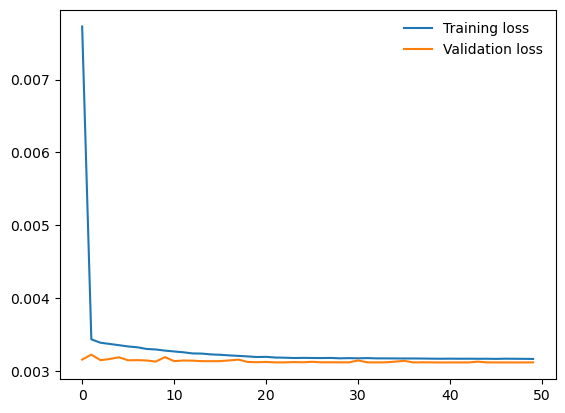

In [19]:
import matplotlib.pyplot as plt
# plot the losses
plt.plot(train_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.legend(frameon=False)

In [20]:
# test the model 
test_loss = 0
accuracy = 0
with torch.no_grad():
    model.eval()
    for inputs, labels in test_loader:
        output = model.forward(inputs)
        test_loss += criterion(output, labels)

print("Test Loss: {:.4f} ".format(test_loss/len(test_loader)))


Test Loss: 0.0031 


In [21]:
X_test.values[:21]

array([[1.03      , 1.03509819, 1.03513063, 1.03757204, 1.03147743,
        1.02838148, 1.0357693 , 1.0330695 , 1.03276355, 1.03260281,
        1.03245267, 1.04007107, 1.04624798, 1.04762233, 1.04830882,
        1.03496256, 1.0220772 , 1.03689299, 1.03136271, 1.03442277,
        1.02159268, 1.0323655 , 1.04744731, 1.04830716, 1.05049926,
        1.0374363 , 1.05707261, 1.0306257 , 1.03125006, 1.03144217],
       [1.03      , 1.03228388, 1.0325459 , 1.0327506 , 1.03144288,
        1.02881481, 1.03042669, 1.02694653, 1.02470124, 1.02352166,
        1.02291655, 1.03903911, 1.0433365 , 1.04444311, 1.04498216,
        1.03118818, 1.03252468, 1.03064018, 1.03111047, 1.02619172,
        1.0278266 , 1.0225652 , 1.04607458, 1.04649663, 1.04234869,
        1.02936469, 1.05186364, 1.03049599, 1.03102665, 1.03109331],
       [1.03      , 1.03336429, 1.03391838, 1.03446064, 1.03149534,
        1.02204999, 1.02950736, 1.02209072, 1.01708712, 1.01445849,
        1.0126433 , 1.04219956, 1.04520037, 1.

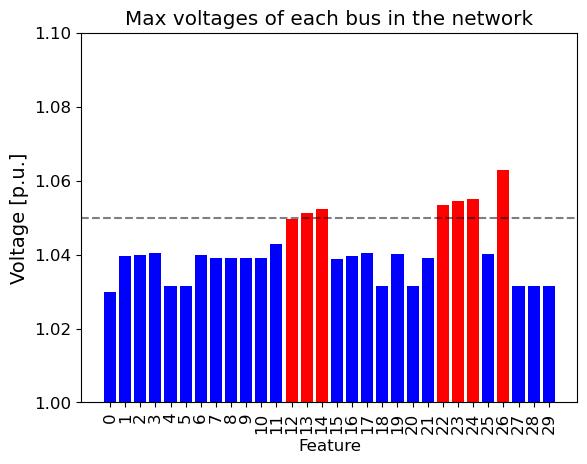

In [26]:
#set fontsize
plt.rcParams.update({'font.size': 12})
color = ['blue' if i < 1.045 else 'red' for i in X_test.max().values]
# fig, axs = plt.subplots(1, 2, figsize=(20, 10))
plt.figsize=(10,10)
plt.bar(X_test.max().index, X_test.max().values, color=color)
plt.axhline(y=1.05, color='black', linestyle='--', alpha=0.5)
plt.xticks(rotation=90)
# # limit
plt.ylim(1., 1.1)
plt.title('Max voltages of each bus in the network')
plt.xlabel('Feature')
plt.ylabel('Voltage [p.u.]', fontsize=14)
plt.savefig('/Users/blazdobravec/Documents/FACULTY/DOC/RW1/PERSONAL/RL_Concept_DSO_Network/src/results_data/max_voltages.pdf')
# plt.show()

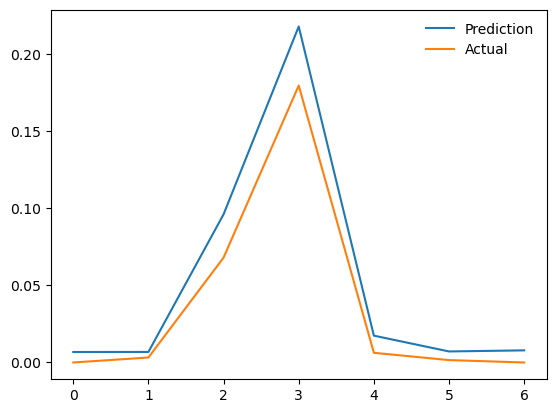

In [44]:
# example of a prediction
i = 20
# print(model.forward(torch.from_numpy(X_test.values[i]).float()))
# print(y_test.values[i])

# plot the prediction
plt.plot(model.forward(torch.from_numpy(X_test.values[i]).float()).detach().numpy(), label='Prediction')
plt.plot(y_test.values[i], label='Actual')
plt.legend(frameon=False)

Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.


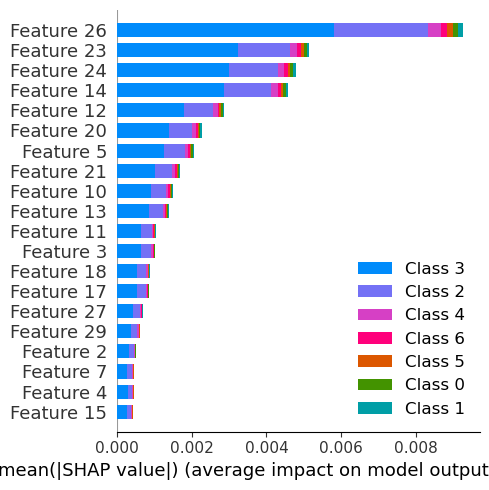

In [87]:
# DEEP SHAP explanation
import shap

# create a function that will return the prediction of the model
batch = next(iter(test_loader))
images, _ = batch

background = images[:60]
test_images = images[60:64]

e = shap.DeepExplainer(model, background)
shap_values = e.shap_values(test_images)

# plot the shap values
fig = shap.summary_plot(shap_values, X_test.values, plot_type="bar", plot_size=(5,5), show=False)
plt.savefig('/Users/blazdobravec/Documents/FACULTY/DOC/RW1/PERSONAL/RL_Concept_DSO_Network/src/results_data/shap_values.pdf', dpi=700)

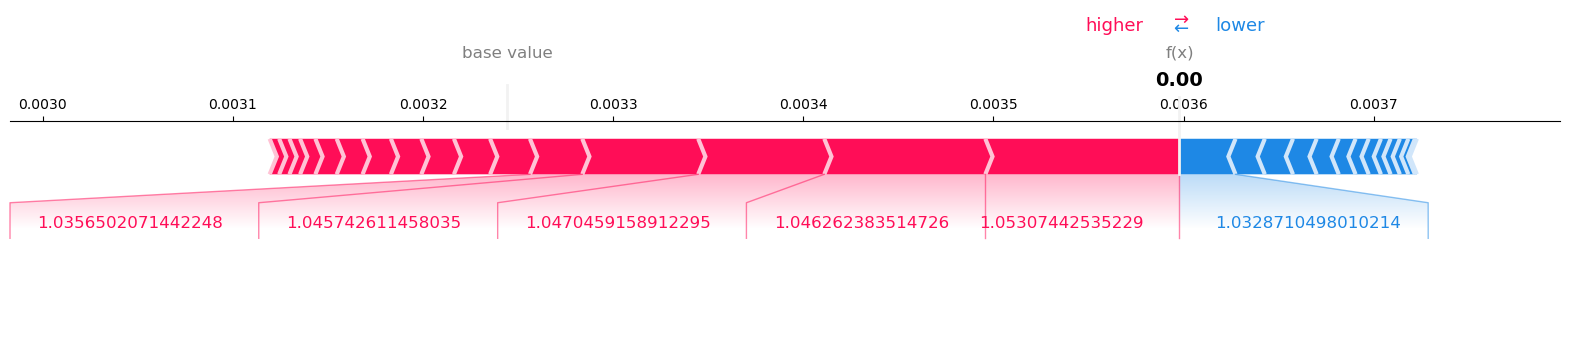

In [ ]:
# visualize the first prediction's explanation
shap.force_plot(e.expected_value[1], shap_values[1][0], X_test.values[1], matplotlib=True)

In [ ]:
# run initjs
shap.initjs()

In [ ]:
shap.force_plot(e.expected_value[0], shap_values[0])

In [ ]:
data = df_out[96:160]
X_data = torch.tensor(data.iloc[:, :-7].values, dtype=torch.float)
y_data = torch.tensor(data.iloc[:, -7:].values, dtype=torch.float)

In [ ]:
shap_values50 = e.shap_values(X_data)

Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.


In [ ]:
shap.force_plot(e.expected_value[0], shap_values50[0])

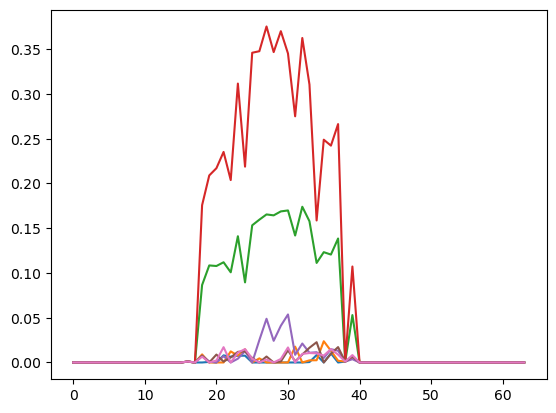

In [167]:
# plot actual y_data
plt.plot(y_data.detach().numpy(), label='Actual')